In [1]:
import tensorflow
import keras
import csv
import numpy
import matplotlib.pyplot as plot

#load training data
dataset = numpy.loadtxt("../Datasets/case1_x.csv", delimiter=",")
X1 = dataset[:,0:1]
X2 = dataset[:,1:2]
Y = numpy.loadtxt("../Datasets/case1_y.csv", delimiter=",")

Using TensorFlow backend.


In [2]:
#set random seed
numpy.random.seed(0)

#construct input layers and explainable layers
input_layer_X1 = keras.layers.Input(shape=(1, ), name='input_layer_X1')
explainable_layer_X1 = keras.layers.Dense(1, activation='linear', use_bias=False, kernel_initializer='ones', name='explainable_layer_X1')(input_layer_X1)

input_layer_X2 = keras.layers.Input(shape=(1, ), name='input_layer_X2')
explainable_layer_X2 = keras.layers.Dense(1, activation='linear', use_bias=False, kernel_initializer='ones', name='explainable_layer_X2')(input_layer_X2)

#construct hidden layers
merge_layer = keras.layers.concatenate([explainable_layer_X1, explainable_layer_X2], name='merge_layer')
hidden_layer_1 = keras.layers.Dense(2, activation = 'linear', name='hidden_layer_1', kernel_initializer='ones', bias_initializer='ones')(merge_layer)
hidden_layer_2 = keras.layers.Dense(2, activation = 'tanh', name='hidden_layer_2')(hidden_layer_1)
hidden_layer_3 = keras.layers.Dense(2, activation = 'tanh', name='hidden_layer_3')(hidden_layer_2)

#construct output layer
output_layer = keras.layers.Dense(1, activation = 'linear', name='output_layer')(hidden_layer_3)

#construct the model of neural network
model = keras.models.Model(inputs=[input_layer_X1, input_layer_X2], outputs=output_layer)
model.summary()

#set loss function and optimizer
model.compile(loss='mean_squared_error', optimizer = 'nadam', metrics = ['mae'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer_X1 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X2 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
explainable_layer_X1 (Dense)    (None, 1)            1           input_layer_X1[0][0]             
__________________________________________________________________________________________________
explainable_layer_X2 (Dense)    (None, 1)            1           input_layer_X2[0][0]             
__________________________________________________________________________________________________
merge_laye

In [3]:
#training the model of neural network
train_history = model.fit([X1, X2], Y, epochs = 60000, batch_size = 7)

Epoch 1/60000
7/7 [==============================] - 0s 64ms/step - loss: 0.1684 - mean_absolute_error: 0.3718
Epoch 2/60000
7/7 [==============================] - 0s 214us/step - loss: 0.1545 - mean_absolute_error: 0.3531
Epoch 3/60000
7/7 [==============================] - 0s 214us/step - loss: 0.1478 - mean_absolute_error: 0.3435
Epoch 4/60000
7/7 [==============================] - 0s 286us/step - loss: 0.1417 - mean_absolute_error: 0.3347
Epoch 5/60000
7/7 [==============================] - 0s 286us/step - loss: 0.1351 - mean_absolute_error: 0.3250
Epoch 6/60000
7/7 [==============================] - 0s 143us/step - loss: 0.1288 - mean_absolute_error: 0.3154
Epoch 7/60000
7/7 [==============================] - 0s 286us/step - loss: 0.1228 - mean_absolute_error: 0.3058
Epoch 8/60000
7/7 [==============================] - 0s 286us/step - loss: 0.1169 - mean_absolute_error: 0.2962
Epoch 9/60000
7/7 [==============================] - 0s 143us/step - loss: 0.1111 - mean_absolute_error: 

Epoch 74/60000
7/7 [==============================] - 0s 429us/step - loss: 0.0262 - mean_absolute_error: 0.1396
Epoch 75/60000
7/7 [==============================] - 0s 286us/step - loss: 0.0262 - mean_absolute_error: 0.1395
Epoch 76/60000
7/7 [==============================] - 0s 572us/step - loss: 0.0261 - mean_absolute_error: 0.1393
Epoch 77/60000
7/7 [==============================] - 0s 429us/step - loss: 0.0261 - mean_absolute_error: 0.1392
Epoch 78/60000
7/7 [==============================] - 0s 429us/step - loss: 0.0260 - mean_absolute_error: 0.1391
Epoch 79/60000
7/7 [==============================] - 0s 286us/step - loss: 0.0260 - mean_absolute_error: 0.1389
Epoch 80/60000
7/7 [==============================] - 0s 286us/step - loss: 0.0259 - mean_absolute_error: 0.1388
Epoch 81/60000
7/7 [==============================] - 0s 286us/step - loss: 0.0259 - mean_absolute_error: 0.1386
Epoch 82/60000
7/7 [==============================] - 0s 286us/step - loss: 0.0258 - mean_absolu

Epoch 147/60000
7/7 [==============================] - 0s 429us/step - loss: 0.0208 - mean_absolute_error: 0.1242
Epoch 148/60000
7/7 [==============================] - 0s 285us/step - loss: 0.0207 - mean_absolute_error: 0.1239
Epoch 149/60000
7/7 [==============================] - 0s 287us/step - loss: 0.0206 - mean_absolute_error: 0.1236
Epoch 150/60000
7/7 [==============================] - 0s 429us/step - loss: 0.0205 - mean_absolute_error: 0.1233
Epoch 151/60000
7/7 [==============================] - 0s 429us/step - loss: 0.0204 - mean_absolute_error: 0.1229
Epoch 152/60000
7/7 [==============================] - 0s 429us/step - loss: 0.0203 - mean_absolute_error: 0.1226
Epoch 153/60000
7/7 [==============================] - 0s 429us/step - loss: 0.0202 - mean_absolute_error: 0.1223
Epoch 154/60000
7/7 [==============================] - 0s 429us/step - loss: 0.0200 - mean_absolute_error: 0.1219
Epoch 155/60000
7/7 [==============================] - 0s 286us/step - loss: 0.0199 - me

Epoch 219/60000
7/7 [==============================] - 0s 429us/step - loss: 0.0108 - mean_absolute_error: 0.0899
Epoch 220/60000
7/7 [==============================] - 0s 429us/step - loss: 0.0106 - mean_absolute_error: 0.0892
Epoch 221/60000
7/7 [==============================] - 0s 286us/step - loss: 0.0105 - mean_absolute_error: 0.0885
Epoch 222/60000
7/7 [==============================] - 0s 429us/step - loss: 0.0103 - mean_absolute_error: 0.0878
Epoch 223/60000
7/7 [==============================] - 0s 286us/step - loss: 0.0102 - mean_absolute_error: 0.0872
Epoch 224/60000
7/7 [==============================] - 0s 286us/step - loss: 0.0100 - mean_absolute_error: 0.0865
Epoch 225/60000
7/7 [==============================] - 0s 286us/step - loss: 0.0098 - mean_absolute_error: 0.0858
Epoch 226/60000
7/7 [==============================] - 0s 286us/step - loss: 0.0097 - mean_absolute_error: 0.0851
Epoch 227/60000
7/7 [==============================] - 0s 286us/step - loss: 0.0095 - me

Epoch 291/60000
7/7 [==============================] - 0s 429us/step - loss: 0.0019 - mean_absolute_error: 0.0364
Epoch 292/60000
7/7 [==============================] - 0s 286us/step - loss: 0.0019 - mean_absolute_error: 0.0357
Epoch 293/60000
7/7 [==============================] - 0s 429us/step - loss: 0.0018 - mean_absolute_error: 0.0351
Epoch 294/60000
7/7 [==============================] - 0s 428us/step - loss: 0.0018 - mean_absolute_error: 0.0344
Epoch 295/60000
7/7 [==============================] - 0s 429us/step - loss: 0.0017 - mean_absolute_error: 0.0338
Epoch 296/60000
7/7 [==============================] - 0s 429us/step - loss: 0.0017 - mean_absolute_error: 0.0332
Epoch 297/60000
7/7 [==============================] - 0s 429us/step - loss: 0.0016 - mean_absolute_error: 0.0326
Epoch 298/60000
7/7 [==============================] - 0s 429us/step - loss: 0.0016 - mean_absolute_error: 0.0320
Epoch 299/60000
7/7 [==============================] - 0s 429us/step - loss: 0.0015 - me

Epoch 362/60000
7/7 [==============================] - 0s 286us/step - loss: 5.9650e-04 - mean_absolute_error: 0.0209
Epoch 363/60000
7/7 [==============================] - 0s 429us/step - loss: 5.9456e-04 - mean_absolute_error: 0.0209
Epoch 364/60000
7/7 [==============================] - 0s 429us/step - loss: 5.9269e-04 - mean_absolute_error: 0.0209
Epoch 365/60000
7/7 [==============================] - 0s 429us/step - loss: 5.9091e-04 - mean_absolute_error: 0.0208
Epoch 366/60000
7/7 [==============================] - 0s 429us/step - loss: 5.8920e-04 - mean_absolute_error: 0.0208
Epoch 367/60000
7/7 [==============================] - 0s 286us/step - loss: 5.8757e-04 - mean_absolute_error: 0.0208
Epoch 368/60000
7/7 [==============================] - 0s 429us/step - loss: 5.8600e-04 - mean_absolute_error: 0.0207
Epoch 369/60000
7/7 [==============================] - 0s 286us/step - loss: 5.8449e-04 - mean_absolute_error: 0.0207
Epoch 370/60000
7/7 [==============================] - 0

Epoch 432/60000
7/7 [==============================] - 0s 286us/step - loss: 5.3196e-04 - mean_absolute_error: 0.0195
Epoch 433/60000
7/7 [==============================] - 0s 286us/step - loss: 5.3130e-04 - mean_absolute_error: 0.0194
Epoch 434/60000
7/7 [==============================] - 0s 286us/step - loss: 5.3063e-04 - mean_absolute_error: 0.0194
Epoch 435/60000
7/7 [==============================] - 0s 286us/step - loss: 5.2997e-04 - mean_absolute_error: 0.0194
Epoch 436/60000
7/7 [==============================] - 0s 286us/step - loss: 5.2930e-04 - mean_absolute_error: 0.0194
Epoch 437/60000
7/7 [==============================] - 0s 286us/step - loss: 5.2864e-04 - mean_absolute_error: 0.0194
Epoch 438/60000
7/7 [==============================] - 0s 143us/step - loss: 5.2798e-04 - mean_absolute_error: 0.0194
Epoch 439/60000
7/7 [==============================] - 0s 286us/step - loss: 5.2731e-04 - mean_absolute_error: 0.0194
Epoch 440/60000
7/7 [==============================] - 0

Epoch 502/60000
7/7 [==============================] - 0s 429us/step - loss: 4.8662e-04 - mean_absolute_error: 0.0185
Epoch 503/60000
7/7 [==============================] - 0s 429us/step - loss: 4.8598e-04 - mean_absolute_error: 0.0185
Epoch 504/60000
7/7 [==============================] - 0s 429us/step - loss: 4.8536e-04 - mean_absolute_error: 0.0185
Epoch 505/60000
7/7 [==============================] - 0s 286us/step - loss: 4.8473e-04 - mean_absolute_error: 0.0185
Epoch 506/60000
7/7 [==============================] - 0s 429us/step - loss: 4.8410e-04 - mean_absolute_error: 0.0185
Epoch 507/60000
7/7 [==============================] - 0s 286us/step - loss: 4.8347e-04 - mean_absolute_error: 0.0185
Epoch 508/60000
7/7 [==============================] - 0s 286us/step - loss: 4.8284e-04 - mean_absolute_error: 0.0185
Epoch 509/60000
7/7 [==============================] - 0s 429us/step - loss: 4.8222e-04 - mean_absolute_error: 0.0184
Epoch 510/60000
7/7 [==============================] - 0

Epoch 572/60000
7/7 [==============================] - 0s 286us/step - loss: 4.4386e-04 - mean_absolute_error: 0.0177
Epoch 573/60000
7/7 [==============================] - 0s 286us/step - loss: 4.4327e-04 - mean_absolute_error: 0.0176
Epoch 574/60000
7/7 [==============================] - 0s 286us/step - loss: 4.4268e-04 - mean_absolute_error: 0.0176
Epoch 575/60000
7/7 [==============================] - 0s 286us/step - loss: 4.4209e-04 - mean_absolute_error: 0.0176
Epoch 576/60000
7/7 [==============================] - 0s 286us/step - loss: 4.4150e-04 - mean_absolute_error: 0.0176
Epoch 577/60000
7/7 [==============================] - 0s 286us/step - loss: 4.4092e-04 - mean_absolute_error: 0.0176
Epoch 578/60000
7/7 [==============================] - 0s 286us/step - loss: 4.4033e-04 - mean_absolute_error: 0.0176
Epoch 579/60000
7/7 [==============================] - 0s 286us/step - loss: 4.3974e-04 - mean_absolute_error: 0.0176
Epoch 580/60000
7/7 [==============================] - 0

Epoch 642/60000
7/7 [==============================] - 0s 429us/step - loss: 4.0409e-04 - mean_absolute_error: 0.0168
Epoch 643/60000
7/7 [==============================] - 0s 429us/step - loss: 4.0354e-04 - mean_absolute_error: 0.0168
Epoch 644/60000
7/7 [==============================] - 0s 429us/step - loss: 4.0300e-04 - mean_absolute_error: 0.0168
Epoch 645/60000
7/7 [==============================] - 0s 429us/step - loss: 4.0245e-04 - mean_absolute_error: 0.0168
Epoch 646/60000
7/7 [==============================] - 0s 429us/step - loss: 4.0191e-04 - mean_absolute_error: 0.0168
Epoch 647/60000
7/7 [==============================] - 0s 429us/step - loss: 4.0136e-04 - mean_absolute_error: 0.0167
Epoch 648/60000
7/7 [==============================] - 0s 429us/step - loss: 4.0082e-04 - mean_absolute_error: 0.0167
Epoch 649/60000
7/7 [==============================] - 0s 572us/step - loss: 4.0028e-04 - mean_absolute_error: 0.0167
Epoch 650/60000
7/7 [==============================] - 0

Epoch 712/60000
7/7 [==============================] - 0s 429us/step - loss: 3.6747e-04 - mean_absolute_error: 0.0160
Epoch 713/60000
7/7 [==============================] - 0s 286us/step - loss: 3.6697e-04 - mean_absolute_error: 0.0160
Epoch 714/60000
7/7 [==============================] - 0s 286us/step - loss: 3.6647e-04 - mean_absolute_error: 0.0160
Epoch 715/60000
7/7 [==============================] - 0s 429us/step - loss: 3.6597e-04 - mean_absolute_error: 0.0159
Epoch 716/60000
7/7 [==============================] - 0s 429us/step - loss: 3.6547e-04 - mean_absolute_error: 0.0159
Epoch 717/60000
7/7 [==============================] - 0s 429us/step - loss: 3.6497e-04 - mean_absolute_error: 0.0159
Epoch 718/60000
7/7 [==============================] - 0s 286us/step - loss: 3.6448e-04 - mean_absolute_error: 0.0159
Epoch 719/60000
7/7 [==============================] - 0s 429us/step - loss: 3.6398e-04 - mean_absolute_error: 0.0159
Epoch 720/60000
7/7 [==============================] - 0

Epoch 782/60000
7/7 [==============================] - 0s 286us/step - loss: 3.3402e-04 - mean_absolute_error: 0.0152
Epoch 783/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3356e-04 - mean_absolute_error: 0.0152
Epoch 784/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3311e-04 - mean_absolute_error: 0.0152
Epoch 785/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3265e-04 - mean_absolute_error: 0.0152
Epoch 786/60000
7/7 [==============================] - 0s 286us/step - loss: 3.3220e-04 - mean_absolute_error: 0.0152
Epoch 787/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3175e-04 - mean_absolute_error: 0.0151
Epoch 788/60000
7/7 [==============================] - 0s 286us/step - loss: 3.3129e-04 - mean_absolute_error: 0.0151
Epoch 789/60000
7/7 [==============================] - 0s 286us/step - loss: 3.3085e-04 - mean_absolute_error: 0.0151
Epoch 790/60000
7/7 [==============================] - 0

Epoch 852/60000
7/7 [==============================] - 0s 286us/step - loss: 3.0365e-04 - mean_absolute_error: 0.0145
Epoch 853/60000
7/7 [==============================] - 0s 286us/step - loss: 3.0324e-04 - mean_absolute_error: 0.0144
Epoch 854/60000
7/7 [==============================] - 0s 286us/step - loss: 3.0283e-04 - mean_absolute_error: 0.0144
Epoch 855/60000
7/7 [==============================] - 0s 429us/step - loss: 3.0242e-04 - mean_absolute_error: 0.0144
Epoch 856/60000
7/7 [==============================] - 0s 286us/step - loss: 3.0201e-04 - mean_absolute_error: 0.0144
Epoch 857/60000
7/7 [==============================] - 0s 286us/step - loss: 3.0160e-04 - mean_absolute_error: 0.0144
Epoch 858/60000
7/7 [==============================] - 0s 286us/step - loss: 3.0119e-04 - mean_absolute_error: 0.0144
Epoch 859/60000
7/7 [==============================] - 0s 286us/step - loss: 3.0078e-04 - mean_absolute_error: 0.0144
Epoch 860/60000
7/7 [==============================] - 0

Epoch 922/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7620e-04 - mean_absolute_error: 0.0138
Epoch 923/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7583e-04 - mean_absolute_error: 0.0138
Epoch 924/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7546e-04 - mean_absolute_error: 0.0138
Epoch 925/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7509e-04 - mean_absolute_error: 0.0138
Epoch 926/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7472e-04 - mean_absolute_error: 0.0137
Epoch 927/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7435e-04 - mean_absolute_error: 0.0137
Epoch 928/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7398e-04 - mean_absolute_error: 0.0137
Epoch 929/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7361e-04 - mean_absolute_error: 0.0137
Epoch 930/60000
7/7 [==============================] - 0

Epoch 992/60000
7/7 [==============================] - 0s 143us/step - loss: 2.5147e-04 - mean_absolute_error: 0.0131
Epoch 993/60000
7/7 [==============================] - 0s 286us/step - loss: 2.5114e-04 - mean_absolute_error: 0.0131
Epoch 994/60000
7/7 [==============================] - 0s 286us/step - loss: 2.5080e-04 - mean_absolute_error: 0.0131
Epoch 995/60000
7/7 [==============================] - 0s 286us/step - loss: 2.5047e-04 - mean_absolute_error: 0.0131
Epoch 996/60000
7/7 [==============================] - 0s 286us/step - loss: 2.5014e-04 - mean_absolute_error: 0.0131
Epoch 997/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4980e-04 - mean_absolute_error: 0.0131
Epoch 998/60000
7/7 [==============================] - 0s 286us/step - loss: 2.4947e-04 - mean_absolute_error: 0.0131
Epoch 999/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4914e-04 - mean_absolute_error: 0.0131
Epoch 1000/60000
7/7 [==============================] - 

Epoch 1061/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2953e-04 - mean_absolute_error: 0.0126
Epoch 1062/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2923e-04 - mean_absolute_error: 0.0125
Epoch 1063/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2893e-04 - mean_absolute_error: 0.0125
Epoch 1064/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2863e-04 - mean_absolute_error: 0.0125
Epoch 1065/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2833e-04 - mean_absolute_error: 0.0125
Epoch 1066/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2803e-04 - mean_absolute_error: 0.0125
Epoch 1067/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2773e-04 - mean_absolute_error: 0.0125
Epoch 1068/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2743e-04 - mean_absolute_error: 0.0125
Epoch 1069/60000
7/7 [==========================

Epoch 1130/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0980e-04 - mean_absolute_error: 0.0120
Epoch 1131/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0953e-04 - mean_absolute_error: 0.0120
Epoch 1132/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0926e-04 - mean_absolute_error: 0.0120
Epoch 1133/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0899e-04 - mean_absolute_error: 0.0120
Epoch 1134/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0872e-04 - mean_absolute_error: 0.0120
Epoch 1135/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0845e-04 - mean_absolute_error: 0.0120
Epoch 1136/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0818e-04 - mean_absolute_error: 0.0120
Epoch 1137/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0791e-04 - mean_absolute_error: 0.0119
Epoch 1138/60000
7/7 [==========================

Epoch 1199/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9205e-04 - mean_absolute_error: 0.0115
Epoch 1200/60000
7/7 [==============================] - 0s 428us/step - loss: 1.9181e-04 - mean_absolute_error: 0.0115
Epoch 1201/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9157e-04 - mean_absolute_error: 0.0115
Epoch 1202/60000
7/7 [==============================] - 0s 428us/step - loss: 1.9133e-04 - mean_absolute_error: 0.0115
Epoch 1203/60000
7/7 [==============================] - 0s 715us/step - loss: 1.9108e-04 - mean_absolute_error: 0.0114
Epoch 1204/60000
7/7 [==============================] - 0s 428us/step - loss: 1.9084e-04 - mean_absolute_error: 0.0114
Epoch 1205/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9060e-04 - mean_absolute_error: 0.0114
Epoch 1206/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9036e-04 - mean_absolute_error: 0.0114
Epoch 1207/60000
7/7 [==========================

Epoch 1268/60000
7/7 [==============================] - 0s 143us/step - loss: 1.7610e-04 - mean_absolute_error: 0.0110
Epoch 1269/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7588e-04 - mean_absolute_error: 0.0110
Epoch 1270/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7566e-04 - mean_absolute_error: 0.0110
Epoch 1271/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7544e-04 - mean_absolute_error: 0.0110
Epoch 1272/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7522e-04 - mean_absolute_error: 0.0110
Epoch 1273/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7501e-04 - mean_absolute_error: 0.0109
Epoch 1274/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7479e-04 - mean_absolute_error: 0.0109
Epoch 1275/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7457e-04 - mean_absolute_error: 0.0109
Epoch 1276/60000
7/7 [==========================

Epoch 1337/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6174e-04 - mean_absolute_error: 0.0105
Epoch 1338/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6154e-04 - mean_absolute_error: 0.0105
Epoch 1339/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6134e-04 - mean_absolute_error: 0.0105
Epoch 1340/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6115e-04 - mean_absolute_error: 0.0105
Epoch 1341/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6095e-04 - mean_absolute_error: 0.0105
Epoch 1342/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6075e-04 - mean_absolute_error: 0.0105
Epoch 1343/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6056e-04 - mean_absolute_error: 0.0105
Epoch 1344/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6036e-04 - mean_absolute_error: 0.0105
Epoch 1345/60000
7/7 [==========================

Epoch 1406/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4880e-04 - mean_absolute_error: 0.0101
Epoch 1407/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4862e-04 - mean_absolute_error: 0.0101
Epoch 1408/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4844e-04 - mean_absolute_error: 0.0101
Epoch 1409/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4827e-04 - mean_absolute_error: 0.0101
Epoch 1410/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4809e-04 - mean_absolute_error: 0.0101
Epoch 1411/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4791e-04 - mean_absolute_error: 0.0101
Epoch 1412/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4774e-04 - mean_absolute_error: 0.0101
Epoch 1413/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4756e-04 - mean_absolute_error: 0.0100
Epoch 1414/60000
7/7 [==========================

Epoch 1475/60000
7/7 [==============================] - 0s 286us/step - loss: 1.3713e-04 - mean_absolute_error: 0.0097
Epoch 1476/60000
7/7 [==============================] - 0s 286us/step - loss: 1.3697e-04 - mean_absolute_error: 0.0097
Epoch 1477/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3681e-04 - mean_absolute_error: 0.0097
Epoch 1478/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3665e-04 - mean_absolute_error: 0.0097
Epoch 1479/60000
7/7 [==============================] - 0s 286us/step - loss: 1.3649e-04 - mean_absolute_error: 0.0097
Epoch 1480/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3633e-04 - mean_absolute_error: 0.0096
Epoch 1481/60000
7/7 [==============================] - 0s 286us/step - loss: 1.3617e-04 - mean_absolute_error: 0.0096
Epoch 1482/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3601e-04 - mean_absolute_error: 0.0096
Epoch 1483/60000
7/7 [==========================

Epoch 1544/60000
7/7 [==============================] - 0s 286us/step - loss: 1.2658e-04 - mean_absolute_error: 0.0093
Epoch 1545/60000
7/7 [==============================] - 0s 286us/step - loss: 1.2644e-04 - mean_absolute_error: 0.0093
Epoch 1546/60000
7/7 [==============================] - 0s 286us/step - loss: 1.2629e-04 - mean_absolute_error: 0.0093
Epoch 1547/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2615e-04 - mean_absolute_error: 0.0093
Epoch 1548/60000
7/7 [==============================] - 0s 286us/step - loss: 1.2601e-04 - mean_absolute_error: 0.0093
Epoch 1549/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2586e-04 - mean_absolute_error: 0.0093
Epoch 1550/60000
7/7 [==============================] - 0s 715us/step - loss: 1.2572e-04 - mean_absolute_error: 0.0093
Epoch 1551/60000
7/7 [==============================] - 0s 714us/step - loss: 1.2558e-04 - mean_absolute_error: 0.0092
Epoch 1552/60000
7/7 [==========================

Epoch 1613/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1895e-04 - mean_absolute_error: 0.0091
Epoch 1614/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1869e-04 - mean_absolute_error: 0.0091
Epoch 1615/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1845e-04 - mean_absolute_error: 0.0090
Epoch 1616/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1823e-04 - mean_absolute_error: 0.0090
Epoch 1617/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1803e-04 - mean_absolute_error: 0.0090
Epoch 1618/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1784e-04 - mean_absolute_error: 0.0090
Epoch 1619/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1766e-04 - mean_absolute_error: 0.0090
Epoch 1620/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1748e-04 - mean_absolute_error: 0.0090
Epoch 1621/60000
7/7 [==========================

Epoch 1682/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1001e-04 - mean_absolute_error: 0.0087
Epoch 1683/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0993e-04 - mean_absolute_error: 0.0087
Epoch 1684/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0985e-04 - mean_absolute_error: 0.0087
Epoch 1685/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0978e-04 - mean_absolute_error: 0.0087
Epoch 1686/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0972e-04 - mean_absolute_error: 0.0087
Epoch 1687/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0967e-04 - mean_absolute_error: 0.0087
Epoch 1688/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0963e-04 - mean_absolute_error: 0.0087
Epoch 1689/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0960e-04 - mean_absolute_error: 0.0087
Epoch 1690/60000
7/7 [==========================

Epoch 1751/60000
7/7 [==============================] - 0s 143us/step - loss: 1.1531e-04 - mean_absolute_error: 0.0097
Epoch 1752/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1381e-04 - mean_absolute_error: 0.0088
Epoch 1753/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1257e-04 - mean_absolute_error: 0.0095
Epoch 1754/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1142e-04 - mean_absolute_error: 0.0087
Epoch 1755/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1046e-04 - mean_absolute_error: 0.0093
Epoch 1756/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0956e-04 - mean_absolute_error: 0.0087
Epoch 1757/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0880e-04 - mean_absolute_error: 0.0092
Epoch 1758/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0809e-04 - mean_absolute_error: 0.0086
Epoch 1759/60000
7/7 [==========================

Epoch 1820/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0184e-04 - mean_absolute_error: 0.0084
Epoch 1821/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0231e-04 - mean_absolute_error: 0.0089
Epoch 1822/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0282e-04 - mean_absolute_error: 0.0084
Epoch 1823/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0345e-04 - mean_absolute_error: 0.0090
Epoch 1824/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0414e-04 - mean_absolute_error: 0.0084
Epoch 1825/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0500e-04 - mean_absolute_error: 0.0092
Epoch 1826/60000
7/7 [==============================] - 0s 572us/step - loss: 1.0592e-04 - mean_absolute_error: 0.0085
Epoch 1827/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0708e-04 - mean_absolute_error: 0.0093
Epoch 1828/60000
7/7 [==========================

Epoch 1889/60000
7/7 [==============================] - 0s 572us/step - loss: 1.0026e-04 - mean_absolute_error: 0.0089
Epoch 1890/60000
7/7 [==============================] - 0s 429us/step - loss: 9.9469e-05 - mean_absolute_error: 0.0082
Epoch 1891/60000
7/7 [==============================] - 0s 429us/step - loss: 9.8803e-05 - mean_absolute_error: 0.0088
Epoch 1892/60000
7/7 [==============================] - 0s 429us/step - loss: 9.8155e-05 - mean_absolute_error: 0.0082
Epoch 1893/60000
7/7 [==============================] - 0s 429us/step - loss: 9.7610e-05 - mean_absolute_error: 0.0087
Epoch 1894/60000
7/7 [==============================] - 0s 429us/step - loss: 9.7079e-05 - mean_absolute_error: 0.0082
Epoch 1895/60000
7/7 [==============================] - 0s 429us/step - loss: 9.6631e-05 - mean_absolute_error: 0.0086
Epoch 1896/60000
7/7 [==============================] - 0s 286us/step - loss: 9.6186e-05 - mean_absolute_error: 0.0081
Epoch 1897/60000
7/7 [==========================

Epoch 1958/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0966e-04 - mean_absolute_error: 0.0082
Epoch 1959/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1240e-04 - mean_absolute_error: 0.0097
Epoch 1960/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1513e-04 - mean_absolute_error: 0.0083
Epoch 1961/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1864e-04 - mean_absolute_error: 0.0100
Epoch 1962/60000
7/7 [==============================] - 0s 286us/step - loss: 1.2207e-04 - mean_absolute_error: 0.0083
Epoch 1963/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2652e-04 - mean_absolute_error: 0.0103
Epoch 1964/60000
7/7 [==============================] - 0s 286us/step - loss: 1.3079e-04 - mean_absolute_error: 0.0084
Epoch 1965/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3637e-04 - mean_absolute_error: 0.0106
Epoch 1966/60000
7/7 [==========================

Epoch 2027/60000
7/7 [==============================] - 0s 286us/step - loss: 8.7679e-05 - mean_absolute_error: 0.0083
Epoch 2028/60000
7/7 [==============================] - 0s 286us/step - loss: 8.7312e-05 - mean_absolute_error: 0.0077
Epoch 2029/60000
7/7 [==============================] - 0s 286us/step - loss: 8.7002e-05 - mean_absolute_error: 0.0082
Epoch 2030/60000
7/7 [==============================] - 0s 429us/step - loss: 8.6692e-05 - mean_absolute_error: 0.0077
Epoch 2031/60000
7/7 [==============================] - 0s 429us/step - loss: 8.6428e-05 - mean_absolute_error: 0.0081
Epoch 2032/60000
7/7 [==============================] - 0s 429us/step - loss: 8.6163e-05 - mean_absolute_error: 0.0077
Epoch 2033/60000
7/7 [==============================] - 0s 286us/step - loss: 8.5941e-05 - mean_absolute_error: 0.0081
Epoch 2034/60000
7/7 [==============================] - 0s 429us/step - loss: 8.5711e-05 - mean_absolute_error: 0.0077
Epoch 2035/60000
7/7 [==========================

Epoch 2096/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4126e-04 - mean_absolute_error: 0.0087
Epoch 2097/60000
7/7 [==============================] - 0s 285us/step - loss: 1.4850e-04 - mean_absolute_error: 0.0108
Epoch 2098/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5480e-04 - mean_absolute_error: 0.0093
Epoch 2099/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6329e-04 - mean_absolute_error: 0.0112
Epoch 2100/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7027e-04 - mean_absolute_error: 0.0099
Epoch 2101/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7988e-04 - mean_absolute_error: 0.0116
Epoch 2102/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8725e-04 - mean_absolute_error: 0.0107
Epoch 2103/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9765e-04 - mean_absolute_error: 0.0120
Epoch 2104/60000
7/7 [==========================

Epoch 2165/60000
7/7 [==============================] - 0s 429us/step - loss: 7.8462e-05 - mean_absolute_error: 0.0078
Epoch 2166/60000
7/7 [==============================] - 0s 429us/step - loss: 7.8257e-05 - mean_absolute_error: 0.0073
Epoch 2167/60000
7/7 [==============================] - 0s 286us/step - loss: 7.8090e-05 - mean_absolute_error: 0.0077
Epoch 2168/60000
7/7 [==============================] - 0s 429us/step - loss: 7.7914e-05 - mean_absolute_error: 0.0073
Epoch 2169/60000
7/7 [==============================] - 0s 429us/step - loss: 7.7772e-05 - mean_absolute_error: 0.0077
Epoch 2170/60000
7/7 [==============================] - 0s 429us/step - loss: 7.7622e-05 - mean_absolute_error: 0.0073
Epoch 2171/60000
7/7 [==============================] - 0s 429us/step - loss: 7.7501e-05 - mean_absolute_error: 0.0077
Epoch 2172/60000
7/7 [==============================] - 0s 429us/step - loss: 7.7372e-05 - mean_absolute_error: 0.0073
Epoch 2173/60000
7/7 [==========================

Epoch 2234/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8292e-04 - mean_absolute_error: 0.0108
Epoch 2235/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9289e-04 - mean_absolute_error: 0.0118
Epoch 2236/60000
7/7 [==============================] - 0s 428us/step - loss: 1.9963e-04 - mean_absolute_error: 0.0116
Epoch 2237/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0966e-04 - mean_absolute_error: 0.0123
Epoch 2238/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1532e-04 - mean_absolute_error: 0.0122
Epoch 2239/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2453e-04 - mean_absolute_error: 0.0127
Epoch 2240/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2833e-04 - mean_absolute_error: 0.0128
Epoch 2241/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3588e-04 - mean_absolute_error: 0.0131
Epoch 2242/60000
7/7 [==========================

Epoch 2303/60000
7/7 [==============================] - 0s 286us/step - loss: 7.1133e-05 - mean_absolute_error: 0.0074
Epoch 2304/60000
7/7 [==============================] - 0s 429us/step - loss: 7.1002e-05 - mean_absolute_error: 0.0070
Epoch 2305/60000
7/7 [==============================] - 0s 429us/step - loss: 7.0898e-05 - mean_absolute_error: 0.0074
Epoch 2306/60000
7/7 [==============================] - 0s 429us/step - loss: 7.0788e-05 - mean_absolute_error: 0.0070
Epoch 2307/60000
7/7 [==============================] - 0s 286us/step - loss: 7.0703e-05 - mean_absolute_error: 0.0074
Epoch 2308/60000
7/7 [==============================] - 0s 286us/step - loss: 7.0612e-05 - mean_absolute_error: 0.0070
Epoch 2309/60000
7/7 [==============================] - 0s 286us/step - loss: 7.0546e-05 - mean_absolute_error: 0.0073
Epoch 2310/60000
7/7 [==============================] - 0s 286us/step - loss: 7.0470e-05 - mean_absolute_error: 0.0070
Epoch 2311/60000
7/7 [==========================

Epoch 2372/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0714e-04 - mean_absolute_error: 0.0121
Epoch 2373/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1589e-04 - mean_absolute_error: 0.0125
Epoch 2374/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1958e-04 - mean_absolute_error: 0.0127
Epoch 2375/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2679e-04 - mean_absolute_error: 0.0128
Epoch 2376/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2810e-04 - mean_absolute_error: 0.0130
Epoch 2377/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3312e-04 - mean_absolute_error: 0.0130
Epoch 2378/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3159e-04 - mean_absolute_error: 0.0131
Epoch 2379/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3375e-04 - mean_absolute_error: 0.0130
Epoch 2380/60000
7/7 [==========================

Epoch 2441/60000
7/7 [==============================] - 0s 572us/step - loss: 6.4893e-05 - mean_absolute_error: 0.0071
Epoch 2442/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4798e-05 - mean_absolute_error: 0.0067
Epoch 2443/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4724e-05 - mean_absolute_error: 0.0070
Epoch 2444/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4649e-05 - mean_absolute_error: 0.0066
Epoch 2445/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4593e-05 - mean_absolute_error: 0.0070
Epoch 2446/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4534e-05 - mean_absolute_error: 0.0066
Epoch 2447/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4494e-05 - mean_absolute_error: 0.0070
Epoch 2448/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4451e-05 - mean_absolute_error: 0.0066
Epoch 2449/60000
7/7 [==========================

Epoch 2510/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1001e-04 - mean_absolute_error: 0.0125
Epoch 2511/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1722e-04 - mean_absolute_error: 0.0125
Epoch 2512/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1894e-04 - mean_absolute_error: 0.0128
Epoch 2513/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2405e-04 - mean_absolute_error: 0.0127
Epoch 2514/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2327e-04 - mean_absolute_error: 0.0130
Epoch 2515/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2584e-04 - mean_absolute_error: 0.0127
Epoch 2516/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2228e-04 - mean_absolute_error: 0.0130
Epoch 2517/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2213e-04 - mean_absolute_error: 0.0126
Epoch 2518/60000
7/7 [==========================

Epoch 2579/60000
7/7 [==============================] - 0s 429us/step - loss: 5.9493e-05 - mean_absolute_error: 0.0068
Epoch 2580/60000
7/7 [==============================] - 0s 286us/step - loss: 5.9414e-05 - mean_absolute_error: 0.0064
Epoch 2581/60000
7/7 [==============================] - 0s 429us/step - loss: 5.9352e-05 - mean_absolute_error: 0.0068
Epoch 2582/60000
7/7 [==============================] - 0s 429us/step - loss: 5.9287e-05 - mean_absolute_error: 0.0064
Epoch 2583/60000
7/7 [==============================] - 0s 429us/step - loss: 5.9241e-05 - mean_absolute_error: 0.0067
Epoch 2584/60000
7/7 [==============================] - 0s 286us/step - loss: 5.9191e-05 - mean_absolute_error: 0.0064
Epoch 2585/60000
7/7 [==============================] - 0s 286us/step - loss: 5.9161e-05 - mean_absolute_error: 0.0067
Epoch 2586/60000
7/7 [==============================] - 0s 429us/step - loss: 5.9126e-05 - mean_absolute_error: 0.0063
Epoch 2587/60000
7/7 [==========================

Epoch 2648/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9977e-04 - mean_absolute_error: 0.0122
Epoch 2649/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0720e-04 - mean_absolute_error: 0.0122
Epoch 2650/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0964e-04 - mean_absolute_error: 0.0126
Epoch 2651/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1522e-04 - mean_absolute_error: 0.0125
Epoch 2652/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1526e-04 - mean_absolute_error: 0.0129
Epoch 2653/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1830e-04 - mean_absolute_error: 0.0126
Epoch 2654/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1558e-04 - mean_absolute_error: 0.0129
Epoch 2655/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1605e-04 - mean_absolute_error: 0.0125
Epoch 2656/60000
7/7 [==========================

Epoch 2717/60000
7/7 [==============================] - 0s 429us/step - loss: 5.4722e-05 - mean_absolute_error: 0.0065
Epoch 2718/60000
7/7 [==============================] - 0s 429us/step - loss: 5.4636e-05 - mean_absolute_error: 0.0061
Epoch 2719/60000
7/7 [==============================] - 0s 429us/step - loss: 5.4567e-05 - mean_absolute_error: 0.0065
Epoch 2720/60000
7/7 [==============================] - 0s 429us/step - loss: 5.4496e-05 - mean_absolute_error: 0.0061
Epoch 2721/60000
7/7 [==============================] - 0s 429us/step - loss: 5.4444e-05 - mean_absolute_error: 0.0065
Epoch 2722/60000
7/7 [==============================] - 0s 429us/step - loss: 5.4387e-05 - mean_absolute_error: 0.0061
Epoch 2723/60000
7/7 [==============================] - 0s 429us/step - loss: 5.4348e-05 - mean_absolute_error: 0.0065
Epoch 2724/60000
7/7 [==============================] - 0s 429us/step - loss: 5.4305e-05 - mean_absolute_error: 0.0061
Epoch 2725/60000
7/7 [==========================

Epoch 2786/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7660e-04 - mean_absolute_error: 0.0114
Epoch 2787/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8503e-04 - mean_absolute_error: 0.0115
Epoch 2788/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8985e-04 - mean_absolute_error: 0.0120
Epoch 2789/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9732e-04 - mean_absolute_error: 0.0120
Epoch 2790/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0041e-04 - mean_absolute_error: 0.0124
Epoch 2791/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0623e-04 - mean_absolute_error: 0.0123
Epoch 2792/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0710e-04 - mean_absolute_error: 0.0127
Epoch 2793/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1072e-04 - mean_absolute_error: 0.0125
Epoch 2794/60000
7/7 [==========================

Epoch 2855/60000
7/7 [==============================] - 0s 429us/step - loss: 5.0572e-05 - mean_absolute_error: 0.0063
Epoch 2856/60000
7/7 [==============================] - 0s 286us/step - loss: 5.0467e-05 - mean_absolute_error: 0.0058
Epoch 2857/60000
7/7 [==============================] - 0s 286us/step - loss: 5.0378e-05 - mean_absolute_error: 0.0062
Epoch 2858/60000
7/7 [==============================] - 0s 286us/step - loss: 5.0286e-05 - mean_absolute_error: 0.0058
Epoch 2859/60000
7/7 [==============================] - 0s 429us/step - loss: 5.0213e-05 - mean_absolute_error: 0.0062
Epoch 2860/60000
7/7 [==============================] - 0s 429us/step - loss: 5.0138e-05 - mean_absolute_error: 0.0058
Epoch 2861/60000
7/7 [==============================] - 0s 286us/step - loss: 5.0079e-05 - mean_absolute_error: 0.0062
Epoch 2862/60000
7/7 [==============================] - 0s 429us/step - loss: 5.0015e-05 - mean_absolute_error: 0.0058
Epoch 2863/60000
7/7 [==========================

Epoch 2924/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3816e-04 - mean_absolute_error: 0.0098
Epoch 2925/60000
7/7 [==============================] - 0s 572us/step - loss: 1.4627e-04 - mean_absolute_error: 0.0102
Epoch 2926/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5266e-04 - mean_absolute_error: 0.0105
Epoch 2927/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6118e-04 - mean_absolute_error: 0.0107
Epoch 2928/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6715e-04 - mean_absolute_error: 0.0112
Epoch 2929/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7557e-04 - mean_absolute_error: 0.0112
Epoch 2930/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8068e-04 - mean_absolute_error: 0.0118
Epoch 2931/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8827e-04 - mean_absolute_error: 0.0118
Epoch 2932/60000
7/7 [==========================

Epoch 2993/60000
7/7 [==============================] - 0s 285us/step - loss: 4.7131e-05 - mean_absolute_error: 0.0061
Epoch 2994/60000
7/7 [==============================] - 0s 429us/step - loss: 4.6978e-05 - mean_absolute_error: 0.0056
Epoch 2995/60000
7/7 [==============================] - 0s 286us/step - loss: 4.6848e-05 - mean_absolute_error: 0.0060
Epoch 2996/60000
7/7 [==============================] - 0s 286us/step - loss: 4.6720e-05 - mean_absolute_error: 0.0056
Epoch 2997/60000
7/7 [==============================] - 0s 286us/step - loss: 4.6610e-05 - mean_absolute_error: 0.0060
Epoch 2998/60000
7/7 [==============================] - 0s 286us/step - loss: 4.6499e-05 - mean_absolute_error: 0.0056
Epoch 2999/60000
7/7 [==============================] - 0s 143us/step - loss: 4.6404e-05 - mean_absolute_error: 0.0060
Epoch 3000/60000
7/7 [==============================] - 0s 286us/step - loss: 4.6309e-05 - mean_absolute_error: 0.0056
Epoch 3001/60000
7/7 [==========================

Epoch 3062/60000
7/7 [==============================] - 0s 429us/step - loss: 9.5359e-05 - mean_absolute_error: 0.0075
Epoch 3063/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0080e-04 - mean_absolute_error: 0.0086
Epoch 3064/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0582e-04 - mean_absolute_error: 0.0081
Epoch 3065/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1213e-04 - mean_absolute_error: 0.0089
Epoch 3066/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1775e-04 - mean_absolute_error: 0.0089
Epoch 3067/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2492e-04 - mean_absolute_error: 0.0094
Epoch 3068/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3101e-04 - mean_absolute_error: 0.0096
Epoch 3069/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3883e-04 - mean_absolute_error: 0.0100
Epoch 3070/60000
7/7 [==========================

Epoch 3131/60000
7/7 [==============================] - 0s 429us/step - loss: 4.4636e-05 - mean_absolute_error: 0.0060
Epoch 3132/60000
7/7 [==============================] - 0s 429us/step - loss: 4.4389e-05 - mean_absolute_error: 0.0054
Epoch 3133/60000
7/7 [==============================] - 0s 286us/step - loss: 4.4174e-05 - mean_absolute_error: 0.0059
Epoch 3134/60000
7/7 [==============================] - 0s 286us/step - loss: 4.3963e-05 - mean_absolute_error: 0.0054
Epoch 3135/60000
7/7 [==============================] - 0s 286us/step - loss: 4.3780e-05 - mean_absolute_error: 0.0059
Epoch 3136/60000
7/7 [==============================] - 0s 286us/step - loss: 4.3604e-05 - mean_absolute_error: 0.0054
Epoch 3137/60000
7/7 [==============================] - 0s 429us/step - loss: 4.3448e-05 - mean_absolute_error: 0.0058
Epoch 3138/60000
7/7 [==============================] - 0s 429us/step - loss: 4.3295e-05 - mean_absolute_error: 0.0054
Epoch 3139/60000
7/7 [==========================

Epoch 3200/60000
7/7 [==============================] - 0s 429us/step - loss: 6.3429e-05 - mean_absolute_error: 0.0059
Epoch 3201/60000
7/7 [==============================] - 0s 286us/step - loss: 6.5928e-05 - mean_absolute_error: 0.0073
Epoch 3202/60000
7/7 [==============================] - 0s 429us/step - loss: 6.8439e-05 - mean_absolute_error: 0.0061
Epoch 3203/60000
7/7 [==============================] - 0s 428us/step - loss: 7.1510e-05 - mean_absolute_error: 0.0075
Epoch 3204/60000
7/7 [==============================] - 0s 286us/step - loss: 7.4547e-05 - mean_absolute_error: 0.0064
Epoch 3205/60000
7/7 [==============================] - 0s 286us/step - loss: 7.8265e-05 - mean_absolute_error: 0.0077
Epoch 3206/60000
7/7 [==============================] - 0s 429us/step - loss: 8.1896e-05 - mean_absolute_error: 0.0068
Epoch 3207/60000
7/7 [==============================] - 0s 429us/step - loss: 8.6379e-05 - mean_absolute_error: 0.0080
Epoch 3208/60000
7/7 [==========================

Epoch 3269/60000
7/7 [==============================] - 0s 429us/step - loss: 4.4064e-05 - mean_absolute_error: 0.0060
Epoch 3270/60000
7/7 [==============================] - 0s 429us/step - loss: 4.3572e-05 - mean_absolute_error: 0.0053
Epoch 3271/60000
7/7 [==============================] - 0s 429us/step - loss: 4.3151e-05 - mean_absolute_error: 0.0059
Epoch 3272/60000
7/7 [==============================] - 0s 429us/step - loss: 4.2741e-05 - mean_absolute_error: 0.0052
Epoch 3273/60000
7/7 [==============================] - 0s 429us/step - loss: 4.2385e-05 - mean_absolute_error: 0.0059
Epoch 3274/60000
7/7 [==============================] - 0s 429us/step - loss: 4.2041e-05 - mean_absolute_error: 0.0052
Epoch 3275/60000
7/7 [==============================] - 0s 428us/step - loss: 4.1747e-05 - mean_absolute_error: 0.0058
Epoch 3276/60000
7/7 [==============================] - 0s 429us/step - loss: 4.1458e-05 - mean_absolute_error: 0.0052
Epoch 3277/60000
7/7 [==========================

Epoch 3338/60000
7/7 [==============================] - 0s 286us/step - loss: 4.6047e-05 - mean_absolute_error: 0.0052
Epoch 3339/60000
7/7 [==============================] - 0s 429us/step - loss: 4.6941e-05 - mean_absolute_error: 0.0062
Epoch 3340/60000
7/7 [==============================] - 0s 286us/step - loss: 4.7866e-05 - mean_absolute_error: 0.0053
Epoch 3341/60000
7/7 [==============================] - 0s 429us/step - loss: 4.8971e-05 - mean_absolute_error: 0.0064
Epoch 3342/60000
7/7 [==============================] - 0s 286us/step - loss: 5.0113e-05 - mean_absolute_error: 0.0053
Epoch 3343/60000
7/7 [==============================] - 0s 286us/step - loss: 5.1469e-05 - mean_absolute_error: 0.0065
Epoch 3344/60000
7/7 [==============================] - 0s 286us/step - loss: 5.2869e-05 - mean_absolute_error: 0.0055
Epoch 3345/60000
7/7 [==============================] - 0s 286us/step - loss: 5.4545e-05 - mean_absolute_error: 0.0067
Epoch 3346/60000
7/7 [==========================

Epoch 3407/60000
7/7 [==============================] - 0s 286us/step - loss: 4.8662e-05 - mean_absolute_error: 0.0063
Epoch 3408/60000
7/7 [==============================] - 0s 286us/step - loss: 4.7424e-05 - mean_absolute_error: 0.0052
Epoch 3409/60000
7/7 [==============================] - 0s 284us/step - loss: 4.6374e-05 - mean_absolute_error: 0.0062
Epoch 3410/60000
7/7 [==============================] - 0s 285us/step - loss: 4.5361e-05 - mean_absolute_error: 0.0052
Epoch 3411/60000
7/7 [==============================] - 0s 286us/step - loss: 4.4501e-05 - mean_absolute_error: 0.0061
Epoch 3412/60000
7/7 [==============================] - 0s 429us/step - loss: 4.3670e-05 - mean_absolute_error: 0.0051
Epoch 3413/60000
7/7 [==============================] - 0s 429us/step - loss: 4.2961e-05 - mean_absolute_error: 0.0060
Epoch 3414/60000
7/7 [==============================] - 0s 286us/step - loss: 4.2279e-05 - mean_absolute_error: 0.0051
Epoch 3415/60000
7/7 [==========================

Epoch 3476/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7440e-05 - mean_absolute_error: 0.0049
Epoch 3477/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7716e-05 - mean_absolute_error: 0.0055
Epoch 3478/60000
7/7 [==============================] - 0s 429us/step - loss: 3.8000e-05 - mean_absolute_error: 0.0049
Epoch 3479/60000
7/7 [==============================] - 0s 286us/step - loss: 3.8336e-05 - mean_absolute_error: 0.0056
Epoch 3480/60000
7/7 [==============================] - 0s 429us/step - loss: 3.8689e-05 - mean_absolute_error: 0.0049
Epoch 3481/60000
7/7 [==============================] - 0s 286us/step - loss: 3.9105e-05 - mean_absolute_error: 0.0057
Epoch 3482/60000
7/7 [==============================] - 0s 286us/step - loss: 3.9534e-05 - mean_absolute_error: 0.0050
Epoch 3483/60000
7/7 [==============================] - 0s 285us/step - loss: 4.0046e-05 - mean_absolute_error: 0.0057
Epoch 3484/60000
7/7 [==========================

Epoch 3545/60000
7/7 [==============================] - 0s 429us/step - loss: 7.1442e-05 - mean_absolute_error: 0.0073
Epoch 3546/60000
7/7 [==============================] - 0s 286us/step - loss: 6.7651e-05 - mean_absolute_error: 0.0061
Epoch 3547/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4540e-05 - mean_absolute_error: 0.0070
Epoch 3548/60000
7/7 [==============================] - 0s 429us/step - loss: 6.1412e-05 - mean_absolute_error: 0.0058
Epoch 3549/60000
7/7 [==============================] - 0s 286us/step - loss: 5.8818e-05 - mean_absolute_error: 0.0068
Epoch 3550/60000
7/7 [==============================] - 0s 428us/step - loss: 5.6256e-05 - mean_absolute_error: 0.0056
Epoch 3551/60000
7/7 [==============================] - 0s 428us/step - loss: 5.4126e-05 - mean_absolute_error: 0.0066
Epoch 3552/60000
7/7 [==============================] - 0s 429us/step - loss: 5.2029e-05 - mean_absolute_error: 0.0054
Epoch 3553/60000
7/7 [==========================

Epoch 3614/60000
7/7 [==============================] - 0s 286us/step - loss: 3.2752e-05 - mean_absolute_error: 0.0047
Epoch 3615/60000
7/7 [==============================] - 0s 286us/step - loss: 3.2819e-05 - mean_absolute_error: 0.0051
Epoch 3616/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2888e-05 - mean_absolute_error: 0.0047
Epoch 3617/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2970e-05 - mean_absolute_error: 0.0051
Epoch 3618/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3060e-05 - mean_absolute_error: 0.0047
Epoch 3619/60000
7/7 [==============================] - 0s 286us/step - loss: 3.3163e-05 - mean_absolute_error: 0.0051
Epoch 3620/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3273e-05 - mean_absolute_error: 0.0047
Epoch 3621/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3404e-05 - mean_absolute_error: 0.0051
Epoch 3622/60000
7/7 [==========================

Epoch 3683/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4304e-04 - mean_absolute_error: 0.0105
Epoch 3684/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3524e-04 - mean_absolute_error: 0.0104
Epoch 3685/60000
7/7 [==============================] - 0s 286us/step - loss: 1.2911e-04 - mean_absolute_error: 0.0099
Epoch 3686/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2137e-04 - mean_absolute_error: 0.0097
Epoch 3687/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1522e-04 - mean_absolute_error: 0.0091
Epoch 3688/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0800e-04 - mean_absolute_error: 0.0090
Epoch 3689/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0218e-04 - mean_absolute_error: 0.0086
Epoch 3690/60000
7/7 [==============================] - 0s 286us/step - loss: 9.5708e-05 - mean_absolute_error: 0.0082
Epoch 3691/60000
7/7 [==========================

Epoch 3752/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9827e-05 - mean_absolute_error: 0.0044
Epoch 3753/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9815e-05 - mean_absolute_error: 0.0048
Epoch 3754/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9804e-05 - mean_absolute_error: 0.0044
Epoch 3755/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9802e-05 - mean_absolute_error: 0.0048
Epoch 3756/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9800e-05 - mean_absolute_error: 0.0044
Epoch 3757/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9805e-05 - mean_absolute_error: 0.0048
Epoch 3758/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9812e-05 - mean_absolute_error: 0.0044
Epoch 3759/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9826e-05 - mean_absolute_error: 0.0048
Epoch 3760/60000
7/7 [==========================

Epoch 3821/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5443e-04 - mean_absolute_error: 0.0112
Epoch 3822/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5874e-04 - mean_absolute_error: 0.0116
Epoch 3823/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6457e-04 - mean_absolute_error: 0.0116
Epoch 3824/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6714e-04 - mean_absolute_error: 0.0119
Epoch 3825/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7114e-04 - mean_absolute_error: 0.0119
Epoch 3826/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7154e-04 - mean_absolute_error: 0.0121
Epoch 3827/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7335e-04 - mean_absolute_error: 0.0120
Epoch 3828/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7135e-04 - mean_absolute_error: 0.0121
Epoch 3829/60000
7/7 [==========================

Epoch 3890/60000
7/7 [==============================] - 0s 572us/step - loss: 2.7989e-05 - mean_absolute_error: 0.0043
Epoch 3891/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7914e-05 - mean_absolute_error: 0.0046
Epoch 3892/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7844e-05 - mean_absolute_error: 0.0043
Epoch 3893/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7781e-05 - mean_absolute_error: 0.0046
Epoch 3894/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7719e-05 - mean_absolute_error: 0.0043
Epoch 3895/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7666e-05 - mean_absolute_error: 0.0046
Epoch 3896/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7615e-05 - mean_absolute_error: 0.0043
Epoch 3897/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7572e-05 - mean_absolute_error: 0.0046
Epoch 3898/60000
7/7 [==========================

Epoch 3959/60000
7/7 [==============================] - 0s 286us/step - loss: 6.0799e-05 - mean_absolute_error: 0.0066
Epoch 3960/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4232e-05 - mean_absolute_error: 0.0064
Epoch 3961/60000
7/7 [==============================] - 0s 429us/step - loss: 6.8352e-05 - mean_absolute_error: 0.0070
Epoch 3962/60000
7/7 [==============================] - 0s 286us/step - loss: 7.2426e-05 - mean_absolute_error: 0.0070
Epoch 3963/60000
7/7 [==============================] - 0s 428us/step - loss: 7.7325e-05 - mean_absolute_error: 0.0074
Epoch 3964/60000
7/7 [==============================] - 0s 285us/step - loss: 8.2084e-05 - mean_absolute_error: 0.0077
Epoch 3965/60000
7/7 [==============================] - 0s 286us/step - loss: 8.7820e-05 - mean_absolute_error: 0.0079
Epoch 3966/60000
7/7 [==============================] - 0s 286us/step - loss: 9.3161e-05 - mean_absolute_error: 0.0084
Epoch 3967/60000
7/7 [==========================

Epoch 4028/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8037e-05 - mean_absolute_error: 0.0042
Epoch 4029/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7784e-05 - mean_absolute_error: 0.0047
Epoch 4030/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7542e-05 - mean_absolute_error: 0.0042
Epoch 4031/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7330e-05 - mean_absolute_error: 0.0047
Epoch 4032/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7126e-05 - mean_absolute_error: 0.0042
Epoch 4033/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6948e-05 - mean_absolute_error: 0.0046
Epoch 4034/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6776e-05 - mean_absolute_error: 0.0041
Epoch 4035/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6627e-05 - mean_absolute_error: 0.0046
Epoch 4036/60000
7/7 [==========================

Epoch 4097/60000
7/7 [==============================] - 0s 715us/step - loss: 3.0305e-05 - mean_absolute_error: 0.0050
Epoch 4098/60000
7/7 [==============================] - 0s 572us/step - loss: 3.0896e-05 - mean_absolute_error: 0.0042
Epoch 4099/60000
7/7 [==============================] - 0s 428us/step - loss: 3.1587e-05 - mean_absolute_error: 0.0051
Epoch 4100/60000
7/7 [==============================] - 0s 572us/step - loss: 3.2310e-05 - mean_absolute_error: 0.0043
Epoch 4101/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3162e-05 - mean_absolute_error: 0.0052
Epoch 4102/60000
7/7 [==============================] - 0s 572us/step - loss: 3.4059e-05 - mean_absolute_error: 0.0044
Epoch 4103/60000
7/7 [==============================] - 0s 429us/step - loss: 3.5105e-05 - mean_absolute_error: 0.0053
Epoch 4104/60000
7/7 [==============================] - 0s 428us/step - loss: 3.6213e-05 - mean_absolute_error: 0.0045
Epoch 4105/60000
7/7 [==========================

Epoch 4166/60000
7/7 [==============================] - 0s 286us/step - loss: 3.7132e-05 - mean_absolute_error: 0.0046
Epoch 4167/60000
7/7 [==============================] - 0s 429us/step - loss: 3.5832e-05 - mean_absolute_error: 0.0053
Epoch 4168/60000
7/7 [==============================] - 0s 429us/step - loss: 3.4597e-05 - mean_absolute_error: 0.0044
Epoch 4169/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3543e-05 - mean_absolute_error: 0.0052
Epoch 4170/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2541e-05 - mean_absolute_error: 0.0043
Epoch 4171/60000
7/7 [==============================] - 0s 429us/step - loss: 3.1683e-05 - mean_absolute_error: 0.0051
Epoch 4172/60000
7/7 [==============================] - 0s 286us/step - loss: 3.0873e-05 - mean_absolute_error: 0.0042
Epoch 4173/60000
7/7 [==============================] - 0s 429us/step - loss: 3.0170e-05 - mean_absolute_error: 0.0050
Epoch 4174/60000
7/7 [==========================

Epoch 4235/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3459e-05 - mean_absolute_error: 0.0043
Epoch 4236/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3545e-05 - mean_absolute_error: 0.0039
Epoch 4237/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3645e-05 - mean_absolute_error: 0.0043
Epoch 4238/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3750e-05 - mean_absolute_error: 0.0039
Epoch 4239/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3872e-05 - mean_absolute_error: 0.0043
Epoch 4240/60000
7/7 [==============================] - 0s 286us/step - loss: 2.4004e-05 - mean_absolute_error: 0.0039
Epoch 4241/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4153e-05 - mean_absolute_error: 0.0044
Epoch 4242/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4313e-05 - mean_absolute_error: 0.0039
Epoch 4243/60000
7/7 [==========================

Epoch 4304/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0290e-04 - mean_absolute_error: 0.0091
Epoch 4305/60000
7/7 [==============================] - 0s 429us/step - loss: 9.6891e-05 - mean_absolute_error: 0.0086
Epoch 4306/60000
7/7 [==============================] - 0s 286us/step - loss: 9.0186e-05 - mean_absolute_error: 0.0084
Epoch 4307/60000
7/7 [==============================] - 0s 286us/step - loss: 8.4646e-05 - mean_absolute_error: 0.0079
Epoch 4308/60000
7/7 [==============================] - 0s 286us/step - loss: 7.8709e-05 - mean_absolute_error: 0.0077
Epoch 4309/60000
7/7 [==============================] - 0s 286us/step - loss: 7.3766e-05 - mean_absolute_error: 0.0073
Epoch 4310/60000
7/7 [==============================] - 0s 429us/step - loss: 6.8652e-05 - mean_absolute_error: 0.0070
Epoch 4311/60000
7/7 [==============================] - 0s 286us/step - loss: 6.4414e-05 - mean_absolute_error: 0.0068
Epoch 4312/60000
7/7 [==========================

Epoch 4373/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0995e-05 - mean_absolute_error: 0.0040
Epoch 4374/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0987e-05 - mean_absolute_error: 0.0037
Epoch 4375/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0984e-05 - mean_absolute_error: 0.0040
Epoch 4376/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0981e-05 - mean_absolute_error: 0.0037
Epoch 4377/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0982e-05 - mean_absolute_error: 0.0040
Epoch 4378/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0987e-05 - mean_absolute_error: 0.0037
Epoch 4379/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0995e-05 - mean_absolute_error: 0.0040
Epoch 4380/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1005e-05 - mean_absolute_error: 0.0037
Epoch 4381/60000
7/7 [==========================

Epoch 4442/60000
7/7 [==============================] - 0s 286us/step - loss: 1.2804e-04 - mean_absolute_error: 0.0105
Epoch 4443/60000
7/7 [==============================] - 0s 286us/step - loss: 1.3509e-04 - mean_absolute_error: 0.0107
Epoch 4444/60000
7/7 [==============================] - 0s 286us/step - loss: 1.3997e-04 - mean_absolute_error: 0.0110
Epoch 4445/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4608e-04 - mean_absolute_error: 0.0112
Epoch 4446/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4945e-04 - mean_absolute_error: 0.0115
Epoch 4447/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5399e-04 - mean_absolute_error: 0.0115
Epoch 4448/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5540e-04 - mean_absolute_error: 0.0117
Epoch 4449/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5787e-04 - mean_absolute_error: 0.0117
Epoch 4450/60000
7/7 [==========================

Epoch 4511/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9934e-05 - mean_absolute_error: 0.0039
Epoch 4512/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9863e-05 - mean_absolute_error: 0.0036
Epoch 4513/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9799e-05 - mean_absolute_error: 0.0039
Epoch 4514/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9737e-05 - mean_absolute_error: 0.0036
Epoch 4515/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9682e-05 - mean_absolute_error: 0.0039
Epoch 4516/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9627e-05 - mean_absolute_error: 0.0036
Epoch 4517/60000
7/7 [==============================] - 0s 285us/step - loss: 1.9580e-05 - mean_absolute_error: 0.0039
Epoch 4518/60000
7/7 [==============================] - 0s 285us/step - loss: 1.9536e-05 - mean_absolute_error: 0.0035
Epoch 4519/60000
7/7 [==========================

Epoch 4580/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3856e-05 - mean_absolute_error: 0.0043
Epoch 4581/60000
7/7 [==============================] - 0s 429us/step - loss: 3.5612e-05 - mean_absolute_error: 0.0051
Epoch 4582/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7431e-05 - mean_absolute_error: 0.0045
Epoch 4583/60000
7/7 [==============================] - 0s 286us/step - loss: 3.9576e-05 - mean_absolute_error: 0.0053
Epoch 4584/60000
7/7 [==============================] - 0s 286us/step - loss: 4.1811e-05 - mean_absolute_error: 0.0050
Epoch 4585/60000
7/7 [==============================] - 0s 429us/step - loss: 4.4450e-05 - mean_absolute_error: 0.0056
Epoch 4586/60000
7/7 [==============================] - 0s 429us/step - loss: 4.7181e-05 - mean_absolute_error: 0.0055
Epoch 4587/60000
7/7 [==============================] - 0s 286us/step - loss: 5.0417e-05 - mean_absolute_error: 0.0060
Epoch 4588/60000
7/7 [==========================

Epoch 4649/60000
7/7 [==============================] - 0s 572us/step - loss: 2.2307e-05 - mean_absolute_error: 0.0042
Epoch 4650/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1883e-05 - mean_absolute_error: 0.0036
Epoch 4651/60000
7/7 [==============================] - 0s 715us/step - loss: 2.1511e-05 - mean_absolute_error: 0.0041
Epoch 4652/60000
7/7 [==============================] - 0s 715us/step - loss: 2.1162e-05 - mean_absolute_error: 0.0035
Epoch 4653/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0858e-05 - mean_absolute_error: 0.0041
Epoch 4654/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0568e-05 - mean_absolute_error: 0.0035
Epoch 4655/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0315e-05 - mean_absolute_error: 0.0040
Epoch 4656/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0076e-05 - mean_absolute_error: 0.0035
Epoch 4657/60000
7/7 [==========================

Epoch 4718/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8851e-05 - mean_absolute_error: 0.0034
Epoch 4719/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9013e-05 - mean_absolute_error: 0.0039
Epoch 4720/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9187e-05 - mean_absolute_error: 0.0034
Epoch 4721/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9386e-05 - mean_absolute_error: 0.0039
Epoch 4722/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9601e-05 - mean_absolute_error: 0.0034
Epoch 4723/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9845e-05 - mean_absolute_error: 0.0040
Epoch 4724/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0110e-05 - mean_absolute_error: 0.0034
Epoch 4725/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0411e-05 - mean_absolute_error: 0.0040
Epoch 4726/60000
7/7 [==========================

Epoch 4787/60000
7/7 [==============================] - 0s 429us/step - loss: 5.6633e-05 - mean_absolute_error: 0.0064
Epoch 4788/60000
7/7 [==============================] - 0s 286us/step - loss: 5.2559e-05 - mean_absolute_error: 0.0061
Epoch 4789/60000
7/7 [==============================] - 0s 286us/step - loss: 4.9120e-05 - mean_absolute_error: 0.0060
Epoch 4790/60000
7/7 [==============================] - 0s 572us/step - loss: 4.5761e-05 - mean_absolute_error: 0.0055
Epoch 4791/60000
7/7 [==============================] - 0s 429us/step - loss: 4.2936e-05 - mean_absolute_error: 0.0056
Epoch 4792/60000
7/7 [==============================] - 0s 286us/step - loss: 4.0201e-05 - mean_absolute_error: 0.0050
Epoch 4793/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7885e-05 - mean_absolute_error: 0.0052
Epoch 4794/60000
7/7 [==============================] - 0s 429us/step - loss: 3.5666e-05 - mean_absolute_error: 0.0045
Epoch 4795/60000
7/7 [==========================

Epoch 4856/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6067e-05 - mean_absolute_error: 0.0032
Epoch 4857/60000
7/7 [==============================] - 0s 285us/step - loss: 1.6074e-05 - mean_absolute_error: 0.0035
Epoch 4858/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6082e-05 - mean_absolute_error: 0.0032
Epoch 4859/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6093e-05 - mean_absolute_error: 0.0035
Epoch 4860/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6107e-05 - mean_absolute_error: 0.0032
Epoch 4861/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6123e-05 - mean_absolute_error: 0.0035
Epoch 4862/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6143e-05 - mean_absolute_error: 0.0032
Epoch 4863/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6166e-05 - mean_absolute_error: 0.0036
Epoch 4864/60000
7/7 [==========================

Epoch 4925/60000
7/7 [==============================] - 0s 286us/step - loss: 1.3822e-04 - mean_absolute_error: 0.0110
Epoch 4926/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4114e-04 - mean_absolute_error: 0.0113
Epoch 4927/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4498e-04 - mean_absolute_error: 0.0113
Epoch 4928/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4580e-04 - mean_absolute_error: 0.0115
Epoch 4929/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4743e-04 - mean_absolute_error: 0.0114
Epoch 4930/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4592e-04 - mean_absolute_error: 0.0115
Epoch 4931/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4528e-04 - mean_absolute_error: 0.0113
Epoch 4932/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4164e-04 - mean_absolute_error: 0.0113
Epoch 4933/60000
7/7 [==========================

Epoch 4994/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5127e-05 - mean_absolute_error: 0.0031
Epoch 4995/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5082e-05 - mean_absolute_error: 0.0034
Epoch 4996/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5038e-05 - mean_absolute_error: 0.0031
Epoch 4997/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4999e-05 - mean_absolute_error: 0.0034
Epoch 4998/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4961e-05 - mean_absolute_error: 0.0031
Epoch 4999/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4929e-05 - mean_absolute_error: 0.0034
Epoch 5000/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4897e-05 - mean_absolute_error: 0.0031
Epoch 5001/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4868e-05 - mean_absolute_error: 0.0034
Epoch 5002/60000
7/7 [==========================

Epoch 5063/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8398e-05 - mean_absolute_error: 0.0045
Epoch 5064/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9948e-05 - mean_absolute_error: 0.0041
Epoch 5065/60000
7/7 [==============================] - 0s 286us/step - loss: 3.1766e-05 - mean_absolute_error: 0.0048
Epoch 5066/60000
7/7 [==============================] - 0s 572us/step - loss: 3.3691e-05 - mean_absolute_error: 0.0046
Epoch 5067/60000
7/7 [==============================] - 0s 286us/step - loss: 3.5956e-05 - mean_absolute_error: 0.0051
Epoch 5068/60000
7/7 [==============================] - 0s 429us/step - loss: 3.8329e-05 - mean_absolute_error: 0.0051
Epoch 5069/60000
7/7 [==============================] - 0s 429us/step - loss: 4.1132e-05 - mean_absolute_error: 0.0054
Epoch 5070/60000
7/7 [==============================] - 0s 429us/step - loss: 4.4038e-05 - mean_absolute_error: 0.0056
Epoch 5071/60000
7/7 [==========================

Epoch 5132/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7401e-05 - mean_absolute_error: 0.0032
Epoch 5133/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7048e-05 - mean_absolute_error: 0.0037
Epoch 5134/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6721e-05 - mean_absolute_error: 0.0031
Epoch 5135/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6431e-05 - mean_absolute_error: 0.0036
Epoch 5136/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6161e-05 - mean_absolute_error: 0.0031
Epoch 5137/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5923e-05 - mean_absolute_error: 0.0035
Epoch 5138/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5702e-05 - mean_absolute_error: 0.0030
Epoch 5139/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5505e-05 - mean_absolute_error: 0.0035
Epoch 5140/60000
7/7 [==========================

Epoch 5201/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4193e-05 - mean_absolute_error: 0.0033
Epoch 5202/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4295e-05 - mean_absolute_error: 0.0029
Epoch 5203/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4410e-05 - mean_absolute_error: 0.0033
Epoch 5204/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4534e-05 - mean_absolute_error: 0.0029
Epoch 5205/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4676e-05 - mean_absolute_error: 0.0034
Epoch 5206/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4829e-05 - mean_absolute_error: 0.0029
Epoch 5207/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5003e-05 - mean_absolute_error: 0.0034
Epoch 5208/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5191e-05 - mean_absolute_error: 0.0030
Epoch 5209/60000
7/7 [==========================

Epoch 5270/60000
7/7 [==============================] - 0s 286us/step - loss: 6.2876e-05 - mean_absolute_error: 0.0072
Epoch 5271/60000
7/7 [==============================] - 0s 429us/step - loss: 5.8252e-05 - mean_absolute_error: 0.0067
Epoch 5272/60000
7/7 [==============================] - 0s 429us/step - loss: 5.3601e-05 - mean_absolute_error: 0.0065
Epoch 5273/60000
7/7 [==============================] - 0s 429us/step - loss: 4.9667e-05 - mean_absolute_error: 0.0061
Epoch 5274/60000
7/7 [==============================] - 0s 428us/step - loss: 4.5821e-05 - mean_absolute_error: 0.0059
Epoch 5275/60000
7/7 [==============================] - 0s 429us/step - loss: 4.2563e-05 - mean_absolute_error: 0.0056
Epoch 5276/60000
7/7 [==============================] - 0s 429us/step - loss: 3.9408e-05 - mean_absolute_error: 0.0053
Epoch 5277/60000
7/7 [==============================] - 0s 429us/step - loss: 3.6733e-05 - mean_absolute_error: 0.0052
Epoch 5278/60000
7/7 [==========================

Epoch 5339/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2218e-05 - mean_absolute_error: 0.0031
Epoch 5340/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2217e-05 - mean_absolute_error: 0.0028
Epoch 5341/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2214e-05 - mean_absolute_error: 0.0031
Epoch 5342/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2213e-05 - mean_absolute_error: 0.0028
Epoch 5343/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2215e-05 - mean_absolute_error: 0.0031
Epoch 5344/60000
7/7 [==============================] - 0s 286us/step - loss: 1.2218e-05 - mean_absolute_error: 0.0028
Epoch 5345/60000
7/7 [==============================] - 0s 286us/step - loss: 1.2224e-05 - mean_absolute_error: 0.0031
Epoch 5346/60000
7/7 [==============================] - 0s 286us/step - loss: 1.2229e-05 - mean_absolute_error: 0.0028
Epoch 5347/60000
7/7 [==========================

Epoch 5408/60000
7/7 [==============================] - 0s 285us/step - loss: 9.1289e-05 - mean_absolute_error: 0.0090
Epoch 5409/60000
7/7 [==============================] - 0s 286us/step - loss: 9.8220e-05 - mean_absolute_error: 0.0093
Epoch 5410/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0413e-04 - mean_absolute_error: 0.0097
Epoch 5411/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1099e-04 - mean_absolute_error: 0.0099
Epoch 5412/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1639e-04 - mean_absolute_error: 0.0103
Epoch 5413/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2264e-04 - mean_absolute_error: 0.0105
Epoch 5414/60000
7/7 [==============================] - 0s 286us/step - loss: 1.2683e-04 - mean_absolute_error: 0.0108
Epoch 5415/60000
7/7 [==============================] - 0s 428us/step - loss: 1.3179e-04 - mean_absolute_error: 0.0109
Epoch 5416/60000
7/7 [==========================

Epoch 5477/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1865e-05 - mean_absolute_error: 0.0030
Epoch 5478/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1800e-05 - mean_absolute_error: 0.0027
Epoch 5479/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1742e-05 - mean_absolute_error: 0.0030
Epoch 5480/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1686e-05 - mean_absolute_error: 0.0027
Epoch 5481/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1636e-05 - mean_absolute_error: 0.0030
Epoch 5482/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1589e-05 - mean_absolute_error: 0.0027
Epoch 5483/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1546e-05 - mean_absolute_error: 0.0030
Epoch 5484/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1504e-05 - mean_absolute_error: 0.0027
Epoch 5485/60000
7/7 [==========================

Epoch 5546/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5283e-05 - mean_absolute_error: 0.0030
Epoch 5547/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5774e-05 - mean_absolute_error: 0.0035
Epoch 5548/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6306e-05 - mean_absolute_error: 0.0031
Epoch 5549/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6917e-05 - mean_absolute_error: 0.0036
Epoch 5550/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7582e-05 - mean_absolute_error: 0.0032
Epoch 5551/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8350e-05 - mean_absolute_error: 0.0037
Epoch 5552/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9181e-05 - mean_absolute_error: 0.0033
Epoch 5553/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0151e-05 - mean_absolute_error: 0.0038
Epoch 5554/60000
7/7 [==========================

Epoch 5615/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9269e-05 - mean_absolute_error: 0.0037
Epoch 5616/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8346e-05 - mean_absolute_error: 0.0032
Epoch 5617/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7549e-05 - mean_absolute_error: 0.0036
Epoch 5618/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6811e-05 - mean_absolute_error: 0.0031
Epoch 5619/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6172e-05 - mean_absolute_error: 0.0035
Epoch 5620/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5585e-05 - mean_absolute_error: 0.0030
Epoch 5621/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5071e-05 - mean_absolute_error: 0.0034
Epoch 5622/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4599e-05 - mean_absolute_error: 0.0029
Epoch 5623/60000
7/7 [==========================

Epoch 5684/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0234e-05 - mean_absolute_error: 0.0025
Epoch 5685/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0257e-05 - mean_absolute_error: 0.0028
Epoch 5686/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0281e-05 - mean_absolute_error: 0.0025
Epoch 5687/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0309e-05 - mean_absolute_error: 0.0028
Epoch 5688/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0339e-05 - mean_absolute_error: 0.0025
Epoch 5689/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0374e-05 - mean_absolute_error: 0.0028
Epoch 5690/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0412e-05 - mean_absolute_error: 0.0025
Epoch 5691/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0457e-05 - mean_absolute_error: 0.0028
Epoch 5692/60000
7/7 [==========================

Epoch 5753/60000
7/7 [==============================] - 0s 715us/step - loss: 1.2940e-04 - mean_absolute_error: 0.0109
Epoch 5754/60000
7/7 [==============================] - 0s 858us/step - loss: 1.2506e-04 - mean_absolute_error: 0.0108
Epoch 5755/60000
7/7 [==============================] - 0s 571us/step - loss: 1.2137e-04 - mean_absolute_error: 0.0105
Epoch 5756/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1555e-04 - mean_absolute_error: 0.0103
Epoch 5757/60000
7/7 [==============================] - 0s 572us/step - loss: 1.1046e-04 - mean_absolute_error: 0.0100
Epoch 5758/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0377e-04 - mean_absolute_error: 0.0097
Epoch 5759/60000
7/7 [==============================] - 0s 429us/step - loss: 9.7920e-05 - mean_absolute_error: 0.0094
Epoch 5760/60000
7/7 [==============================] - 0s 572us/step - loss: 9.0979e-05 - mean_absolute_error: 0.0091
Epoch 5761/60000
7/7 [==========================

Epoch 5822/60000
7/7 [==============================] - 0s 286us/step - loss: 9.3953e-06 - mean_absolute_error: 0.0024
Epoch 5823/60000
7/7 [==============================] - 0s 286us/step - loss: 9.3752e-06 - mean_absolute_error: 0.0027
Epoch 5824/60000
7/7 [==============================] - 0s 429us/step - loss: 9.3562e-06 - mean_absolute_error: 0.0024
Epoch 5825/60000
7/7 [==============================] - 0s 429us/step - loss: 9.3380e-06 - mean_absolute_error: 0.0027
Epoch 5826/60000
7/7 [==============================] - 0s 286us/step - loss: 9.3215e-06 - mean_absolute_error: 0.0024
Epoch 5827/60000
7/7 [==============================] - 0s 286us/step - loss: 9.3066e-06 - mean_absolute_error: 0.0027
Epoch 5828/60000
7/7 [==============================] - 0s 429us/step - loss: 9.2931e-06 - mean_absolute_error: 0.0024
Epoch 5829/60000
7/7 [==============================] - 0s 286us/step - loss: 9.2799e-06 - mean_absolute_error: 0.0027
Epoch 5830/60000
7/7 [==========================

Epoch 5891/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1988e-05 - mean_absolute_error: 0.0040
Epoch 5892/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3509e-05 - mean_absolute_error: 0.0039
Epoch 5893/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5285e-05 - mean_absolute_error: 0.0043
Epoch 5894/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7192e-05 - mean_absolute_error: 0.0044
Epoch 5895/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9425e-05 - mean_absolute_error: 0.0046
Epoch 5896/60000
7/7 [==============================] - 0s 429us/step - loss: 3.1809e-05 - mean_absolute_error: 0.0049
Epoch 5897/60000
7/7 [==============================] - 0s 572us/step - loss: 3.4600e-05 - mean_absolute_error: 0.0051
Epoch 5898/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7533e-05 - mean_absolute_error: 0.0054
Epoch 5899/60000
7/7 [==========================

Epoch 5960/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1137e-05 - mean_absolute_error: 0.0026
Epoch 5961/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0888e-05 - mean_absolute_error: 0.0028
Epoch 5962/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0659e-05 - mean_absolute_error: 0.0025
Epoch 5963/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0458e-05 - mean_absolute_error: 0.0028
Epoch 5964/60000
7/7 [==============================] - 0s 428us/step - loss: 1.0273e-05 - mean_absolute_error: 0.0025
Epoch 5965/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0109e-05 - mean_absolute_error: 0.0027
Epoch 5966/60000
7/7 [==============================] - 0s 429us/step - loss: 9.9570e-06 - mean_absolute_error: 0.0024
Epoch 5967/60000
7/7 [==============================] - 0s 286us/step - loss: 9.8223e-06 - mean_absolute_error: 0.0027
Epoch 5968/60000
7/7 [==========================

Epoch 6029/60000
7/7 [==============================] - 0s 429us/step - loss: 8.7388e-06 - mean_absolute_error: 0.0026
Epoch 6030/60000
7/7 [==============================] - 0s 286us/step - loss: 8.7874e-06 - mean_absolute_error: 0.0023
Epoch 6031/60000
7/7 [==============================] - 0s 286us/step - loss: 8.8423e-06 - mean_absolute_error: 0.0026
Epoch 6032/60000
7/7 [==============================] - 0s 286us/step - loss: 8.9027e-06 - mean_absolute_error: 0.0023
Epoch 6033/60000
7/7 [==============================] - 0s 429us/step - loss: 8.9712e-06 - mean_absolute_error: 0.0026
Epoch 6034/60000
7/7 [==============================] - 0s 429us/step - loss: 9.0446e-06 - mean_absolute_error: 0.0023
Epoch 6035/60000
7/7 [==============================] - 0s 429us/step - loss: 9.1286e-06 - mean_absolute_error: 0.0026
Epoch 6036/60000
7/7 [==============================] - 0s 286us/step - loss: 9.2202e-06 - mean_absolute_error: 0.0023
Epoch 6037/60000
7/7 [==========================

Epoch 6098/60000
7/7 [==============================] - 0s 286us/step - loss: 7.6806e-05 - mean_absolute_error: 0.0083
Epoch 6099/60000
7/7 [==============================] - 0s 286us/step - loss: 7.1033e-05 - mean_absolute_error: 0.0079
Epoch 6100/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4941e-05 - mean_absolute_error: 0.0076
Epoch 6101/60000
7/7 [==============================] - 0s 428us/step - loss: 5.9710e-05 - mean_absolute_error: 0.0072
Epoch 6102/60000
7/7 [==============================] - 0s 429us/step - loss: 5.4433e-05 - mean_absolute_error: 0.0069
Epoch 6103/60000
7/7 [==============================] - 0s 429us/step - loss: 4.9879e-05 - mean_absolute_error: 0.0064
Epoch 6104/60000
7/7 [==============================] - 0s 429us/step - loss: 4.5417e-05 - mean_absolute_error: 0.0062
Epoch 6105/60000
7/7 [==============================] - 0s 429us/step - loss: 4.1594e-05 - mean_absolute_error: 0.0058
Epoch 6106/60000
7/7 [==========================

Epoch 6167/60000
7/7 [==============================] - 0s 429us/step - loss: 7.6642e-06 - mean_absolute_error: 0.0024
Epoch 6168/60000
7/7 [==============================] - 0s 429us/step - loss: 7.6558e-06 - mean_absolute_error: 0.0022
Epoch 6169/60000
7/7 [==============================] - 0s 429us/step - loss: 7.6475e-06 - mean_absolute_error: 0.0024
Epoch 6170/60000
7/7 [==============================] - 0s 286us/step - loss: 7.6404e-06 - mean_absolute_error: 0.0022
Epoch 6171/60000
7/7 [==============================] - 0s 429us/step - loss: 7.6344e-06 - mean_absolute_error: 0.0024
Epoch 6172/60000
7/7 [==============================] - 0s 286us/step - loss: 7.6292e-06 - mean_absolute_error: 0.0022
Epoch 6173/60000
7/7 [==============================] - 0s 286us/step - loss: 7.6250e-06 - mean_absolute_error: 0.0024
Epoch 6174/60000
7/7 [==============================] - 0s 286us/step - loss: 7.6212e-06 - mean_absolute_error: 0.0022
Epoch 6175/60000
7/7 [==========================

Epoch 6236/60000
7/7 [==============================] - 0s 429us/step - loss: 3.1814e-05 - mean_absolute_error: 0.0050
Epoch 6237/60000
7/7 [==============================] - 0s 429us/step - loss: 3.4834e-05 - mean_absolute_error: 0.0052
Epoch 6238/60000
7/7 [==============================] - 0s 429us/step - loss: 3.8038e-05 - mean_absolute_error: 0.0056
Epoch 6239/60000
7/7 [==============================] - 0s 429us/step - loss: 4.1769e-05 - mean_absolute_error: 0.0058
Epoch 6240/60000
7/7 [==============================] - 0s 286us/step - loss: 4.5650e-05 - mean_absolute_error: 0.0062
Epoch 6241/60000
7/7 [==============================] - 0s 429us/step - loss: 5.0167e-05 - mean_absolute_error: 0.0065
Epoch 6242/60000
7/7 [==============================] - 0s 429us/step - loss: 5.4773e-05 - mean_absolute_error: 0.0069
Epoch 6243/60000
7/7 [==============================] - 0s 286us/step - loss: 6.0126e-05 - mean_absolute_error: 0.0072
Epoch 6244/60000
7/7 [==========================

Epoch 6305/60000
7/7 [==============================] - 0s 429us/step - loss: 8.2981e-06 - mean_absolute_error: 0.0025
Epoch 6306/60000
7/7 [==============================] - 0s 429us/step - loss: 8.1788e-06 - mean_absolute_error: 0.0022
Epoch 6307/60000
7/7 [==============================] - 0s 429us/step - loss: 8.0714e-06 - mean_absolute_error: 0.0024
Epoch 6308/60000
7/7 [==============================] - 0s 286us/step - loss: 7.9734e-06 - mean_absolute_error: 0.0022
Epoch 6309/60000
7/7 [==============================] - 0s 286us/step - loss: 7.8859e-06 - mean_absolute_error: 0.0024
Epoch 6310/60000
7/7 [==============================] - 0s 429us/step - loss: 7.8044e-06 - mean_absolute_error: 0.0021
Epoch 6311/60000
7/7 [==============================] - 0s 285us/step - loss: 7.7309e-06 - mean_absolute_error: 0.0024
Epoch 6312/60000
7/7 [==============================] - 0s 286us/step - loss: 7.6634e-06 - mean_absolute_error: 0.0021
Epoch 6313/60000
7/7 [==========================

Epoch 6374/60000
7/7 [==============================] - 0s 429us/step - loss: 7.4742e-06 - mean_absolute_error: 0.0021
Epoch 6375/60000
7/7 [==============================] - 0s 286us/step - loss: 7.5434e-06 - mean_absolute_error: 0.0024
Epoch 6376/60000
7/7 [==============================] - 0s 286us/step - loss: 7.6191e-06 - mean_absolute_error: 0.0021
Epoch 6377/60000
7/7 [==============================] - 0s 286us/step - loss: 7.7050e-06 - mean_absolute_error: 0.0024
Epoch 6378/60000
7/7 [==============================] - 0s 286us/step - loss: 7.7970e-06 - mean_absolute_error: 0.0021
Epoch 6379/60000
7/7 [==============================] - 0s 286us/step - loss: 7.9030e-06 - mean_absolute_error: 0.0024
Epoch 6380/60000
7/7 [==============================] - 0s 286us/step - loss: 8.0172e-06 - mean_absolute_error: 0.0022
Epoch 6381/60000
7/7 [==============================] - 0s 572us/step - loss: 8.1464e-06 - mean_absolute_error: 0.0024
Epoch 6382/60000
7/7 [==========================

Epoch 6443/60000
7/7 [==============================] - 0s 429us/step - loss: 4.9839e-05 - mean_absolute_error: 0.0065
Epoch 6444/60000
7/7 [==============================] - 0s 429us/step - loss: 4.5208e-05 - mean_absolute_error: 0.0062
Epoch 6445/60000
7/7 [==============================] - 0s 572us/step - loss: 4.1229e-05 - mean_absolute_error: 0.0059
Epoch 6446/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7406e-05 - mean_absolute_error: 0.0056
Epoch 6447/60000
7/7 [==============================] - 0s 429us/step - loss: 3.4127e-05 - mean_absolute_error: 0.0052
Epoch 6448/60000
7/7 [==============================] - 0s 429us/step - loss: 3.1033e-05 - mean_absolute_error: 0.0050
Epoch 6449/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8397e-05 - mean_absolute_error: 0.0047
Epoch 6450/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5928e-05 - mean_absolute_error: 0.0045
Epoch 6451/60000
7/7 [==========================

Epoch 6512/60000
7/7 [==============================] - 0s 286us/step - loss: 6.3194e-06 - mean_absolute_error: 0.0020
Epoch 6513/60000
7/7 [==============================] - 0s 429us/step - loss: 6.3146e-06 - mean_absolute_error: 0.0022
Epoch 6514/60000
7/7 [==============================] - 0s 572us/step - loss: 6.3095e-06 - mean_absolute_error: 0.0020
Epoch 6515/60000
7/7 [==============================] - 0s 429us/step - loss: 6.3060e-06 - mean_absolute_error: 0.0022
Epoch 6516/60000
7/7 [==============================] - 0s 429us/step - loss: 6.3032e-06 - mean_absolute_error: 0.0020
Epoch 6517/60000
7/7 [==============================] - 0s 429us/step - loss: 6.3009e-06 - mean_absolute_error: 0.0022
Epoch 6518/60000
7/7 [==============================] - 0s 429us/step - loss: 6.2989e-06 - mean_absolute_error: 0.0020
Epoch 6519/60000
7/7 [==============================] - 0s 428us/step - loss: 6.2984e-06 - mean_absolute_error: 0.0022
Epoch 6520/60000
7/7 [==========================

Epoch 6581/60000
7/7 [==============================] - 0s 429us/step - loss: 3.5352e-05 - mean_absolute_error: 0.0054
Epoch 6582/60000
7/7 [==============================] - 0s 286us/step - loss: 3.8802e-05 - mean_absolute_error: 0.0058
Epoch 6583/60000
7/7 [==============================] - 0s 429us/step - loss: 4.2817e-05 - mean_absolute_error: 0.0060
Epoch 6584/60000
7/7 [==============================] - 0s 286us/step - loss: 4.6986e-05 - mean_absolute_error: 0.0064
Epoch 6585/60000
7/7 [==============================] - 0s 429us/step - loss: 5.1828e-05 - mean_absolute_error: 0.0067
Epoch 6586/60000
7/7 [==============================] - 0s 429us/step - loss: 5.6746e-05 - mean_absolute_error: 0.0072
Epoch 6587/60000
7/7 [==============================] - 0s 429us/step - loss: 6.2405e-05 - mean_absolute_error: 0.0075
Epoch 6588/60000
7/7 [==============================] - 0s 429us/step - loss: 6.7967e-05 - mean_absolute_error: 0.0079
Epoch 6589/60000
7/7 [==========================

Epoch 6650/60000
7/7 [==============================] - 0s 429us/step - loss: 6.7118e-06 - mean_absolute_error: 0.0020
Epoch 6651/60000
7/7 [==============================] - 0s 429us/step - loss: 6.6279e-06 - mean_absolute_error: 0.0022
Epoch 6652/60000
7/7 [==============================] - 0s 429us/step - loss: 6.5517e-06 - mean_absolute_error: 0.0020
Epoch 6653/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4830e-06 - mean_absolute_error: 0.0022
Epoch 6654/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4200e-06 - mean_absolute_error: 0.0020
Epoch 6655/60000
7/7 [==============================] - 0s 572us/step - loss: 6.3630e-06 - mean_absolute_error: 0.0022
Epoch 6656/60000
7/7 [==============================] - 0s 429us/step - loss: 6.3090e-06 - mean_absolute_error: 0.0020
Epoch 6657/60000
7/7 [==============================] - 0s 429us/step - loss: 6.2615e-06 - mean_absolute_error: 0.0022
Epoch 6658/60000
7/7 [==========================

Epoch 6719/60000
7/7 [==============================] - 0s 429us/step - loss: 6.2130e-06 - mean_absolute_error: 0.0021
Epoch 6720/60000
7/7 [==============================] - 0s 429us/step - loss: 6.2717e-06 - mean_absolute_error: 0.0020
Epoch 6721/60000
7/7 [==============================] - 0s 286us/step - loss: 6.3390e-06 - mean_absolute_error: 0.0022
Epoch 6722/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4126e-06 - mean_absolute_error: 0.0020
Epoch 6723/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4947e-06 - mean_absolute_error: 0.0022
Epoch 6724/60000
7/7 [==============================] - 0s 429us/step - loss: 6.5859e-06 - mean_absolute_error: 0.0020
Epoch 6725/60000
7/7 [==============================] - 0s 429us/step - loss: 6.6876e-06 - mean_absolute_error: 0.0022
Epoch 6726/60000
7/7 [==============================] - 0s 429us/step - loss: 6.8003e-06 - mean_absolute_error: 0.0020
Epoch 6727/60000
7/7 [==========================

Epoch 6788/60000
7/7 [==============================] - 0s 429us/step - loss: 4.6109e-05 - mean_absolute_error: 0.0064
Epoch 6789/60000
7/7 [==============================] - 0s 286us/step - loss: 4.1865e-05 - mean_absolute_error: 0.0060
Epoch 6790/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7802e-05 - mean_absolute_error: 0.0057
Epoch 6791/60000
7/7 [==============================] - 0s 286us/step - loss: 3.4304e-05 - mean_absolute_error: 0.0053
Epoch 6792/60000
7/7 [==============================] - 0s 286us/step - loss: 3.1015e-05 - mean_absolute_error: 0.0051
Epoch 6793/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8204e-05 - mean_absolute_error: 0.0047
Epoch 6794/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5574e-05 - mean_absolute_error: 0.0045
Epoch 6795/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3329e-05 - mean_absolute_error: 0.0042
Epoch 6796/60000
7/7 [==========================

Epoch 6857/60000
7/7 [==============================] - 0s 429us/step - loss: 5.2402e-06 - mean_absolute_error: 0.0020
Epoch 6858/60000
7/7 [==============================] - 0s 286us/step - loss: 5.2354e-06 - mean_absolute_error: 0.0019
Epoch 6859/60000
7/7 [==============================] - 0s 286us/step - loss: 5.2312e-06 - mean_absolute_error: 0.0020
Epoch 6860/60000
7/7 [==============================] - 0s 429us/step - loss: 5.2286e-06 - mean_absolute_error: 0.0019
Epoch 6861/60000
7/7 [==============================] - 0s 429us/step - loss: 5.2250e-06 - mean_absolute_error: 0.0020
Epoch 6862/60000
7/7 [==============================] - 0s 285us/step - loss: 5.2223e-06 - mean_absolute_error: 0.0019
Epoch 6863/60000
7/7 [==============================] - 0s 429us/step - loss: 5.2204e-06 - mean_absolute_error: 0.0020
Epoch 6864/60000
7/7 [==============================] - 0s 429us/step - loss: 5.2194e-06 - mean_absolute_error: 0.0019
Epoch 6865/60000
7/7 [==========================

Epoch 6926/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6459e-05 - mean_absolute_error: 0.0047
Epoch 6927/60000
7/7 [==============================] - 0s 286us/step - loss: 2.9208e-05 - mean_absolute_error: 0.0049
Epoch 6928/60000
7/7 [==============================] - 0s 286us/step - loss: 3.2182e-05 - mean_absolute_error: 0.0052
Epoch 6929/60000
7/7 [==============================] - 0s 286us/step - loss: 3.5646e-05 - mean_absolute_error: 0.0055
Epoch 6930/60000
7/7 [==============================] - 0s 429us/step - loss: 3.9312e-05 - mean_absolute_error: 0.0059
Epoch 6931/60000
7/7 [==============================] - 0s 429us/step - loss: 4.3560e-05 - mean_absolute_error: 0.0062
Epoch 6932/60000
7/7 [==============================] - 0s 429us/step - loss: 4.7973e-05 - mean_absolute_error: 0.0066
Epoch 6933/60000
7/7 [==============================] - 0s 286us/step - loss: 5.3060e-05 - mean_absolute_error: 0.0069
Epoch 6934/60000
7/7 [==========================

Epoch 6995/60000
7/7 [==============================] - 0s 429us/step - loss: 5.7925e-06 - mean_absolute_error: 0.0020
Epoch 6996/60000
7/7 [==============================] - 0s 429us/step - loss: 5.7014e-06 - mean_absolute_error: 0.0019
Epoch 6997/60000
7/7 [==============================] - 0s 429us/step - loss: 5.6203e-06 - mean_absolute_error: 0.0020
Epoch 6998/60000
7/7 [==============================] - 0s 286us/step - loss: 5.5467e-06 - mean_absolute_error: 0.0019
Epoch 6999/60000
7/7 [==============================] - 0s 286us/step - loss: 5.4792e-06 - mean_absolute_error: 0.0020
Epoch 7000/60000
7/7 [==============================] - 0s 286us/step - loss: 5.4181e-06 - mean_absolute_error: 0.0018
Epoch 7001/60000
7/7 [==============================] - 0s 286us/step - loss: 5.3628e-06 - mean_absolute_error: 0.0020
Epoch 7002/60000
7/7 [==============================] - 0s 429us/step - loss: 5.3117e-06 - mean_absolute_error: 0.0018
Epoch 7003/60000
7/7 [==========================

Epoch 7064/60000
7/7 [==============================] - 0s 429us/step - loss: 5.0197e-06 - mean_absolute_error: 0.0018
Epoch 7065/60000
7/7 [==============================] - 0s 429us/step - loss: 5.0537e-06 - mean_absolute_error: 0.0019
Epoch 7066/60000
7/7 [==============================] - 0s 428us/step - loss: 5.0912e-06 - mean_absolute_error: 0.0018
Epoch 7067/60000
7/7 [==============================] - 0s 429us/step - loss: 5.1331e-06 - mean_absolute_error: 0.0019
Epoch 7068/60000
7/7 [==============================] - 0s 428us/step - loss: 5.1792e-06 - mean_absolute_error: 0.0018
Epoch 7069/60000
7/7 [==============================] - 0s 286us/step - loss: 5.2312e-06 - mean_absolute_error: 0.0019
Epoch 7070/60000
7/7 [==============================] - 0s 286us/step - loss: 5.2897e-06 - mean_absolute_error: 0.0018
Epoch 7071/60000
7/7 [==============================] - 0s 429us/step - loss: 5.3550e-06 - mean_absolute_error: 0.0019
Epoch 7072/60000
7/7 [==========================

Epoch 7133/60000
7/7 [==============================] - 0s 286us/step - loss: 6.4111e-05 - mean_absolute_error: 0.0077
Epoch 7134/60000
7/7 [==============================] - 0s 429us/step - loss: 5.8106e-05 - mean_absolute_error: 0.0073
Epoch 7135/60000
7/7 [==============================] - 0s 429us/step - loss: 5.2842e-05 - mean_absolute_error: 0.0069
Epoch 7136/60000
7/7 [==============================] - 0s 429us/step - loss: 4.7621e-05 - mean_absolute_error: 0.0066
Epoch 7137/60000
7/7 [==============================] - 0s 429us/step - loss: 4.3100e-05 - mean_absolute_error: 0.0062
Epoch 7138/60000
7/7 [==============================] - 0s 286us/step - loss: 3.8748e-05 - mean_absolute_error: 0.0059
Epoch 7139/60000
7/7 [==============================] - 0s 286us/step - loss: 3.4999e-05 - mean_absolute_error: 0.0055
Epoch 7140/60000
7/7 [==============================] - 0s 429us/step - loss: 3.1461e-05 - mean_absolute_error: 0.0052
Epoch 7141/60000
7/7 [==========================

Epoch 7202/60000
7/7 [==============================] - 0s 429us/step - loss: 4.3920e-06 - mean_absolute_error: 0.0017
Epoch 7203/60000
7/7 [==============================] - 0s 429us/step - loss: 4.3863e-06 - mean_absolute_error: 0.0018
Epoch 7204/60000
7/7 [==============================] - 0s 428us/step - loss: 4.3810e-06 - mean_absolute_error: 0.0017
Epoch 7205/60000
7/7 [==============================] - 0s 429us/step - loss: 4.3759e-06 - mean_absolute_error: 0.0018
Epoch 7206/60000
7/7 [==============================] - 0s 286us/step - loss: 4.3714e-06 - mean_absolute_error: 0.0017
Epoch 7207/60000
7/7 [==============================] - 0s 286us/step - loss: 4.3675e-06 - mean_absolute_error: 0.0018
Epoch 7208/60000
7/7 [==============================] - 0s 429us/step - loss: 4.3635e-06 - mean_absolute_error: 0.0017
Epoch 7209/60000
7/7 [==============================] - 0s 286us/step - loss: 4.3608e-06 - mean_absolute_error: 0.0018
Epoch 7210/60000
7/7 [==========================

Epoch 7271/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3458e-05 - mean_absolute_error: 0.0031
Epoch 7272/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4651e-05 - mean_absolute_error: 0.0033
Epoch 7273/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6041e-05 - mean_absolute_error: 0.0034
Epoch 7274/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7575e-05 - mean_absolute_error: 0.0037
Epoch 7275/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9368e-05 - mean_absolute_error: 0.0039
Epoch 7276/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1331e-05 - mean_absolute_error: 0.0042
Epoch 7277/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3630e-05 - mean_absolute_error: 0.0044
Epoch 7278/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6139e-05 - mean_absolute_error: 0.0047
Epoch 7279/60000
7/7 [==========================

Epoch 7340/60000
7/7 [==============================] - 0s 429us/step - loss: 5.5688e-06 - mean_absolute_error: 0.0018
Epoch 7341/60000
7/7 [==============================] - 0s 572us/step - loss: 5.4167e-06 - mean_absolute_error: 0.0019
Epoch 7342/60000
7/7 [==============================] - 0s 429us/step - loss: 5.2789e-06 - mean_absolute_error: 0.0018
Epoch 7343/60000
7/7 [==============================] - 0s 572us/step - loss: 5.1583e-06 - mean_absolute_error: 0.0019
Epoch 7344/60000
7/7 [==============================] - 0s 429us/step - loss: 5.0490e-06 - mean_absolute_error: 0.0017
Epoch 7345/60000
7/7 [==============================] - 0s 429us/step - loss: 4.9514e-06 - mean_absolute_error: 0.0018
Epoch 7346/60000
7/7 [==============================] - 0s 429us/step - loss: 4.8636e-06 - mean_absolute_error: 0.0017
Epoch 7347/60000
7/7 [==============================] - 0s 429us/step - loss: 4.7851e-06 - mean_absolute_error: 0.0018
Epoch 7348/60000
7/7 [==========================

Epoch 7409/60000
7/7 [==============================] - 0s 286us/step - loss: 4.0571e-06 - mean_absolute_error: 0.0017
Epoch 7410/60000
7/7 [==============================] - 0s 429us/step - loss: 4.0699e-06 - mean_absolute_error: 0.0017
Epoch 7411/60000
7/7 [==============================] - 0s 429us/step - loss: 4.0832e-06 - mean_absolute_error: 0.0017
Epoch 7412/60000
7/7 [==============================] - 0s 429us/step - loss: 4.0981e-06 - mean_absolute_error: 0.0017
Epoch 7413/60000
7/7 [==============================] - 0s 428us/step - loss: 4.1158e-06 - mean_absolute_error: 0.0017
Epoch 7414/60000
7/7 [==============================] - 0s 429us/step - loss: 4.1350e-06 - mean_absolute_error: 0.0017
Epoch 7415/60000
7/7 [==============================] - 0s 572us/step - loss: 4.1566e-06 - mean_absolute_error: 0.0017
Epoch 7416/60000
7/7 [==============================] - 0s 429us/step - loss: 4.1791e-06 - mean_absolute_error: 0.0017
Epoch 7417/60000
7/7 [==========================

Epoch 7478/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0780e-04 - mean_absolute_error: 0.0102
Epoch 7479/60000
7/7 [==============================] - 0s 572us/step - loss: 1.0415e-04 - mean_absolute_error: 0.0100
Epoch 7480/60000
7/7 [==============================] - 0s 429us/step - loss: 9.8591e-05 - mean_absolute_error: 0.0097
Epoch 7481/60000
7/7 [==============================] - 0s 429us/step - loss: 9.3344e-05 - mean_absolute_error: 0.0094
Epoch 7482/60000
7/7 [==============================] - 0s 429us/step - loss: 8.6838e-05 - mean_absolute_error: 0.0091
Epoch 7483/60000
7/7 [==============================] - 0s 429us/step - loss: 8.0827e-05 - mean_absolute_error: 0.0087
Epoch 7484/60000
7/7 [==============================] - 0s 286us/step - loss: 7.4105e-05 - mean_absolute_error: 0.0084
Epoch 7485/60000
7/7 [==============================] - 0s 572us/step - loss: 6.8023e-05 - mean_absolute_error: 0.0080
Epoch 7486/60000
7/7 [==========================

Epoch 7547/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7587e-06 - mean_absolute_error: 0.0016
Epoch 7548/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7496e-06 - mean_absolute_error: 0.0016
Epoch 7549/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7407e-06 - mean_absolute_error: 0.0016
Epoch 7550/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7328e-06 - mean_absolute_error: 0.0016
Epoch 7551/60000
7/7 [==============================] - 0s 286us/step - loss: 3.7256e-06 - mean_absolute_error: 0.0016
Epoch 7552/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7191e-06 - mean_absolute_error: 0.0016
Epoch 7553/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7127e-06 - mean_absolute_error: 0.0016
Epoch 7554/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7065e-06 - mean_absolute_error: 0.0016
Epoch 7555/60000
7/7 [==========================

Epoch 7616/60000
7/7 [==============================] - 0s 429us/step - loss: 6.0023e-06 - mean_absolute_error: 0.0019
Epoch 7617/60000
7/7 [==============================] - 0s 286us/step - loss: 6.3014e-06 - mean_absolute_error: 0.0021
Epoch 7618/60000
7/7 [==============================] - 0s 429us/step - loss: 6.6361e-06 - mean_absolute_error: 0.0020
Epoch 7619/60000
7/7 [==============================] - 0s 572us/step - loss: 7.0211e-06 - mean_absolute_error: 0.0022
Epoch 7620/60000
7/7 [==============================] - 0s 572us/step - loss: 7.4523e-06 - mean_absolute_error: 0.0021
Epoch 7621/60000
7/7 [==============================] - 0s 572us/step - loss: 7.9500e-06 - mean_absolute_error: 0.0024
Epoch 7622/60000
7/7 [==============================] - 0s 429us/step - loss: 8.5068e-06 - mean_absolute_error: 0.0023
Epoch 7623/60000
7/7 [==============================] - 0s 572us/step - loss: 9.1563e-06 - mean_absolute_error: 0.0026
Epoch 7624/60000
7/7 [==========================

Epoch 7685/60000
7/7 [==============================] - 0s 572us/step - loss: 7.7066e-06 - mean_absolute_error: 0.0024
Epoch 7686/60000
7/7 [==============================] - 0s 429us/step - loss: 7.2185e-06 - mean_absolute_error: 0.0021
Epoch 7687/60000
7/7 [==============================] - 0s 572us/step - loss: 6.7955e-06 - mean_absolute_error: 0.0022
Epoch 7688/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4171e-06 - mean_absolute_error: 0.0019
Epoch 7689/60000
7/7 [==============================] - 0s 429us/step - loss: 6.0896e-06 - mean_absolute_error: 0.0021
Epoch 7690/60000
7/7 [==============================] - 0s 572us/step - loss: 5.7982e-06 - mean_absolute_error: 0.0018
Epoch 7691/60000
7/7 [==============================] - 0s 428us/step - loss: 5.5446e-06 - mean_absolute_error: 0.0019
Epoch 7692/60000
7/7 [==============================] - 0s 572us/step - loss: 5.3184e-06 - mean_absolute_error: 0.0017
Epoch 7693/60000
7/7 [==========================

Epoch 7754/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3798e-06 - mean_absolute_error: 0.0015
Epoch 7755/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3817e-06 - mean_absolute_error: 0.0015
Epoch 7756/60000
7/7 [==============================] - 0s 572us/step - loss: 3.3840e-06 - mean_absolute_error: 0.0015
Epoch 7757/60000
7/7 [==============================] - 0s 572us/step - loss: 3.3869e-06 - mean_absolute_error: 0.0015
Epoch 7758/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3902e-06 - mean_absolute_error: 0.0015
Epoch 7759/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3937e-06 - mean_absolute_error: 0.0015
Epoch 7760/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3974e-06 - mean_absolute_error: 0.0015
Epoch 7761/60000
7/7 [==============================] - 0s 429us/step - loss: 3.4027e-06 - mean_absolute_error: 0.0015
Epoch 7762/60000
7/7 [==========================

Epoch 7823/60000
7/7 [==============================] - 0s 572us/step - loss: 7.1324e-05 - mean_absolute_error: 0.0082
Epoch 7824/60000
7/7 [==============================] - 0s 715us/step - loss: 7.7460e-05 - mean_absolute_error: 0.0086
Epoch 7825/60000
7/7 [==============================] - 0s 572us/step - loss: 8.4164e-05 - mean_absolute_error: 0.0090
Epoch 7826/60000
7/7 [==============================] - 0s 715us/step - loss: 9.0022e-05 - mean_absolute_error: 0.0093
Epoch 7827/60000
7/7 [==============================] - 0s 429us/step - loss: 9.6205e-05 - mean_absolute_error: 0.0096
Epoch 7828/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0093e-04 - mean_absolute_error: 0.0099
Epoch 7829/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0568e-04 - mean_absolute_error: 0.0101
Epoch 7830/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0849e-04 - mean_absolute_error: 0.0102
Epoch 7831/60000
7/7 [==========================

Epoch 7892/60000
7/7 [==============================] - 0s 286us/step - loss: 3.3735e-06 - mean_absolute_error: 0.0015
Epoch 7893/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3538e-06 - mean_absolute_error: 0.0015
Epoch 7894/60000
7/7 [==============================] - 0s 286us/step - loss: 3.3354e-06 - mean_absolute_error: 0.0015
Epoch 7895/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3180e-06 - mean_absolute_error: 0.0015
Epoch 7896/60000
7/7 [==============================] - 0s 286us/step - loss: 3.3030e-06 - mean_absolute_error: 0.0015
Epoch 7897/60000
7/7 [==============================] - 0s 286us/step - loss: 3.2890e-06 - mean_absolute_error: 0.0015
Epoch 7898/60000
7/7 [==============================] - 0s 286us/step - loss: 3.2758e-06 - mean_absolute_error: 0.0015
Epoch 7899/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2635e-06 - mean_absolute_error: 0.0015
Epoch 7900/60000
7/7 [==========================

Epoch 7961/60000
7/7 [==============================] - 0s 286us/step - loss: 3.5368e-06 - mean_absolute_error: 0.0016
Epoch 7962/60000
7/7 [==============================] - 0s 286us/step - loss: 3.5866e-06 - mean_absolute_error: 0.0015
Epoch 7963/60000
7/7 [==============================] - 0s 429us/step - loss: 3.6420e-06 - mean_absolute_error: 0.0016
Epoch 7964/60000
7/7 [==============================] - 0s 286us/step - loss: 3.7038e-06 - mean_absolute_error: 0.0015
Epoch 7965/60000
7/7 [==============================] - 0s 285us/step - loss: 3.7729e-06 - mean_absolute_error: 0.0016
Epoch 7966/60000
7/7 [==============================] - 0s 429us/step - loss: 3.8510e-06 - mean_absolute_error: 0.0015
Epoch 7967/60000
7/7 [==============================] - 0s 429us/step - loss: 3.9400e-06 - mean_absolute_error: 0.0017
Epoch 7968/60000
7/7 [==============================] - 0s 572us/step - loss: 4.0386e-06 - mean_absolute_error: 0.0015
Epoch 7969/60000
7/7 [==========================

Epoch 8030/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6042e-05 - mean_absolute_error: 0.0048
Epoch 8031/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3252e-05 - mean_absolute_error: 0.0045
Epoch 8032/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0717e-05 - mean_absolute_error: 0.0042
Epoch 8033/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8546e-05 - mean_absolute_error: 0.0039
Epoch 8034/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6590e-05 - mean_absolute_error: 0.0037
Epoch 8035/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4918e-05 - mean_absolute_error: 0.0034
Epoch 8036/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3420e-05 - mean_absolute_error: 0.0032
Epoch 8037/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2143e-05 - mean_absolute_error: 0.0030
Epoch 8038/60000
7/7 [==========================

Epoch 8099/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9248e-06 - mean_absolute_error: 0.0014
Epoch 8100/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9232e-06 - mean_absolute_error: 0.0014
Epoch 8101/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9210e-06 - mean_absolute_error: 0.0014
Epoch 8102/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9195e-06 - mean_absolute_error: 0.0014
Epoch 8103/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9181e-06 - mean_absolute_error: 0.0014
Epoch 8104/60000
7/7 [==============================] - 0s 285us/step - loss: 2.9161e-06 - mean_absolute_error: 0.0014
Epoch 8105/60000
7/7 [==============================] - 0s 286us/step - loss: 2.9154e-06 - mean_absolute_error: 0.0014
Epoch 8106/60000
7/7 [==============================] - 0s 286us/step - loss: 2.9146e-06 - mean_absolute_error: 0.0014
Epoch 8107/60000
7/7 [==========================

Epoch 8168/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1899e-05 - mean_absolute_error: 0.0030
Epoch 8169/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3191e-05 - mean_absolute_error: 0.0032
Epoch 8170/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4640e-05 - mean_absolute_error: 0.0035
Epoch 8171/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6337e-05 - mean_absolute_error: 0.0037
Epoch 8172/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8229e-05 - mean_absolute_error: 0.0039
Epoch 8173/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0445e-05 - mean_absolute_error: 0.0042
Epoch 8174/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2899e-05 - mean_absolute_error: 0.0045
Epoch 8175/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5760e-05 - mean_absolute_error: 0.0048
Epoch 8176/60000
7/7 [==========================

Epoch 8237/60000
7/7 [==============================] - 0s 286us/step - loss: 3.6146e-06 - mean_absolute_error: 0.0016
Epoch 8238/60000
7/7 [==============================] - 0s 429us/step - loss: 3.5266e-06 - mean_absolute_error: 0.0015
Epoch 8239/60000
7/7 [==============================] - 0s 429us/step - loss: 3.4491e-06 - mean_absolute_error: 0.0016
Epoch 8240/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3799e-06 - mean_absolute_error: 0.0015
Epoch 8241/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3182e-06 - mean_absolute_error: 0.0015
Epoch 8242/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2627e-06 - mean_absolute_error: 0.0014
Epoch 8243/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2137e-06 - mean_absolute_error: 0.0015
Epoch 8244/60000
7/7 [==============================] - 0s 286us/step - loss: 3.1697e-06 - mean_absolute_error: 0.0014
Epoch 8245/60000
7/7 [==========================

Epoch 8306/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7569e-06 - mean_absolute_error: 0.0014
Epoch 8307/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7622e-06 - mean_absolute_error: 0.0014
Epoch 8308/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7685e-06 - mean_absolute_error: 0.0014
Epoch 8309/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7759e-06 - mean_absolute_error: 0.0014
Epoch 8310/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7832e-06 - mean_absolute_error: 0.0014
Epoch 8311/60000
7/7 [==============================] - 0s 428us/step - loss: 2.7922e-06 - mean_absolute_error: 0.0014
Epoch 8312/60000
7/7 [==============================] - 0s 428us/step - loss: 2.8018e-06 - mean_absolute_error: 0.0014
Epoch 8313/60000
7/7 [==============================] - 0s 286us/step - loss: 2.8130e-06 - mean_absolute_error: 0.0014
Epoch 8314/60000
7/7 [==========================

Epoch 8375/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0858e-04 - mean_absolute_error: 0.0103
Epoch 8376/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0746e-04 - mean_absolute_error: 0.0102
Epoch 8377/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0589e-04 - mean_absolute_error: 0.0101
Epoch 8378/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0215e-04 - mean_absolute_error: 0.0099
Epoch 8379/60000
7/7 [==============================] - 0s 429us/step - loss: 9.8170e-05 - mean_absolute_error: 0.0097
Epoch 8380/60000
7/7 [==============================] - 0s 429us/step - loss: 9.2529e-05 - mean_absolute_error: 0.0094
Epoch 8381/60000
7/7 [==============================] - 0s 429us/step - loss: 8.6950e-05 - mean_absolute_error: 0.0091
Epoch 8382/60000
7/7 [==============================] - 0s 429us/step - loss: 8.0272e-05 - mean_absolute_error: 0.0088
Epoch 8383/60000
7/7 [==========================

Epoch 8444/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6468e-06 - mean_absolute_error: 0.0014
Epoch 8445/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6393e-06 - mean_absolute_error: 0.0014
Epoch 8446/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6337e-06 - mean_absolute_error: 0.0014
Epoch 8447/60000
7/7 [==============================] - 0s 286us/step - loss: 2.6275e-06 - mean_absolute_error: 0.0014
Epoch 8448/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6214e-06 - mean_absolute_error: 0.0014
Epoch 8449/60000
7/7 [==============================] - 0s 286us/step - loss: 2.6168e-06 - mean_absolute_error: 0.0014
Epoch 8450/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6114e-06 - mean_absolute_error: 0.0014
Epoch 8451/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6073e-06 - mean_absolute_error: 0.0014
Epoch 8452/60000
7/7 [==========================

Epoch 8513/60000
7/7 [==============================] - 0s 285us/step - loss: 3.1463e-06 - mean_absolute_error: 0.0015
Epoch 8514/60000
7/7 [==============================] - 0s 286us/step - loss: 3.2196e-06 - mean_absolute_error: 0.0014
Epoch 8515/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3032e-06 - mean_absolute_error: 0.0015
Epoch 8516/60000
7/7 [==============================] - 0s 428us/step - loss: 3.3971e-06 - mean_absolute_error: 0.0014
Epoch 8517/60000
7/7 [==============================] - 0s 429us/step - loss: 3.5052e-06 - mean_absolute_error: 0.0016
Epoch 8518/60000
7/7 [==============================] - 0s 429us/step - loss: 3.6263e-06 - mean_absolute_error: 0.0014
Epoch 8519/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7649e-06 - mean_absolute_error: 0.0016
Epoch 8520/60000
7/7 [==============================] - 0s 572us/step - loss: 3.9213e-06 - mean_absolute_error: 0.0015
Epoch 8521/60000
7/7 [==========================

Epoch 8582/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1988e-05 - mean_absolute_error: 0.0031
Epoch 8583/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0764e-05 - mean_absolute_error: 0.0029
Epoch 8584/60000
7/7 [==============================] - 0s 429us/step - loss: 9.6850e-06 - mean_absolute_error: 0.0027
Epoch 8585/60000
7/7 [==============================] - 0s 429us/step - loss: 8.7675e-06 - mean_absolute_error: 0.0025
Epoch 8586/60000
7/7 [==============================] - 0s 429us/step - loss: 7.9578e-06 - mean_absolute_error: 0.0024
Epoch 8587/60000
7/7 [==============================] - 0s 429us/step - loss: 7.2676e-06 - mean_absolute_error: 0.0023
Epoch 8588/60000
7/7 [==============================] - 0s 429us/step - loss: 6.6623e-06 - mean_absolute_error: 0.0021
Epoch 8589/60000
7/7 [==============================] - 0s 572us/step - loss: 6.1432e-06 - mean_absolute_error: 0.0021
Epoch 8590/60000
7/7 [==========================

Epoch 8651/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4278e-06 - mean_absolute_error: 0.0013
Epoch 8652/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4269e-06 - mean_absolute_error: 0.0013
Epoch 8653/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4258e-06 - mean_absolute_error: 0.0013
Epoch 8654/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4252e-06 - mean_absolute_error: 0.0013
Epoch 8655/60000
7/7 [==============================] - 0s 572us/step - loss: 2.4246e-06 - mean_absolute_error: 0.0013
Epoch 8656/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4242e-06 - mean_absolute_error: 0.0013
Epoch 8657/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4237e-06 - mean_absolute_error: 0.0013
Epoch 8658/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4235e-06 - mean_absolute_error: 0.0013
Epoch 8659/60000
7/7 [==========================

Epoch 8720/60000
7/7 [==============================] - 0s 572us/step - loss: 1.2119e-05 - mean_absolute_error: 0.0031
Epoch 8721/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3597e-05 - mean_absolute_error: 0.0033
Epoch 8722/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5267e-05 - mean_absolute_error: 0.0036
Epoch 8723/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7226e-05 - mean_absolute_error: 0.0038
Epoch 8724/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9425e-05 - mean_absolute_error: 0.0041
Epoch 8725/60000
7/7 [==============================] - 0s 572us/step - loss: 2.2004e-05 - mean_absolute_error: 0.0044
Epoch 8726/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4911e-05 - mean_absolute_error: 0.0047
Epoch 8727/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8273e-05 - mean_absolute_error: 0.0051
Epoch 8728/60000
7/7 [==========================

Epoch 8789/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8589e-06 - mean_absolute_error: 0.0014
Epoch 8790/60000
7/7 [==============================] - 0s 286us/step - loss: 2.8043e-06 - mean_absolute_error: 0.0013
Epoch 8791/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7555e-06 - mean_absolute_error: 0.0014
Epoch 8792/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7125e-06 - mean_absolute_error: 0.0013
Epoch 8793/60000
7/7 [==============================] - 0s 286us/step - loss: 2.6742e-06 - mean_absolute_error: 0.0014
Epoch 8794/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6405e-06 - mean_absolute_error: 0.0013
Epoch 8795/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6096e-06 - mean_absolute_error: 0.0014
Epoch 8796/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5829e-06 - mean_absolute_error: 0.0013
Epoch 8797/60000
7/7 [==========================

Epoch 8858/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3254e-06 - mean_absolute_error: 0.0013
Epoch 8859/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3294e-06 - mean_absolute_error: 0.0013
Epoch 8860/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3328e-06 - mean_absolute_error: 0.0013
Epoch 8861/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3371e-06 - mean_absolute_error: 0.0013
Epoch 8862/60000
7/7 [==============================] - 0s 285us/step - loss: 2.3420e-06 - mean_absolute_error: 0.0013
Epoch 8863/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3472e-06 - mean_absolute_error: 0.0014
Epoch 8864/60000
7/7 [==============================] - 0s 572us/step - loss: 2.3533e-06 - mean_absolute_error: 0.0013
Epoch 8865/60000
7/7 [==============================] - 0s 572us/step - loss: 2.3601e-06 - mean_absolute_error: 0.0014
Epoch 8866/60000
7/7 [==========================

Epoch 8927/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0387e-04 - mean_absolute_error: 0.0100
Epoch 8928/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0545e-04 - mean_absolute_error: 0.0101
Epoch 8929/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0636e-04 - mean_absolute_error: 0.0102
Epoch 8930/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0495e-04 - mean_absolute_error: 0.0101
Epoch 8931/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0291e-04 - mean_absolute_error: 0.0100
Epoch 8932/60000
7/7 [==============================] - 0s 286us/step - loss: 9.8745e-05 - mean_absolute_error: 0.0098
Epoch 8933/60000
7/7 [==============================] - 0s 429us/step - loss: 9.4289e-05 - mean_absolute_error: 0.0096
Epoch 8934/60000
7/7 [==============================] - 0s 429us/step - loss: 8.8225e-05 - mean_absolute_error: 0.0092
Epoch 8935/60000
7/7 [==========================

Epoch 8996/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2837e-06 - mean_absolute_error: 0.0013
Epoch 8997/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2782e-06 - mean_absolute_error: 0.0013
Epoch 8998/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2727e-06 - mean_absolute_error: 0.0013
Epoch 8999/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2678e-06 - mean_absolute_error: 0.0013
Epoch 9000/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2633e-06 - mean_absolute_error: 0.0013
Epoch 9001/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2591e-06 - mean_absolute_error: 0.0013
Epoch 9002/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2550e-06 - mean_absolute_error: 0.0013
Epoch 9003/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2515e-06 - mean_absolute_error: 0.0013
Epoch 9004/60000
7/7 [==========================

Epoch 9065/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4694e-06 - mean_absolute_error: 0.0014
Epoch 9066/60000
7/7 [==============================] - 0s 715us/step - loss: 2.5021e-06 - mean_absolute_error: 0.0012
Epoch 9067/60000
7/7 [==============================] - 0s 715us/step - loss: 2.5389e-06 - mean_absolute_error: 0.0014
Epoch 9068/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5805e-06 - mean_absolute_error: 0.0012
Epoch 9069/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6278e-06 - mean_absolute_error: 0.0014
Epoch 9070/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6812e-06 - mean_absolute_error: 0.0013
Epoch 9071/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7419e-06 - mean_absolute_error: 0.0014
Epoch 9072/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8106e-06 - mean_absolute_error: 0.0013
Epoch 9073/60000
7/7 [==========================

Epoch 9134/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8456e-05 - mean_absolute_error: 0.0040
Epoch 9135/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6267e-05 - mean_absolute_error: 0.0037
Epoch 9136/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4332e-05 - mean_absolute_error: 0.0035
Epoch 9137/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2691e-05 - mean_absolute_error: 0.0032
Epoch 9138/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1251e-05 - mean_absolute_error: 0.0030
Epoch 9139/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0030e-05 - mean_absolute_error: 0.0028
Epoch 9140/60000
7/7 [==============================] - 0s 429us/step - loss: 8.9587e-06 - mean_absolute_error: 0.0026
Epoch 9141/60000
7/7 [==============================] - 0s 429us/step - loss: 8.0507e-06 - mean_absolute_error: 0.0024
Epoch 9142/60000
7/7 [==========================

Epoch 9203/60000
7/7 [==============================] - 0s 715us/step - loss: 2.1392e-06 - mean_absolute_error: 0.0013
Epoch 9204/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1379e-06 - mean_absolute_error: 0.0013
Epoch 9205/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1365e-06 - mean_absolute_error: 0.0013
Epoch 9206/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1355e-06 - mean_absolute_error: 0.0013
Epoch 9207/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1347e-06 - mean_absolute_error: 0.0013
Epoch 9208/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1342e-06 - mean_absolute_error: 0.0013
Epoch 9209/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1329e-06 - mean_absolute_error: 0.0013
Epoch 9210/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1323e-06 - mean_absolute_error: 0.0013
Epoch 9211/60000
7/7 [==========================

Epoch 9272/60000
7/7 [==============================] - 0s 286us/step - loss: 4.8599e-06 - mean_absolute_error: 0.0017
Epoch 9273/60000
7/7 [==============================] - 0s 429us/step - loss: 5.2690e-06 - mean_absolute_error: 0.0019
Epoch 9274/60000
7/7 [==============================] - 0s 429us/step - loss: 5.7386e-06 - mean_absolute_error: 0.0019
Epoch 9275/60000
7/7 [==============================] - 0s 429us/step - loss: 6.2889e-06 - mean_absolute_error: 0.0021
Epoch 9276/60000
7/7 [==============================] - 0s 429us/step - loss: 6.9223e-06 - mean_absolute_error: 0.0022
Epoch 9277/60000
7/7 [==============================] - 0s 429us/step - loss: 7.6673e-06 - mean_absolute_error: 0.0023
Epoch 9278/60000
7/7 [==============================] - 0s 429us/step - loss: 8.5213e-06 - mean_absolute_error: 0.0025
Epoch 9279/60000
7/7 [==============================] - 0s 286us/step - loss: 9.5272e-06 - mean_absolute_error: 0.0027
Epoch 9280/60000
7/7 [==========================

Epoch 9341/60000
7/7 [==============================] - 0s 286us/step - loss: 3.0956e-06 - mean_absolute_error: 0.0015
Epoch 9342/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9757e-06 - mean_absolute_error: 0.0013
Epoch 9343/60000
7/7 [==============================] - 0s 572us/step - loss: 2.8711e-06 - mean_absolute_error: 0.0014
Epoch 9344/60000
7/7 [==============================] - 0s 572us/step - loss: 2.7796e-06 - mean_absolute_error: 0.0013
Epoch 9345/60000
7/7 [==============================] - 0s 572us/step - loss: 2.7006e-06 - mean_absolute_error: 0.0014
Epoch 9346/60000
7/7 [==============================] - 0s 572us/step - loss: 2.6311e-06 - mean_absolute_error: 0.0012
Epoch 9347/60000
7/7 [==============================] - 0s 715us/step - loss: 2.5709e-06 - mean_absolute_error: 0.0014
Epoch 9348/60000
7/7 [==============================] - 0s 715us/step - loss: 2.5176e-06 - mean_absolute_error: 0.0012
Epoch 9349/60000
7/7 [==========================

Epoch 9410/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0633e-06 - mean_absolute_error: 0.0013
Epoch 9411/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0637e-06 - mean_absolute_error: 0.0013
Epoch 9412/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0647e-06 - mean_absolute_error: 0.0013
Epoch 9413/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0654e-06 - mean_absolute_error: 0.0013
Epoch 9414/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0662e-06 - mean_absolute_error: 0.0013
Epoch 9415/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0669e-06 - mean_absolute_error: 0.0013
Epoch 9416/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0681e-06 - mean_absolute_error: 0.0013
Epoch 9417/60000
7/7 [==============================] - 0s 571us/step - loss: 2.0697e-06 - mean_absolute_error: 0.0013
Epoch 9418/60000
7/7 [==========================

Epoch 9479/60000
7/7 [==============================] - 0s 429us/step - loss: 3.8292e-05 - mean_absolute_error: 0.0060
Epoch 9480/60000
7/7 [==============================] - 0s 429us/step - loss: 4.3385e-05 - mean_absolute_error: 0.0064
Epoch 9481/60000
7/7 [==============================] - 0s 286us/step - loss: 4.9180e-05 - mean_absolute_error: 0.0068
Epoch 9482/60000
7/7 [==============================] - 0s 429us/step - loss: 5.5195e-05 - mean_absolute_error: 0.0073
Epoch 9483/60000
7/7 [==============================] - 0s 429us/step - loss: 6.1893e-05 - mean_absolute_error: 0.0077
Epoch 9484/60000
7/7 [==============================] - 0s 286us/step - loss: 6.8489e-05 - mean_absolute_error: 0.0081
Epoch 9485/60000
7/7 [==============================] - 0s 429us/step - loss: 7.5553e-05 - mean_absolute_error: 0.0085
Epoch 9486/60000
7/7 [==============================] - 0s 572us/step - loss: 8.1986e-05 - mean_absolute_error: 0.0089
Epoch 9487/60000
7/7 [==========================

Epoch 9548/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1419e-06 - mean_absolute_error: 0.0012
Epoch 9549/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1305e-06 - mean_absolute_error: 0.0013
Epoch 9550/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1204e-06 - mean_absolute_error: 0.0012
Epoch 9551/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1109e-06 - mean_absolute_error: 0.0013
Epoch 9552/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1026e-06 - mean_absolute_error: 0.0012
Epoch 9553/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0948e-06 - mean_absolute_error: 0.0013
Epoch 9554/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0881e-06 - mean_absolute_error: 0.0012
Epoch 9555/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0818e-06 - mean_absolute_error: 0.0013
Epoch 9556/60000
7/7 [==========================

Epoch 9617/60000
7/7 [==============================] - 0s 285us/step - loss: 2.0402e-06 - mean_absolute_error: 0.0013
Epoch 9618/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0449e-06 - mean_absolute_error: 0.0012
Epoch 9619/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0502e-06 - mean_absolute_error: 0.0013
Epoch 9620/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0558e-06 - mean_absolute_error: 0.0012
Epoch 9621/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0621e-06 - mean_absolute_error: 0.0013
Epoch 9622/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0695e-06 - mean_absolute_error: 0.0012
Epoch 9623/60000
7/7 [==============================] - 0s 143us/step - loss: 2.0776e-06 - mean_absolute_error: 0.0013
Epoch 9624/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0867e-06 - mean_absolute_error: 0.0012
Epoch 9625/60000
7/7 [==========================

Epoch 9686/60000
7/7 [==============================] - 0s 429us/step - loss: 8.9327e-05 - mean_absolute_error: 0.0093
Epoch 9687/60000
7/7 [==============================] - 0s 286us/step - loss: 8.3311e-05 - mean_absolute_error: 0.0090
Epoch 9688/60000
7/7 [==============================] - 0s 286us/step - loss: 7.6276e-05 - mean_absolute_error: 0.0086
Epoch 9689/60000
7/7 [==============================] - 0s 429us/step - loss: 6.9499e-05 - mean_absolute_error: 0.0082
Epoch 9690/60000
7/7 [==============================] - 0s 286us/step - loss: 6.2355e-05 - mean_absolute_error: 0.0077
Epoch 9691/60000
7/7 [==============================] - 0s 286us/step - loss: 5.5790e-05 - mean_absolute_error: 0.0073
Epoch 9692/60000
7/7 [==============================] - 0s 286us/step - loss: 4.9336e-05 - mean_absolute_error: 0.0068
Epoch 9693/60000
7/7 [==============================] - 0s 429us/step - loss: 4.3582e-05 - mean_absolute_error: 0.0064
Epoch 9694/60000
7/7 [==========================

Epoch 9755/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9944e-06 - mean_absolute_error: 0.0013
Epoch 9756/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9921e-06 - mean_absolute_error: 0.0013
Epoch 9757/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9900e-06 - mean_absolute_error: 0.0013
Epoch 9758/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9884e-06 - mean_absolute_error: 0.0013
Epoch 9759/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9868e-06 - mean_absolute_error: 0.0013
Epoch 9760/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9846e-06 - mean_absolute_error: 0.0013
Epoch 9761/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9829e-06 - mean_absolute_error: 0.0013
Epoch 9762/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9817e-06 - mean_absolute_error: 0.0013
Epoch 9763/60000
7/7 [==========================

Epoch 9824/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1733e-06 - mean_absolute_error: 0.0012
Epoch 9825/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2008e-06 - mean_absolute_error: 0.0014
Epoch 9826/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2322e-06 - mean_absolute_error: 0.0012
Epoch 9827/60000
7/7 [==============================] - 0s 572us/step - loss: 2.2681e-06 - mean_absolute_error: 0.0014
Epoch 9828/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3089e-06 - mean_absolute_error: 0.0012
Epoch 9829/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3558e-06 - mean_absolute_error: 0.0014
Epoch 9830/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4094e-06 - mean_absolute_error: 0.0012
Epoch 9831/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4717e-06 - mean_absolute_error: 0.0014
Epoch 9832/60000
7/7 [==========================

Epoch 9893/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2446e-05 - mean_absolute_error: 0.0032
Epoch 9894/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0916e-05 - mean_absolute_error: 0.0030
Epoch 9895/60000
7/7 [==============================] - 0s 429us/step - loss: 9.6276e-06 - mean_absolute_error: 0.0027
Epoch 9896/60000
7/7 [==============================] - 0s 429us/step - loss: 8.5147e-06 - mean_absolute_error: 0.0026
Epoch 9897/60000
7/7 [==============================] - 0s 429us/step - loss: 7.5748e-06 - mean_absolute_error: 0.0024
Epoch 9898/60000
7/7 [==============================] - 0s 429us/step - loss: 6.7675e-06 - mean_absolute_error: 0.0022
Epoch 9899/60000
7/7 [==============================] - 0s 429us/step - loss: 6.0886e-06 - mean_absolute_error: 0.0020
Epoch 9900/60000
7/7 [==============================] - 0s 429us/step - loss: 5.5036e-06 - mean_absolute_error: 0.0019
Epoch 9901/60000
7/7 [==========================

Epoch 9962/60000
7/7 [==============================] - 0s 571us/step - loss: 1.9374e-06 - mean_absolute_error: 0.0013
Epoch 9963/60000
7/7 [==============================] - 0s 2ms/step - loss: 1.9366e-06 - mean_absolute_error: 0.0013
Epoch 9964/60000
7/7 [==============================] - 0s 3ms/step - loss: 1.9359e-06 - mean_absolute_error: 0.0013
Epoch 9965/60000
7/7 [==============================] - 0s 2ms/step - loss: 1.9355e-06 - mean_absolute_error: 0.0013
Epoch 9966/60000
7/7 [==============================] - 0s 1ms/step - loss: 1.9349e-06 - mean_absolute_error: 0.0013
Epoch 9967/60000
7/7 [==============================] - 0s 857us/step - loss: 1.9341e-06 - mean_absolute_error: 0.0013
Epoch 9968/60000
7/7 [==============================] - 0s 1ms/step - loss: 1.9338e-06 - mean_absolute_error: 0.0013
Epoch 9969/60000
7/7 [==============================] - 0s 858us/step - loss: 1.9329e-06 - mean_absolute_error: 0.0013
Epoch 9970/60000
7/7 [==============================] - 0s

Epoch 10031/60000
7/7 [==============================] - 0s 286us/step - loss: 3.2170e-06 - mean_absolute_error: 0.0015
Epoch 10032/60000
7/7 [==============================] - 0s 429us/step - loss: 3.4140e-06 - mean_absolute_error: 0.0014
Epoch 10033/60000
7/7 [==============================] - 0s 429us/step - loss: 3.6448e-06 - mean_absolute_error: 0.0015
Epoch 10034/60000
7/7 [==============================] - 0s 286us/step - loss: 3.9125e-06 - mean_absolute_error: 0.0015
Epoch 10035/60000
7/7 [==============================] - 0s 286us/step - loss: 4.2283e-06 - mean_absolute_error: 0.0016
Epoch 10036/60000
7/7 [==============================] - 0s 429us/step - loss: 4.5953e-06 - mean_absolute_error: 0.0017
Epoch 10037/60000
7/7 [==============================] - 0s 286us/step - loss: 5.0281e-06 - mean_absolute_error: 0.0018
Epoch 10038/60000
7/7 [==============================] - 0s 429us/step - loss: 5.5321e-06 - mean_absolute_error: 0.0019
Epoch 10039/60000
7/7 [=================

Epoch 10100/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9888e-06 - mean_absolute_error: 0.0013
Epoch 10101/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8496e-06 - mean_absolute_error: 0.0014
Epoch 10102/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7294e-06 - mean_absolute_error: 0.0013
Epoch 10103/60000
7/7 [==============================] - 0s 286us/step - loss: 2.6267e-06 - mean_absolute_error: 0.0014
Epoch 10104/60000
7/7 [==============================] - 0s 286us/step - loss: 2.5375e-06 - mean_absolute_error: 0.0013
Epoch 10105/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4607e-06 - mean_absolute_error: 0.0014
Epoch 10106/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3939e-06 - mean_absolute_error: 0.0012
Epoch 10107/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3365e-06 - mean_absolute_error: 0.0014
Epoch 10108/60000
7/7 [=================

Epoch 10169/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9039e-06 - mean_absolute_error: 0.0013
Epoch 10170/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9042e-06 - mean_absolute_error: 0.0013
Epoch 10171/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9040e-06 - mean_absolute_error: 0.0013
Epoch 10172/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9038e-06 - mean_absolute_error: 0.0013
Epoch 10173/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9041e-06 - mean_absolute_error: 0.0013
Epoch 10174/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9039e-06 - mean_absolute_error: 0.0013
Epoch 10175/60000
7/7 [==============================] - 0s 715us/step - loss: 1.9038e-06 - mean_absolute_error: 0.0013
Epoch 10176/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9039e-06 - mean_absolute_error: 0.0013
Epoch 10177/60000
7/7 [=================

Epoch 10238/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0888e-05 - mean_absolute_error: 0.0030
Epoch 10239/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2445e-05 - mean_absolute_error: 0.0032
Epoch 10240/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4260e-05 - mean_absolute_error: 0.0035
Epoch 10241/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6419e-05 - mean_absolute_error: 0.0038
Epoch 10242/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8898e-05 - mean_absolute_error: 0.0041
Epoch 10243/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1830e-05 - mean_absolute_error: 0.0044
Epoch 10244/60000
7/7 [==============================] - 0s 572us/step - loss: 2.5162e-05 - mean_absolute_error: 0.0048
Epoch 10245/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9071e-05 - mean_absolute_error: 0.0052
Epoch 10246/60000
7/7 [=================

Epoch 10307/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0726e-06 - mean_absolute_error: 0.0013
Epoch 10308/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0534e-06 - mean_absolute_error: 0.0012
Epoch 10309/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0365e-06 - mean_absolute_error: 0.0013
Epoch 10310/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0217e-06 - mean_absolute_error: 0.0012
Epoch 10311/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0079e-06 - mean_absolute_error: 0.0013
Epoch 10312/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9966e-06 - mean_absolute_error: 0.0012
Epoch 10313/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9866e-06 - mean_absolute_error: 0.0013
Epoch 10314/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9775e-06 - mean_absolute_error: 0.0012
Epoch 10315/60000
7/7 [=================

Epoch 10376/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8858e-06 - mean_absolute_error: 0.0013
Epoch 10377/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8860e-06 - mean_absolute_error: 0.0013
Epoch 10378/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8866e-06 - mean_absolute_error: 0.0013
Epoch 10379/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8873e-06 - mean_absolute_error: 0.0013
Epoch 10380/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8881e-06 - mean_absolute_error: 0.0013
Epoch 10381/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8887e-06 - mean_absolute_error: 0.0013
Epoch 10382/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8898e-06 - mean_absolute_error: 0.0013
Epoch 10383/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8910e-06 - mean_absolute_error: 0.0013
Epoch 10384/60000
7/7 [=================

Epoch 10445/60000
7/7 [==============================] - 0s 286us/step - loss: 5.5489e-05 - mean_absolute_error: 0.0073
Epoch 10446/60000
7/7 [==============================] - 0s 286us/step - loss: 6.2416e-05 - mean_absolute_error: 0.0077
Epoch 10447/60000
7/7 [==============================] - 0s 429us/step - loss: 6.9891e-05 - mean_absolute_error: 0.0082
Epoch 10448/60000
7/7 [==============================] - 0s 286us/step - loss: 7.7034e-05 - mean_absolute_error: 0.0086
Epoch 10449/60000
7/7 [==============================] - 0s 286us/step - loss: 8.4325e-05 - mean_absolute_error: 0.0090
Epoch 10450/60000
7/7 [==============================] - 0s 429us/step - loss: 9.0520e-05 - mean_absolute_error: 0.0094
Epoch 10451/60000
7/7 [==============================] - 0s 286us/step - loss: 9.6275e-05 - mean_absolute_error: 0.0097
Epoch 10452/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0007e-04 - mean_absolute_error: 0.0099
Epoch 10453/60000
7/7 [=================

Epoch 10514/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9243e-06 - mean_absolute_error: 0.0012
Epoch 10515/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9198e-06 - mean_absolute_error: 0.0013
Epoch 10516/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9159e-06 - mean_absolute_error: 0.0012
Epoch 10517/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9127e-06 - mean_absolute_error: 0.0013
Epoch 10518/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9094e-06 - mean_absolute_error: 0.0013
Epoch 10519/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9069e-06 - mean_absolute_error: 0.0013
Epoch 10520/60000
7/7 [==============================] - 0s 428us/step - loss: 1.9042e-06 - mean_absolute_error: 0.0013
Epoch 10521/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9018e-06 - mean_absolute_error: 0.0013
Epoch 10522/60000
7/7 [=================

Epoch 10583/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8803e-06 - mean_absolute_error: 0.0013
Epoch 10584/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8819e-06 - mean_absolute_error: 0.0012
Epoch 10585/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8841e-06 - mean_absolute_error: 0.0013
Epoch 10586/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8864e-06 - mean_absolute_error: 0.0012
Epoch 10587/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8890e-06 - mean_absolute_error: 0.0013
Epoch 10588/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8917e-06 - mean_absolute_error: 0.0012
Epoch 10589/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8950e-06 - mean_absolute_error: 0.0013
Epoch 10590/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8986e-06 - mean_absolute_error: 0.0012
Epoch 10591/60000
7/7 [=================

Epoch 10652/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0085e-04 - mean_absolute_error: 0.0099
Epoch 10653/60000
7/7 [==============================] - 0s 429us/step - loss: 9.7217e-05 - mean_absolute_error: 0.0097
Epoch 10654/60000
7/7 [==============================] - 0s 429us/step - loss: 9.1523e-05 - mean_absolute_error: 0.0094
Epoch 10655/60000
7/7 [==============================] - 0s 429us/step - loss: 8.5296e-05 - mean_absolute_error: 0.0091
Epoch 10656/60000
7/7 [==============================] - 0s 286us/step - loss: 7.7881e-05 - mean_absolute_error: 0.0087
Epoch 10657/60000
7/7 [==============================] - 0s 429us/step - loss: 7.0529e-05 - mean_absolute_error: 0.0083
Epoch 10658/60000
7/7 [==============================] - 0s 429us/step - loss: 6.2821e-05 - mean_absolute_error: 0.0078
Epoch 10659/60000
7/7 [==============================] - 0s 286us/step - loss: 5.5678e-05 - mean_absolute_error: 0.0073
Epoch 10660/60000
7/7 [=================

Epoch 10721/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8835e-06 - mean_absolute_error: 0.0013
Epoch 10722/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8825e-06 - mean_absolute_error: 0.0013
Epoch 10723/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8808e-06 - mean_absolute_error: 0.0013
Epoch 10724/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8797e-06 - mean_absolute_error: 0.0013
Epoch 10725/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8788e-06 - mean_absolute_error: 0.0013
Epoch 10726/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8775e-06 - mean_absolute_error: 0.0013
Epoch 10727/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8764e-06 - mean_absolute_error: 0.0013
Epoch 10728/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8755e-06 - mean_absolute_error: 0.0013
Epoch 10729/60000
7/7 [=================

Epoch 10790/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8934e-06 - mean_absolute_error: 0.0012
Epoch 10791/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8979e-06 - mean_absolute_error: 0.0013
Epoch 10792/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9034e-06 - mean_absolute_error: 0.0012
Epoch 10793/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9095e-06 - mean_absolute_error: 0.0013
Epoch 10794/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9159e-06 - mean_absolute_error: 0.0012
Epoch 10795/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9240e-06 - mean_absolute_error: 0.0013
Epoch 10796/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9326e-06 - mean_absolute_error: 0.0012
Epoch 10797/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9431e-06 - mean_absolute_error: 0.0013
Epoch 10798/60000
7/7 [=================

Epoch 10859/60000
7/7 [==============================] - 0s 429us/step - loss: 4.1091e-05 - mean_absolute_error: 0.0062
Epoch 10860/60000
7/7 [==============================] - 0s 429us/step - loss: 3.5413e-05 - mean_absolute_error: 0.0058
Epoch 10861/60000
7/7 [==============================] - 0s 286us/step - loss: 3.0517e-05 - mean_absolute_error: 0.0053
Epoch 10862/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6154e-05 - mean_absolute_error: 0.0049
Epoch 10863/60000
7/7 [==============================] - 0s 572us/step - loss: 2.2452e-05 - mean_absolute_error: 0.0045
Epoch 10864/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9231e-05 - mean_absolute_error: 0.0041
Epoch 10865/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6525e-05 - mean_absolute_error: 0.0038
Epoch 10866/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4203e-05 - mean_absolute_error: 0.0035
Epoch 10867/60000
7/7 [=================

Epoch 10928/60000
7/7 [==============================] - 0s 571us/step - loss: 1.8683e-06 - mean_absolute_error: 0.0013
Epoch 10929/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8679e-06 - mean_absolute_error: 0.0013
Epoch 10930/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8667e-06 - mean_absolute_error: 0.0013
Epoch 10931/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8662e-06 - mean_absolute_error: 0.0013
Epoch 10932/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8656e-06 - mean_absolute_error: 0.0013
Epoch 10933/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8652e-06 - mean_absolute_error: 0.0013
Epoch 10934/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8649e-06 - mean_absolute_error: 0.0013
Epoch 10935/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8640e-06 - mean_absolute_error: 0.0013
Epoch 10936/60000
7/7 [=================

Epoch 10997/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9323e-06 - mean_absolute_error: 0.0013
Epoch 10998/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9432e-06 - mean_absolute_error: 0.0012
Epoch 10999/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9562e-06 - mean_absolute_error: 0.0013
Epoch 11000/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9708e-06 - mean_absolute_error: 0.0012
Epoch 11001/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9878e-06 - mean_absolute_error: 0.0013
Epoch 11002/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0075e-06 - mean_absolute_error: 0.0012
Epoch 11003/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0303e-06 - mean_absolute_error: 0.0013
Epoch 11004/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0569e-06 - mean_absolute_error: 0.0013
Epoch 11005/60000
7/7 [=================

Epoch 11066/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2408e-05 - mean_absolute_error: 0.0032
Epoch 11067/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0715e-05 - mean_absolute_error: 0.0030
Epoch 11068/60000
7/7 [==============================] - 0s 429us/step - loss: 9.2833e-06 - mean_absolute_error: 0.0027
Epoch 11069/60000
7/7 [==============================] - 0s 429us/step - loss: 8.0981e-06 - mean_absolute_error: 0.0025
Epoch 11070/60000
7/7 [==============================] - 0s 286us/step - loss: 7.0963e-06 - mean_absolute_error: 0.0023
Epoch 11071/60000
7/7 [==============================] - 0s 429us/step - loss: 6.2672e-06 - mean_absolute_error: 0.0021
Epoch 11072/60000
7/7 [==============================] - 0s 286us/step - loss: 5.5672e-06 - mean_absolute_error: 0.0019
Epoch 11073/60000
7/7 [==============================] - 0s 429us/step - loss: 4.9845e-06 - mean_absolute_error: 0.0017
Epoch 11074/60000
7/7 [=================

Epoch 11135/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8619e-06 - mean_absolute_error: 0.0013
Epoch 11136/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8613e-06 - mean_absolute_error: 0.0013
Epoch 11137/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8607e-06 - mean_absolute_error: 0.0013
Epoch 11138/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8604e-06 - mean_absolute_error: 0.0013
Epoch 11139/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8602e-06 - mean_absolute_error: 0.0013
Epoch 11140/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8596e-06 - mean_absolute_error: 0.0013
Epoch 11141/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8595e-06 - mean_absolute_error: 0.0013
Epoch 11142/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8591e-06 - mean_absolute_error: 0.0013
Epoch 11143/60000
7/7 [=================

Epoch 11204/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0007e-06 - mean_absolute_error: 0.0013
Epoch 11205/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0232e-06 - mean_absolute_error: 0.0013
Epoch 11206/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0494e-06 - mean_absolute_error: 0.0013
Epoch 11207/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0798e-06 - mean_absolute_error: 0.0013
Epoch 11208/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1152e-06 - mean_absolute_error: 0.0013
Epoch 11209/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1568e-06 - mean_absolute_error: 0.0014
Epoch 11210/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2052e-06 - mean_absolute_error: 0.0013
Epoch 11211/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2624e-06 - mean_absolute_error: 0.0014
Epoch 11212/60000
7/7 [=================

Epoch 11273/60000
7/7 [==============================] - 0s 572us/step - loss: 5.3756e-06 - mean_absolute_error: 0.0019
Epoch 11274/60000
7/7 [==============================] - 0s 429us/step - loss: 4.8082e-06 - mean_absolute_error: 0.0017
Epoch 11275/60000
7/7 [==============================] - 0s 715us/step - loss: 4.3386e-06 - mean_absolute_error: 0.0016
Epoch 11276/60000
7/7 [==============================] - 0s 429us/step - loss: 3.9458e-06 - mean_absolute_error: 0.0015
Epoch 11277/60000
7/7 [==============================] - 0s 429us/step - loss: 3.6188e-06 - mean_absolute_error: 0.0015
Epoch 11278/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3455e-06 - mean_absolute_error: 0.0014
Epoch 11279/60000
7/7 [==============================] - 0s 429us/step - loss: 3.1180e-06 - mean_absolute_error: 0.0014
Epoch 11280/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9268e-06 - mean_absolute_error: 0.0013
Epoch 11281/60000
7/7 [=================

Epoch 11342/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8611e-06 - mean_absolute_error: 0.0013
Epoch 11343/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8609e-06 - mean_absolute_error: 0.0013
Epoch 11344/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8603e-06 - mean_absolute_error: 0.0013
Epoch 11345/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8601e-06 - mean_absolute_error: 0.0013
Epoch 11346/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8598e-06 - mean_absolute_error: 0.0013
Epoch 11347/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8593e-06 - mean_absolute_error: 0.0013
Epoch 11348/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8593e-06 - mean_absolute_error: 0.0013
Epoch 11349/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8588e-06 - mean_absolute_error: 0.0013
Epoch 11350/60000
7/7 [=================

Epoch 11411/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0876e-06 - mean_absolute_error: 0.0013
Epoch 11412/60000
7/7 [==============================] - 0s 715us/step - loss: 2.1250e-06 - mean_absolute_error: 0.0013
Epoch 11413/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1689e-06 - mean_absolute_error: 0.0014
Epoch 11414/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2198e-06 - mean_absolute_error: 0.0013
Epoch 11415/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2818e-06 - mean_absolute_error: 0.0014
Epoch 11416/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3535e-06 - mean_absolute_error: 0.0013
Epoch 11417/60000
7/7 [==============================] - 0s 572us/step - loss: 2.4381e-06 - mean_absolute_error: 0.0014
Epoch 11418/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5390e-06 - mean_absolute_error: 0.0013
Epoch 11419/60000
7/7 [=================

Epoch 11480/60000
7/7 [==============================] - 0s 286us/step - loss: 3.4827e-06 - mean_absolute_error: 0.0014
Epoch 11481/60000
7/7 [==============================] - 0s 286us/step - loss: 3.2281e-06 - mean_absolute_error: 0.0015
Epoch 11482/60000
7/7 [==============================] - 0s 429us/step - loss: 3.0149e-06 - mean_absolute_error: 0.0014
Epoch 11483/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8379e-06 - mean_absolute_error: 0.0014
Epoch 11484/60000
7/7 [==============================] - 0s 286us/step - loss: 2.6893e-06 - mean_absolute_error: 0.0013
Epoch 11485/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5656e-06 - mean_absolute_error: 0.0014
Epoch 11486/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4614e-06 - mean_absolute_error: 0.0013
Epoch 11487/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3743e-06 - mean_absolute_error: 0.0014
Epoch 11488/60000
7/7 [=================

Epoch 11549/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8637e-06 - mean_absolute_error: 0.0013
Epoch 11550/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8638e-06 - mean_absolute_error: 0.0013
Epoch 11551/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8631e-06 - mean_absolute_error: 0.0013
Epoch 11552/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8629e-06 - mean_absolute_error: 0.0013
Epoch 11553/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8629e-06 - mean_absolute_error: 0.0013
Epoch 11554/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8627e-06 - mean_absolute_error: 0.0013
Epoch 11555/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8621e-06 - mean_absolute_error: 0.0013
Epoch 11556/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8618e-06 - mean_absolute_error: 0.0013
Epoch 11557/60000
7/7 [=================

Epoch 11618/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1820e-06 - mean_absolute_error: 0.0013
Epoch 11619/60000
7/7 [==============================] - 0s 143us/step - loss: 2.2370e-06 - mean_absolute_error: 0.0014
Epoch 11620/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3009e-06 - mean_absolute_error: 0.0013
Epoch 11621/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3773e-06 - mean_absolute_error: 0.0014
Epoch 11622/60000
7/7 [==============================] - 0s 285us/step - loss: 2.4677e-06 - mean_absolute_error: 0.0013
Epoch 11623/60000
7/7 [==============================] - 0s 286us/step - loss: 2.5756e-06 - mean_absolute_error: 0.0014
Epoch 11624/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7032e-06 - mean_absolute_error: 0.0013
Epoch 11625/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8554e-06 - mean_absolute_error: 0.0014
Epoch 11626/60000
7/7 [=================

Epoch 11687/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7926e-06 - mean_absolute_error: 0.0014
Epoch 11688/60000
7/7 [==============================] - 0s 572us/step - loss: 2.6494e-06 - mean_absolute_error: 0.0013
Epoch 11689/60000
7/7 [==============================] - 0s 572us/step - loss: 2.5307e-06 - mean_absolute_error: 0.0014
Epoch 11690/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4316e-06 - mean_absolute_error: 0.0013
Epoch 11691/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3481e-06 - mean_absolute_error: 0.0014
Epoch 11692/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2782e-06 - mean_absolute_error: 0.0013
Epoch 11693/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2197e-06 - mean_absolute_error: 0.0014
Epoch 11694/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1708e-06 - mean_absolute_error: 0.0013
Epoch 11695/60000
7/7 [=================

Epoch 11756/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8689e-06 - mean_absolute_error: 0.0013
Epoch 11757/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8687e-06 - mean_absolute_error: 0.0013
Epoch 11758/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8686e-06 - mean_absolute_error: 0.0013
Epoch 11759/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8685e-06 - mean_absolute_error: 0.0013
Epoch 11760/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8680e-06 - mean_absolute_error: 0.0013
Epoch 11761/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8680e-06 - mean_absolute_error: 0.0013
Epoch 11762/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8676e-06 - mean_absolute_error: 0.0013
Epoch 11763/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8673e-06 - mean_absolute_error: 0.0013
Epoch 11764/60000
7/7 [=================

Epoch 11825/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2490e-06 - mean_absolute_error: 0.0014
Epoch 11826/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3162e-06 - mean_absolute_error: 0.0013
Epoch 11827/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3958e-06 - mean_absolute_error: 0.0014
Epoch 11828/60000
7/7 [==============================] - 0s 286us/step - loss: 2.4903e-06 - mean_absolute_error: 0.0013
Epoch 11829/60000
7/7 [==============================] - 0s 286us/step - loss: 2.6044e-06 - mean_absolute_error: 0.0014
Epoch 11830/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7401e-06 - mean_absolute_error: 0.0014
Epoch 11831/60000
7/7 [==============================] - 0s 286us/step - loss: 2.9024e-06 - mean_absolute_error: 0.0014
Epoch 11832/60000
7/7 [==============================] - 0s 286us/step - loss: 3.0960e-06 - mean_absolute_error: 0.0014
Epoch 11833/60000
7/7 [=================

Epoch 11894/60000
7/7 [==============================] - 0s 286us/step - loss: 2.5122e-06 - mean_absolute_error: 0.0013
Epoch 11895/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4149e-06 - mean_absolute_error: 0.0014
Epoch 11896/60000
7/7 [==============================] - 0s 572us/step - loss: 2.3341e-06 - mean_absolute_error: 0.0013
Epoch 11897/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2661e-06 - mean_absolute_error: 0.0014
Epoch 11898/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2096e-06 - mean_absolute_error: 0.0013
Epoch 11899/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1618e-06 - mean_absolute_error: 0.0014
Epoch 11900/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1216e-06 - mean_absolute_error: 0.0013
Epoch 11901/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0879e-06 - mean_absolute_error: 0.0014
Epoch 11902/60000
7/7 [=================

Epoch 11963/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8759e-06 - mean_absolute_error: 0.0013
Epoch 11964/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8756e-06 - mean_absolute_error: 0.0013
Epoch 11965/60000
7/7 [==============================] - 0s 571us/step - loss: 1.8751e-06 - mean_absolute_error: 0.0013
Epoch 11966/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8749e-06 - mean_absolute_error: 0.0013
Epoch 11967/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8749e-06 - mean_absolute_error: 0.0013
Epoch 11968/60000
7/7 [==============================] - 0s 858us/step - loss: 1.8747e-06 - mean_absolute_error: 0.0013
Epoch 11969/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8743e-06 - mean_absolute_error: 0.0013
Epoch 11970/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8742e-06 - mean_absolute_error: 0.0013
Epoch 11971/60000
7/7 [=================

Epoch 12032/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2427e-06 - mean_absolute_error: 0.0013
Epoch 12033/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3093e-06 - mean_absolute_error: 0.0014
Epoch 12034/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3885e-06 - mean_absolute_error: 0.0013
Epoch 12035/60000
7/7 [==============================] - 0s 286us/step - loss: 2.4827e-06 - mean_absolute_error: 0.0014
Epoch 12036/60000
7/7 [==============================] - 0s 286us/step - loss: 2.5959e-06 - mean_absolute_error: 0.0013
Epoch 12037/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7314e-06 - mean_absolute_error: 0.0014
Epoch 12038/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8934e-06 - mean_absolute_error: 0.0014
Epoch 12039/60000
7/7 [==============================] - 0s 429us/step - loss: 3.0894e-06 - mean_absolute_error: 0.0014
Epoch 12040/60000
7/7 [=================

Epoch 12101/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4226e-06 - mean_absolute_error: 0.0014
Epoch 12102/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3393e-06 - mean_absolute_error: 0.0013
Epoch 12103/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2708e-06 - mean_absolute_error: 0.0014
Epoch 12104/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2128e-06 - mean_absolute_error: 0.0013
Epoch 12105/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1651e-06 - mean_absolute_error: 0.0014
Epoch 12106/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1248e-06 - mean_absolute_error: 0.0013
Epoch 12107/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0909e-06 - mean_absolute_error: 0.0014
Epoch 12108/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0630e-06 - mean_absolute_error: 0.0013
Epoch 12109/60000
7/7 [=================

Epoch 12170/60000
7/7 [==============================] - 0s 143us/step - loss: 1.8841e-06 - mean_absolute_error: 0.0013
Epoch 12171/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8839e-06 - mean_absolute_error: 0.0013
Epoch 12172/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8835e-06 - mean_absolute_error: 0.0013
Epoch 12173/60000
7/7 [==============================] - 0s 143us/step - loss: 1.8834e-06 - mean_absolute_error: 0.0013
Epoch 12174/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8833e-06 - mean_absolute_error: 0.0013
Epoch 12175/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8827e-06 - mean_absolute_error: 0.0013
Epoch 12176/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8827e-06 - mean_absolute_error: 0.0013
Epoch 12177/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8825e-06 - mean_absolute_error: 0.0013
Epoch 12178/60000
7/7 [=================

Epoch 12239/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1447e-06 - mean_absolute_error: 0.0014
Epoch 12240/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1925e-06 - mean_absolute_error: 0.0013
Epoch 12241/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2493e-06 - mean_absolute_error: 0.0014
Epoch 12242/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3175e-06 - mean_absolute_error: 0.0013
Epoch 12243/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3992e-06 - mean_absolute_error: 0.0014
Epoch 12244/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4973e-06 - mean_absolute_error: 0.0013
Epoch 12245/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6152e-06 - mean_absolute_error: 0.0014
Epoch 12246/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7568e-06 - mean_absolute_error: 0.0014
Epoch 12247/60000
7/7 [=================

Epoch 12308/60000
7/7 [==============================] - 0s 428us/step - loss: 2.4902e-06 - mean_absolute_error: 0.0013
Epoch 12309/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3950e-06 - mean_absolute_error: 0.0014
Epoch 12310/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3166e-06 - mean_absolute_error: 0.0013
Epoch 12311/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2510e-06 - mean_absolute_error: 0.0014
Epoch 12312/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1968e-06 - mean_absolute_error: 0.0013
Epoch 12313/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1517e-06 - mean_absolute_error: 0.0014
Epoch 12314/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1137e-06 - mean_absolute_error: 0.0013
Epoch 12315/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0823e-06 - mean_absolute_error: 0.0014
Epoch 12316/60000
7/7 [=================

Epoch 12377/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8935e-06 - mean_absolute_error: 0.0013
Epoch 12378/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8935e-06 - mean_absolute_error: 0.0013
Epoch 12379/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8929e-06 - mean_absolute_error: 0.0013
Epoch 12380/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8929e-06 - mean_absolute_error: 0.0013
Epoch 12381/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8926e-06 - mean_absolute_error: 0.0013
Epoch 12382/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8928e-06 - mean_absolute_error: 0.0013
Epoch 12383/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8923e-06 - mean_absolute_error: 0.0013
Epoch 12384/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8923e-06 - mean_absolute_error: 0.0013
Epoch 12385/60000
7/7 [=================

Epoch 12446/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0408e-06 - mean_absolute_error: 0.0013
Epoch 12447/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0679e-06 - mean_absolute_error: 0.0013
Epoch 12448/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1001e-06 - mean_absolute_error: 0.0013
Epoch 12449/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1388e-06 - mean_absolute_error: 0.0014
Epoch 12450/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1850e-06 - mean_absolute_error: 0.0013
Epoch 12451/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2403e-06 - mean_absolute_error: 0.0014
Epoch 12452/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3067e-06 - mean_absolute_error: 0.0013
Epoch 12453/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3857e-06 - mean_absolute_error: 0.0014
Epoch 12454/60000
7/7 [=================

Epoch 12515/60000
7/7 [==============================] - 0s 286us/step - loss: 2.8089e-06 - mean_absolute_error: 0.0014
Epoch 12516/60000
7/7 [==============================] - 0s 286us/step - loss: 2.6573e-06 - mean_absolute_error: 0.0014
Epoch 12517/60000
7/7 [==============================] - 0s 286us/step - loss: 2.5326e-06 - mean_absolute_error: 0.0014
Epoch 12518/60000
7/7 [==============================] - 0s 286us/step - loss: 2.4304e-06 - mean_absolute_error: 0.0013
Epoch 12519/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3459e-06 - mean_absolute_error: 0.0014
Epoch 12520/60000
7/7 [==============================] - 0s 428us/step - loss: 2.2756e-06 - mean_absolute_error: 0.0013
Epoch 12521/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2177e-06 - mean_absolute_error: 0.0014
Epoch 12522/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1697e-06 - mean_absolute_error: 0.0013
Epoch 12523/60000
7/7 [=================

Epoch 12584/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9040e-06 - mean_absolute_error: 0.0013
Epoch 12585/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9040e-06 - mean_absolute_error: 0.0013
Epoch 12586/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9036e-06 - mean_absolute_error: 0.0013
Epoch 12587/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9034e-06 - mean_absolute_error: 0.0013
Epoch 12588/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9030e-06 - mean_absolute_error: 0.0013
Epoch 12589/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9031e-06 - mean_absolute_error: 0.0013
Epoch 12590/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9030e-06 - mean_absolute_error: 0.0013
Epoch 12591/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9026e-06 - mean_absolute_error: 0.0013
Epoch 12592/60000
7/7 [=================

Epoch 12653/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9501e-06 - mean_absolute_error: 0.0013
Epoch 12654/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9602e-06 - mean_absolute_error: 0.0013
Epoch 12655/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9718e-06 - mean_absolute_error: 0.0013
Epoch 12656/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9855e-06 - mean_absolute_error: 0.0013
Epoch 12657/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0017e-06 - mean_absolute_error: 0.0013
Epoch 12658/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0210e-06 - mean_absolute_error: 0.0013
Epoch 12659/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0443e-06 - mean_absolute_error: 0.0013
Epoch 12660/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0718e-06 - mean_absolute_error: 0.0013
Epoch 12661/60000
7/7 [=================

Epoch 12722/60000
7/7 [==============================] - 0s 286us/step - loss: 4.0022e-06 - mean_absolute_error: 0.0015
Epoch 12723/60000
7/7 [==============================] - 0s 286us/step - loss: 3.6247e-06 - mean_absolute_error: 0.0015
Epoch 12724/60000
7/7 [==============================] - 0s 286us/step - loss: 3.3178e-06 - mean_absolute_error: 0.0014
Epoch 12725/60000
7/7 [==============================] - 0s 286us/step - loss: 3.0684e-06 - mean_absolute_error: 0.0015
Epoch 12726/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8648e-06 - mean_absolute_error: 0.0014
Epoch 12727/60000
7/7 [==============================] - 0s 286us/step - loss: 2.6998e-06 - mean_absolute_error: 0.0014
Epoch 12728/60000
7/7 [==============================] - 0s 286us/step - loss: 2.5646e-06 - mean_absolute_error: 0.0014
Epoch 12729/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4546e-06 - mean_absolute_error: 0.0014
Epoch 12730/60000
7/7 [=================

Epoch 12791/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9158e-06 - mean_absolute_error: 0.0013
Epoch 12792/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9158e-06 - mean_absolute_error: 0.0013
Epoch 12793/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9155e-06 - mean_absolute_error: 0.0013
Epoch 12794/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9151e-06 - mean_absolute_error: 0.0013
Epoch 12795/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9152e-06 - mean_absolute_error: 0.0013
Epoch 12796/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9149e-06 - mean_absolute_error: 0.0013
Epoch 12797/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9145e-06 - mean_absolute_error: 0.0013
Epoch 12798/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9144e-06 - mean_absolute_error: 0.0013
Epoch 12799/60000
7/7 [=================

Epoch 12860/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9193e-06 - mean_absolute_error: 0.0013
Epoch 12861/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9220e-06 - mean_absolute_error: 0.0013
Epoch 12862/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9244e-06 - mean_absolute_error: 0.0013
Epoch 12863/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9279e-06 - mean_absolute_error: 0.0013
Epoch 12864/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9320e-06 - mean_absolute_error: 0.0013
Epoch 12865/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9364e-06 - mean_absolute_error: 0.0013
Epoch 12866/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9416e-06 - mean_absolute_error: 0.0013
Epoch 12867/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9479e-06 - mean_absolute_error: 0.0013
Epoch 12868/60000
7/7 [=================

Epoch 12929/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1427e-05 - mean_absolute_error: 0.0031
Epoch 12930/60000
7/7 [==============================] - 0s 286us/step - loss: 9.6180e-06 - mean_absolute_error: 0.0028
Epoch 12931/60000
7/7 [==============================] - 0s 286us/step - loss: 8.1626e-06 - mean_absolute_error: 0.0025
Epoch 12932/60000
7/7 [==============================] - 0s 429us/step - loss: 6.9774e-06 - mean_absolute_error: 0.0022
Epoch 12933/60000
7/7 [==============================] - 0s 429us/step - loss: 6.0228e-06 - mean_absolute_error: 0.0020
Epoch 12934/60000
7/7 [==============================] - 0s 286us/step - loss: 5.2485e-06 - mean_absolute_error: 0.0018
Epoch 12935/60000
7/7 [==============================] - 0s 429us/step - loss: 4.6267e-06 - mean_absolute_error: 0.0016
Epoch 12936/60000
7/7 [==============================] - 0s 429us/step - loss: 4.1231e-06 - mean_absolute_error: 0.0015
Epoch 12937/60000
7/7 [=================

Epoch 12998/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9283e-06 - mean_absolute_error: 0.0013
Epoch 12999/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9280e-06 - mean_absolute_error: 0.0013
Epoch 13000/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9279e-06 - mean_absolute_error: 0.0013
Epoch 13001/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9278e-06 - mean_absolute_error: 0.0013
Epoch 13002/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9276e-06 - mean_absolute_error: 0.0013
Epoch 13003/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9273e-06 - mean_absolute_error: 0.0013
Epoch 13004/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9269e-06 - mean_absolute_error: 0.0013
Epoch 13005/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9266e-06 - mean_absolute_error: 0.0013
Epoch 13006/60000
7/7 [=================

Epoch 13067/60000
7/7 [==============================] - 0s 143us/step - loss: 1.9185e-06 - mean_absolute_error: 0.0013
Epoch 13068/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9186e-06 - mean_absolute_error: 0.0013
Epoch 13069/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9189e-06 - mean_absolute_error: 0.0013
Epoch 13070/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9196e-06 - mean_absolute_error: 0.0013
Epoch 13071/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9203e-06 - mean_absolute_error: 0.0013
Epoch 13072/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9207e-06 - mean_absolute_error: 0.0013
Epoch 13073/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9217e-06 - mean_absolute_error: 0.0013
Epoch 13074/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9229e-06 - mean_absolute_error: 0.0013
Epoch 13075/60000
7/7 [=================

Epoch 13136/60000
7/7 [==============================] - 0s 286us/step - loss: 6.4427e-05 - mean_absolute_error: 0.0078
Epoch 13137/60000
7/7 [==============================] - 0s 429us/step - loss: 5.5114e-05 - mean_absolute_error: 0.0073
Epoch 13138/60000
7/7 [==============================] - 0s 572us/step - loss: 4.6419e-05 - mean_absolute_error: 0.0066
Epoch 13139/60000
7/7 [==============================] - 0s 286us/step - loss: 3.8870e-05 - mean_absolute_error: 0.0061
Epoch 13140/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2252e-05 - mean_absolute_error: 0.0055
Epoch 13141/60000
7/7 [==============================] - 0s 428us/step - loss: 2.6729e-05 - mean_absolute_error: 0.0050
Epoch 13142/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2064e-05 - mean_absolute_error: 0.0045
Epoch 13143/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8260e-05 - mean_absolute_error: 0.0040
Epoch 13144/60000
7/7 [=================

Epoch 13205/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9419e-06 - mean_absolute_error: 0.0013
Epoch 13206/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9415e-06 - mean_absolute_error: 0.0013
Epoch 13207/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9411e-06 - mean_absolute_error: 0.0013
Epoch 13208/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9409e-06 - mean_absolute_error: 0.0013
Epoch 13209/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9409e-06 - mean_absolute_error: 0.0013
Epoch 13210/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9405e-06 - mean_absolute_error: 0.0013
Epoch 13211/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9404e-06 - mean_absolute_error: 0.0013
Epoch 13212/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9398e-06 - mean_absolute_error: 0.0013
Epoch 13213/60000
7/7 [=================

Epoch 13274/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9283e-06 - mean_absolute_error: 0.0013
Epoch 13275/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9280e-06 - mean_absolute_error: 0.0013
Epoch 13276/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9280e-06 - mean_absolute_error: 0.0013
Epoch 13277/60000
7/7 [==============================] - 0s 285us/step - loss: 1.9279e-06 - mean_absolute_error: 0.0013
Epoch 13278/60000
7/7 [==============================] - 0s 285us/step - loss: 1.9281e-06 - mean_absolute_error: 0.0013
Epoch 13279/60000
7/7 [==============================] - 0s 285us/step - loss: 1.9278e-06 - mean_absolute_error: 0.0013
Epoch 13280/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9276e-06 - mean_absolute_error: 0.0013
Epoch 13281/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9277e-06 - mean_absolute_error: 0.0013
Epoch 13282/60000
7/7 [=================

Epoch 13343/60000
7/7 [==============================] - 0s 286us/step - loss: 7.1109e-05 - mean_absolute_error: 0.0083
Epoch 13344/60000
7/7 [==============================] - 0s 286us/step - loss: 8.1212e-05 - mean_absolute_error: 0.0089
Epoch 13345/60000
7/7 [==============================] - 0s 286us/step - loss: 9.1355e-05 - mean_absolute_error: 0.0094
Epoch 13346/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0001e-04 - mean_absolute_error: 0.0098
Epoch 13347/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0732e-04 - mean_absolute_error: 0.0102
Epoch 13348/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1138e-04 - mean_absolute_error: 0.0104
Epoch 13349/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1293e-04 - mean_absolute_error: 0.0105
Epoch 13350/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1059e-04 - mean_absolute_error: 0.0103
Epoch 13351/60000
7/7 [=================

Epoch 13412/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9569e-06 - mean_absolute_error: 0.0013
Epoch 13413/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9565e-06 - mean_absolute_error: 0.0013
Epoch 13414/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9560e-06 - mean_absolute_error: 0.0013
Epoch 13415/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9558e-06 - mean_absolute_error: 0.0013
Epoch 13416/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9552e-06 - mean_absolute_error: 0.0013
Epoch 13417/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9549e-06 - mean_absolute_error: 0.0013
Epoch 13418/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9548e-06 - mean_absolute_error: 0.0013
Epoch 13419/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9542e-06 - mean_absolute_error: 0.0013
Epoch 13420/60000
7/7 [=================

Epoch 13481/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9417e-06 - mean_absolute_error: 0.0013
Epoch 13482/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9413e-06 - mean_absolute_error: 0.0013
Epoch 13483/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9409e-06 - mean_absolute_error: 0.0013
Epoch 13484/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9410e-06 - mean_absolute_error: 0.0013
Epoch 13485/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9408e-06 - mean_absolute_error: 0.0013
Epoch 13486/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9407e-06 - mean_absolute_error: 0.0013
Epoch 13487/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9404e-06 - mean_absolute_error: 0.0013
Epoch 13488/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9403e-06 - mean_absolute_error: 0.0013
Epoch 13489/60000
7/7 [=================

Epoch 13550/60000
7/7 [==============================] - 0s 286us/step - loss: 4.0253e-06 - mean_absolute_error: 0.0015
Epoch 13551/60000
7/7 [==============================] - 0s 286us/step - loss: 4.5396e-06 - mean_absolute_error: 0.0016
Epoch 13552/60000
7/7 [==============================] - 0s 429us/step - loss: 5.1811e-06 - mean_absolute_error: 0.0018
Epoch 13553/60000
7/7 [==============================] - 0s 286us/step - loss: 5.9912e-06 - mean_absolute_error: 0.0020
Epoch 13554/60000
7/7 [==============================] - 0s 286us/step - loss: 7.0048e-06 - mean_absolute_error: 0.0022
Epoch 13555/60000
7/7 [==============================] - 0s 286us/step - loss: 8.2830e-06 - mean_absolute_error: 0.0025
Epoch 13556/60000
7/7 [==============================] - 0s 286us/step - loss: 9.8757e-06 - mean_absolute_error: 0.0028
Epoch 13557/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1880e-05 - mean_absolute_error: 0.0031
Epoch 13558/60000
7/7 [=================

Epoch 13619/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9841e-06 - mean_absolute_error: 0.0013
Epoch 13620/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9820e-06 - mean_absolute_error: 0.0013
Epoch 13621/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9796e-06 - mean_absolute_error: 0.0013
Epoch 13622/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9779e-06 - mean_absolute_error: 0.0013
Epoch 13623/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9762e-06 - mean_absolute_error: 0.0013
Epoch 13624/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9748e-06 - mean_absolute_error: 0.0013
Epoch 13625/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9740e-06 - mean_absolute_error: 0.0013
Epoch 13626/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9729e-06 - mean_absolute_error: 0.0013
Epoch 13627/60000
7/7 [=================

Epoch 13688/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9562e-06 - mean_absolute_error: 0.0013
Epoch 13689/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9558e-06 - mean_absolute_error: 0.0013
Epoch 13690/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9558e-06 - mean_absolute_error: 0.0013
Epoch 13691/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9556e-06 - mean_absolute_error: 0.0013
Epoch 13692/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9551e-06 - mean_absolute_error: 0.0013
Epoch 13693/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9553e-06 - mean_absolute_error: 0.0013
Epoch 13694/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9548e-06 - mean_absolute_error: 0.0013
Epoch 13695/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9546e-06 - mean_absolute_error: 0.0013
Epoch 13696/60000
7/7 [=================

Epoch 13757/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9651e-06 - mean_absolute_error: 0.0013
Epoch 13758/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9696e-06 - mean_absolute_error: 0.0013
Epoch 13759/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9748e-06 - mean_absolute_error: 0.0013
Epoch 13760/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9808e-06 - mean_absolute_error: 0.0013
Epoch 13761/60000
7/7 [==============================] - 0s 428us/step - loss: 1.9886e-06 - mean_absolute_error: 0.0013
Epoch 13762/60000
7/7 [==============================] - 0s 428us/step - loss: 1.9979e-06 - mean_absolute_error: 0.0013
Epoch 13763/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0095e-06 - mean_absolute_error: 0.0013
Epoch 13764/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0240e-06 - mean_absolute_error: 0.0013
Epoch 13765/60000
7/7 [=================

Epoch 13826/60000
7/7 [==============================] - 0s 286us/step - loss: 2.8870e-06 - mean_absolute_error: 0.0014
Epoch 13827/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7006e-06 - mean_absolute_error: 0.0014
Epoch 13828/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5534e-06 - mean_absolute_error: 0.0014
Epoch 13829/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4380e-06 - mean_absolute_error: 0.0014
Epoch 13830/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3463e-06 - mean_absolute_error: 0.0014
Epoch 13831/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2742e-06 - mean_absolute_error: 0.0014
Epoch 13832/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2168e-06 - mean_absolute_error: 0.0014
Epoch 13833/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1710e-06 - mean_absolute_error: 0.0014
Epoch 13834/60000
7/7 [=================

Epoch 13895/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9719e-06 - mean_absolute_error: 0.0013
Epoch 13896/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9718e-06 - mean_absolute_error: 0.0013
Epoch 13897/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9715e-06 - mean_absolute_error: 0.0013
Epoch 13898/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9713e-06 - mean_absolute_error: 0.0013
Epoch 13899/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9713e-06 - mean_absolute_error: 0.0013
Epoch 13900/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9707e-06 - mean_absolute_error: 0.0013
Epoch 13901/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9708e-06 - mean_absolute_error: 0.0013
Epoch 13902/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9705e-06 - mean_absolute_error: 0.0013
Epoch 13903/60000
7/7 [=================

Epoch 13964/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9589e-06 - mean_absolute_error: 0.0013
Epoch 13965/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9587e-06 - mean_absolute_error: 0.0013
Epoch 13966/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9584e-06 - mean_absolute_error: 0.0013
Epoch 13967/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9580e-06 - mean_absolute_error: 0.0013
Epoch 13968/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9581e-06 - mean_absolute_error: 0.0013
Epoch 13969/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9577e-06 - mean_absolute_error: 0.0013
Epoch 13970/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9577e-06 - mean_absolute_error: 0.0013
Epoch 13971/60000
7/7 [==============================] - 0s 571us/step - loss: 1.9576e-06 - mean_absolute_error: 0.0013
Epoch 13972/60000
7/7 [=================

Epoch 14033/60000
7/7 [==============================] - 0s 286us/step - loss: 6.7943e-05 - mean_absolute_error: 0.0081
Epoch 14034/60000
7/7 [==============================] - 0s 429us/step - loss: 8.1429e-05 - mean_absolute_error: 0.0089
Epoch 14035/60000
7/7 [==============================] - 0s 429us/step - loss: 9.5995e-05 - mean_absolute_error: 0.0097
Epoch 14036/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0982e-04 - mean_absolute_error: 0.0103
Epoch 14037/60000
7/7 [==============================] - 0s 286us/step - loss: 1.2259e-04 - mean_absolute_error: 0.0109
Epoch 14038/60000
7/7 [==============================] - 0s 286us/step - loss: 1.3154e-04 - mean_absolute_error: 0.0113
Epoch 14039/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3675e-04 - mean_absolute_error: 0.0116
Epoch 14040/60000
7/7 [==============================] - 0s 286us/step - loss: 1.3594e-04 - mean_absolute_error: 0.0115
Epoch 14041/60000
7/7 [=================

Epoch 14102/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9911e-06 - mean_absolute_error: 0.0013
Epoch 14103/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9908e-06 - mean_absolute_error: 0.0013
Epoch 14104/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9906e-06 - mean_absolute_error: 0.0013
Epoch 14105/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9904e-06 - mean_absolute_error: 0.0013
Epoch 14106/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9901e-06 - mean_absolute_error: 0.0013
Epoch 14107/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9899e-06 - mean_absolute_error: 0.0013
Epoch 14108/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9896e-06 - mean_absolute_error: 0.0013
Epoch 14109/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9896e-06 - mean_absolute_error: 0.0013
Epoch 14110/60000
7/7 [=================

Epoch 14171/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9773e-06 - mean_absolute_error: 0.0013
Epoch 14172/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9771e-06 - mean_absolute_error: 0.0013
Epoch 14173/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9769e-06 - mean_absolute_error: 0.0013
Epoch 14174/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9764e-06 - mean_absolute_error: 0.0013
Epoch 14175/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9764e-06 - mean_absolute_error: 0.0013
Epoch 14176/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9765e-06 - mean_absolute_error: 0.0013
Epoch 14177/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9761e-06 - mean_absolute_error: 0.0013
Epoch 14178/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9761e-06 - mean_absolute_error: 0.0013
Epoch 14179/60000
7/7 [=================

Epoch 14240/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9642e-06 - mean_absolute_error: 0.0013
Epoch 14241/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9640e-06 - mean_absolute_error: 0.0013
Epoch 14242/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9639e-06 - mean_absolute_error: 0.0013
Epoch 14243/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9636e-06 - mean_absolute_error: 0.0013
Epoch 14244/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9634e-06 - mean_absolute_error: 0.0013
Epoch 14245/60000
7/7 [==============================] - 0s 428us/step - loss: 1.9632e-06 - mean_absolute_error: 0.0013
Epoch 14246/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9630e-06 - mean_absolute_error: 0.0013
Epoch 14247/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9627e-06 - mean_absolute_error: 0.0013
Epoch 14248/60000
7/7 [=================

Epoch 14309/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9476e-04 - mean_absolute_error: 0.0139
Epoch 14310/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8226e-04 - mean_absolute_error: 0.0133
Epoch 14311/60000
7/7 [==============================] - 0s 428us/step - loss: 1.6249e-04 - mean_absolute_error: 0.0126
Epoch 14312/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3693e-04 - mean_absolute_error: 0.0115
Epoch 14313/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1131e-04 - mean_absolute_error: 0.0104
Epoch 14314/60000
7/7 [==============================] - 0s 429us/step - loss: 8.7083e-05 - mean_absolute_error: 0.0091
Epoch 14315/60000
7/7 [==============================] - 0s 429us/step - loss: 6.6773e-05 - mean_absolute_error: 0.0080
Epoch 14316/60000
7/7 [==============================] - 0s 286us/step - loss: 5.0174e-05 - mean_absolute_error: 0.0069
Epoch 14317/60000
7/7 [=================

Epoch 14378/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0066e-06 - mean_absolute_error: 0.0013
Epoch 14379/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0065e-06 - mean_absolute_error: 0.0013
Epoch 14380/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0061e-06 - mean_absolute_error: 0.0013
Epoch 14381/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0061e-06 - mean_absolute_error: 0.0013
Epoch 14382/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0059e-06 - mean_absolute_error: 0.0013
Epoch 14383/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0058e-06 - mean_absolute_error: 0.0013
Epoch 14384/60000
7/7 [==============================] - 0s 285us/step - loss: 2.0056e-06 - mean_absolute_error: 0.0013
Epoch 14385/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0053e-06 - mean_absolute_error: 0.0013
Epoch 14386/60000
7/7 [=================

Epoch 14447/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9930e-06 - mean_absolute_error: 0.0013
Epoch 14448/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9930e-06 - mean_absolute_error: 0.0013
Epoch 14449/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9926e-06 - mean_absolute_error: 0.0013
Epoch 14450/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9923e-06 - mean_absolute_error: 0.0013
Epoch 14451/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9922e-06 - mean_absolute_error: 0.0013
Epoch 14452/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9923e-06 - mean_absolute_error: 0.0013
Epoch 14453/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9920e-06 - mean_absolute_error: 0.0013
Epoch 14454/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9917e-06 - mean_absolute_error: 0.0013
Epoch 14455/60000
7/7 [=================

Epoch 14516/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9798e-06 - mean_absolute_error: 0.0013
Epoch 14517/60000
7/7 [==============================] - 0s 428us/step - loss: 1.9797e-06 - mean_absolute_error: 0.0013
Epoch 14518/60000
7/7 [==============================] - 0s 571us/step - loss: 1.9797e-06 - mean_absolute_error: 0.0013
Epoch 14519/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9797e-06 - mean_absolute_error: 0.0013
Epoch 14520/60000
7/7 [==============================] - 0s 430us/step - loss: 1.9794e-06 - mean_absolute_error: 0.0013
Epoch 14521/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9789e-06 - mean_absolute_error: 0.0013
Epoch 14522/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9794e-06 - mean_absolute_error: 0.0013
Epoch 14523/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9791e-06 - mean_absolute_error: 0.0013
Epoch 14524/60000
7/7 [=================

Epoch 14585/60000
7/7 [==============================] - 0s 429us/step - loss: 7.5415e-05 - mean_absolute_error: 0.0086
Epoch 14586/60000
7/7 [==============================] - 0s 429us/step - loss: 6.0882e-05 - mean_absolute_error: 0.0076
Epoch 14587/60000
7/7 [==============================] - 0s 286us/step - loss: 4.8558e-05 - mean_absolute_error: 0.0068
Epoch 14588/60000
7/7 [==============================] - 0s 429us/step - loss: 3.8192e-05 - mean_absolute_error: 0.0060
Epoch 14589/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9941e-05 - mean_absolute_error: 0.0053
Epoch 14590/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3366e-05 - mean_absolute_error: 0.0046
Epoch 14591/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8301e-05 - mean_absolute_error: 0.0040
Epoch 14592/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4382e-05 - mean_absolute_error: 0.0035
Epoch 14593/60000
7/7 [=================

Epoch 14654/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0131e-06 - mean_absolute_error: 0.0013
Epoch 14655/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0127e-06 - mean_absolute_error: 0.0013
Epoch 14656/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0128e-06 - mean_absolute_error: 0.0013
Epoch 14657/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0123e-06 - mean_absolute_error: 0.0013
Epoch 14658/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0123e-06 - mean_absolute_error: 0.0013
Epoch 14659/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0122e-06 - mean_absolute_error: 0.0013
Epoch 14660/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0121e-06 - mean_absolute_error: 0.0013
Epoch 14661/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0118e-06 - mean_absolute_error: 0.0013
Epoch 14662/60000
7/7 [=================

Epoch 14723/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9995e-06 - mean_absolute_error: 0.0013
Epoch 14724/60000
7/7 [==============================] - 0s 428us/step - loss: 1.9993e-06 - mean_absolute_error: 0.0013
Epoch 14725/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9992e-06 - mean_absolute_error: 0.0013
Epoch 14726/60000
7/7 [==============================] - 0s 428us/step - loss: 1.9990e-06 - mean_absolute_error: 0.0013
Epoch 14727/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9987e-06 - mean_absolute_error: 0.0013
Epoch 14728/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9987e-06 - mean_absolute_error: 0.0013
Epoch 14729/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9985e-06 - mean_absolute_error: 0.0013
Epoch 14730/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9984e-06 - mean_absolute_error: 0.0013
Epoch 14731/60000
7/7 [=================

Epoch 14792/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0895e-06 - mean_absolute_error: 0.0013
Epoch 14793/60000
7/7 [==============================] - 0s 285us/step - loss: 2.1147e-06 - mean_absolute_error: 0.0014
Epoch 14794/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1466e-06 - mean_absolute_error: 0.0014
Epoch 14795/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1867e-06 - mean_absolute_error: 0.0014
Epoch 14796/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2377e-06 - mean_absolute_error: 0.0014
Epoch 14797/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3019e-06 - mean_absolute_error: 0.0014
Epoch 14798/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3844e-06 - mean_absolute_error: 0.0014
Epoch 14799/60000
7/7 [==============================] - 0s 286us/step - loss: 2.4896e-06 - mean_absolute_error: 0.0014
Epoch 14800/60000
7/7 [=================

Epoch 14861/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0723e-06 - mean_absolute_error: 0.0014
Epoch 14862/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0634e-06 - mean_absolute_error: 0.0013
Epoch 14863/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0567e-06 - mean_absolute_error: 0.0014
Epoch 14864/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0509e-06 - mean_absolute_error: 0.0013
Epoch 14865/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0467e-06 - mean_absolute_error: 0.0013
Epoch 14866/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0430e-06 - mean_absolute_error: 0.0013
Epoch 14867/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0401e-06 - mean_absolute_error: 0.0013
Epoch 14868/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0376e-06 - mean_absolute_error: 0.0013
Epoch 14869/60000
7/7 [=================

Epoch 14930/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0163e-06 - mean_absolute_error: 0.0013
Epoch 14931/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0163e-06 - mean_absolute_error: 0.0013
Epoch 14932/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0162e-06 - mean_absolute_error: 0.0013
Epoch 14933/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0156e-06 - mean_absolute_error: 0.0013
Epoch 14934/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0157e-06 - mean_absolute_error: 0.0013
Epoch 14935/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0155e-06 - mean_absolute_error: 0.0013
Epoch 14936/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0154e-06 - mean_absolute_error: 0.0013
Epoch 14937/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0150e-06 - mean_absolute_error: 0.0013
Epoch 14938/60000
7/7 [=================

Epoch 14999/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0030e-06 - mean_absolute_error: 0.0013
Epoch 15000/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0029e-06 - mean_absolute_error: 0.0013
Epoch 15001/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0026e-06 - mean_absolute_error: 0.0013
Epoch 15002/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0026e-06 - mean_absolute_error: 0.0013
Epoch 15003/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0024e-06 - mean_absolute_error: 0.0013
Epoch 15004/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0022e-06 - mean_absolute_error: 0.0013
Epoch 15005/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0022e-06 - mean_absolute_error: 0.0013
Epoch 15006/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0017e-06 - mean_absolute_error: 0.0013
Epoch 15007/60000
7/7 [=================

Epoch 15068/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0061e-04 - mean_absolute_error: 0.0099
Epoch 15069/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1610e-04 - mean_absolute_error: 0.0106
Epoch 15070/60000
7/7 [==============================] - 0s 286us/step - loss: 1.2868e-04 - mean_absolute_error: 0.0112
Epoch 15071/60000
7/7 [==============================] - 0s 286us/step - loss: 1.3786e-04 - mean_absolute_error: 0.0116
Epoch 15072/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4055e-04 - mean_absolute_error: 0.0117
Epoch 15073/60000
7/7 [==============================] - 0s 286us/step - loss: 1.3789e-04 - mean_absolute_error: 0.0116
Epoch 15074/60000
7/7 [==============================] - 0s 286us/step - loss: 1.2864e-04 - mean_absolute_error: 0.0112
Epoch 15075/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1585e-04 - mean_absolute_error: 0.0106
Epoch 15076/60000
7/7 [=================

Epoch 15137/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0358e-06 - mean_absolute_error: 0.0013
Epoch 15138/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0356e-06 - mean_absolute_error: 0.0013
Epoch 15139/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0356e-06 - mean_absolute_error: 0.0013
Epoch 15140/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0352e-06 - mean_absolute_error: 0.0013
Epoch 15141/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0353e-06 - mean_absolute_error: 0.0013
Epoch 15142/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0349e-06 - mean_absolute_error: 0.0013
Epoch 15143/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0349e-06 - mean_absolute_error: 0.0013
Epoch 15144/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0346e-06 - mean_absolute_error: 0.0013
Epoch 15145/60000
7/7 [=================

Epoch 15206/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0222e-06 - mean_absolute_error: 0.0013
Epoch 15207/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0220e-06 - mean_absolute_error: 0.0013
Epoch 15208/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0218e-06 - mean_absolute_error: 0.0013
Epoch 15209/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0218e-06 - mean_absolute_error: 0.0013
Epoch 15210/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0214e-06 - mean_absolute_error: 0.0013
Epoch 15211/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0212e-06 - mean_absolute_error: 0.0013
Epoch 15212/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0211e-06 - mean_absolute_error: 0.0013
Epoch 15213/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0209e-06 - mean_absolute_error: 0.0013
Epoch 15214/60000
7/7 [=================

Epoch 15275/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0194e-06 - mean_absolute_error: 0.0013
Epoch 15276/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0216e-06 - mean_absolute_error: 0.0013
Epoch 15277/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0241e-06 - mean_absolute_error: 0.0013
Epoch 15278/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0279e-06 - mean_absolute_error: 0.0013
Epoch 15279/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0322e-06 - mean_absolute_error: 0.0013
Epoch 15280/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0374e-06 - mean_absolute_error: 0.0013
Epoch 15281/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0439e-06 - mean_absolute_error: 0.0013
Epoch 15282/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0527e-06 - mean_absolute_error: 0.0013
Epoch 15283/60000
7/7 [=================

Epoch 15344/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4749e-06 - mean_absolute_error: 0.0014
Epoch 15345/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3801e-06 - mean_absolute_error: 0.0014
Epoch 15346/60000
7/7 [==============================] - 0s 428us/step - loss: 2.3070e-06 - mean_absolute_error: 0.0014
Epoch 15347/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2501e-06 - mean_absolute_error: 0.0014
Epoch 15348/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2064e-06 - mean_absolute_error: 0.0014
Epoch 15349/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1725e-06 - mean_absolute_error: 0.0014
Epoch 15350/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1462e-06 - mean_absolute_error: 0.0014
Epoch 15351/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1254e-06 - mean_absolute_error: 0.0014
Epoch 15352/60000
7/7 [=================

Epoch 15413/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0383e-06 - mean_absolute_error: 0.0013
Epoch 15414/60000
7/7 [==============================] - 0s 571us/step - loss: 2.0381e-06 - mean_absolute_error: 0.0013
Epoch 15415/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0378e-06 - mean_absolute_error: 0.0013
Epoch 15416/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0376e-06 - mean_absolute_error: 0.0013
Epoch 15417/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0374e-06 - mean_absolute_error: 0.0013
Epoch 15418/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0372e-06 - mean_absolute_error: 0.0013
Epoch 15419/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0373e-06 - mean_absolute_error: 0.0013
Epoch 15420/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0366e-06 - mean_absolute_error: 0.0013
Epoch 15421/60000
7/7 [=================

Epoch 15482/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0245e-06 - mean_absolute_error: 0.0013
Epoch 15483/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0242e-06 - mean_absolute_error: 0.0013
Epoch 15484/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0241e-06 - mean_absolute_error: 0.0013
Epoch 15485/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0242e-06 - mean_absolute_error: 0.0013
Epoch 15486/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0239e-06 - mean_absolute_error: 0.0013
Epoch 15487/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0236e-06 - mean_absolute_error: 0.0013
Epoch 15488/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0235e-06 - mean_absolute_error: 0.0013
Epoch 15489/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0232e-06 - mean_absolute_error: 0.0013
Epoch 15490/60000
7/7 [=================

Epoch 15551/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0215e-06 - mean_absolute_error: 0.0013
Epoch 15552/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0247e-06 - mean_absolute_error: 0.0013
Epoch 15553/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0287e-06 - mean_absolute_error: 0.0013
Epoch 15554/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0349e-06 - mean_absolute_error: 0.0013
Epoch 15555/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0430e-06 - mean_absolute_error: 0.0013
Epoch 15556/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0533e-06 - mean_absolute_error: 0.0013
Epoch 15557/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0680e-06 - mean_absolute_error: 0.0014
Epoch 15558/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0879e-06 - mean_absolute_error: 0.0013
Epoch 15559/60000
7/7 [=================

Epoch 15620/60000
7/7 [==============================] - 0s 143us/step - loss: 2.0699e-06 - mean_absolute_error: 0.0013
Epoch 15621/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0681e-06 - mean_absolute_error: 0.0013
Epoch 15622/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0669e-06 - mean_absolute_error: 0.0013
Epoch 15623/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0660e-06 - mean_absolute_error: 0.0013
Epoch 15624/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0654e-06 - mean_absolute_error: 0.0013
Epoch 15625/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0649e-06 - mean_absolute_error: 0.0013
Epoch 15626/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0643e-06 - mean_absolute_error: 0.0013
Epoch 15627/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0638e-06 - mean_absolute_error: 0.0013
Epoch 15628/60000
7/7 [=================

Epoch 15689/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0513e-06 - mean_absolute_error: 0.0013
Epoch 15690/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0508e-06 - mean_absolute_error: 0.0013
Epoch 15691/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0505e-06 - mean_absolute_error: 0.0013
Epoch 15692/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0505e-06 - mean_absolute_error: 0.0013
Epoch 15693/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0501e-06 - mean_absolute_error: 0.0013
Epoch 15694/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0496e-06 - mean_absolute_error: 0.0013
Epoch 15695/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0496e-06 - mean_absolute_error: 0.0013
Epoch 15696/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0494e-06 - mean_absolute_error: 0.0013
Epoch 15697/60000
7/7 [=================

Epoch 15758/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0370e-06 - mean_absolute_error: 0.0013
Epoch 15759/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0371e-06 - mean_absolute_error: 0.0013
Epoch 15760/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0369e-06 - mean_absolute_error: 0.0013
Epoch 15761/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0366e-06 - mean_absolute_error: 0.0013
Epoch 15762/60000
7/7 [==============================] - 0s 285us/step - loss: 2.0366e-06 - mean_absolute_error: 0.0013
Epoch 15763/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0363e-06 - mean_absolute_error: 0.0013
Epoch 15764/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0359e-06 - mean_absolute_error: 0.0013
Epoch 15765/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0360e-06 - mean_absolute_error: 0.0013
Epoch 15766/60000
7/7 [=================

Epoch 15827/60000
7/7 [==============================] - 0s 286us/step - loss: 1.3047e-05 - mean_absolute_error: 0.0033
Epoch 15828/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5938e-05 - mean_absolute_error: 0.0037
Epoch 15829/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9513e-05 - mean_absolute_error: 0.0042
Epoch 15830/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3967e-05 - mean_absolute_error: 0.0047
Epoch 15831/60000
7/7 [==============================] - 0s 143us/step - loss: 2.9356e-05 - mean_absolute_error: 0.0052
Epoch 15832/60000
7/7 [==============================] - 0s 429us/step - loss: 3.5902e-05 - mean_absolute_error: 0.0058
Epoch 15833/60000
7/7 [==============================] - 0s 286us/step - loss: 4.3508e-05 - mean_absolute_error: 0.0064
Epoch 15834/60000
7/7 [==============================] - 0s 286us/step - loss: 5.2346e-05 - mean_absolute_error: 0.0071
Epoch 15835/60000
7/7 [=================

Epoch 15896/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0638e-06 - mean_absolute_error: 0.0013
Epoch 15897/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0631e-06 - mean_absolute_error: 0.0013
Epoch 15898/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0628e-06 - mean_absolute_error: 0.0013
Epoch 15899/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0624e-06 - mean_absolute_error: 0.0013
Epoch 15900/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0617e-06 - mean_absolute_error: 0.0013
Epoch 15901/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0616e-06 - mean_absolute_error: 0.0013
Epoch 15902/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0614e-06 - mean_absolute_error: 0.0013
Epoch 15903/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0612e-06 - mean_absolute_error: 0.0013
Epoch 15904/60000
7/7 [=================

Epoch 15965/60000
7/7 [==============================] - 0s 715us/step - loss: 2.0479e-06 - mean_absolute_error: 0.0013
Epoch 15966/60000
7/7 [==============================] - 0s 715us/step - loss: 2.0475e-06 - mean_absolute_error: 0.0013
Epoch 15967/60000
7/7 [==============================] - 0s 571us/step - loss: 2.0478e-06 - mean_absolute_error: 0.0013
Epoch 15968/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0473e-06 - mean_absolute_error: 0.0013
Epoch 15969/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0469e-06 - mean_absolute_error: 0.0013
Epoch 15970/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0470e-06 - mean_absolute_error: 0.0013
Epoch 15971/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0466e-06 - mean_absolute_error: 0.0013
Epoch 15972/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0467e-06 - mean_absolute_error: 0.0013
Epoch 15973/60000
7/7 [=================

Epoch 16034/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3825e-06 - mean_absolute_error: 0.0014
Epoch 16035/60000
7/7 [==============================] - 0s 572us/step - loss: 2.4640e-06 - mean_absolute_error: 0.0014
Epoch 16036/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5670e-06 - mean_absolute_error: 0.0014
Epoch 16037/60000
7/7 [==============================] - 0s 286us/step - loss: 2.6957e-06 - mean_absolute_error: 0.0014
Epoch 16038/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8580e-06 - mean_absolute_error: 0.0015
Epoch 16039/60000
7/7 [==============================] - 0s 429us/step - loss: 3.0610e-06 - mean_absolute_error: 0.0015
Epoch 16040/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3189e-06 - mean_absolute_error: 0.0015
Epoch 16041/60000
7/7 [==============================] - 0s 429us/step - loss: 3.6441e-06 - mean_absolute_error: 0.0015
Epoch 16042/60000
7/7 [=================

Epoch 16103/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1004e-06 - mean_absolute_error: 0.0013
Epoch 16104/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0950e-06 - mean_absolute_error: 0.0014
Epoch 16105/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0909e-06 - mean_absolute_error: 0.0013
Epoch 16106/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0878e-06 - mean_absolute_error: 0.0014
Epoch 16107/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0847e-06 - mean_absolute_error: 0.0013
Epoch 16108/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0823e-06 - mean_absolute_error: 0.0014
Epoch 16109/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0805e-06 - mean_absolute_error: 0.0013
Epoch 16110/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0787e-06 - mean_absolute_error: 0.0014
Epoch 16111/60000
7/7 [=================

Epoch 16172/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0585e-06 - mean_absolute_error: 0.0013
Epoch 16173/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0583e-06 - mean_absolute_error: 0.0013
Epoch 16174/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0581e-06 - mean_absolute_error: 0.0013
Epoch 16175/60000
7/7 [==============================] - 0s 143us/step - loss: 2.0579e-06 - mean_absolute_error: 0.0013
Epoch 16176/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0577e-06 - mean_absolute_error: 0.0013
Epoch 16177/60000
7/7 [==============================] - 0s 143us/step - loss: 2.0574e-06 - mean_absolute_error: 0.0013
Epoch 16178/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0574e-06 - mean_absolute_error: 0.0013
Epoch 16179/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0570e-06 - mean_absolute_error: 0.0013
Epoch 16180/60000
7/7 [=================

Epoch 16241/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0556e-06 - mean_absolute_error: 0.0013
Epoch 16242/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0576e-06 - mean_absolute_error: 0.0013
Epoch 16243/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0604e-06 - mean_absolute_error: 0.0013
Epoch 16244/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0632e-06 - mean_absolute_error: 0.0013
Epoch 16245/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0668e-06 - mean_absolute_error: 0.0013
Epoch 16246/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0714e-06 - mean_absolute_error: 0.0014
Epoch 16247/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0772e-06 - mean_absolute_error: 0.0013
Epoch 16248/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0842e-06 - mean_absolute_error: 0.0014
Epoch 16249/60000
7/7 [=================

Epoch 16310/60000
7/7 [==============================] - 0s 429us/step - loss: 3.0027e-06 - mean_absolute_error: 0.0015
Epoch 16311/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8042e-06 - mean_absolute_error: 0.0014
Epoch 16312/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6502e-06 - mean_absolute_error: 0.0015
Epoch 16313/60000
7/7 [==============================] - 0s 428us/step - loss: 2.5298e-06 - mean_absolute_error: 0.0014
Epoch 16314/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4360e-06 - mean_absolute_error: 0.0014
Epoch 16315/60000
7/7 [==============================] - 0s 572us/step - loss: 2.3624e-06 - mean_absolute_error: 0.0014
Epoch 16316/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3044e-06 - mean_absolute_error: 0.0014
Epoch 16317/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2589e-06 - mean_absolute_error: 0.0014
Epoch 16318/60000
7/7 [=================

Epoch 16379/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0693e-06 - mean_absolute_error: 0.0013
Epoch 16380/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0688e-06 - mean_absolute_error: 0.0013
Epoch 16381/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0686e-06 - mean_absolute_error: 0.0013
Epoch 16382/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0686e-06 - mean_absolute_error: 0.0013
Epoch 16383/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0681e-06 - mean_absolute_error: 0.0013
Epoch 16384/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0682e-06 - mean_absolute_error: 0.0013
Epoch 16385/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0679e-06 - mean_absolute_error: 0.0013
Epoch 16386/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0678e-06 - mean_absolute_error: 0.0013
Epoch 16387/60000
7/7 [=================

Epoch 16448/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0551e-06 - mean_absolute_error: 0.0013
Epoch 16449/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0550e-06 - mean_absolute_error: 0.0013
Epoch 16450/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0548e-06 - mean_absolute_error: 0.0013
Epoch 16451/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0548e-06 - mean_absolute_error: 0.0013
Epoch 16452/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0545e-06 - mean_absolute_error: 0.0013
Epoch 16453/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0544e-06 - mean_absolute_error: 0.0013
Epoch 16454/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0543e-06 - mean_absolute_error: 0.0013
Epoch 16455/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0541e-06 - mean_absolute_error: 0.0013
Epoch 16456/60000
7/7 [=================

Epoch 16517/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1402e-04 - mean_absolute_error: 0.0105
Epoch 16518/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1643e-04 - mean_absolute_error: 0.0107
Epoch 16519/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1349e-04 - mean_absolute_error: 0.0105
Epoch 16520/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0684e-04 - mean_absolute_error: 0.0102
Epoch 16521/60000
7/7 [==============================] - 0s 286us/step - loss: 9.6329e-05 - mean_absolute_error: 0.0096
Epoch 16522/60000
7/7 [==============================] - 0s 429us/step - loss: 8.4382e-05 - mean_absolute_error: 0.0091
Epoch 16523/60000
7/7 [==============================] - 0s 286us/step - loss: 7.1476e-05 - mean_absolute_error: 0.0083
Epoch 16524/60000
7/7 [==============================] - 0s 429us/step - loss: 5.9379e-05 - mean_absolute_error: 0.0076
Epoch 16525/60000
7/7 [=================

Epoch 16586/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0822e-06 - mean_absolute_error: 0.0013
Epoch 16587/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0821e-06 - mean_absolute_error: 0.0013
Epoch 16588/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0817e-06 - mean_absolute_error: 0.0013
Epoch 16589/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0816e-06 - mean_absolute_error: 0.0013
Epoch 16590/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0815e-06 - mean_absolute_error: 0.0013
Epoch 16591/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0812e-06 - mean_absolute_error: 0.0013
Epoch 16592/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0811e-06 - mean_absolute_error: 0.0013
Epoch 16593/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0810e-06 - mean_absolute_error: 0.0013
Epoch 16594/60000
7/7 [=================

Epoch 16655/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0678e-06 - mean_absolute_error: 0.0013
Epoch 16656/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0678e-06 - mean_absolute_error: 0.0013
Epoch 16657/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0672e-06 - mean_absolute_error: 0.0013
Epoch 16658/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0675e-06 - mean_absolute_error: 0.0013
Epoch 16659/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0670e-06 - mean_absolute_error: 0.0013
Epoch 16660/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0669e-06 - mean_absolute_error: 0.0013
Epoch 16661/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0668e-06 - mean_absolute_error: 0.0013
Epoch 16662/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0665e-06 - mean_absolute_error: 0.0013
Epoch 16663/60000
7/7 [=================

Epoch 16724/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3169e-06 - mean_absolute_error: 0.0014
Epoch 16725/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3842e-06 - mean_absolute_error: 0.0014
Epoch 16726/60000
7/7 [==============================] - 0s 286us/step - loss: 2.4707e-06 - mean_absolute_error: 0.0014
Epoch 16727/60000
7/7 [==============================] - 0s 286us/step - loss: 2.5820e-06 - mean_absolute_error: 0.0014
Epoch 16728/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7239e-06 - mean_absolute_error: 0.0014
Epoch 16729/60000
7/7 [==============================] - 0s 143us/step - loss: 2.9063e-06 - mean_absolute_error: 0.0015
Epoch 16730/60000
7/7 [==============================] - 0s 286us/step - loss: 3.1413e-06 - mean_absolute_error: 0.0015
Epoch 16731/60000
7/7 [==============================] - 0s 429us/step - loss: 3.4433e-06 - mean_absolute_error: 0.0015
Epoch 16732/60000
7/7 [=================

Epoch 16793/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1052e-06 - mean_absolute_error: 0.0013
Epoch 16794/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1032e-06 - mean_absolute_error: 0.0014
Epoch 16795/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1009e-06 - mean_absolute_error: 0.0013
Epoch 16796/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0995e-06 - mean_absolute_error: 0.0014
Epoch 16797/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0980e-06 - mean_absolute_error: 0.0013
Epoch 16798/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0973e-06 - mean_absolute_error: 0.0014
Epoch 16799/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0959e-06 - mean_absolute_error: 0.0013
Epoch 16800/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0953e-06 - mean_absolute_error: 0.0014
Epoch 16801/60000
7/7 [=================

Epoch 16862/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0795e-06 - mean_absolute_error: 0.0013
Epoch 16863/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0792e-06 - mean_absolute_error: 0.0013
Epoch 16864/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0793e-06 - mean_absolute_error: 0.0013
Epoch 16865/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0789e-06 - mean_absolute_error: 0.0013
Epoch 16866/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0786e-06 - mean_absolute_error: 0.0013
Epoch 16867/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0783e-06 - mean_absolute_error: 0.0013
Epoch 16868/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0781e-06 - mean_absolute_error: 0.0013
Epoch 16869/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0779e-06 - mean_absolute_error: 0.0013
Epoch 16870/60000
7/7 [=================

Epoch 16931/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0655e-06 - mean_absolute_error: 0.0013
Epoch 16932/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0651e-06 - mean_absolute_error: 0.0013
Epoch 16933/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0648e-06 - mean_absolute_error: 0.0013
Epoch 16934/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0649e-06 - mean_absolute_error: 0.0013
Epoch 16935/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0646e-06 - mean_absolute_error: 0.0013
Epoch 16936/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0648e-06 - mean_absolute_error: 0.0013
Epoch 16937/60000
7/7 [==============================] - 0s 715us/step - loss: 2.0646e-06 - mean_absolute_error: 0.0013
Epoch 16938/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0646e-06 - mean_absolute_error: 0.0013
Epoch 16939/60000
7/7 [=================

Epoch 17000/60000
7/7 [==============================] - 0s 286us/step - loss: 3.4981e-05 - mean_absolute_error: 0.0057
Epoch 17001/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7275e-05 - mean_absolute_error: 0.0050
Epoch 17002/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1267e-05 - mean_absolute_error: 0.0044
Epoch 17003/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6585e-05 - mean_absolute_error: 0.0038
Epoch 17004/60000
7/7 [==============================] - 0s 286us/step - loss: 1.3030e-05 - mean_absolute_error: 0.0033
Epoch 17005/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0322e-05 - mean_absolute_error: 0.0029
Epoch 17006/60000
7/7 [==============================] - 0s 429us/step - loss: 8.2908e-06 - mean_absolute_error: 0.0025
Epoch 17007/60000
7/7 [==============================] - 0s 572us/step - loss: 6.7555e-06 - mean_absolute_error: 0.0022
Epoch 17008/60000
7/7 [=================

Epoch 17069/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0937e-06 - mean_absolute_error: 0.0013
Epoch 17070/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0935e-06 - mean_absolute_error: 0.0013
Epoch 17071/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0933e-06 - mean_absolute_error: 0.0013
Epoch 17072/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0930e-06 - mean_absolute_error: 0.0013
Epoch 17073/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0928e-06 - mean_absolute_error: 0.0013
Epoch 17074/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0927e-06 - mean_absolute_error: 0.0013
Epoch 17075/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0922e-06 - mean_absolute_error: 0.0013
Epoch 17076/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0923e-06 - mean_absolute_error: 0.0013
Epoch 17077/60000
7/7 [=================

Epoch 17138/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0791e-06 - mean_absolute_error: 0.0013
Epoch 17139/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0787e-06 - mean_absolute_error: 0.0013
Epoch 17140/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0786e-06 - mean_absolute_error: 0.0013
Epoch 17141/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0783e-06 - mean_absolute_error: 0.0013
Epoch 17142/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0782e-06 - mean_absolute_error: 0.0013
Epoch 17143/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0781e-06 - mean_absolute_error: 0.0013
Epoch 17144/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0781e-06 - mean_absolute_error: 0.0013
Epoch 17145/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0779e-06 - mean_absolute_error: 0.0013
Epoch 17146/60000
7/7 [=================

Epoch 17207/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0652e-06 - mean_absolute_error: 0.0013
Epoch 17208/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0651e-06 - mean_absolute_error: 0.0013
Epoch 17209/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0648e-06 - mean_absolute_error: 0.0013
Epoch 17210/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0652e-06 - mean_absolute_error: 0.0013
Epoch 17211/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0644e-06 - mean_absolute_error: 0.0013
Epoch 17212/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0647e-06 - mean_absolute_error: 0.0013
Epoch 17213/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0645e-06 - mean_absolute_error: 0.0013
Epoch 17214/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0648e-06 - mean_absolute_error: 0.0013
Epoch 17215/60000
7/7 [=================

Epoch 17276/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7465e-06 - mean_absolute_error: 0.0015
Epoch 17277/60000
7/7 [==============================] - 0s 143us/step - loss: 2.5647e-06 - mean_absolute_error: 0.0014
Epoch 17278/60000
7/7 [==============================] - 0s 143us/step - loss: 2.4355e-06 - mean_absolute_error: 0.0014
Epoch 17279/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3438e-06 - mean_absolute_error: 0.0014
Epoch 17280/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2789e-06 - mean_absolute_error: 0.0014
Epoch 17281/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2325e-06 - mean_absolute_error: 0.0014
Epoch 17282/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1993e-06 - mean_absolute_error: 0.0014
Epoch 17283/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1754e-06 - mean_absolute_error: 0.0014
Epoch 17284/60000
7/7 [=================

Epoch 17345/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1008e-06 - mean_absolute_error: 0.0013
Epoch 17346/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1007e-06 - mean_absolute_error: 0.0013
Epoch 17347/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1004e-06 - mean_absolute_error: 0.0013
Epoch 17348/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1003e-06 - mean_absolute_error: 0.0013
Epoch 17349/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1001e-06 - mean_absolute_error: 0.0013
Epoch 17350/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1001e-06 - mean_absolute_error: 0.0013
Epoch 17351/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0997e-06 - mean_absolute_error: 0.0013
Epoch 17352/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0996e-06 - mean_absolute_error: 0.0013
Epoch 17353/60000
7/7 [=================

Epoch 17414/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0861e-06 - mean_absolute_error: 0.0013
Epoch 17415/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0859e-06 - mean_absolute_error: 0.0013
Epoch 17416/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0858e-06 - mean_absolute_error: 0.0013
Epoch 17417/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0857e-06 - mean_absolute_error: 0.0013
Epoch 17418/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0855e-06 - mean_absolute_error: 0.0013
Epoch 17419/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0851e-06 - mean_absolute_error: 0.0013
Epoch 17420/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0850e-06 - mean_absolute_error: 0.0013
Epoch 17421/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0847e-06 - mean_absolute_error: 0.0013
Epoch 17422/60000
7/7 [=================

Epoch 17483/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0770e-06 - mean_absolute_error: 0.0013
Epoch 17484/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0778e-06 - mean_absolute_error: 0.0013
Epoch 17485/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0796e-06 - mean_absolute_error: 0.0013
Epoch 17486/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0813e-06 - mean_absolute_error: 0.0013
Epoch 17487/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0839e-06 - mean_absolute_error: 0.0013
Epoch 17488/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0871e-06 - mean_absolute_error: 0.0014
Epoch 17489/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0915e-06 - mean_absolute_error: 0.0014
Epoch 17490/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0974e-06 - mean_absolute_error: 0.0014
Epoch 17491/60000
7/7 [=================

Epoch 17552/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2022e-06 - mean_absolute_error: 0.0014
Epoch 17553/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1806e-06 - mean_absolute_error: 0.0014
Epoch 17554/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1645e-06 - mean_absolute_error: 0.0014
Epoch 17555/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1523e-06 - mean_absolute_error: 0.0014
Epoch 17556/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1428e-06 - mean_absolute_error: 0.0014
Epoch 17557/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1360e-06 - mean_absolute_error: 0.0014
Epoch 17558/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1308e-06 - mean_absolute_error: 0.0014
Epoch 17559/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1269e-06 - mean_absolute_error: 0.0014
Epoch 17560/60000
7/7 [=================

Epoch 17621/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1017e-06 - mean_absolute_error: 0.0013
Epoch 17622/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1014e-06 - mean_absolute_error: 0.0013
Epoch 17623/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1012e-06 - mean_absolute_error: 0.0013
Epoch 17624/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1008e-06 - mean_absolute_error: 0.0013
Epoch 17625/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1009e-06 - mean_absolute_error: 0.0013
Epoch 17626/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1004e-06 - mean_absolute_error: 0.0013
Epoch 17627/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1003e-06 - mean_absolute_error: 0.0013
Epoch 17628/60000
7/7 [==============================] - 0s 428us/step - loss: 2.1001e-06 - mean_absolute_error: 0.0013
Epoch 17629/60000
7/7 [=================

Epoch 17690/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0867e-06 - mean_absolute_error: 0.0013
Epoch 17691/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0866e-06 - mean_absolute_error: 0.0013
Epoch 17692/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0863e-06 - mean_absolute_error: 0.0013
Epoch 17693/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0861e-06 - mean_absolute_error: 0.0013
Epoch 17694/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0862e-06 - mean_absolute_error: 0.0013
Epoch 17695/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0859e-06 - mean_absolute_error: 0.0013
Epoch 17696/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0857e-06 - mean_absolute_error: 0.0013
Epoch 17697/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0852e-06 - mean_absolute_error: 0.0013
Epoch 17698/60000
7/7 [=================

Epoch 17759/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0947e-06 - mean_absolute_error: 0.0014
Epoch 17760/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1017e-06 - mean_absolute_error: 0.0014
Epoch 17761/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1114e-06 - mean_absolute_error: 0.0014
Epoch 17762/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1244e-06 - mean_absolute_error: 0.0014
Epoch 17763/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1418e-06 - mean_absolute_error: 0.0014
Epoch 17764/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1658e-06 - mean_absolute_error: 0.0014
Epoch 17765/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1981e-06 - mean_absolute_error: 0.0014
Epoch 17766/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2423e-06 - mean_absolute_error: 0.0014
Epoch 17767/60000
7/7 [=================

Epoch 17828/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1233e-06 - mean_absolute_error: 0.0013
Epoch 17829/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1226e-06 - mean_absolute_error: 0.0014
Epoch 17830/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1220e-06 - mean_absolute_error: 0.0013
Epoch 17831/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1213e-06 - mean_absolute_error: 0.0014
Epoch 17832/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1210e-06 - mean_absolute_error: 0.0013
Epoch 17833/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1206e-06 - mean_absolute_error: 0.0014
Epoch 17834/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1202e-06 - mean_absolute_error: 0.0013
Epoch 17835/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1200e-06 - mean_absolute_error: 0.0014
Epoch 17836/60000
7/7 [=================

Epoch 17897/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1064e-06 - mean_absolute_error: 0.0013
Epoch 17898/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1063e-06 - mean_absolute_error: 0.0013
Epoch 17899/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1061e-06 - mean_absolute_error: 0.0013
Epoch 17900/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1056e-06 - mean_absolute_error: 0.0013
Epoch 17901/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1056e-06 - mean_absolute_error: 0.0013
Epoch 17902/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1053e-06 - mean_absolute_error: 0.0013
Epoch 17903/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1051e-06 - mean_absolute_error: 0.0013
Epoch 17904/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1051e-06 - mean_absolute_error: 0.0013
Epoch 17905/60000
7/7 [=================

Epoch 17966/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0915e-06 - mean_absolute_error: 0.0013
Epoch 17967/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0914e-06 - mean_absolute_error: 0.0013
Epoch 17968/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0910e-06 - mean_absolute_error: 0.0013
Epoch 17969/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0912e-06 - mean_absolute_error: 0.0013
Epoch 17970/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0909e-06 - mean_absolute_error: 0.0013
Epoch 17971/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0905e-06 - mean_absolute_error: 0.0013
Epoch 17972/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0907e-06 - mean_absolute_error: 0.0013
Epoch 17973/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0900e-06 - mean_absolute_error: 0.0013
Epoch 17974/60000
7/7 [=================

Epoch 18035/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2311e-06 - mean_absolute_error: 0.0014
Epoch 18036/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2818e-06 - mean_absolute_error: 0.0014
Epoch 18037/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3499e-06 - mean_absolute_error: 0.0014
Epoch 18038/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4419e-06 - mean_absolute_error: 0.0014
Epoch 18039/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5655e-06 - mean_absolute_error: 0.0014
Epoch 18040/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7327e-06 - mean_absolute_error: 0.0015
Epoch 18041/60000
7/7 [==============================] - 0s 286us/step - loss: 2.9595e-06 - mean_absolute_error: 0.0015
Epoch 18042/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2682e-06 - mean_absolute_error: 0.0015
Epoch 18043/60000
7/7 [=================

Epoch 18104/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1240e-06 - mean_absolute_error: 0.0014
Epoch 18105/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1235e-06 - mean_absolute_error: 0.0013
Epoch 18106/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1233e-06 - mean_absolute_error: 0.0014
Epoch 18107/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1228e-06 - mean_absolute_error: 0.0013
Epoch 18108/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1226e-06 - mean_absolute_error: 0.0014
Epoch 18109/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1224e-06 - mean_absolute_error: 0.0014
Epoch 18110/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1220e-06 - mean_absolute_error: 0.0014
Epoch 18111/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1219e-06 - mean_absolute_error: 0.0014
Epoch 18112/60000
7/7 [=================

Epoch 18173/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1082e-06 - mean_absolute_error: 0.0013
Epoch 18174/60000
7/7 [==============================] - 0s 428us/step - loss: 2.1080e-06 - mean_absolute_error: 0.0013
Epoch 18175/60000
7/7 [==============================] - 0s 428us/step - loss: 2.1079e-06 - mean_absolute_error: 0.0013
Epoch 18176/60000
7/7 [==============================] - 0s 428us/step - loss: 2.1075e-06 - mean_absolute_error: 0.0013
Epoch 18177/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1074e-06 - mean_absolute_error: 0.0013
Epoch 18178/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1071e-06 - mean_absolute_error: 0.0013
Epoch 18179/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1065e-06 - mean_absolute_error: 0.0013
Epoch 18180/60000
7/7 [==============================] - 0s 858us/step - loss: 2.1067e-06 - mean_absolute_error: 0.0013
Epoch 18181/60000
7/7 [=================

Epoch 18242/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0929e-06 - mean_absolute_error: 0.0013
Epoch 18243/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0929e-06 - mean_absolute_error: 0.0013
Epoch 18244/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0927e-06 - mean_absolute_error: 0.0013
Epoch 18245/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0925e-06 - mean_absolute_error: 0.0013
Epoch 18246/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0923e-06 - mean_absolute_error: 0.0013
Epoch 18247/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0918e-06 - mean_absolute_error: 0.0013
Epoch 18248/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0920e-06 - mean_absolute_error: 0.0013
Epoch 18249/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0916e-06 - mean_absolute_error: 0.0013
Epoch 18250/60000
7/7 [=================

Epoch 18311/60000
7/7 [==============================] - 0s 572us/step - loss: 2.8293e-05 - mean_absolute_error: 0.0051
Epoch 18312/60000
7/7 [==============================] - 0s 429us/step - loss: 3.6532e-05 - mean_absolute_error: 0.0058
Epoch 18313/60000
7/7 [==============================] - 0s 572us/step - loss: 4.6707e-05 - mean_absolute_error: 0.0066
Epoch 18314/60000
7/7 [==============================] - 0s 429us/step - loss: 5.9145e-05 - mean_absolute_error: 0.0075
Epoch 18315/60000
7/7 [==============================] - 0s 429us/step - loss: 7.3261e-05 - mean_absolute_error: 0.0084
Epoch 18316/60000
7/7 [==============================] - 0s 429us/step - loss: 8.8875e-05 - mean_absolute_error: 0.0093
Epoch 18317/60000
7/7 [==============================] - 0s 428us/step - loss: 1.0394e-04 - mean_absolute_error: 0.0100
Epoch 18318/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1747e-04 - mean_absolute_error: 0.0107
Epoch 18319/60000
7/7 [=================

Epoch 18380/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1223e-06 - mean_absolute_error: 0.0014
Epoch 18381/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1221e-06 - mean_absolute_error: 0.0014
Epoch 18382/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1217e-06 - mean_absolute_error: 0.0014
Epoch 18383/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1217e-06 - mean_absolute_error: 0.0014
Epoch 18384/60000
7/7 [==============================] - 0s 571us/step - loss: 2.1217e-06 - mean_absolute_error: 0.0014
Epoch 18385/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1214e-06 - mean_absolute_error: 0.0014
Epoch 18386/60000
7/7 [==============================] - 0s 571us/step - loss: 2.1211e-06 - mean_absolute_error: 0.0014
Epoch 18387/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1209e-06 - mean_absolute_error: 0.0014
Epoch 18388/60000
7/7 [=================

Epoch 18449/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1069e-06 - mean_absolute_error: 0.0013
Epoch 18450/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1067e-06 - mean_absolute_error: 0.0013
Epoch 18451/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1066e-06 - mean_absolute_error: 0.0013
Epoch 18452/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1064e-06 - mean_absolute_error: 0.0013
Epoch 18453/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1060e-06 - mean_absolute_error: 0.0013
Epoch 18454/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1059e-06 - mean_absolute_error: 0.0013
Epoch 18455/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1054e-06 - mean_absolute_error: 0.0013
Epoch 18456/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1055e-06 - mean_absolute_error: 0.0013
Epoch 18457/60000
7/7 [=================

Epoch 18518/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0922e-06 - mean_absolute_error: 0.0013
Epoch 18519/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0919e-06 - mean_absolute_error: 0.0013
Epoch 18520/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0915e-06 - mean_absolute_error: 0.0013
Epoch 18521/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0915e-06 - mean_absolute_error: 0.0013
Epoch 18522/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0913e-06 - mean_absolute_error: 0.0013
Epoch 18523/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0909e-06 - mean_absolute_error: 0.0013
Epoch 18524/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0909e-06 - mean_absolute_error: 0.0013
Epoch 18525/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0910e-06 - mean_absolute_error: 0.0013
Epoch 18526/60000
7/7 [=================

Epoch 18587/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7373e-05 - mean_absolute_error: 0.0050
Epoch 18588/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0653e-05 - mean_absolute_error: 0.0043
Epoch 18589/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5620e-05 - mean_absolute_error: 0.0037
Epoch 18590/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1941e-05 - mean_absolute_error: 0.0031
Epoch 18591/60000
7/7 [==============================] - 0s 429us/step - loss: 9.2451e-06 - mean_absolute_error: 0.0027
Epoch 18592/60000
7/7 [==============================] - 0s 429us/step - loss: 7.2950e-06 - mean_absolute_error: 0.0023
Epoch 18593/60000
7/7 [==============================] - 0s 429us/step - loss: 5.8779e-06 - mean_absolute_error: 0.0019
Epoch 18594/60000
7/7 [==============================] - 0s 429us/step - loss: 4.8521e-06 - mean_absolute_error: 0.0017
Epoch 18595/60000
7/7 [=================

Epoch 18656/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1226e-06 - mean_absolute_error: 0.0014
Epoch 18657/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1225e-06 - mean_absolute_error: 0.0014
Epoch 18658/60000
7/7 [==============================] - 0s 715us/step - loss: 2.1223e-06 - mean_absolute_error: 0.0014
Epoch 18659/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1219e-06 - mean_absolute_error: 0.0014
Epoch 18660/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1216e-06 - mean_absolute_error: 0.0014
Epoch 18661/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1216e-06 - mean_absolute_error: 0.0014
Epoch 18662/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1213e-06 - mean_absolute_error: 0.0014
Epoch 18663/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1212e-06 - mean_absolute_error: 0.0014
Epoch 18664/60000
7/7 [=================

Epoch 18725/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1071e-06 - mean_absolute_error: 0.0013
Epoch 18726/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1070e-06 - mean_absolute_error: 0.0013
Epoch 18727/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1067e-06 - mean_absolute_error: 0.0013
Epoch 18728/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1066e-06 - mean_absolute_error: 0.0013
Epoch 18729/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1064e-06 - mean_absolute_error: 0.0013
Epoch 18730/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1061e-06 - mean_absolute_error: 0.0013
Epoch 18731/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1061e-06 - mean_absolute_error: 0.0013
Epoch 18732/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1056e-06 - mean_absolute_error: 0.0013
Epoch 18733/60000
7/7 [=================

Epoch 18794/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1188e-06 - mean_absolute_error: 0.0014
Epoch 18795/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1258e-06 - mean_absolute_error: 0.0014
Epoch 18796/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1346e-06 - mean_absolute_error: 0.0014
Epoch 18797/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1460e-06 - mean_absolute_error: 0.0014
Epoch 18798/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1606e-06 - mean_absolute_error: 0.0014
Epoch 18799/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1794e-06 - mean_absolute_error: 0.0014
Epoch 18800/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2039e-06 - mean_absolute_error: 0.0014
Epoch 18801/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2351e-06 - mean_absolute_error: 0.0014
Epoch 18802/60000
7/7 [=================

Epoch 18863/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1582e-06 - mean_absolute_error: 0.0014
Epoch 18864/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1521e-06 - mean_absolute_error: 0.0014
Epoch 18865/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1473e-06 - mean_absolute_error: 0.0014
Epoch 18866/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1437e-06 - mean_absolute_error: 0.0014
Epoch 18867/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1411e-06 - mean_absolute_error: 0.0014
Epoch 18868/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1388e-06 - mean_absolute_error: 0.0014
Epoch 18869/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1370e-06 - mean_absolute_error: 0.0014
Epoch 18870/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1354e-06 - mean_absolute_error: 0.0014
Epoch 18871/60000
7/7 [=================

Epoch 18932/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1174e-06 - mean_absolute_error: 0.0013
Epoch 18933/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1173e-06 - mean_absolute_error: 0.0013
Epoch 18934/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1171e-06 - mean_absolute_error: 0.0013
Epoch 18935/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1169e-06 - mean_absolute_error: 0.0013
Epoch 18936/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1166e-06 - mean_absolute_error: 0.0013
Epoch 18937/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1163e-06 - mean_absolute_error: 0.0013
Epoch 18938/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1162e-06 - mean_absolute_error: 0.0013
Epoch 18939/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1161e-06 - mean_absolute_error: 0.0013
Epoch 18940/60000
7/7 [=================

Epoch 19001/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1022e-06 - mean_absolute_error: 0.0013
Epoch 19002/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1021e-06 - mean_absolute_error: 0.0013
Epoch 19003/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1016e-06 - mean_absolute_error: 0.0013
Epoch 19004/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1019e-06 - mean_absolute_error: 0.0013
Epoch 19005/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1016e-06 - mean_absolute_error: 0.0013
Epoch 19006/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1014e-06 - mean_absolute_error: 0.0013
Epoch 19007/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1008e-06 - mean_absolute_error: 0.0013
Epoch 19008/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1009e-06 - mean_absolute_error: 0.0013
Epoch 19009/60000
7/7 [=================

Epoch 19070/60000
7/7 [==============================] - 0s 572us/step - loss: 9.9111e-05 - mean_absolute_error: 0.0098
Epoch 19071/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1043e-04 - mean_absolute_error: 0.0104
Epoch 19072/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1713e-04 - mean_absolute_error: 0.0106
Epoch 19073/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1901e-04 - mean_absolute_error: 0.0108
Epoch 19074/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1444e-04 - mean_absolute_error: 0.0105
Epoch 19075/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0548e-04 - mean_absolute_error: 0.0101
Epoch 19076/60000
7/7 [==============================] - 0s 429us/step - loss: 9.2539e-05 - mean_absolute_error: 0.0094
Epoch 19077/60000
7/7 [==============================] - 0s 429us/step - loss: 7.8513e-05 - mean_absolute_error: 0.0087
Epoch 19078/60000
7/7 [=================

Epoch 19139/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1286e-06 - mean_absolute_error: 0.0014
Epoch 19140/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1284e-06 - mean_absolute_error: 0.0014
Epoch 19141/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1282e-06 - mean_absolute_error: 0.0014
Epoch 19142/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1281e-06 - mean_absolute_error: 0.0014
Epoch 19143/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1278e-06 - mean_absolute_error: 0.0014
Epoch 19144/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1275e-06 - mean_absolute_error: 0.0014
Epoch 19145/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1272e-06 - mean_absolute_error: 0.0014
Epoch 19146/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1270e-06 - mean_absolute_error: 0.0014
Epoch 19147/60000
7/7 [=================

Epoch 19208/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1133e-06 - mean_absolute_error: 0.0013
Epoch 19209/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1128e-06 - mean_absolute_error: 0.0013
Epoch 19210/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1126e-06 - mean_absolute_error: 0.0013
Epoch 19211/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1125e-06 - mean_absolute_error: 0.0013
Epoch 19212/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1123e-06 - mean_absolute_error: 0.0013
Epoch 19213/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1121e-06 - mean_absolute_error: 0.0013
Epoch 19214/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1118e-06 - mean_absolute_error: 0.0013
Epoch 19215/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1115e-06 - mean_absolute_error: 0.0013
Epoch 19216/60000
7/7 [=================

Epoch 19277/60000
7/7 [==============================] - 0s 285us/step - loss: 2.1027e-06 - mean_absolute_error: 0.0013
Epoch 19278/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1040e-06 - mean_absolute_error: 0.0014
Epoch 19279/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1051e-06 - mean_absolute_error: 0.0014
Epoch 19280/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1068e-06 - mean_absolute_error: 0.0014
Epoch 19281/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1092e-06 - mean_absolute_error: 0.0014
Epoch 19282/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1121e-06 - mean_absolute_error: 0.0014
Epoch 19283/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1162e-06 - mean_absolute_error: 0.0014
Epoch 19284/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1212e-06 - mean_absolute_error: 0.0014
Epoch 19285/60000
7/7 [=================

Epoch 19346/60000
7/7 [==============================] - 0s 572us/step - loss: 2.2395e-06 - mean_absolute_error: 0.0014
Epoch 19347/60000
7/7 [==============================] - 0s 572us/step - loss: 2.2144e-06 - mean_absolute_error: 0.0014
Epoch 19348/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1959e-06 - mean_absolute_error: 0.0014
Epoch 19349/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1817e-06 - mean_absolute_error: 0.0014
Epoch 19350/60000
7/7 [==============================] - 0s 571us/step - loss: 2.1713e-06 - mean_absolute_error: 0.0014
Epoch 19351/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1633e-06 - mean_absolute_error: 0.0014
Epoch 19352/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1573e-06 - mean_absolute_error: 0.0014
Epoch 19353/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1526e-06 - mean_absolute_error: 0.0014
Epoch 19354/60000
7/7 [=================

Epoch 19415/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1236e-06 - mean_absolute_error: 0.0014
Epoch 19416/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1239e-06 - mean_absolute_error: 0.0014
Epoch 19417/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1235e-06 - mean_absolute_error: 0.0014
Epoch 19418/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1233e-06 - mean_absolute_error: 0.0014
Epoch 19419/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1230e-06 - mean_absolute_error: 0.0014
Epoch 19420/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1231e-06 - mean_absolute_error: 0.0014
Epoch 19421/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1227e-06 - mean_absolute_error: 0.0014
Epoch 19422/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1224e-06 - mean_absolute_error: 0.0013
Epoch 19423/60000
7/7 [=================

Epoch 19484/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1084e-06 - mean_absolute_error: 0.0013
Epoch 19485/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1080e-06 - mean_absolute_error: 0.0013
Epoch 19486/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1080e-06 - mean_absolute_error: 0.0013
Epoch 19487/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1078e-06 - mean_absolute_error: 0.0013
Epoch 19488/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1074e-06 - mean_absolute_error: 0.0013
Epoch 19489/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1074e-06 - mean_absolute_error: 0.0013
Epoch 19490/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1070e-06 - mean_absolute_error: 0.0013
Epoch 19491/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1068e-06 - mean_absolute_error: 0.0013
Epoch 19492/60000
7/7 [=================

Epoch 19553/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3287e-06 - mean_absolute_error: 0.0014
Epoch 19554/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4128e-06 - mean_absolute_error: 0.0014
Epoch 19555/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5273e-06 - mean_absolute_error: 0.0014
Epoch 19556/60000
7/7 [==============================] - 0s 286us/step - loss: 2.6846e-06 - mean_absolute_error: 0.0015
Epoch 19557/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9015e-06 - mean_absolute_error: 0.0015
Epoch 19558/60000
7/7 [==============================] - 0s 429us/step - loss: 3.1982e-06 - mean_absolute_error: 0.0015
Epoch 19559/60000
7/7 [==============================] - 0s 429us/step - loss: 3.6082e-06 - mean_absolute_error: 0.0015
Epoch 19560/60000
7/7 [==============================] - 0s 429us/step - loss: 4.1743e-06 - mean_absolute_error: 0.0016
Epoch 19561/60000
7/7 [=================

Epoch 19622/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1406e-06 - mean_absolute_error: 0.0014
Epoch 19623/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1404e-06 - mean_absolute_error: 0.0014
Epoch 19624/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1400e-06 - mean_absolute_error: 0.0014
Epoch 19625/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1397e-06 - mean_absolute_error: 0.0014
Epoch 19626/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1395e-06 - mean_absolute_error: 0.0014
Epoch 19627/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1393e-06 - mean_absolute_error: 0.0014
Epoch 19628/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1391e-06 - mean_absolute_error: 0.0014
Epoch 19629/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1389e-06 - mean_absolute_error: 0.0014
Epoch 19630/60000
7/7 [=================

Epoch 19691/60000
7/7 [==============================] - 0s 428us/step - loss: 2.1247e-06 - mean_absolute_error: 0.0014
Epoch 19692/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1244e-06 - mean_absolute_error: 0.0014
Epoch 19693/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1241e-06 - mean_absolute_error: 0.0014
Epoch 19694/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1237e-06 - mean_absolute_error: 0.0014
Epoch 19695/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1239e-06 - mean_absolute_error: 0.0014
Epoch 19696/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1233e-06 - mean_absolute_error: 0.0013
Epoch 19697/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1229e-06 - mean_absolute_error: 0.0013
Epoch 19698/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1229e-06 - mean_absolute_error: 0.0013
Epoch 19699/60000
7/7 [=================

Epoch 19760/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1091e-06 - mean_absolute_error: 0.0013
Epoch 19761/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1089e-06 - mean_absolute_error: 0.0013
Epoch 19762/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1085e-06 - mean_absolute_error: 0.0013
Epoch 19763/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1082e-06 - mean_absolute_error: 0.0013
Epoch 19764/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1081e-06 - mean_absolute_error: 0.0013
Epoch 19765/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1078e-06 - mean_absolute_error: 0.0013
Epoch 19766/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1076e-06 - mean_absolute_error: 0.0013
Epoch 19767/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1074e-06 - mean_absolute_error: 0.0013
Epoch 19768/60000
7/7 [=================

Epoch 19829/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0725e-04 - mean_absolute_error: 0.0102
Epoch 19830/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0154e-04 - mean_absolute_error: 0.0099
Epoch 19831/60000
7/7 [==============================] - 0s 286us/step - loss: 9.2504e-05 - mean_absolute_error: 0.0095
Epoch 19832/60000
7/7 [==============================] - 0s 286us/step - loss: 8.0571e-05 - mean_absolute_error: 0.0088
Epoch 19833/60000
7/7 [==============================] - 0s 143us/step - loss: 6.8137e-05 - mean_absolute_error: 0.0081
Epoch 19834/60000
7/7 [==============================] - 0s 286us/step - loss: 5.5806e-05 - mean_absolute_error: 0.0073
Epoch 19835/60000
7/7 [==============================] - 0s 286us/step - loss: 4.4902e-05 - mean_absolute_error: 0.0065
Epoch 19836/60000
7/7 [==============================] - 0s 286us/step - loss: 3.5472e-05 - mean_absolute_error: 0.0057
Epoch 19837/60000
7/7 [=================

Epoch 19898/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1329e-06 - mean_absolute_error: 0.0014
Epoch 19899/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1327e-06 - mean_absolute_error: 0.0014
Epoch 19900/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1323e-06 - mean_absolute_error: 0.0014
Epoch 19901/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1319e-06 - mean_absolute_error: 0.0014
Epoch 19902/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1320e-06 - mean_absolute_error: 0.0014
Epoch 19903/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1317e-06 - mean_absolute_error: 0.0014
Epoch 19904/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1315e-06 - mean_absolute_error: 0.0014
Epoch 19905/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1313e-06 - mean_absolute_error: 0.0014
Epoch 19906/60000
7/7 [=================

Epoch 19967/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1170e-06 - mean_absolute_error: 0.0013
Epoch 19968/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1168e-06 - mean_absolute_error: 0.0013
Epoch 19969/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1164e-06 - mean_absolute_error: 0.0013
Epoch 19970/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1161e-06 - mean_absolute_error: 0.0013
Epoch 19971/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1160e-06 - mean_absolute_error: 0.0013
Epoch 19972/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1155e-06 - mean_absolute_error: 0.0013
Epoch 19973/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1155e-06 - mean_absolute_error: 0.0013
Epoch 19974/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1152e-06 - mean_absolute_error: 0.0013
Epoch 19975/60000
7/7 [=================

Epoch 20036/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7629e-06 - mean_absolute_error: 0.0015
Epoch 20037/60000
7/7 [==============================] - 0s 286us/step - loss: 2.9491e-06 - mean_absolute_error: 0.0015
Epoch 20038/60000
7/7 [==============================] - 0s 286us/step - loss: 3.1893e-06 - mean_absolute_error: 0.0015
Epoch 20039/60000
7/7 [==============================] - 0s 286us/step - loss: 3.5002e-06 - mean_absolute_error: 0.0015
Epoch 20040/60000
7/7 [==============================] - 0s 429us/step - loss: 3.9038e-06 - mean_absolute_error: 0.0015
Epoch 20041/60000
7/7 [==============================] - 0s 429us/step - loss: 4.4302e-06 - mean_absolute_error: 0.0016
Epoch 20042/60000
7/7 [==============================] - 0s 429us/step - loss: 5.1125e-06 - mean_absolute_error: 0.0018
Epoch 20043/60000
7/7 [==============================] - 0s 286us/step - loss: 6.0029e-06 - mean_absolute_error: 0.0020
Epoch 20044/60000
7/7 [=================

Epoch 20105/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1410e-06 - mean_absolute_error: 0.0014
Epoch 20106/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1402e-06 - mean_absolute_error: 0.0014
Epoch 20107/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1395e-06 - mean_absolute_error: 0.0014
Epoch 20108/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1388e-06 - mean_absolute_error: 0.0014
Epoch 20109/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1387e-06 - mean_absolute_error: 0.0014
Epoch 20110/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1385e-06 - mean_absolute_error: 0.0014
Epoch 20111/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1377e-06 - mean_absolute_error: 0.0014
Epoch 20112/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1374e-06 - mean_absolute_error: 0.0014
Epoch 20113/60000
7/7 [=================

Epoch 20174/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1222e-06 - mean_absolute_error: 0.0013
Epoch 20175/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1221e-06 - mean_absolute_error: 0.0013
Epoch 20176/60000
7/7 [==============================] - 0s 571us/step - loss: 2.1217e-06 - mean_absolute_error: 0.0013
Epoch 20177/60000
7/7 [==============================] - 0s 571us/step - loss: 2.1216e-06 - mean_absolute_error: 0.0013
Epoch 20178/60000
7/7 [==============================] - 0s 428us/step - loss: 2.1210e-06 - mean_absolute_error: 0.0013
Epoch 20179/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1208e-06 - mean_absolute_error: 0.0013
Epoch 20180/60000
7/7 [==============================] - 0s 715us/step - loss: 2.1207e-06 - mean_absolute_error: 0.0013
Epoch 20181/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1207e-06 - mean_absolute_error: 0.0013
Epoch 20182/60000
7/7 [=================

Epoch 20243/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1118e-06 - mean_absolute_error: 0.0014
Epoch 20244/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1126e-06 - mean_absolute_error: 0.0014
Epoch 20245/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1142e-06 - mean_absolute_error: 0.0014
Epoch 20246/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1156e-06 - mean_absolute_error: 0.0014
Epoch 20247/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1180e-06 - mean_absolute_error: 0.0014
Epoch 20248/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1208e-06 - mean_absolute_error: 0.0014
Epoch 20249/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1241e-06 - mean_absolute_error: 0.0014
Epoch 20250/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1284e-06 - mean_absolute_error: 0.0014
Epoch 20251/60000
7/7 [=================

Epoch 20312/60000
7/7 [==============================] - 0s 286us/step - loss: 2.4326e-06 - mean_absolute_error: 0.0014
Epoch 20313/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3651e-06 - mean_absolute_error: 0.0014
Epoch 20314/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3134e-06 - mean_absolute_error: 0.0014
Epoch 20315/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2739e-06 - mean_absolute_error: 0.0014
Epoch 20316/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2436e-06 - mean_absolute_error: 0.0014
Epoch 20317/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2205e-06 - mean_absolute_error: 0.0014
Epoch 20318/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2027e-06 - mean_absolute_error: 0.0014
Epoch 20319/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1893e-06 - mean_absolute_error: 0.0014
Epoch 20320/60000
7/7 [=================

Epoch 20381/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1277e-06 - mean_absolute_error: 0.0014
Epoch 20382/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1276e-06 - mean_absolute_error: 0.0014
Epoch 20383/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1274e-06 - mean_absolute_error: 0.0014
Epoch 20384/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1270e-06 - mean_absolute_error: 0.0014
Epoch 20385/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1267e-06 - mean_absolute_error: 0.0014
Epoch 20386/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1267e-06 - mean_absolute_error: 0.0014
Epoch 20387/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1263e-06 - mean_absolute_error: 0.0014
Epoch 20388/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1261e-06 - mean_absolute_error: 0.0013
Epoch 20389/60000
7/7 [=================

Epoch 20450/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1120e-06 - mean_absolute_error: 0.0013
Epoch 20451/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1119e-06 - mean_absolute_error: 0.0013
Epoch 20452/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1115e-06 - mean_absolute_error: 0.0013
Epoch 20453/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1113e-06 - mean_absolute_error: 0.0013
Epoch 20454/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1109e-06 - mean_absolute_error: 0.0013
Epoch 20455/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1109e-06 - mean_absolute_error: 0.0013
Epoch 20456/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1109e-06 - mean_absolute_error: 0.0013
Epoch 20457/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1108e-06 - mean_absolute_error: 0.0013
Epoch 20458/60000
7/7 [=================

Epoch 20519/60000
7/7 [==============================] - 0s 286us/step - loss: 7.0057e-05 - mean_absolute_error: 0.0082
Epoch 20520/60000
7/7 [==============================] - 0s 429us/step - loss: 5.9011e-05 - mean_absolute_error: 0.0075
Epoch 20521/60000
7/7 [==============================] - 0s 286us/step - loss: 4.8706e-05 - mean_absolute_error: 0.0068
Epoch 20522/60000
7/7 [==============================] - 0s 286us/step - loss: 3.9351e-05 - mean_absolute_error: 0.0060
Epoch 20523/60000
7/7 [==============================] - 0s 286us/step - loss: 3.1479e-05 - mean_absolute_error: 0.0054
Epoch 20524/60000
7/7 [==============================] - 0s 285us/step - loss: 2.4934e-05 - mean_absolute_error: 0.0047
Epoch 20525/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9739e-05 - mean_absolute_error: 0.0042
Epoch 20526/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5618e-05 - mean_absolute_error: 0.0037
Epoch 20527/60000
7/7 [=================

Epoch 20588/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1326e-06 - mean_absolute_error: 0.0014
Epoch 20589/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1327e-06 - mean_absolute_error: 0.0014
Epoch 20590/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1327e-06 - mean_absolute_error: 0.0014
Epoch 20591/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1324e-06 - mean_absolute_error: 0.0014
Epoch 20592/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1320e-06 - mean_absolute_error: 0.0014
Epoch 20593/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1318e-06 - mean_absolute_error: 0.0014
Epoch 20594/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1315e-06 - mean_absolute_error: 0.0014
Epoch 20595/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1311e-06 - mean_absolute_error: 0.0014
Epoch 20596/60000
7/7 [=================

Epoch 20657/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1165e-06 - mean_absolute_error: 0.0013
Epoch 20658/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1163e-06 - mean_absolute_error: 0.0013
Epoch 20659/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1163e-06 - mean_absolute_error: 0.0013
Epoch 20660/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1160e-06 - mean_absolute_error: 0.0013
Epoch 20661/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1157e-06 - mean_absolute_error: 0.0013
Epoch 20662/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1155e-06 - mean_absolute_error: 0.0013
Epoch 20663/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1152e-06 - mean_absolute_error: 0.0013
Epoch 20664/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1150e-06 - mean_absolute_error: 0.0013
Epoch 20665/60000
7/7 [=================

Epoch 20726/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6383e-06 - mean_absolute_error: 0.0014
Epoch 20727/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8058e-06 - mean_absolute_error: 0.0015
Epoch 20728/60000
7/7 [==============================] - 0s 429us/step - loss: 3.0275e-06 - mean_absolute_error: 0.0015
Epoch 20729/60000
7/7 [==============================] - 0s 572us/step - loss: 3.3229e-06 - mean_absolute_error: 0.0015
Epoch 20730/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7147e-06 - mean_absolute_error: 0.0015
Epoch 20731/60000
7/7 [==============================] - 0s 285us/step - loss: 4.2373e-06 - mean_absolute_error: 0.0016
Epoch 20732/60000
7/7 [==============================] - 0s 429us/step - loss: 4.9307e-06 - mean_absolute_error: 0.0017
Epoch 20733/60000
7/7 [==============================] - 0s 429us/step - loss: 5.8571e-06 - mean_absolute_error: 0.0019
Epoch 20734/60000
7/7 [=================

Epoch 20795/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1422e-06 - mean_absolute_error: 0.0014
Epoch 20796/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1419e-06 - mean_absolute_error: 0.0014
Epoch 20797/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1418e-06 - mean_absolute_error: 0.0014
Epoch 20798/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1411e-06 - mean_absolute_error: 0.0014
Epoch 20799/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1409e-06 - mean_absolute_error: 0.0014
Epoch 20800/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1407e-06 - mean_absolute_error: 0.0014
Epoch 20801/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1405e-06 - mean_absolute_error: 0.0014
Epoch 20802/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1401e-06 - mean_absolute_error: 0.0014
Epoch 20803/60000
7/7 [=================

Epoch 20864/60000
7/7 [==============================] - 0s 285us/step - loss: 2.1250e-06 - mean_absolute_error: 0.0013
Epoch 20865/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1250e-06 - mean_absolute_error: 0.0013
Epoch 20866/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1249e-06 - mean_absolute_error: 0.0013
Epoch 20867/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1243e-06 - mean_absolute_error: 0.0013
Epoch 20868/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1245e-06 - mean_absolute_error: 0.0013
Epoch 20869/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1239e-06 - mean_absolute_error: 0.0013
Epoch 20870/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1235e-06 - mean_absolute_error: 0.0013
Epoch 20871/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1233e-06 - mean_absolute_error: 0.0013
Epoch 20872/60000
7/7 [=================

Epoch 20933/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1090e-06 - mean_absolute_error: 0.0013
Epoch 20934/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1086e-06 - mean_absolute_error: 0.0013
Epoch 20935/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1085e-06 - mean_absolute_error: 0.0013
Epoch 20936/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1084e-06 - mean_absolute_error: 0.0013
Epoch 20937/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1080e-06 - mean_absolute_error: 0.0013
Epoch 20938/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1078e-06 - mean_absolute_error: 0.0013
Epoch 20939/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1079e-06 - mean_absolute_error: 0.0013
Epoch 20940/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1072e-06 - mean_absolute_error: 0.0013
Epoch 20941/60000
7/7 [=================

Epoch 21002/60000
7/7 [==============================] - 0s 429us/step - loss: 6.3493e-05 - mean_absolute_error: 0.0078
Epoch 21003/60000
7/7 [==============================] - 0s 429us/step - loss: 4.9348e-05 - mean_absolute_error: 0.0068
Epoch 21004/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7796e-05 - mean_absolute_error: 0.0060
Epoch 21005/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8574e-05 - mean_absolute_error: 0.0051
Epoch 21006/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1573e-05 - mean_absolute_error: 0.0044
Epoch 21007/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6299e-05 - mean_absolute_error: 0.0037
Epoch 21008/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2433e-05 - mean_absolute_error: 0.0032
Epoch 21009/60000
7/7 [==============================] - 0s 429us/step - loss: 9.5972e-06 - mean_absolute_error: 0.0027
Epoch 21010/60000
7/7 [=================

Epoch 21071/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1363e-06 - mean_absolute_error: 0.0014
Epoch 21072/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1364e-06 - mean_absolute_error: 0.0014
Epoch 21073/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1360e-06 - mean_absolute_error: 0.0014
Epoch 21074/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1356e-06 - mean_absolute_error: 0.0014
Epoch 21075/60000
7/7 [==============================] - 0s 428us/step - loss: 2.1355e-06 - mean_absolute_error: 0.0014
Epoch 21076/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1351e-06 - mean_absolute_error: 0.0014
Epoch 21077/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1347e-06 - mean_absolute_error: 0.0014
Epoch 21078/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1349e-06 - mean_absolute_error: 0.0014
Epoch 21079/60000
7/7 [=================

Epoch 21140/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1198e-06 - mean_absolute_error: 0.0013
Epoch 21141/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1195e-06 - mean_absolute_error: 0.0013
Epoch 21142/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1194e-06 - mean_absolute_error: 0.0013
Epoch 21143/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1189e-06 - mean_absolute_error: 0.0013
Epoch 21144/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1187e-06 - mean_absolute_error: 0.0013
Epoch 21145/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1186e-06 - mean_absolute_error: 0.0013
Epoch 21146/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1185e-06 - mean_absolute_error: 0.0013
Epoch 21147/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1182e-06 - mean_absolute_error: 0.0013
Epoch 21148/60000
7/7 [=================

Epoch 21209/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1052e-06 - mean_absolute_error: 0.0013
Epoch 21210/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1058e-06 - mean_absolute_error: 0.0014
Epoch 21211/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1061e-06 - mean_absolute_error: 0.0013
Epoch 21212/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1065e-06 - mean_absolute_error: 0.0014
Epoch 21213/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1074e-06 - mean_absolute_error: 0.0013
Epoch 21214/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1087e-06 - mean_absolute_error: 0.0014
Epoch 21215/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1105e-06 - mean_absolute_error: 0.0014
Epoch 21216/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1123e-06 - mean_absolute_error: 0.0014
Epoch 21217/60000
7/7 [=================

Epoch 21278/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2232e-06 - mean_absolute_error: 0.0014
Epoch 21279/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2024e-06 - mean_absolute_error: 0.0014
Epoch 21280/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1873e-06 - mean_absolute_error: 0.0014
Epoch 21281/60000
7/7 [==============================] - 0s 285us/step - loss: 2.1763e-06 - mean_absolute_error: 0.0014
Epoch 21282/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1683e-06 - mean_absolute_error: 0.0014
Epoch 21283/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1623e-06 - mean_absolute_error: 0.0014
Epoch 21284/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1575e-06 - mean_absolute_error: 0.0014
Epoch 21285/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1542e-06 - mean_absolute_error: 0.0014
Epoch 21286/60000
7/7 [=================

Epoch 21347/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1304e-06 - mean_absolute_error: 0.0014
Epoch 21348/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1304e-06 - mean_absolute_error: 0.0014
Epoch 21349/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1299e-06 - mean_absolute_error: 0.0014
Epoch 21350/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1296e-06 - mean_absolute_error: 0.0014
Epoch 21351/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1296e-06 - mean_absolute_error: 0.0014
Epoch 21352/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1291e-06 - mean_absolute_error: 0.0014
Epoch 21353/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1291e-06 - mean_absolute_error: 0.0014
Epoch 21354/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1288e-06 - mean_absolute_error: 0.0014
Epoch 21355/60000
7/7 [=================

Epoch 21416/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1136e-06 - mean_absolute_error: 0.0013
Epoch 21417/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1135e-06 - mean_absolute_error: 0.0013
Epoch 21418/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1133e-06 - mean_absolute_error: 0.0013
Epoch 21419/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1129e-06 - mean_absolute_error: 0.0013
Epoch 21420/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1129e-06 - mean_absolute_error: 0.0013
Epoch 21421/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1127e-06 - mean_absolute_error: 0.0013
Epoch 21422/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1125e-06 - mean_absolute_error: 0.0013
Epoch 21423/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1122e-06 - mean_absolute_error: 0.0013
Epoch 21424/60000
7/7 [=================

Epoch 21485/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9671e-06 - mean_absolute_error: 0.0015
Epoch 21486/60000
7/7 [==============================] - 0s 286us/step - loss: 3.2689e-06 - mean_absolute_error: 0.0015
Epoch 21487/60000
7/7 [==============================] - 0s 429us/step - loss: 3.6775e-06 - mean_absolute_error: 0.0015
Epoch 21488/60000
7/7 [==============================] - 0s 429us/step - loss: 4.2338e-06 - mean_absolute_error: 0.0016
Epoch 21489/60000
7/7 [==============================] - 0s 429us/step - loss: 4.9908e-06 - mean_absolute_error: 0.0017
Epoch 21490/60000
7/7 [==============================] - 0s 286us/step - loss: 6.0244e-06 - mean_absolute_error: 0.0020
Epoch 21491/60000
7/7 [==============================] - 0s 572us/step - loss: 7.4241e-06 - mean_absolute_error: 0.0023
Epoch 21492/60000
7/7 [==============================] - 0s 429us/step - loss: 9.3313e-06 - mean_absolute_error: 0.0027
Epoch 21493/60000
7/7 [=================

Epoch 21554/60000
7/7 [==============================] - 0s 428us/step - loss: 2.1410e-06 - mean_absolute_error: 0.0014
Epoch 21555/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1406e-06 - mean_absolute_error: 0.0014
Epoch 21556/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1407e-06 - mean_absolute_error: 0.0014
Epoch 21557/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1402e-06 - mean_absolute_error: 0.0014
Epoch 21558/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1400e-06 - mean_absolute_error: 0.0014
Epoch 21559/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1397e-06 - mean_absolute_error: 0.0014
Epoch 21560/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1393e-06 - mean_absolute_error: 0.0014
Epoch 21561/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1395e-06 - mean_absolute_error: 0.0014
Epoch 21562/60000
7/7 [=================

Epoch 21623/60000
7/7 [==============================] - 0s 428us/step - loss: 2.1243e-06 - mean_absolute_error: 0.0013
Epoch 21624/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1239e-06 - mean_absolute_error: 0.0013
Epoch 21625/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1234e-06 - mean_absolute_error: 0.0013
Epoch 21626/60000
7/7 [==============================] - 0s 571us/step - loss: 2.1235e-06 - mean_absolute_error: 0.0013
Epoch 21627/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1228e-06 - mean_absolute_error: 0.0013
Epoch 21628/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1229e-06 - mean_absolute_error: 0.0013
Epoch 21629/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1225e-06 - mean_absolute_error: 0.0013
Epoch 21630/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1222e-06 - mean_absolute_error: 0.0013
Epoch 21631/60000
7/7 [=================

Epoch 21692/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1074e-06 - mean_absolute_error: 0.0013
Epoch 21693/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1073e-06 - mean_absolute_error: 0.0013
Epoch 21694/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1070e-06 - mean_absolute_error: 0.0013
Epoch 21695/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1067e-06 - mean_absolute_error: 0.0013
Epoch 21696/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1065e-06 - mean_absolute_error: 0.0013
Epoch 21697/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1062e-06 - mean_absolute_error: 0.0013
Epoch 21698/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1060e-06 - mean_absolute_error: 0.0013
Epoch 21699/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1058e-06 - mean_absolute_error: 0.0013
Epoch 21700/60000
7/7 [=================

Epoch 21761/60000
7/7 [==============================] - 0s 429us/step - loss: 5.5515e-05 - mean_absolute_error: 0.0073
Epoch 21762/60000
7/7 [==============================] - 0s 429us/step - loss: 7.1978e-05 - mean_absolute_error: 0.0083
Epoch 21763/60000
7/7 [==============================] - 0s 286us/step - loss: 9.0342e-05 - mean_absolute_error: 0.0093
Epoch 21764/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0968e-04 - mean_absolute_error: 0.0103
Epoch 21765/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2627e-04 - mean_absolute_error: 0.0111
Epoch 21766/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3804e-04 - mean_absolute_error: 0.0116
Epoch 21767/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4066e-04 - mean_absolute_error: 0.0117
Epoch 21768/60000
7/7 [==============================] - 0s 286us/step - loss: 1.3493e-04 - mean_absolute_error: 0.0115
Epoch 21769/60000
7/7 [=================

Epoch 21830/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1384e-06 - mean_absolute_error: 0.0014
Epoch 21831/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1381e-06 - mean_absolute_error: 0.0014
Epoch 21832/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1379e-06 - mean_absolute_error: 0.0014
Epoch 21833/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1376e-06 - mean_absolute_error: 0.0014
Epoch 21834/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1375e-06 - mean_absolute_error: 0.0014
Epoch 21835/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1373e-06 - mean_absolute_error: 0.0014
Epoch 21836/60000
7/7 [==============================] - 0s 571us/step - loss: 2.1370e-06 - mean_absolute_error: 0.0014
Epoch 21837/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1367e-06 - mean_absolute_error: 0.0014
Epoch 21838/60000
7/7 [=================

Epoch 21899/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1211e-06 - mean_absolute_error: 0.0013
Epoch 21900/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1209e-06 - mean_absolute_error: 0.0013
Epoch 21901/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1208e-06 - mean_absolute_error: 0.0013
Epoch 21902/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1205e-06 - mean_absolute_error: 0.0013
Epoch 21903/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1202e-06 - mean_absolute_error: 0.0013
Epoch 21904/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1200e-06 - mean_absolute_error: 0.0013
Epoch 21905/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1198e-06 - mean_absolute_error: 0.0013
Epoch 21906/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1197e-06 - mean_absolute_error: 0.0013
Epoch 21907/60000
7/7 [=================

Epoch 21968/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1069e-06 - mean_absolute_error: 0.0014
Epoch 21969/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1075e-06 - mean_absolute_error: 0.0013
Epoch 21970/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1078e-06 - mean_absolute_error: 0.0014
Epoch 21971/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1082e-06 - mean_absolute_error: 0.0013
Epoch 21972/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1089e-06 - mean_absolute_error: 0.0014
Epoch 21973/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1102e-06 - mean_absolute_error: 0.0014
Epoch 21974/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1115e-06 - mean_absolute_error: 0.0014
Epoch 21975/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1132e-06 - mean_absolute_error: 0.0014
Epoch 21976/60000
7/7 [=================

Epoch 22037/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7351e-06 - mean_absolute_error: 0.0015
Epoch 22038/60000
7/7 [==============================] - 0s 286us/step - loss: 2.5911e-06 - mean_absolute_error: 0.0014
Epoch 22039/60000
7/7 [==============================] - 0s 286us/step - loss: 2.4828e-06 - mean_absolute_error: 0.0014
Epoch 22040/60000
7/7 [==============================] - 0s 286us/step - loss: 2.4013e-06 - mean_absolute_error: 0.0014
Epoch 22041/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3391e-06 - mean_absolute_error: 0.0014
Epoch 22042/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2923e-06 - mean_absolute_error: 0.0014
Epoch 22043/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2563e-06 - mean_absolute_error: 0.0014
Epoch 22044/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2291e-06 - mean_absolute_error: 0.0014
Epoch 22045/60000
7/7 [=================

Epoch 22106/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1254e-06 - mean_absolute_error: 0.0013
Epoch 22107/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1251e-06 - mean_absolute_error: 0.0013
Epoch 22108/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1248e-06 - mean_absolute_error: 0.0013
Epoch 22109/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1248e-06 - mean_absolute_error: 0.0013
Epoch 22110/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1245e-06 - mean_absolute_error: 0.0013
Epoch 22111/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1242e-06 - mean_absolute_error: 0.0013
Epoch 22112/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1239e-06 - mean_absolute_error: 0.0013
Epoch 22113/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1236e-06 - mean_absolute_error: 0.0013
Epoch 22114/60000
7/7 [=================

Epoch 22175/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1090e-06 - mean_absolute_error: 0.0013
Epoch 22176/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1088e-06 - mean_absolute_error: 0.0013
Epoch 22177/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1084e-06 - mean_absolute_error: 0.0013
Epoch 22178/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1085e-06 - mean_absolute_error: 0.0014
Epoch 22179/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1083e-06 - mean_absolute_error: 0.0013
Epoch 22180/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1081e-06 - mean_absolute_error: 0.0014
Epoch 22181/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1081e-06 - mean_absolute_error: 0.0013
Epoch 22182/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1080e-06 - mean_absolute_error: 0.0014
Epoch 22183/60000
7/7 [=================

Epoch 22244/60000
7/7 [==============================] - 0s 572us/step - loss: 4.2022e-05 - mean_absolute_error: 0.0063
Epoch 22245/60000
7/7 [==============================] - 0s 429us/step - loss: 3.4190e-05 - mean_absolute_error: 0.0056
Epoch 22246/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7450e-05 - mean_absolute_error: 0.0050
Epoch 22247/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1964e-05 - mean_absolute_error: 0.0044
Epoch 22248/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7514e-05 - mean_absolute_error: 0.0039
Epoch 22249/60000
7/7 [==============================] - 0s 572us/step - loss: 1.4019e-05 - mean_absolute_error: 0.0034
Epoch 22250/60000
7/7 [==============================] - 0s 285us/step - loss: 1.1269e-05 - mean_absolute_error: 0.0030
Epoch 22251/60000
7/7 [==============================] - 0s 429us/step - loss: 9.1501e-06 - mean_absolute_error: 0.0026
Epoch 22252/60000
7/7 [=================

Epoch 22313/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1274e-06 - mean_absolute_error: 0.0014
Epoch 22314/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1266e-06 - mean_absolute_error: 0.0014
Epoch 22315/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1266e-06 - mean_absolute_error: 0.0014
Epoch 22316/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1263e-06 - mean_absolute_error: 0.0013
Epoch 22317/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1263e-06 - mean_absolute_error: 0.0014
Epoch 22318/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1258e-06 - mean_absolute_error: 0.0013
Epoch 22319/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1255e-06 - mean_absolute_error: 0.0014
Epoch 22320/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1252e-06 - mean_absolute_error: 0.0013
Epoch 22321/60000
7/7 [=================

Epoch 22382/60000
7/7 [==============================] - 0s 285us/step - loss: 2.1100e-06 - mean_absolute_error: 0.0013
Epoch 22383/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1097e-06 - mean_absolute_error: 0.0013
Epoch 22384/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1096e-06 - mean_absolute_error: 0.0013
Epoch 22385/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1091e-06 - mean_absolute_error: 0.0013
Epoch 22386/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1092e-06 - mean_absolute_error: 0.0013
Epoch 22387/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1089e-06 - mean_absolute_error: 0.0013
Epoch 22388/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1089e-06 - mean_absolute_error: 0.0013
Epoch 22389/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1082e-06 - mean_absolute_error: 0.0013
Epoch 22390/60000
7/7 [=================

Epoch 22451/60000
7/7 [==============================] - 0s 286us/step - loss: 3.3305e-05 - mean_absolute_error: 0.0056
Epoch 22452/60000
7/7 [==============================] - 0s 429us/step - loss: 4.1218e-05 - mean_absolute_error: 0.0062
Epoch 22453/60000
7/7 [==============================] - 0s 286us/step - loss: 5.0474e-05 - mean_absolute_error: 0.0069
Epoch 22454/60000
7/7 [==============================] - 0s 286us/step - loss: 6.0459e-05 - mean_absolute_error: 0.0076
Epoch 22455/60000
7/7 [==============================] - 0s 286us/step - loss: 7.0941e-05 - mean_absolute_error: 0.0083
Epoch 22456/60000
7/7 [==============================] - 0s 286us/step - loss: 8.0413e-05 - mean_absolute_error: 0.0088
Epoch 22457/60000
7/7 [==============================] - 0s 286us/step - loss: 8.8339e-05 - mean_absolute_error: 0.0093
Epoch 22458/60000
7/7 [==============================] - 0s 429us/step - loss: 9.2810e-05 - mean_absolute_error: 0.0095
Epoch 22459/60000
7/7 [=================

Epoch 22520/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1305e-06 - mean_absolute_error: 0.0014
Epoch 22521/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1302e-06 - mean_absolute_error: 0.0014
Epoch 22522/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1296e-06 - mean_absolute_error: 0.0014
Epoch 22523/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1295e-06 - mean_absolute_error: 0.0014
Epoch 22524/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1294e-06 - mean_absolute_error: 0.0014
Epoch 22525/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1290e-06 - mean_absolute_error: 0.0014
Epoch 22526/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1288e-06 - mean_absolute_error: 0.0014
Epoch 22527/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1286e-06 - mean_absolute_error: 0.0014
Epoch 22528/60000
7/7 [=================

Epoch 22589/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1130e-06 - mean_absolute_error: 0.0013
Epoch 22590/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1126e-06 - mean_absolute_error: 0.0013
Epoch 22591/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1122e-06 - mean_absolute_error: 0.0013
Epoch 22592/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1120e-06 - mean_absolute_error: 0.0013
Epoch 22593/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1119e-06 - mean_absolute_error: 0.0013
Epoch 22594/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1117e-06 - mean_absolute_error: 0.0013
Epoch 22595/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1114e-06 - mean_absolute_error: 0.0013
Epoch 22596/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1112e-06 - mean_absolute_error: 0.0013
Epoch 22597/60000
7/7 [=================

Epoch 22658/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1827e-06 - mean_absolute_error: 0.0014
Epoch 22659/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2072e-06 - mean_absolute_error: 0.0014
Epoch 22660/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2391e-06 - mean_absolute_error: 0.0014
Epoch 22661/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2809e-06 - mean_absolute_error: 0.0014
Epoch 22662/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3350e-06 - mean_absolute_error: 0.0014
Epoch 22663/60000
7/7 [==============================] - 0s 286us/step - loss: 2.4057e-06 - mean_absolute_error: 0.0014
Epoch 22664/60000
7/7 [==============================] - 0s 286us/step - loss: 2.4990e-06 - mean_absolute_error: 0.0014
Epoch 22665/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6213e-06 - mean_absolute_error: 0.0014
Epoch 22666/60000
7/7 [=================

Epoch 22727/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1391e-06 - mean_absolute_error: 0.0014
Epoch 22728/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1379e-06 - mean_absolute_error: 0.0014
Epoch 22729/60000
7/7 [==============================] - 0s 143us/step - loss: 2.1370e-06 - mean_absolute_error: 0.0014
Epoch 22730/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1362e-06 - mean_absolute_error: 0.0014
Epoch 22731/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1355e-06 - mean_absolute_error: 0.0014
Epoch 22732/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1350e-06 - mean_absolute_error: 0.0014
Epoch 22733/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1346e-06 - mean_absolute_error: 0.0014
Epoch 22734/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1338e-06 - mean_absolute_error: 0.0014
Epoch 22735/60000
7/7 [=================

Epoch 22796/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1176e-06 - mean_absolute_error: 0.0013
Epoch 22797/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1173e-06 - mean_absolute_error: 0.0013
Epoch 22798/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1170e-06 - mean_absolute_error: 0.0013
Epoch 22799/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1168e-06 - mean_absolute_error: 0.0013
Epoch 22800/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1166e-06 - mean_absolute_error: 0.0013
Epoch 22801/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1163e-06 - mean_absolute_error: 0.0013
Epoch 22802/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1160e-06 - mean_absolute_error: 0.0013
Epoch 22803/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1158e-06 - mean_absolute_error: 0.0013
Epoch 22804/60000
7/7 [=================

Epoch 22865/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1009e-06 - mean_absolute_error: 0.0013
Epoch 22866/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1006e-06 - mean_absolute_error: 0.0013
Epoch 22867/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1004e-06 - mean_absolute_error: 0.0013
Epoch 22868/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1002e-06 - mean_absolute_error: 0.0013
Epoch 22869/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0997e-06 - mean_absolute_error: 0.0013
Epoch 22870/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0996e-06 - mean_absolute_error: 0.0013
Epoch 22871/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0996e-06 - mean_absolute_error: 0.0013
Epoch 22872/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0994e-06 - mean_absolute_error: 0.0013
Epoch 22873/60000
7/7 [=================

Epoch 22934/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1295e-05 - mean_absolute_error: 0.0030
Epoch 22935/60000
7/7 [==============================] - 0s 286us/step - loss: 8.9342e-06 - mean_absolute_error: 0.0026
Epoch 22936/60000
7/7 [==============================] - 0s 286us/step - loss: 7.1675e-06 - mean_absolute_error: 0.0022
Epoch 22937/60000
7/7 [==============================] - 0s 286us/step - loss: 5.8598e-06 - mean_absolute_error: 0.0019
Epoch 22938/60000
7/7 [==============================] - 0s 286us/step - loss: 4.8879e-06 - mean_absolute_error: 0.0017
Epoch 22939/60000
7/7 [==============================] - 0s 286us/step - loss: 4.1712e-06 - mean_absolute_error: 0.0016
Epoch 22940/60000
7/7 [==============================] - 0s 143us/step - loss: 3.6410e-06 - mean_absolute_error: 0.0015
Epoch 22941/60000
7/7 [==============================] - 0s 286us/step - loss: 3.2500e-06 - mean_absolute_error: 0.0015
Epoch 22942/60000
7/7 [=================

Epoch 23003/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1232e-06 - mean_absolute_error: 0.0013
Epoch 23004/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1228e-06 - mean_absolute_error: 0.0013
Epoch 23005/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1224e-06 - mean_absolute_error: 0.0013
Epoch 23006/60000
7/7 [==============================] - 0s 715us/step - loss: 2.1221e-06 - mean_absolute_error: 0.0013
Epoch 23007/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1220e-06 - mean_absolute_error: 0.0013
Epoch 23008/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1216e-06 - mean_absolute_error: 0.0013
Epoch 23009/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1214e-06 - mean_absolute_error: 0.0013
Epoch 23010/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1212e-06 - mean_absolute_error: 0.0013
Epoch 23011/60000
7/7 [=================

Epoch 23072/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1055e-06 - mean_absolute_error: 0.0013
Epoch 23073/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1054e-06 - mean_absolute_error: 0.0013
Epoch 23074/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1050e-06 - mean_absolute_error: 0.0013
Epoch 23075/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1047e-06 - mean_absolute_error: 0.0013
Epoch 23076/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1043e-06 - mean_absolute_error: 0.0013
Epoch 23077/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1042e-06 - mean_absolute_error: 0.0013
Epoch 23078/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1040e-06 - mean_absolute_error: 0.0013
Epoch 23079/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1040e-06 - mean_absolute_error: 0.0013
Epoch 23080/60000
7/7 [=================

Epoch 23141/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0374e-05 - mean_absolute_error: 0.0029
Epoch 23142/60000
7/7 [==============================] - 0s 286us/step - loss: 1.2936e-05 - mean_absolute_error: 0.0033
Epoch 23143/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6274e-05 - mean_absolute_error: 0.0037
Epoch 23144/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0521e-05 - mean_absolute_error: 0.0043
Epoch 23145/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5929e-05 - mean_absolute_error: 0.0049
Epoch 23146/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2564e-05 - mean_absolute_error: 0.0055
Epoch 23147/60000
7/7 [==============================] - 0s 429us/step - loss: 4.0662e-05 - mean_absolute_error: 0.0062
Epoch 23148/60000
7/7 [==============================] - 0s 429us/step - loss: 4.9955e-05 - mean_absolute_error: 0.0069
Epoch 23149/60000
7/7 [=================

Epoch 23210/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1264e-06 - mean_absolute_error: 0.0014
Epoch 23211/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1260e-06 - mean_absolute_error: 0.0014
Epoch 23212/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1255e-06 - mean_absolute_error: 0.0013
Epoch 23213/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1255e-06 - mean_absolute_error: 0.0014
Epoch 23214/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1250e-06 - mean_absolute_error: 0.0013
Epoch 23215/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1250e-06 - mean_absolute_error: 0.0014
Epoch 23216/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1245e-06 - mean_absolute_error: 0.0013
Epoch 23217/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1242e-06 - mean_absolute_error: 0.0014
Epoch 23218/60000
7/7 [=================

Epoch 23279/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1084e-06 - mean_absolute_error: 0.0013
Epoch 23280/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1081e-06 - mean_absolute_error: 0.0013
Epoch 23281/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1080e-06 - mean_absolute_error: 0.0013
Epoch 23282/60000
7/7 [==============================] - 0s 143us/step - loss: 2.1075e-06 - mean_absolute_error: 0.0013
Epoch 23283/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1074e-06 - mean_absolute_error: 0.0013
Epoch 23284/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1073e-06 - mean_absolute_error: 0.0013
Epoch 23285/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1070e-06 - mean_absolute_error: 0.0013
Epoch 23286/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1067e-06 - mean_absolute_error: 0.0013
Epoch 23287/60000
7/7 [=================

Epoch 23348/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0991e-06 - mean_absolute_error: 0.0014
Epoch 23349/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1011e-06 - mean_absolute_error: 0.0013
Epoch 23350/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1038e-06 - mean_absolute_error: 0.0014
Epoch 23351/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1068e-06 - mean_absolute_error: 0.0014
Epoch 23352/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1109e-06 - mean_absolute_error: 0.0014
Epoch 23353/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1164e-06 - mean_absolute_error: 0.0014
Epoch 23354/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1238e-06 - mean_absolute_error: 0.0014
Epoch 23355/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1331e-06 - mean_absolute_error: 0.0014
Epoch 23356/60000
7/7 [=================

Epoch 23417/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1626e-06 - mean_absolute_error: 0.0014
Epoch 23418/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1547e-06 - mean_absolute_error: 0.0014
Epoch 23419/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1491e-06 - mean_absolute_error: 0.0014
Epoch 23420/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1446e-06 - mean_absolute_error: 0.0014
Epoch 23421/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1410e-06 - mean_absolute_error: 0.0014
Epoch 23422/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1384e-06 - mean_absolute_error: 0.0014
Epoch 23423/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1364e-06 - mean_absolute_error: 0.0014
Epoch 23424/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1345e-06 - mean_absolute_error: 0.0014
Epoch 23425/60000
7/7 [=================

Epoch 23486/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1143e-06 - mean_absolute_error: 0.0013
Epoch 23487/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1140e-06 - mean_absolute_error: 0.0013
Epoch 23488/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1138e-06 - mean_absolute_error: 0.0013
Epoch 23489/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1136e-06 - mean_absolute_error: 0.0013
Epoch 23490/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1132e-06 - mean_absolute_error: 0.0013
Epoch 23491/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1132e-06 - mean_absolute_error: 0.0013
Epoch 23492/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1125e-06 - mean_absolute_error: 0.0013
Epoch 23493/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1124e-06 - mean_absolute_error: 0.0013
Epoch 23494/60000
7/7 [=================

Epoch 23555/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0966e-06 - mean_absolute_error: 0.0013
Epoch 23556/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0967e-06 - mean_absolute_error: 0.0013
Epoch 23557/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0962e-06 - mean_absolute_error: 0.0013
Epoch 23558/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0962e-06 - mean_absolute_error: 0.0013
Epoch 23559/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0960e-06 - mean_absolute_error: 0.0013
Epoch 23560/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0955e-06 - mean_absolute_error: 0.0013
Epoch 23561/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0955e-06 - mean_absolute_error: 0.0013
Epoch 23562/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0954e-06 - mean_absolute_error: 0.0013
Epoch 23563/60000
7/7 [=================

Epoch 23624/60000
7/7 [==============================] - 0s 572us/step - loss: 5.1080e-05 - mean_absolute_error: 0.0069
Epoch 23625/60000
7/7 [==============================] - 0s 572us/step - loss: 4.1299e-05 - mean_absolute_error: 0.0062
Epoch 23626/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2765e-05 - mean_absolute_error: 0.0055
Epoch 23627/60000
7/7 [==============================] - 0s 572us/step - loss: 2.5818e-05 - mean_absolute_error: 0.0049
Epoch 23628/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0213e-05 - mean_absolute_error: 0.0042
Epoch 23629/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5860e-05 - mean_absolute_error: 0.0037
Epoch 23630/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2487e-05 - mean_absolute_error: 0.0032
Epoch 23631/60000
7/7 [==============================] - 0s 429us/step - loss: 9.9301e-06 - mean_absolute_error: 0.0028
Epoch 23632/60000
7/7 [=================

Epoch 23693/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1176e-06 - mean_absolute_error: 0.0013
Epoch 23694/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1173e-06 - mean_absolute_error: 0.0013
Epoch 23695/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1169e-06 - mean_absolute_error: 0.0013
Epoch 23696/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1169e-06 - mean_absolute_error: 0.0013
Epoch 23697/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1162e-06 - mean_absolute_error: 0.0013
Epoch 23698/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1161e-06 - mean_absolute_error: 0.0013
Epoch 23699/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1160e-06 - mean_absolute_error: 0.0013
Epoch 23700/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1157e-06 - mean_absolute_error: 0.0013
Epoch 23701/60000
7/7 [=================

Epoch 23762/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0995e-06 - mean_absolute_error: 0.0013
Epoch 23763/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0994e-06 - mean_absolute_error: 0.0013
Epoch 23764/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0992e-06 - mean_absolute_error: 0.0013
Epoch 23765/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0989e-06 - mean_absolute_error: 0.0013
Epoch 23766/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0988e-06 - mean_absolute_error: 0.0013
Epoch 23767/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0982e-06 - mean_absolute_error: 0.0013
Epoch 23768/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0980e-06 - mean_absolute_error: 0.0013
Epoch 23769/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0980e-06 - mean_absolute_error: 0.0013
Epoch 23770/60000
7/7 [=================

Epoch 23831/60000
7/7 [==============================] - 0s 143us/step - loss: 2.7138e-05 - mean_absolute_error: 0.0050
Epoch 23832/60000
7/7 [==============================] - 0s 286us/step - loss: 3.3457e-05 - mean_absolute_error: 0.0056
Epoch 23833/60000
7/7 [==============================] - 0s 285us/step - loss: 4.0960e-05 - mean_absolute_error: 0.0062
Epoch 23834/60000
7/7 [==============================] - 0s 143us/step - loss: 4.9274e-05 - mean_absolute_error: 0.0068
Epoch 23835/60000
7/7 [==============================] - 0s 286us/step - loss: 5.8320e-05 - mean_absolute_error: 0.0075
Epoch 23836/60000
7/7 [==============================] - 0s 286us/step - loss: 6.7099e-05 - mean_absolute_error: 0.0080
Epoch 23837/60000
7/7 [==============================] - 0s 143us/step - loss: 7.5226e-05 - mean_absolute_error: 0.0085
Epoch 23838/60000
7/7 [==============================] - 0s 429us/step - loss: 8.1124e-05 - mean_absolute_error: 0.0088
Epoch 23839/60000
7/7 [=================

Epoch 23900/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1178e-06 - mean_absolute_error: 0.0013
Epoch 23901/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1175e-06 - mean_absolute_error: 0.0013
Epoch 23902/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1171e-06 - mean_absolute_error: 0.0013
Epoch 23903/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1169e-06 - mean_absolute_error: 0.0013
Epoch 23904/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1167e-06 - mean_absolute_error: 0.0013
Epoch 23905/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1164e-06 - mean_absolute_error: 0.0013
Epoch 23906/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1158e-06 - mean_absolute_error: 0.0013
Epoch 23907/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1158e-06 - mean_absolute_error: 0.0013
Epoch 23908/60000
7/7 [=================

Epoch 23969/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0996e-06 - mean_absolute_error: 0.0013
Epoch 23970/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0992e-06 - mean_absolute_error: 0.0013
Epoch 23971/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0991e-06 - mean_absolute_error: 0.0013
Epoch 23972/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0986e-06 - mean_absolute_error: 0.0013
Epoch 23973/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0982e-06 - mean_absolute_error: 0.0013
Epoch 23974/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0981e-06 - mean_absolute_error: 0.0013
Epoch 23975/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0980e-06 - mean_absolute_error: 0.0013
Epoch 23976/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0976e-06 - mean_absolute_error: 0.0013
Epoch 23977/60000
7/7 [=================

Epoch 24038/60000
7/7 [==============================] - 0s 286us/step - loss: 4.6074e-06 - mean_absolute_error: 0.0017
Epoch 24039/60000
7/7 [==============================] - 0s 429us/step - loss: 5.3469e-06 - mean_absolute_error: 0.0018
Epoch 24040/60000
7/7 [==============================] - 0s 286us/step - loss: 6.3041e-06 - mean_absolute_error: 0.0020
Epoch 24041/60000
7/7 [==============================] - 0s 429us/step - loss: 7.5515e-06 - mean_absolute_error: 0.0023
Epoch 24042/60000
7/7 [==============================] - 0s 286us/step - loss: 9.1583e-06 - mean_absolute_error: 0.0026
Epoch 24043/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1242e-05 - mean_absolute_error: 0.0030
Epoch 24044/60000
7/7 [==============================] - 0s 285us/step - loss: 1.3897e-05 - mean_absolute_error: 0.0034
Epoch 24045/60000
7/7 [==============================] - 0s 143us/step - loss: 1.7298e-05 - mean_absolute_error: 0.0039
Epoch 24046/60000
7/7 [=================

Epoch 24107/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1189e-06 - mean_absolute_error: 0.0014
Epoch 24108/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1186e-06 - mean_absolute_error: 0.0013
Epoch 24109/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1184e-06 - mean_absolute_error: 0.0014
Epoch 24110/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1181e-06 - mean_absolute_error: 0.0013
Epoch 24111/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1178e-06 - mean_absolute_error: 0.0014
Epoch 24112/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1170e-06 - mean_absolute_error: 0.0013
Epoch 24113/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1171e-06 - mean_absolute_error: 0.0013
Epoch 24114/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1167e-06 - mean_absolute_error: 0.0013
Epoch 24115/60000
7/7 [=================

Epoch 24176/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1000e-06 - mean_absolute_error: 0.0013
Epoch 24177/60000
7/7 [==============================] - 0s 714us/step - loss: 2.0999e-06 - mean_absolute_error: 0.0013
Epoch 24178/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0997e-06 - mean_absolute_error: 0.0013
Epoch 24179/60000
7/7 [==============================] - 0s 715us/step - loss: 2.0991e-06 - mean_absolute_error: 0.0013
Epoch 24180/60000
7/7 [==============================] - 0s 858us/step - loss: 2.0987e-06 - mean_absolute_error: 0.0013
Epoch 24181/60000
7/7 [==============================] - 0s 858us/step - loss: 2.0986e-06 - mean_absolute_error: 0.0013
Epoch 24182/60000
7/7 [==============================] - 0s 715us/step - loss: 2.0986e-06 - mean_absolute_error: 0.0013
Epoch 24183/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0982e-06 - mean_absolute_error: 0.0013
Epoch 24184/60000
7/7 [=================

Epoch 24245/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2341e-06 - mean_absolute_error: 0.0014
Epoch 24246/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2740e-06 - mean_absolute_error: 0.0014
Epoch 24247/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3255e-06 - mean_absolute_error: 0.0014
Epoch 24248/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3921e-06 - mean_absolute_error: 0.0014
Epoch 24249/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4778e-06 - mean_absolute_error: 0.0014
Epoch 24250/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5888e-06 - mean_absolute_error: 0.0014
Epoch 24251/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7321e-06 - mean_absolute_error: 0.0014
Epoch 24252/60000
7/7 [==============================] - 0s 286us/step - loss: 2.9173e-06 - mean_absolute_error: 0.0015
Epoch 24253/60000
7/7 [=================

Epoch 24314/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1247e-06 - mean_absolute_error: 0.0014
Epoch 24315/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1233e-06 - mean_absolute_error: 0.0014
Epoch 24316/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1222e-06 - mean_absolute_error: 0.0014
Epoch 24317/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1211e-06 - mean_absolute_error: 0.0014
Epoch 24318/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1204e-06 - mean_absolute_error: 0.0014
Epoch 24319/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1197e-06 - mean_absolute_error: 0.0014
Epoch 24320/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1190e-06 - mean_absolute_error: 0.0014
Epoch 24321/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1185e-06 - mean_absolute_error: 0.0014
Epoch 24322/60000
7/7 [=================

Epoch 24383/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1006e-06 - mean_absolute_error: 0.0013
Epoch 24384/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1002e-06 - mean_absolute_error: 0.0013
Epoch 24385/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0999e-06 - mean_absolute_error: 0.0013
Epoch 24386/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0996e-06 - mean_absolute_error: 0.0013
Epoch 24387/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0995e-06 - mean_absolute_error: 0.0013
Epoch 24388/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0991e-06 - mean_absolute_error: 0.0013
Epoch 24389/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0990e-06 - mean_absolute_error: 0.0013
Epoch 24390/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0987e-06 - mean_absolute_error: 0.0013
Epoch 24391/60000
7/7 [=================

Epoch 24452/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0858e-06 - mean_absolute_error: 0.0013
Epoch 24453/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0861e-06 - mean_absolute_error: 0.0013
Epoch 24454/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0867e-06 - mean_absolute_error: 0.0013
Epoch 24455/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0877e-06 - mean_absolute_error: 0.0013
Epoch 24456/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0886e-06 - mean_absolute_error: 0.0014
Epoch 24457/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0901e-06 - mean_absolute_error: 0.0013
Epoch 24458/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0923e-06 - mean_absolute_error: 0.0014
Epoch 24459/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0945e-06 - mean_absolute_error: 0.0013
Epoch 24460/60000
7/7 [=================

Epoch 24521/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3725e-06 - mean_absolute_error: 0.0014
Epoch 24522/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3109e-06 - mean_absolute_error: 0.0014
Epoch 24523/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2648e-06 - mean_absolute_error: 0.0014
Epoch 24524/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2300e-06 - mean_absolute_error: 0.0014
Epoch 24525/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2037e-06 - mean_absolute_error: 0.0014
Epoch 24526/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1838e-06 - mean_absolute_error: 0.0014
Epoch 24527/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1687e-06 - mean_absolute_error: 0.0014
Epoch 24528/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1572e-06 - mean_absolute_error: 0.0014
Epoch 24529/60000
7/7 [=================

Epoch 24590/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1040e-06 - mean_absolute_error: 0.0013
Epoch 24591/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1036e-06 - mean_absolute_error: 0.0013
Epoch 24592/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1032e-06 - mean_absolute_error: 0.0013
Epoch 24593/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1032e-06 - mean_absolute_error: 0.0013
Epoch 24594/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1028e-06 - mean_absolute_error: 0.0013
Epoch 24595/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1026e-06 - mean_absolute_error: 0.0013
Epoch 24596/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1023e-06 - mean_absolute_error: 0.0013
Epoch 24597/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1017e-06 - mean_absolute_error: 0.0013
Epoch 24598/60000
7/7 [=================

Epoch 24659/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0856e-06 - mean_absolute_error: 0.0013
Epoch 24660/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0852e-06 - mean_absolute_error: 0.0013
Epoch 24661/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0849e-06 - mean_absolute_error: 0.0013
Epoch 24662/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0848e-06 - mean_absolute_error: 0.0013
Epoch 24663/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0844e-06 - mean_absolute_error: 0.0013
Epoch 24664/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0843e-06 - mean_absolute_error: 0.0013
Epoch 24665/60000
7/7 [==============================] - 0s 571us/step - loss: 2.0840e-06 - mean_absolute_error: 0.0013
Epoch 24666/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0841e-06 - mean_absolute_error: 0.0013
Epoch 24667/60000
7/7 [=================

Epoch 24728/60000
7/7 [==============================] - 0s 286us/step - loss: 9.9384e-05 - mean_absolute_error: 0.0098
Epoch 24729/60000
7/7 [==============================] - 0s 429us/step - loss: 9.3695e-05 - mean_absolute_error: 0.0096
Epoch 24730/60000
7/7 [==============================] - 0s 286us/step - loss: 8.3786e-05 - mean_absolute_error: 0.0090
Epoch 24731/60000
7/7 [==============================] - 0s 286us/step - loss: 7.2137e-05 - mean_absolute_error: 0.0084
Epoch 24732/60000
7/7 [==============================] - 0s 429us/step - loss: 5.9665e-05 - mean_absolute_error: 0.0075
Epoch 24733/60000
7/7 [==============================] - 0s 429us/step - loss: 4.8180e-05 - mean_absolute_error: 0.0068
Epoch 24734/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7977e-05 - mean_absolute_error: 0.0059
Epoch 24735/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9618e-05 - mean_absolute_error: 0.0052
Epoch 24736/60000
7/7 [=================

Epoch 24797/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1082e-06 - mean_absolute_error: 0.0013
Epoch 24798/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1080e-06 - mean_absolute_error: 0.0013
Epoch 24799/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1078e-06 - mean_absolute_error: 0.0013
Epoch 24800/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1075e-06 - mean_absolute_error: 0.0013
Epoch 24801/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1070e-06 - mean_absolute_error: 0.0013
Epoch 24802/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1069e-06 - mean_absolute_error: 0.0013
Epoch 24803/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1066e-06 - mean_absolute_error: 0.0013
Epoch 24804/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1063e-06 - mean_absolute_error: 0.0013
Epoch 24805/60000
7/7 [=================

Epoch 24866/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0893e-06 - mean_absolute_error: 0.0013
Epoch 24867/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0893e-06 - mean_absolute_error: 0.0013
Epoch 24868/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0889e-06 - mean_absolute_error: 0.0013
Epoch 24869/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0887e-06 - mean_absolute_error: 0.0013
Epoch 24870/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0886e-06 - mean_absolute_error: 0.0013
Epoch 24871/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0882e-06 - mean_absolute_error: 0.0013
Epoch 24872/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0881e-06 - mean_absolute_error: 0.0013
Epoch 24873/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0875e-06 - mean_absolute_error: 0.0013
Epoch 24874/60000
7/7 [=================

Epoch 24935/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4994e-06 - mean_absolute_error: 0.0014
Epoch 24936/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6289e-06 - mean_absolute_error: 0.0014
Epoch 24937/60000
7/7 [==============================] - 0s 428us/step - loss: 2.7998e-06 - mean_absolute_error: 0.0015
Epoch 24938/60000
7/7 [==============================] - 0s 572us/step - loss: 3.0246e-06 - mean_absolute_error: 0.0015
Epoch 24939/60000
7/7 [==============================] - 0s 286us/step - loss: 3.3230e-06 - mean_absolute_error: 0.0015
Epoch 24940/60000
7/7 [==============================] - 0s 286us/step - loss: 3.7163e-06 - mean_absolute_error: 0.0015
Epoch 24941/60000
7/7 [==============================] - 0s 285us/step - loss: 4.2388e-06 - mean_absolute_error: 0.0016
Epoch 24942/60000
7/7 [==============================] - 0s 429us/step - loss: 4.9294e-06 - mean_absolute_error: 0.0017
Epoch 24943/60000
7/7 [=================

Epoch 25004/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1121e-06 - mean_absolute_error: 0.0013
Epoch 25005/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1118e-06 - mean_absolute_error: 0.0013
Epoch 25006/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1112e-06 - mean_absolute_error: 0.0013
Epoch 25007/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1107e-06 - mean_absolute_error: 0.0013
Epoch 25008/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1106e-06 - mean_absolute_error: 0.0013
Epoch 25009/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1100e-06 - mean_absolute_error: 0.0013
Epoch 25010/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1096e-06 - mean_absolute_error: 0.0013
Epoch 25011/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1097e-06 - mean_absolute_error: 0.0013
Epoch 25012/60000
7/7 [=================

Epoch 25073/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0922e-06 - mean_absolute_error: 0.0013
Epoch 25074/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0921e-06 - mean_absolute_error: 0.0013
Epoch 25075/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0918e-06 - mean_absolute_error: 0.0013
Epoch 25076/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0915e-06 - mean_absolute_error: 0.0013
Epoch 25077/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0913e-06 - mean_absolute_error: 0.0013
Epoch 25078/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0908e-06 - mean_absolute_error: 0.0013
Epoch 25079/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0906e-06 - mean_absolute_error: 0.0013
Epoch 25080/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0903e-06 - mean_absolute_error: 0.0013
Epoch 25081/60000
7/7 [=================

Epoch 25142/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0808e-06 - mean_absolute_error: 0.0013
Epoch 25143/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0820e-06 - mean_absolute_error: 0.0013
Epoch 25144/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0837e-06 - mean_absolute_error: 0.0014
Epoch 25145/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0860e-06 - mean_absolute_error: 0.0013
Epoch 25146/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0886e-06 - mean_absolute_error: 0.0014
Epoch 25147/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0923e-06 - mean_absolute_error: 0.0013
Epoch 25148/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0971e-06 - mean_absolute_error: 0.0014
Epoch 25149/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1030e-06 - mean_absolute_error: 0.0014
Epoch 25150/60000
7/7 [=================

Epoch 25211/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2243e-06 - mean_absolute_error: 0.0014
Epoch 25212/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1979e-06 - mean_absolute_error: 0.0014
Epoch 25213/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1780e-06 - mean_absolute_error: 0.0014
Epoch 25214/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1623e-06 - mean_absolute_error: 0.0014
Epoch 25215/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1505e-06 - mean_absolute_error: 0.0014
Epoch 25216/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1414e-06 - mean_absolute_error: 0.0014
Epoch 25217/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1342e-06 - mean_absolute_error: 0.0014
Epoch 25218/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1290e-06 - mean_absolute_error: 0.0014
Epoch 25219/60000
7/7 [=================

Epoch 25280/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0936e-06 - mean_absolute_error: 0.0013
Epoch 25281/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0938e-06 - mean_absolute_error: 0.0013
Epoch 25282/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0934e-06 - mean_absolute_error: 0.0013
Epoch 25283/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0930e-06 - mean_absolute_error: 0.0013
Epoch 25284/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0928e-06 - mean_absolute_error: 0.0013
Epoch 25285/60000
7/7 [==============================] - 0s 715us/step - loss: 2.0923e-06 - mean_absolute_error: 0.0013
Epoch 25286/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0921e-06 - mean_absolute_error: 0.0013
Epoch 25287/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0918e-06 - mean_absolute_error: 0.0013
Epoch 25288/60000
7/7 [=================

Epoch 25349/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0753e-06 - mean_absolute_error: 0.0013
Epoch 25350/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0754e-06 - mean_absolute_error: 0.0013
Epoch 25351/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0752e-06 - mean_absolute_error: 0.0013
Epoch 25352/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0750e-06 - mean_absolute_error: 0.0013
Epoch 25353/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0747e-06 - mean_absolute_error: 0.0013
Epoch 25354/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0747e-06 - mean_absolute_error: 0.0013
Epoch 25355/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0743e-06 - mean_absolute_error: 0.0013
Epoch 25356/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0743e-06 - mean_absolute_error: 0.0013
Epoch 25357/60000
7/7 [=================

Epoch 25418/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2614e-05 - mean_absolute_error: 0.0032
Epoch 25419/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0029e-05 - mean_absolute_error: 0.0028
Epoch 25420/60000
7/7 [==============================] - 0s 286us/step - loss: 8.0552e-06 - mean_absolute_error: 0.0024
Epoch 25421/60000
7/7 [==============================] - 0s 429us/step - loss: 6.5682e-06 - mean_absolute_error: 0.0021
Epoch 25422/60000
7/7 [==============================] - 0s 429us/step - loss: 5.4472e-06 - mean_absolute_error: 0.0018
Epoch 25423/60000
7/7 [==============================] - 0s 286us/step - loss: 4.6085e-06 - mean_absolute_error: 0.0016
Epoch 25424/60000
7/7 [==============================] - 0s 286us/step - loss: 3.9796e-06 - mean_absolute_error: 0.0015
Epoch 25425/60000
7/7 [==============================] - 0s 286us/step - loss: 3.5101e-06 - mean_absolute_error: 0.0015
Epoch 25426/60000
7/7 [=================

Epoch 25487/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0954e-06 - mean_absolute_error: 0.0013
Epoch 25488/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0948e-06 - mean_absolute_error: 0.0013
Epoch 25489/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0945e-06 - mean_absolute_error: 0.0013
Epoch 25490/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0944e-06 - mean_absolute_error: 0.0013
Epoch 25491/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0943e-06 - mean_absolute_error: 0.0013
Epoch 25492/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0936e-06 - mean_absolute_error: 0.0013
Epoch 25493/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0936e-06 - mean_absolute_error: 0.0013
Epoch 25494/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0932e-06 - mean_absolute_error: 0.0013
Epoch 25495/60000
7/7 [=================

Epoch 25556/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0763e-06 - mean_absolute_error: 0.0013
Epoch 25557/60000
7/7 [==============================] - 0s 571us/step - loss: 2.0762e-06 - mean_absolute_error: 0.0013
Epoch 25558/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0760e-06 - mean_absolute_error: 0.0013
Epoch 25559/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0754e-06 - mean_absolute_error: 0.0013
Epoch 25560/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0753e-06 - mean_absolute_error: 0.0013
Epoch 25561/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0751e-06 - mean_absolute_error: 0.0013
Epoch 25562/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0749e-06 - mean_absolute_error: 0.0013
Epoch 25563/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0742e-06 - mean_absolute_error: 0.0013
Epoch 25564/60000
7/7 [=================

Epoch 25625/60000
7/7 [==============================] - 0s 572us/step - loss: 7.6323e-05 - mean_absolute_error: 0.0086
Epoch 25626/60000
7/7 [==============================] - 0s 429us/step - loss: 8.2517e-05 - mean_absolute_error: 0.0089
Epoch 25627/60000
7/7 [==============================] - 0s 571us/step - loss: 8.6053e-05 - mean_absolute_error: 0.0091
Epoch 25628/60000
7/7 [==============================] - 0s 572us/step - loss: 8.5518e-05 - mean_absolute_error: 0.0091
Epoch 25629/60000
7/7 [==============================] - 0s 572us/step - loss: 8.1763e-05 - mean_absolute_error: 0.0089
Epoch 25630/60000
7/7 [==============================] - 0s 715us/step - loss: 7.4610e-05 - mean_absolute_error: 0.0084
Epoch 25631/60000
7/7 [==============================] - 0s 429us/step - loss: 6.5853e-05 - mean_absolute_error: 0.0080
Epoch 25632/60000
7/7 [==============================] - 0s 429us/step - loss: 5.6020e-05 - mean_absolute_error: 0.0073
Epoch 25633/60000
7/7 [=================

Epoch 25694/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0951e-06 - mean_absolute_error: 0.0013
Epoch 25695/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0950e-06 - mean_absolute_error: 0.0013
Epoch 25696/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0949e-06 - mean_absolute_error: 0.0013
Epoch 25697/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0946e-06 - mean_absolute_error: 0.0013
Epoch 25698/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0939e-06 - mean_absolute_error: 0.0013
Epoch 25699/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0941e-06 - mean_absolute_error: 0.0013
Epoch 25700/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0936e-06 - mean_absolute_error: 0.0013
Epoch 25701/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0932e-06 - mean_absolute_error: 0.0013
Epoch 25702/60000
7/7 [=================

Epoch 25763/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0761e-06 - mean_absolute_error: 0.0013
Epoch 25764/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0757e-06 - mean_absolute_error: 0.0013
Epoch 25765/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0752e-06 - mean_absolute_error: 0.0013
Epoch 25766/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0752e-06 - mean_absolute_error: 0.0013
Epoch 25767/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0749e-06 - mean_absolute_error: 0.0013
Epoch 25768/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0745e-06 - mean_absolute_error: 0.0013
Epoch 25769/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0745e-06 - mean_absolute_error: 0.0013
Epoch 25770/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0740e-06 - mean_absolute_error: 0.0013
Epoch 25771/60000
7/7 [=================

Epoch 25832/60000
7/7 [==============================] - 0s 429us/step - loss: 7.2638e-06 - mean_absolute_error: 0.0023
Epoch 25833/60000
7/7 [==============================] - 0s 572us/step - loss: 8.8667e-06 - mean_absolute_error: 0.0026
Epoch 25834/60000
7/7 [==============================] - 0s 572us/step - loss: 1.0944e-05 - mean_absolute_error: 0.0030
Epoch 25835/60000
7/7 [==============================] - 0s 715us/step - loss: 1.3650e-05 - mean_absolute_error: 0.0034
Epoch 25836/60000
7/7 [==============================] - 0s 715us/step - loss: 1.7102e-05 - mean_absolute_error: 0.0039
Epoch 25837/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1516e-05 - mean_absolute_error: 0.0044
Epoch 25838/60000
7/7 [==============================] - 0s 715us/step - loss: 2.6973e-05 - mean_absolute_error: 0.0050
Epoch 25839/60000
7/7 [==============================] - 0s 572us/step - loss: 3.3708e-05 - mean_absolute_error: 0.0056
Epoch 25840/60000
7/7 [=================

Epoch 25901/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0963e-06 - mean_absolute_error: 0.0013
Epoch 25902/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0958e-06 - mean_absolute_error: 0.0013
Epoch 25903/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0955e-06 - mean_absolute_error: 0.0013
Epoch 25904/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0950e-06 - mean_absolute_error: 0.0013
Epoch 25905/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0947e-06 - mean_absolute_error: 0.0013
Epoch 25906/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0946e-06 - mean_absolute_error: 0.0013
Epoch 25907/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0942e-06 - mean_absolute_error: 0.0013
Epoch 25908/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0939e-06 - mean_absolute_error: 0.0013
Epoch 25909/60000
7/7 [=================

Epoch 25970/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0763e-06 - mean_absolute_error: 0.0013
Epoch 25971/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0760e-06 - mean_absolute_error: 0.0013
Epoch 25972/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0758e-06 - mean_absolute_error: 0.0013
Epoch 25973/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0753e-06 - mean_absolute_error: 0.0013
Epoch 25974/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0753e-06 - mean_absolute_error: 0.0013
Epoch 25975/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0750e-06 - mean_absolute_error: 0.0013
Epoch 25976/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0747e-06 - mean_absolute_error: 0.0013
Epoch 25977/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0743e-06 - mean_absolute_error: 0.0013
Epoch 25978/60000
7/7 [=================

Epoch 26039/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0576e-06 - mean_absolute_error: 0.0013
Epoch 26040/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0573e-06 - mean_absolute_error: 0.0013
Epoch 26041/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0574e-06 - mean_absolute_error: 0.0013
Epoch 26042/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0570e-06 - mean_absolute_error: 0.0013
Epoch 26043/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0574e-06 - mean_absolute_error: 0.0013
Epoch 26044/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0574e-06 - mean_absolute_error: 0.0013
Epoch 26045/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0573e-06 - mean_absolute_error: 0.0013
Epoch 26046/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0575e-06 - mean_absolute_error: 0.0013
Epoch 26047/60000
7/7 [=================

Epoch 26108/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2558e-06 - mean_absolute_error: 0.0014
Epoch 26109/60000
7/7 [==============================] - 0s 572us/step - loss: 2.2117e-06 - mean_absolute_error: 0.0014
Epoch 26110/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1807e-06 - mean_absolute_error: 0.0014
Epoch 26111/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1585e-06 - mean_absolute_error: 0.0014
Epoch 26112/60000
7/7 [==============================] - 0s 428us/step - loss: 2.1428e-06 - mean_absolute_error: 0.0014
Epoch 26113/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1312e-06 - mean_absolute_error: 0.0014
Epoch 26114/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1231e-06 - mean_absolute_error: 0.0014
Epoch 26115/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1175e-06 - mean_absolute_error: 0.0014
Epoch 26116/60000
7/7 [=================

Epoch 26177/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0863e-06 - mean_absolute_error: 0.0013
Epoch 26178/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0863e-06 - mean_absolute_error: 0.0013
Epoch 26179/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0859e-06 - mean_absolute_error: 0.0013
Epoch 26180/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0854e-06 - mean_absolute_error: 0.0013
Epoch 26181/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0854e-06 - mean_absolute_error: 0.0013
Epoch 26182/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0845e-06 - mean_absolute_error: 0.0013
Epoch 26183/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0845e-06 - mean_absolute_error: 0.0013
Epoch 26184/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0843e-06 - mean_absolute_error: 0.0013
Epoch 26185/60000
7/7 [=================

Epoch 26246/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0669e-06 - mean_absolute_error: 0.0013
Epoch 26247/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0664e-06 - mean_absolute_error: 0.0013
Epoch 26248/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0661e-06 - mean_absolute_error: 0.0013
Epoch 26249/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0659e-06 - mean_absolute_error: 0.0013
Epoch 26250/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0656e-06 - mean_absolute_error: 0.0013
Epoch 26251/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0654e-06 - mean_absolute_error: 0.0013
Epoch 26252/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0653e-06 - mean_absolute_error: 0.0013
Epoch 26253/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0649e-06 - mean_absolute_error: 0.0013
Epoch 26254/60000
7/7 [=================

Epoch 26315/60000
7/7 [==============================] - 0s 429us/step - loss: 8.3276e-06 - mean_absolute_error: 0.0025
Epoch 26316/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0408e-05 - mean_absolute_error: 0.0029
Epoch 26317/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3139e-05 - mean_absolute_error: 0.0033
Epoch 26318/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6743e-05 - mean_absolute_error: 0.0038
Epoch 26319/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1374e-05 - mean_absolute_error: 0.0044
Epoch 26320/60000
7/7 [==============================] - 0s 572us/step - loss: 2.7331e-05 - mean_absolute_error: 0.0050
Epoch 26321/60000
7/7 [==============================] - 0s 715us/step - loss: 3.4675e-05 - mean_absolute_error: 0.0057
Epoch 26322/60000
7/7 [==============================] - 0s 572us/step - loss: 4.3652e-05 - mean_absolute_error: 0.0064
Epoch 26323/60000
7/7 [=================

Epoch 26384/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0899e-06 - mean_absolute_error: 0.0013
Epoch 26385/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0896e-06 - mean_absolute_error: 0.0013
Epoch 26386/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0891e-06 - mean_absolute_error: 0.0013
Epoch 26387/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0889e-06 - mean_absolute_error: 0.0013
Epoch 26388/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0887e-06 - mean_absolute_error: 0.0013
Epoch 26389/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0882e-06 - mean_absolute_error: 0.0013
Epoch 26390/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0880e-06 - mean_absolute_error: 0.0013
Epoch 26391/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0878e-06 - mean_absolute_error: 0.0013
Epoch 26392/60000
7/7 [=================

Epoch 26453/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0698e-06 - mean_absolute_error: 0.0013
Epoch 26454/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0696e-06 - mean_absolute_error: 0.0013
Epoch 26455/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0691e-06 - mean_absolute_error: 0.0013
Epoch 26456/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0692e-06 - mean_absolute_error: 0.0013
Epoch 26457/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0685e-06 - mean_absolute_error: 0.0013
Epoch 26458/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0685e-06 - mean_absolute_error: 0.0013
Epoch 26459/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0681e-06 - mean_absolute_error: 0.0013
Epoch 26460/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0676e-06 - mean_absolute_error: 0.0013
Epoch 26461/60000
7/7 [=================

Epoch 26522/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0508e-06 - mean_absolute_error: 0.0013
Epoch 26523/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0506e-06 - mean_absolute_error: 0.0013
Epoch 26524/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0506e-06 - mean_absolute_error: 0.0013
Epoch 26525/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0502e-06 - mean_absolute_error: 0.0013
Epoch 26526/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0502e-06 - mean_absolute_error: 0.0013
Epoch 26527/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0502e-06 - mean_absolute_error: 0.0013
Epoch 26528/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0498e-06 - mean_absolute_error: 0.0013
Epoch 26529/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0500e-06 - mean_absolute_error: 0.0013
Epoch 26530/60000
7/7 [=================

Epoch 26591/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3708e-06 - mean_absolute_error: 0.0014
Epoch 26592/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2921e-06 - mean_absolute_error: 0.0014
Epoch 26593/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2358e-06 - mean_absolute_error: 0.0014
Epoch 26594/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1961e-06 - mean_absolute_error: 0.0014
Epoch 26595/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1677e-06 - mean_absolute_error: 0.0014
Epoch 26596/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1474e-06 - mean_absolute_error: 0.0014
Epoch 26597/60000
7/7 [==============================] - 0s 571us/step - loss: 2.1328e-06 - mean_absolute_error: 0.0014
Epoch 26598/60000
7/7 [==============================] - 0s 428us/step - loss: 2.1225e-06 - mean_absolute_error: 0.0014
Epoch 26599/60000
7/7 [=================

Epoch 26660/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0790e-06 - mean_absolute_error: 0.0013
Epoch 26661/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0789e-06 - mean_absolute_error: 0.0013
Epoch 26662/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0784e-06 - mean_absolute_error: 0.0013
Epoch 26663/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0781e-06 - mean_absolute_error: 0.0013
Epoch 26664/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0778e-06 - mean_absolute_error: 0.0013
Epoch 26665/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0774e-06 - mean_absolute_error: 0.0013
Epoch 26666/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0772e-06 - mean_absolute_error: 0.0013
Epoch 26667/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0769e-06 - mean_absolute_error: 0.0013
Epoch 26668/60000
7/7 [=================

Epoch 26729/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0589e-06 - mean_absolute_error: 0.0013
Epoch 26730/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0586e-06 - mean_absolute_error: 0.0013
Epoch 26731/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0583e-06 - mean_absolute_error: 0.0013
Epoch 26732/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0581e-06 - mean_absolute_error: 0.0013
Epoch 26733/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0579e-06 - mean_absolute_error: 0.0013
Epoch 26734/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0578e-06 - mean_absolute_error: 0.0013
Epoch 26735/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0572e-06 - mean_absolute_error: 0.0013
Epoch 26736/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0569e-06 - mean_absolute_error: 0.0013
Epoch 26737/60000
7/7 [=================

Epoch 26798/60000
7/7 [==============================] - 0s 572us/step - loss: 7.9619e-06 - mean_absolute_error: 0.0024
Epoch 26799/60000
7/7 [==============================] - 0s 572us/step - loss: 9.9409e-06 - mean_absolute_error: 0.0028
Epoch 26800/60000
7/7 [==============================] - 0s 572us/step - loss: 1.2584e-05 - mean_absolute_error: 0.0032
Epoch 26801/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6042e-05 - mean_absolute_error: 0.0037
Epoch 26802/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0582e-05 - mean_absolute_error: 0.0043
Epoch 26803/60000
7/7 [==============================] - 0s 571us/step - loss: 2.6353e-05 - mean_absolute_error: 0.0049
Epoch 26804/60000
7/7 [==============================] - 0s 572us/step - loss: 3.3671e-05 - mean_absolute_error: 0.0056
Epoch 26805/60000
7/7 [==============================] - 0s 429us/step - loss: 4.2474e-05 - mean_absolute_error: 0.0063
Epoch 26806/60000
7/7 [=================

Epoch 26867/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0822e-06 - mean_absolute_error: 0.0013
Epoch 26868/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0820e-06 - mean_absolute_error: 0.0013
Epoch 26869/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0816e-06 - mean_absolute_error: 0.0013
Epoch 26870/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0814e-06 - mean_absolute_error: 0.0013
Epoch 26871/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0809e-06 - mean_absolute_error: 0.0013
Epoch 26872/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0808e-06 - mean_absolute_error: 0.0013
Epoch 26873/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0804e-06 - mean_absolute_error: 0.0013
Epoch 26874/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0802e-06 - mean_absolute_error: 0.0013
Epoch 26875/60000
7/7 [=================

Epoch 26936/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0616e-06 - mean_absolute_error: 0.0013
Epoch 26937/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0615e-06 - mean_absolute_error: 0.0013
Epoch 26938/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0617e-06 - mean_absolute_error: 0.0013
Epoch 26939/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0611e-06 - mean_absolute_error: 0.0013
Epoch 26940/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0607e-06 - mean_absolute_error: 0.0013
Epoch 26941/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0602e-06 - mean_absolute_error: 0.0013
Epoch 26942/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0600e-06 - mean_absolute_error: 0.0013
Epoch 26943/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0598e-06 - mean_absolute_error: 0.0013
Epoch 26944/60000
7/7 [=================

Epoch 27005/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0444e-06 - mean_absolute_error: 0.0013
Epoch 27006/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0445e-06 - mean_absolute_error: 0.0013
Epoch 27007/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0451e-06 - mean_absolute_error: 0.0013
Epoch 27008/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0454e-06 - mean_absolute_error: 0.0013
Epoch 27009/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0464e-06 - mean_absolute_error: 0.0013
Epoch 27010/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0475e-06 - mean_absolute_error: 0.0013
Epoch 27011/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0491e-06 - mean_absolute_error: 0.0013
Epoch 27012/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0509e-06 - mean_absolute_error: 0.0013
Epoch 27013/60000
7/7 [=================

Epoch 27074/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1491e-06 - mean_absolute_error: 0.0014
Epoch 27075/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1324e-06 - mean_absolute_error: 0.0014
Epoch 27076/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1202e-06 - mean_absolute_error: 0.0014
Epoch 27077/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1113e-06 - mean_absolute_error: 0.0014
Epoch 27078/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1047e-06 - mean_absolute_error: 0.0014
Epoch 27079/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0999e-06 - mean_absolute_error: 0.0014
Epoch 27080/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0963e-06 - mean_absolute_error: 0.0014
Epoch 27081/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0933e-06 - mean_absolute_error: 0.0013
Epoch 27082/60000
7/7 [=================

Epoch 27143/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0682e-06 - mean_absolute_error: 0.0013
Epoch 27144/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0678e-06 - mean_absolute_error: 0.0013
Epoch 27145/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0677e-06 - mean_absolute_error: 0.0013
Epoch 27146/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0672e-06 - mean_absolute_error: 0.0013
Epoch 27147/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0670e-06 - mean_absolute_error: 0.0013
Epoch 27148/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0666e-06 - mean_absolute_error: 0.0013
Epoch 27149/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0664e-06 - mean_absolute_error: 0.0013
Epoch 27150/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0660e-06 - mean_absolute_error: 0.0013
Epoch 27151/60000
7/7 [=================

Epoch 27212/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0479e-06 - mean_absolute_error: 0.0013
Epoch 27213/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0475e-06 - mean_absolute_error: 0.0013
Epoch 27214/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0474e-06 - mean_absolute_error: 0.0013
Epoch 27215/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0473e-06 - mean_absolute_error: 0.0013
Epoch 27216/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0466e-06 - mean_absolute_error: 0.0013
Epoch 27217/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0464e-06 - mean_absolute_error: 0.0013
Epoch 27218/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0463e-06 - mean_absolute_error: 0.0013
Epoch 27219/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0461e-06 - mean_absolute_error: 0.0013
Epoch 27220/60000
7/7 [=================

Epoch 27281/60000
7/7 [==============================] - 0s 715us/step - loss: 9.2437e-05 - mean_absolute_error: 0.0095
Epoch 27282/60000
7/7 [==============================] - 0s 572us/step - loss: 8.7699e-05 - mean_absolute_error: 0.0092
Epoch 27283/60000
7/7 [==============================] - 0s 715us/step - loss: 7.9860e-05 - mean_absolute_error: 0.0088
Epoch 27284/60000
7/7 [==============================] - 0s 571us/step - loss: 6.9331e-05 - mean_absolute_error: 0.0081
Epoch 27285/60000
7/7 [==============================] - 0s 429us/step - loss: 5.8370e-05 - mean_absolute_error: 0.0075
Epoch 27286/60000
7/7 [==============================] - 0s 572us/step - loss: 4.7556e-05 - mean_absolute_error: 0.0067
Epoch 27287/60000
7/7 [==============================] - 0s 428us/step - loss: 3.8069e-05 - mean_absolute_error: 0.0060
Epoch 27288/60000
7/7 [==============================] - 0s 572us/step - loss: 2.9943e-05 - mean_absolute_error: 0.0052
Epoch 27289/60000
7/7 [=================

Epoch 27350/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0705e-06 - mean_absolute_error: 0.0013
Epoch 27351/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0704e-06 - mean_absolute_error: 0.0013
Epoch 27352/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0699e-06 - mean_absolute_error: 0.0013
Epoch 27353/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0697e-06 - mean_absolute_error: 0.0013
Epoch 27354/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0695e-06 - mean_absolute_error: 0.0013
Epoch 27355/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0688e-06 - mean_absolute_error: 0.0013
Epoch 27356/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0684e-06 - mean_absolute_error: 0.0013
Epoch 27357/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0685e-06 - mean_absolute_error: 0.0013
Epoch 27358/60000
7/7 [=================

Epoch 27419/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0498e-06 - mean_absolute_error: 0.0013
Epoch 27420/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0494e-06 - mean_absolute_error: 0.0013
Epoch 27421/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0494e-06 - mean_absolute_error: 0.0013
Epoch 27422/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0489e-06 - mean_absolute_error: 0.0013
Epoch 27423/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0487e-06 - mean_absolute_error: 0.0013
Epoch 27424/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0484e-06 - mean_absolute_error: 0.0013
Epoch 27425/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0481e-06 - mean_absolute_error: 0.0013
Epoch 27426/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0476e-06 - mean_absolute_error: 0.0013
Epoch 27427/60000
7/7 [=================

Epoch 27488/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7866e-06 - mean_absolute_error: 0.0014
Epoch 27489/60000
7/7 [==============================] - 0s 286us/step - loss: 3.0298e-06 - mean_absolute_error: 0.0015
Epoch 27490/60000
7/7 [==============================] - 0s 286us/step - loss: 3.3548e-06 - mean_absolute_error: 0.0015
Epoch 27491/60000
7/7 [==============================] - 0s 285us/step - loss: 3.7882e-06 - mean_absolute_error: 0.0015
Epoch 27492/60000
7/7 [==============================] - 0s 286us/step - loss: 4.3691e-06 - mean_absolute_error: 0.0016
Epoch 27493/60000
7/7 [==============================] - 0s 286us/step - loss: 5.1450e-06 - mean_absolute_error: 0.0018
Epoch 27494/60000
7/7 [==============================] - 0s 286us/step - loss: 6.1866e-06 - mean_absolute_error: 0.0020
Epoch 27495/60000
7/7 [==============================] - 0s 286us/step - loss: 7.5727e-06 - mean_absolute_error: 0.0023
Epoch 27496/60000
7/7 [=================

Epoch 27557/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0742e-06 - mean_absolute_error: 0.0013
Epoch 27558/60000
7/7 [==============================] - 0s 715us/step - loss: 2.0740e-06 - mean_absolute_error: 0.0013
Epoch 27559/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0738e-06 - mean_absolute_error: 0.0013
Epoch 27560/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0735e-06 - mean_absolute_error: 0.0013
Epoch 27561/60000
7/7 [==============================] - 0s 571us/step - loss: 2.0733e-06 - mean_absolute_error: 0.0013
Epoch 27562/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0729e-06 - mean_absolute_error: 0.0013
Epoch 27563/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0725e-06 - mean_absolute_error: 0.0013
Epoch 27564/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0723e-06 - mean_absolute_error: 0.0013
Epoch 27565/60000
7/7 [=================

Epoch 27626/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0529e-06 - mean_absolute_error: 0.0013
Epoch 27627/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0526e-06 - mean_absolute_error: 0.0013
Epoch 27628/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0523e-06 - mean_absolute_error: 0.0013
Epoch 27629/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0519e-06 - mean_absolute_error: 0.0013
Epoch 27630/60000
7/7 [==============================] - 0s 571us/step - loss: 2.0517e-06 - mean_absolute_error: 0.0013
Epoch 27631/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0516e-06 - mean_absolute_error: 0.0013
Epoch 27632/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0510e-06 - mean_absolute_error: 0.0013
Epoch 27633/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0507e-06 - mean_absolute_error: 0.0013
Epoch 27634/60000
7/7 [=================

Epoch 27695/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0329e-06 - mean_absolute_error: 0.0013
Epoch 27696/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0328e-06 - mean_absolute_error: 0.0013
Epoch 27697/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0326e-06 - mean_absolute_error: 0.0013
Epoch 27698/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0324e-06 - mean_absolute_error: 0.0013
Epoch 27699/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0322e-06 - mean_absolute_error: 0.0013
Epoch 27700/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0322e-06 - mean_absolute_error: 0.0013
Epoch 27701/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0319e-06 - mean_absolute_error: 0.0013
Epoch 27702/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0319e-06 - mean_absolute_error: 0.0013
Epoch 27703/60000
7/7 [=================

Epoch 27764/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7614e-06 - mean_absolute_error: 0.0014
Epoch 27765/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5691e-06 - mean_absolute_error: 0.0014
Epoch 27766/60000
7/7 [==============================] - 0s 286us/step - loss: 2.4317e-06 - mean_absolute_error: 0.0014
Epoch 27767/60000
7/7 [==============================] - 0s 572us/step - loss: 2.3329e-06 - mean_absolute_error: 0.0014
Epoch 27768/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2626e-06 - mean_absolute_error: 0.0014
Epoch 27769/60000
7/7 [==============================] - 0s 428us/step - loss: 2.2117e-06 - mean_absolute_error: 0.0014
Epoch 27770/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1750e-06 - mean_absolute_error: 0.0014
Epoch 27771/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1483e-06 - mean_absolute_error: 0.0014
Epoch 27772/60000
7/7 [=================

Epoch 27833/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0601e-06 - mean_absolute_error: 0.0013
Epoch 27834/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0597e-06 - mean_absolute_error: 0.0013
Epoch 27835/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0592e-06 - mean_absolute_error: 0.0013
Epoch 27836/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0587e-06 - mean_absolute_error: 0.0013
Epoch 27837/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0585e-06 - mean_absolute_error: 0.0013
Epoch 27838/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0581e-06 - mean_absolute_error: 0.0013
Epoch 27839/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0581e-06 - mean_absolute_error: 0.0013
Epoch 27840/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0576e-06 - mean_absolute_error: 0.0013
Epoch 27841/60000
7/7 [=================

Epoch 27902/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0387e-06 - mean_absolute_error: 0.0013
Epoch 27903/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0383e-06 - mean_absolute_error: 0.0013
Epoch 27904/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0382e-06 - mean_absolute_error: 0.0013
Epoch 27905/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0378e-06 - mean_absolute_error: 0.0013
Epoch 27906/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0379e-06 - mean_absolute_error: 0.0013
Epoch 27907/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0374e-06 - mean_absolute_error: 0.0013
Epoch 27908/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0370e-06 - mean_absolute_error: 0.0013
Epoch 27909/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0369e-06 - mean_absolute_error: 0.0013
Epoch 27910/60000
7/7 [=================

Epoch 27971/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0192e-06 - mean_absolute_error: 0.0013
Epoch 27972/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0188e-06 - mean_absolute_error: 0.0013
Epoch 27973/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0185e-06 - mean_absolute_error: 0.0013
Epoch 27974/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0185e-06 - mean_absolute_error: 0.0013
Epoch 27975/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0182e-06 - mean_absolute_error: 0.0013
Epoch 27976/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0183e-06 - mean_absolute_error: 0.0013
Epoch 27977/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0184e-06 - mean_absolute_error: 0.0013
Epoch 27978/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0189e-06 - mean_absolute_error: 0.0013
Epoch 27979/60000
7/7 [=================

Epoch 28040/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0840e-06 - mean_absolute_error: 0.0013
Epoch 28041/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0821e-06 - mean_absolute_error: 0.0013
Epoch 28042/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0802e-06 - mean_absolute_error: 0.0013
Epoch 28043/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0793e-06 - mean_absolute_error: 0.0013
Epoch 28044/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0786e-06 - mean_absolute_error: 0.0013
Epoch 28045/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0779e-06 - mean_absolute_error: 0.0013
Epoch 28046/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0776e-06 - mean_absolute_error: 0.0013
Epoch 28047/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0773e-06 - mean_absolute_error: 0.0013
Epoch 28048/60000
7/7 [=================

Epoch 28109/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0579e-06 - mean_absolute_error: 0.0013
Epoch 28110/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0577e-06 - mean_absolute_error: 0.0013
Epoch 28111/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0572e-06 - mean_absolute_error: 0.0013
Epoch 28112/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0574e-06 - mean_absolute_error: 0.0013
Epoch 28113/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0568e-06 - mean_absolute_error: 0.0013
Epoch 28114/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0566e-06 - mean_absolute_error: 0.0013
Epoch 28115/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0561e-06 - mean_absolute_error: 0.0013
Epoch 28116/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0558e-06 - mean_absolute_error: 0.0013
Epoch 28117/60000
7/7 [=================

Epoch 28178/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0364e-06 - mean_absolute_error: 0.0013
Epoch 28179/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0360e-06 - mean_absolute_error: 0.0013
Epoch 28180/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0358e-06 - mean_absolute_error: 0.0013
Epoch 28181/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0357e-06 - mean_absolute_error: 0.0013
Epoch 28182/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0353e-06 - mean_absolute_error: 0.0013
Epoch 28183/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0348e-06 - mean_absolute_error: 0.0013
Epoch 28184/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0346e-06 - mean_absolute_error: 0.0013
Epoch 28185/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0342e-06 - mean_absolute_error: 0.0013
Epoch 28186/60000
7/7 [=================

Epoch 28247/60000
7/7 [==============================] - 0s 715us/step - loss: 2.0186e-06 - mean_absolute_error: 0.0013
Epoch 28248/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0191e-06 - mean_absolute_error: 0.0013
Epoch 28249/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0196e-06 - mean_absolute_error: 0.0013
Epoch 28250/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0206e-06 - mean_absolute_error: 0.0013
Epoch 28251/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0222e-06 - mean_absolute_error: 0.0013
Epoch 28252/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0242e-06 - mean_absolute_error: 0.0013
Epoch 28253/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0272e-06 - mean_absolute_error: 0.0013
Epoch 28254/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0312e-06 - mean_absolute_error: 0.0013
Epoch 28255/60000
7/7 [=================

Epoch 28316/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0745e-06 - mean_absolute_error: 0.0013
Epoch 28317/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0724e-06 - mean_absolute_error: 0.0013
Epoch 28318/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0710e-06 - mean_absolute_error: 0.0013
Epoch 28319/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0700e-06 - mean_absolute_error: 0.0013
Epoch 28320/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0694e-06 - mean_absolute_error: 0.0013
Epoch 28321/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0688e-06 - mean_absolute_error: 0.0013
Epoch 28322/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0681e-06 - mean_absolute_error: 0.0013
Epoch 28323/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0679e-06 - mean_absolute_error: 0.0013
Epoch 28324/60000
7/7 [=================

Epoch 28385/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0477e-06 - mean_absolute_error: 0.0013
Epoch 28386/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0474e-06 - mean_absolute_error: 0.0013
Epoch 28387/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0470e-06 - mean_absolute_error: 0.0013
Epoch 28388/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0467e-06 - mean_absolute_error: 0.0013
Epoch 28389/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0468e-06 - mean_absolute_error: 0.0013
Epoch 28390/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0461e-06 - mean_absolute_error: 0.0013
Epoch 28391/60000
7/7 [==============================] - 0s 571us/step - loss: 2.0461e-06 - mean_absolute_error: 0.0013
Epoch 28392/60000
7/7 [==============================] - 0s 715us/step - loss: 2.0453e-06 - mean_absolute_error: 0.0013
Epoch 28393/60000
7/7 [=================

Epoch 28454/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0265e-06 - mean_absolute_error: 0.0013
Epoch 28455/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0260e-06 - mean_absolute_error: 0.0013
Epoch 28456/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0257e-06 - mean_absolute_error: 0.0013
Epoch 28457/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0253e-06 - mean_absolute_error: 0.0013
Epoch 28458/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0251e-06 - mean_absolute_error: 0.0013
Epoch 28459/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0247e-06 - mean_absolute_error: 0.0013
Epoch 28460/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0246e-06 - mean_absolute_error: 0.0013
Epoch 28461/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0244e-06 - mean_absolute_error: 0.0013
Epoch 28462/60000
7/7 [=================

Epoch 28523/60000
7/7 [==============================] - 0s 429us/step - loss: 8.1469e-05 - mean_absolute_error: 0.0088
Epoch 28524/60000
7/7 [==============================] - 0s 429us/step - loss: 8.8442e-05 - mean_absolute_error: 0.0093
Epoch 28525/60000
7/7 [==============================] - 0s 429us/step - loss: 9.1038e-05 - mean_absolute_error: 0.0094
Epoch 28526/60000
7/7 [==============================] - 0s 429us/step - loss: 8.9811e-05 - mean_absolute_error: 0.0094
Epoch 28527/60000
7/7 [==============================] - 0s 429us/step - loss: 8.3819e-05 - mean_absolute_error: 0.0090
Epoch 28528/60000
7/7 [==============================] - 0s 429us/step - loss: 7.5251e-05 - mean_absolute_error: 0.0085
Epoch 28529/60000
7/7 [==============================] - 0s 572us/step - loss: 6.4518e-05 - mean_absolute_error: 0.0078
Epoch 28530/60000
7/7 [==============================] - 0s 429us/step - loss: 5.3640e-05 - mean_absolute_error: 0.0072
Epoch 28531/60000
7/7 [=================

Epoch 28592/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0499e-06 - mean_absolute_error: 0.0013
Epoch 28593/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0494e-06 - mean_absolute_error: 0.0013
Epoch 28594/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0493e-06 - mean_absolute_error: 0.0013
Epoch 28595/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0489e-06 - mean_absolute_error: 0.0013
Epoch 28596/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0485e-06 - mean_absolute_error: 0.0013
Epoch 28597/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0480e-06 - mean_absolute_error: 0.0013
Epoch 28598/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0477e-06 - mean_absolute_error: 0.0013
Epoch 28599/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0473e-06 - mean_absolute_error: 0.0013
Epoch 28600/60000
7/7 [=================

Epoch 28661/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0279e-06 - mean_absolute_error: 0.0013
Epoch 28662/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0274e-06 - mean_absolute_error: 0.0013
Epoch 28663/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0270e-06 - mean_absolute_error: 0.0013
Epoch 28664/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0265e-06 - mean_absolute_error: 0.0013
Epoch 28665/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0266e-06 - mean_absolute_error: 0.0013
Epoch 28666/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0263e-06 - mean_absolute_error: 0.0013
Epoch 28667/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0259e-06 - mean_absolute_error: 0.0013
Epoch 28668/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0253e-06 - mean_absolute_error: 0.0013
Epoch 28669/60000
7/7 [=================

Epoch 28730/60000
7/7 [==============================] - 0s 429us/step - loss: 4.5154e-06 - mean_absolute_error: 0.0016
Epoch 28731/60000
7/7 [==============================] - 0s 429us/step - loss: 5.2995e-06 - mean_absolute_error: 0.0018
Epoch 28732/60000
7/7 [==============================] - 0s 571us/step - loss: 6.3391e-06 - mean_absolute_error: 0.0021
Epoch 28733/60000
7/7 [==============================] - 0s 429us/step - loss: 7.7025e-06 - mean_absolute_error: 0.0024
Epoch 28734/60000
7/7 [==============================] - 0s 429us/step - loss: 9.5055e-06 - mean_absolute_error: 0.0027
Epoch 28735/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1843e-05 - mean_absolute_error: 0.0031
Epoch 28736/60000
7/7 [==============================] - 0s 572us/step - loss: 1.4900e-05 - mean_absolute_error: 0.0036
Epoch 28737/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8787e-05 - mean_absolute_error: 0.0041
Epoch 28738/60000
7/7 [=================

Epoch 28799/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0507e-06 - mean_absolute_error: 0.0013
Epoch 28800/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0507e-06 - mean_absolute_error: 0.0013
Epoch 28801/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0503e-06 - mean_absolute_error: 0.0013
Epoch 28802/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0503e-06 - mean_absolute_error: 0.0013
Epoch 28803/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0494e-06 - mean_absolute_error: 0.0013
Epoch 28804/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0492e-06 - mean_absolute_error: 0.0013
Epoch 28805/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0488e-06 - mean_absolute_error: 0.0013
Epoch 28806/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0485e-06 - mean_absolute_error: 0.0013
Epoch 28807/60000
7/7 [=================

Epoch 28868/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0283e-06 - mean_absolute_error: 0.0013
Epoch 28869/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0277e-06 - mean_absolute_error: 0.0013
Epoch 28870/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0275e-06 - mean_absolute_error: 0.0013
Epoch 28871/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0274e-06 - mean_absolute_error: 0.0013
Epoch 28872/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0271e-06 - mean_absolute_error: 0.0013
Epoch 28873/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0266e-06 - mean_absolute_error: 0.0013
Epoch 28874/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0263e-06 - mean_absolute_error: 0.0013
Epoch 28875/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0260e-06 - mean_absolute_error: 0.0013
Epoch 28876/60000
7/7 [=================

Epoch 28937/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0138e-06 - mean_absolute_error: 0.0013
Epoch 28938/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0161e-06 - mean_absolute_error: 0.0013
Epoch 28939/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0180e-06 - mean_absolute_error: 0.0013
Epoch 28940/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0214e-06 - mean_absolute_error: 0.0013
Epoch 28941/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0258e-06 - mean_absolute_error: 0.0013
Epoch 28942/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0311e-06 - mean_absolute_error: 0.0013
Epoch 28943/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0386e-06 - mean_absolute_error: 0.0013
Epoch 28944/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0479e-06 - mean_absolute_error: 0.0013
Epoch 28945/60000
7/7 [=================

Epoch 29006/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0691e-06 - mean_absolute_error: 0.0013
Epoch 29007/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0654e-06 - mean_absolute_error: 0.0013
Epoch 29008/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0628e-06 - mean_absolute_error: 0.0013
Epoch 29009/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0608e-06 - mean_absolute_error: 0.0013
Epoch 29010/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0586e-06 - mean_absolute_error: 0.0013
Epoch 29011/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0575e-06 - mean_absolute_error: 0.0013
Epoch 29012/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0567e-06 - mean_absolute_error: 0.0013
Epoch 29013/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0556e-06 - mean_absolute_error: 0.0013
Epoch 29014/60000
7/7 [=================

Epoch 29075/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0335e-06 - mean_absolute_error: 0.0013
Epoch 29076/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0333e-06 - mean_absolute_error: 0.0013
Epoch 29077/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0328e-06 - mean_absolute_error: 0.0013
Epoch 29078/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0325e-06 - mean_absolute_error: 0.0013
Epoch 29079/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0319e-06 - mean_absolute_error: 0.0013
Epoch 29080/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0320e-06 - mean_absolute_error: 0.0013
Epoch 29081/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0313e-06 - mean_absolute_error: 0.0013
Epoch 29082/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0313e-06 - mean_absolute_error: 0.0013
Epoch 29083/60000
7/7 [=================

Epoch 29144/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0116e-06 - mean_absolute_error: 0.0013
Epoch 29145/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0110e-06 - mean_absolute_error: 0.0013
Epoch 29146/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0109e-06 - mean_absolute_error: 0.0013
Epoch 29147/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0105e-06 - mean_absolute_error: 0.0013
Epoch 29148/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0101e-06 - mean_absolute_error: 0.0013
Epoch 29149/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0099e-06 - mean_absolute_error: 0.0013
Epoch 29150/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0094e-06 - mean_absolute_error: 0.0013
Epoch 29151/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0097e-06 - mean_absolute_error: 0.0013
Epoch 29152/60000
7/7 [=================

Epoch 29213/60000
7/7 [==============================] - 0s 429us/step - loss: 9.6914e-05 - mean_absolute_error: 0.0096
Epoch 29214/60000
7/7 [==============================] - 0s 429us/step - loss: 8.6707e-05 - mean_absolute_error: 0.0092
Epoch 29215/60000
7/7 [==============================] - 0s 429us/step - loss: 7.3443e-05 - mean_absolute_error: 0.0084
Epoch 29216/60000
7/7 [==============================] - 0s 429us/step - loss: 6.0253e-05 - mean_absolute_error: 0.0076
Epoch 29217/60000
7/7 [==============================] - 0s 572us/step - loss: 4.7705e-05 - mean_absolute_error: 0.0067
Epoch 29218/60000
7/7 [==============================] - 0s 572us/step - loss: 3.7166e-05 - mean_absolute_error: 0.0059
Epoch 29219/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8446e-05 - mean_absolute_error: 0.0051
Epoch 29220/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1688e-05 - mean_absolute_error: 0.0044
Epoch 29221/60000
7/7 [=================

Epoch 29282/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0407e-06 - mean_absolute_error: 0.0013
Epoch 29283/60000
7/7 [==============================] - 0s 715us/step - loss: 2.0399e-06 - mean_absolute_error: 0.0013
Epoch 29284/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0397e-06 - mean_absolute_error: 0.0013
Epoch 29285/60000
7/7 [==============================] - 0s 571us/step - loss: 2.0394e-06 - mean_absolute_error: 0.0013
Epoch 29286/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0390e-06 - mean_absolute_error: 0.0013
Epoch 29287/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0388e-06 - mean_absolute_error: 0.0013
Epoch 29288/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0384e-06 - mean_absolute_error: 0.0013
Epoch 29289/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0381e-06 - mean_absolute_error: 0.0013
Epoch 29290/60000
7/7 [=================

Epoch 29351/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0170e-06 - mean_absolute_error: 0.0013
Epoch 29352/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0169e-06 - mean_absolute_error: 0.0013
Epoch 29353/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0167e-06 - mean_absolute_error: 0.0013
Epoch 29354/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0163e-06 - mean_absolute_error: 0.0013
Epoch 29355/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0158e-06 - mean_absolute_error: 0.0013
Epoch 29356/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0157e-06 - mean_absolute_error: 0.0013
Epoch 29357/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0154e-06 - mean_absolute_error: 0.0013
Epoch 29358/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0151e-06 - mean_absolute_error: 0.0013
Epoch 29359/60000
7/7 [=================

Epoch 29420/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3880e-06 - mean_absolute_error: 0.0014
Epoch 29421/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5093e-06 - mean_absolute_error: 0.0014
Epoch 29422/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6705e-06 - mean_absolute_error: 0.0014
Epoch 29423/60000
7/7 [==============================] - 0s 286us/step - loss: 2.8838e-06 - mean_absolute_error: 0.0014
Epoch 29424/60000
7/7 [==============================] - 0s 429us/step - loss: 3.1684e-06 - mean_absolute_error: 0.0015
Epoch 29425/60000
7/7 [==============================] - 0s 429us/step - loss: 3.5466e-06 - mean_absolute_error: 0.0015
Epoch 29426/60000
7/7 [==============================] - 0s 429us/step - loss: 4.0521e-06 - mean_absolute_error: 0.0015
Epoch 29427/60000
7/7 [==============================] - 0s 286us/step - loss: 4.7237e-06 - mean_absolute_error: 0.0017
Epoch 29428/60000
7/7 [=================

Epoch 29489/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0438e-06 - mean_absolute_error: 0.0013
Epoch 29490/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0432e-06 - mean_absolute_error: 0.0013
Epoch 29491/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0427e-06 - mean_absolute_error: 0.0013
Epoch 29492/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0427e-06 - mean_absolute_error: 0.0013
Epoch 29493/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0423e-06 - mean_absolute_error: 0.0013
Epoch 29494/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0416e-06 - mean_absolute_error: 0.0013
Epoch 29495/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0414e-06 - mean_absolute_error: 0.0013
Epoch 29496/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0411e-06 - mean_absolute_error: 0.0013
Epoch 29497/60000
7/7 [=================

Epoch 29558/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0196e-06 - mean_absolute_error: 0.0013
Epoch 29559/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0193e-06 - mean_absolute_error: 0.0013
Epoch 29560/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0189e-06 - mean_absolute_error: 0.0013
Epoch 29561/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0188e-06 - mean_absolute_error: 0.0013
Epoch 29562/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0185e-06 - mean_absolute_error: 0.0013
Epoch 29563/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0179e-06 - mean_absolute_error: 0.0013
Epoch 29564/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0178e-06 - mean_absolute_error: 0.0013
Epoch 29565/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0171e-06 - mean_absolute_error: 0.0013
Epoch 29566/60000
7/7 [=================

Epoch 29627/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0008e-06 - mean_absolute_error: 0.0013
Epoch 29628/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0013e-06 - mean_absolute_error: 0.0013
Epoch 29629/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0021e-06 - mean_absolute_error: 0.0013
Epoch 29630/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0029e-06 - mean_absolute_error: 0.0013
Epoch 29631/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0043e-06 - mean_absolute_error: 0.0013
Epoch 29632/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0059e-06 - mean_absolute_error: 0.0013
Epoch 29633/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0086e-06 - mean_absolute_error: 0.0013
Epoch 29634/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0114e-06 - mean_absolute_error: 0.0013
Epoch 29635/60000
7/7 [=================

Epoch 29696/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1174e-06 - mean_absolute_error: 0.0014
Epoch 29697/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0989e-06 - mean_absolute_error: 0.0014
Epoch 29698/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0854e-06 - mean_absolute_error: 0.0014
Epoch 29699/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0751e-06 - mean_absolute_error: 0.0013
Epoch 29700/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0674e-06 - mean_absolute_error: 0.0013
Epoch 29701/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0617e-06 - mean_absolute_error: 0.0013
Epoch 29702/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0572e-06 - mean_absolute_error: 0.0013
Epoch 29703/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0539e-06 - mean_absolute_error: 0.0013
Epoch 29704/60000
7/7 [=================

Epoch 29765/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0230e-06 - mean_absolute_error: 0.0013
Epoch 29766/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0224e-06 - mean_absolute_error: 0.0013
Epoch 29767/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0220e-06 - mean_absolute_error: 0.0013
Epoch 29768/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0220e-06 - mean_absolute_error: 0.0013
Epoch 29769/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0211e-06 - mean_absolute_error: 0.0013
Epoch 29770/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0210e-06 - mean_absolute_error: 0.0013
Epoch 29771/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0208e-06 - mean_absolute_error: 0.0013
Epoch 29772/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0203e-06 - mean_absolute_error: 0.0013
Epoch 29773/60000
7/7 [=================

Epoch 29834/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0002e-06 - mean_absolute_error: 0.0013
Epoch 29835/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0001e-06 - mean_absolute_error: 0.0013
Epoch 29836/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9999e-06 - mean_absolute_error: 0.0013
Epoch 29837/60000
7/7 [==============================] - 0s 428us/step - loss: 1.9993e-06 - mean_absolute_error: 0.0013
Epoch 29838/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9992e-06 - mean_absolute_error: 0.0013
Epoch 29839/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9990e-06 - mean_absolute_error: 0.0013
Epoch 29840/60000
7/7 [==============================] - 0s 715us/step - loss: 1.9988e-06 - mean_absolute_error: 0.0013
Epoch 29841/60000
7/7 [==============================] - 0s 714us/step - loss: 1.9989e-06 - mean_absolute_error: 0.0013
Epoch 29842/60000
7/7 [=================

Epoch 29903/60000
7/7 [==============================] - 0s 428us/step - loss: 1.0094e-05 - mean_absolute_error: 0.0028
Epoch 29904/60000
7/7 [==============================] - 0s 429us/step - loss: 8.0755e-06 - mean_absolute_error: 0.0024
Epoch 29905/60000
7/7 [==============================] - 0s 429us/step - loss: 6.5422e-06 - mean_absolute_error: 0.0021
Epoch 29906/60000
7/7 [==============================] - 0s 429us/step - loss: 5.4004e-06 - mean_absolute_error: 0.0018
Epoch 29907/60000
7/7 [==============================] - 0s 429us/step - loss: 4.5425e-06 - mean_absolute_error: 0.0016
Epoch 29908/60000
7/7 [==============================] - 0s 429us/step - loss: 3.9070e-06 - mean_absolute_error: 0.0015
Epoch 29909/60000
7/7 [==============================] - 0s 429us/step - loss: 3.4320e-06 - mean_absolute_error: 0.0015
Epoch 29910/60000
7/7 [==============================] - 0s 286us/step - loss: 3.0800e-06 - mean_absolute_error: 0.0015
Epoch 29911/60000
7/7 [=================

Epoch 29972/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0236e-06 - mean_absolute_error: 0.0013
Epoch 29973/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0234e-06 - mean_absolute_error: 0.0013
Epoch 29974/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0230e-06 - mean_absolute_error: 0.0013
Epoch 29975/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0226e-06 - mean_absolute_error: 0.0013
Epoch 29976/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0221e-06 - mean_absolute_error: 0.0013
Epoch 29977/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0216e-06 - mean_absolute_error: 0.0013
Epoch 29978/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0214e-06 - mean_absolute_error: 0.0013
Epoch 29979/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0212e-06 - mean_absolute_error: 0.0013
Epoch 29980/60000
7/7 [=================

Epoch 30041/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0002e-06 - mean_absolute_error: 0.0013
Epoch 30042/60000
7/7 [==============================] - 0s 142us/step - loss: 1.9998e-06 - mean_absolute_error: 0.0013
Epoch 30043/60000
7/7 [==============================] - 0s 143us/step - loss: 1.9995e-06 - mean_absolute_error: 0.0013
Epoch 30044/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9992e-06 - mean_absolute_error: 0.0013
Epoch 30045/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9989e-06 - mean_absolute_error: 0.0013
Epoch 30046/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9988e-06 - mean_absolute_error: 0.0013
Epoch 30047/60000
7/7 [==============================] - 0s 143us/step - loss: 1.9982e-06 - mean_absolute_error: 0.0013
Epoch 30048/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9981e-06 - mean_absolute_error: 0.0013
Epoch 30049/60000
7/7 [=================

Epoch 30110/60000
7/7 [==============================] - 0s 429us/step - loss: 6.5049e-05 - mean_absolute_error: 0.0079
Epoch 30111/60000
7/7 [==============================] - 0s 286us/step - loss: 5.5651e-05 - mean_absolute_error: 0.0073
Epoch 30112/60000
7/7 [==============================] - 0s 286us/step - loss: 4.6696e-05 - mean_absolute_error: 0.0067
Epoch 30113/60000
7/7 [==============================] - 0s 286us/step - loss: 3.8041e-05 - mean_absolute_error: 0.0060
Epoch 30114/60000
7/7 [==============================] - 0s 429us/step - loss: 3.0672e-05 - mean_absolute_error: 0.0053
Epoch 30115/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4330e-05 - mean_absolute_error: 0.0047
Epoch 30116/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9263e-05 - mean_absolute_error: 0.0041
Epoch 30117/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5167e-05 - mean_absolute_error: 0.0036
Epoch 30118/60000
7/7 [=================

Epoch 30179/60000
7/7 [==============================] - 0s 285us/step - loss: 2.0233e-06 - mean_absolute_error: 0.0013
Epoch 30180/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0229e-06 - mean_absolute_error: 0.0013
Epoch 30181/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0225e-06 - mean_absolute_error: 0.0013
Epoch 30182/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0222e-06 - mean_absolute_error: 0.0013
Epoch 30183/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0220e-06 - mean_absolute_error: 0.0013
Epoch 30184/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0214e-06 - mean_absolute_error: 0.0013
Epoch 30185/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0213e-06 - mean_absolute_error: 0.0013
Epoch 30186/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0209e-06 - mean_absolute_error: 0.0013
Epoch 30187/60000
7/7 [=================

Epoch 30248/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9991e-06 - mean_absolute_error: 0.0013
Epoch 30249/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9990e-06 - mean_absolute_error: 0.0013
Epoch 30250/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9987e-06 - mean_absolute_error: 0.0013
Epoch 30251/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9982e-06 - mean_absolute_error: 0.0013
Epoch 30252/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9977e-06 - mean_absolute_error: 0.0013
Epoch 30253/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9975e-06 - mean_absolute_error: 0.0013
Epoch 30254/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9971e-06 - mean_absolute_error: 0.0013
Epoch 30255/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9968e-06 - mean_absolute_error: 0.0013
Epoch 30256/60000
7/7 [=================

Epoch 30317/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6885e-05 - mean_absolute_error: 0.0038
Epoch 30318/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1699e-05 - mean_absolute_error: 0.0044
Epoch 30319/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7695e-05 - mean_absolute_error: 0.0050
Epoch 30320/60000
7/7 [==============================] - 0s 286us/step - loss: 3.5322e-05 - mean_absolute_error: 0.0058
Epoch 30321/60000
7/7 [==============================] - 0s 429us/step - loss: 4.4188e-05 - mean_absolute_error: 0.0065
Epoch 30322/60000
7/7 [==============================] - 0s 286us/step - loss: 5.4668e-05 - mean_absolute_error: 0.0072
Epoch 30323/60000
7/7 [==============================] - 0s 286us/step - loss: 6.5322e-05 - mean_absolute_error: 0.0079
Epoch 30324/60000
7/7 [==============================] - 0s 286us/step - loss: 7.6259e-05 - mean_absolute_error: 0.0086
Epoch 30325/60000
7/7 [=================

Epoch 30386/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0273e-06 - mean_absolute_error: 0.0013
Epoch 30387/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0266e-06 - mean_absolute_error: 0.0013
Epoch 30388/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0264e-06 - mean_absolute_error: 0.0013
Epoch 30389/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0260e-06 - mean_absolute_error: 0.0013
Epoch 30390/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0258e-06 - mean_absolute_error: 0.0013
Epoch 30391/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0254e-06 - mean_absolute_error: 0.0013
Epoch 30392/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0250e-06 - mean_absolute_error: 0.0013
Epoch 30393/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0246e-06 - mean_absolute_error: 0.0013
Epoch 30394/60000
7/7 [=================

Epoch 30455/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0021e-06 - mean_absolute_error: 0.0013
Epoch 30456/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0018e-06 - mean_absolute_error: 0.0013
Epoch 30457/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0013e-06 - mean_absolute_error: 0.0013
Epoch 30458/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0009e-06 - mean_absolute_error: 0.0013
Epoch 30459/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0007e-06 - mean_absolute_error: 0.0013
Epoch 30460/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0003e-06 - mean_absolute_error: 0.0013
Epoch 30461/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0001e-06 - mean_absolute_error: 0.0013
Epoch 30462/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9996e-06 - mean_absolute_error: 0.0013
Epoch 30463/60000
7/7 [=================

Epoch 30524/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0890e-06 - mean_absolute_error: 0.0013
Epoch 30525/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1209e-06 - mean_absolute_error: 0.0014
Epoch 30526/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1634e-06 - mean_absolute_error: 0.0014
Epoch 30527/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2189e-06 - mean_absolute_error: 0.0014
Epoch 30528/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2924e-06 - mean_absolute_error: 0.0014
Epoch 30529/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3890e-06 - mean_absolute_error: 0.0014
Epoch 30530/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5176e-06 - mean_absolute_error: 0.0014
Epoch 30531/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6879e-06 - mean_absolute_error: 0.0014
Epoch 30532/60000
7/7 [=================

Epoch 30593/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0320e-06 - mean_absolute_error: 0.0013
Epoch 30594/60000
7/7 [==============================] - 0s 285us/step - loss: 2.0314e-06 - mean_absolute_error: 0.0013
Epoch 30595/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0308e-06 - mean_absolute_error: 0.0013
Epoch 30596/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0300e-06 - mean_absolute_error: 0.0013
Epoch 30597/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0296e-06 - mean_absolute_error: 0.0013
Epoch 30598/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0291e-06 - mean_absolute_error: 0.0013
Epoch 30599/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0288e-06 - mean_absolute_error: 0.0013
Epoch 30600/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0281e-06 - mean_absolute_error: 0.0013
Epoch 30601/60000
7/7 [=================

Epoch 30662/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0052e-06 - mean_absolute_error: 0.0013
Epoch 30663/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0048e-06 - mean_absolute_error: 0.0013
Epoch 30664/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0047e-06 - mean_absolute_error: 0.0013
Epoch 30665/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0043e-06 - mean_absolute_error: 0.0013
Epoch 30666/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0037e-06 - mean_absolute_error: 0.0013
Epoch 30667/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0033e-06 - mean_absolute_error: 0.0013
Epoch 30668/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0032e-06 - mean_absolute_error: 0.0013
Epoch 30669/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0030e-06 - mean_absolute_error: 0.0013
Epoch 30670/60000
7/7 [=================

Epoch 30731/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9814e-06 - mean_absolute_error: 0.0013
Epoch 30732/60000
7/7 [==============================] - 0s 571us/step - loss: 1.9814e-06 - mean_absolute_error: 0.0013
Epoch 30733/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9810e-06 - mean_absolute_error: 0.0013
Epoch 30734/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9807e-06 - mean_absolute_error: 0.0013
Epoch 30735/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9802e-06 - mean_absolute_error: 0.0013
Epoch 30736/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9801e-06 - mean_absolute_error: 0.0013
Epoch 30737/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9797e-06 - mean_absolute_error: 0.0013
Epoch 30738/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9793e-06 - mean_absolute_error: 0.0013
Epoch 30739/60000
7/7 [=================

Epoch 30800/60000
7/7 [==============================] - 0s 429us/step - loss: 5.3035e-05 - mean_absolute_error: 0.0071
Epoch 30801/60000
7/7 [==============================] - 0s 429us/step - loss: 7.0986e-05 - mean_absolute_error: 0.0083
Epoch 30802/60000
7/7 [==============================] - 0s 286us/step - loss: 9.2967e-05 - mean_absolute_error: 0.0095
Epoch 30803/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1426e-04 - mean_absolute_error: 0.0105
Epoch 30804/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3409e-04 - mean_absolute_error: 0.0115
Epoch 30805/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4322e-04 - mean_absolute_error: 0.0118
Epoch 30806/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4380e-04 - mean_absolute_error: 0.0119
Epoch 30807/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3019e-04 - mean_absolute_error: 0.0112
Epoch 30808/60000
7/7 [=================

Epoch 30869/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0285e-06 - mean_absolute_error: 0.0013
Epoch 30870/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0282e-06 - mean_absolute_error: 0.0013
Epoch 30871/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0277e-06 - mean_absolute_error: 0.0013
Epoch 30872/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0270e-06 - mean_absolute_error: 0.0013
Epoch 30873/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0268e-06 - mean_absolute_error: 0.0013
Epoch 30874/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0264e-06 - mean_absolute_error: 0.0013
Epoch 30875/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0260e-06 - mean_absolute_error: 0.0013
Epoch 30876/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0255e-06 - mean_absolute_error: 0.0013
Epoch 30877/60000
7/7 [=================

Epoch 30938/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0024e-06 - mean_absolute_error: 0.0013
Epoch 30939/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0019e-06 - mean_absolute_error: 0.0013
Epoch 30940/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0015e-06 - mean_absolute_error: 0.0013
Epoch 30941/60000
7/7 [==============================] - 0s 715us/step - loss: 2.0012e-06 - mean_absolute_error: 0.0013
Epoch 30942/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0008e-06 - mean_absolute_error: 0.0013
Epoch 30943/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0006e-06 - mean_absolute_error: 0.0013
Epoch 30944/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0001e-06 - mean_absolute_error: 0.0013
Epoch 30945/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9997e-06 - mean_absolute_error: 0.0013
Epoch 30946/60000
7/7 [=================

Epoch 31007/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9787e-06 - mean_absolute_error: 0.0013
Epoch 31008/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9785e-06 - mean_absolute_error: 0.0013
Epoch 31009/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9783e-06 - mean_absolute_error: 0.0013
Epoch 31010/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9782e-06 - mean_absolute_error: 0.0013
Epoch 31011/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9780e-06 - mean_absolute_error: 0.0013
Epoch 31012/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9774e-06 - mean_absolute_error: 0.0013
Epoch 31013/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9774e-06 - mean_absolute_error: 0.0013
Epoch 31014/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9774e-06 - mean_absolute_error: 0.0013
Epoch 31015/60000
7/7 [=================

Epoch 31076/60000
7/7 [==============================] - 0s 429us/step - loss: 3.5052e-06 - mean_absolute_error: 0.0015
Epoch 31077/60000
7/7 [==============================] - 0s 286us/step - loss: 3.0999e-06 - mean_absolute_error: 0.0015
Epoch 31078/60000
7/7 [==============================] - 0s 286us/step - loss: 2.8075e-06 - mean_absolute_error: 0.0014
Epoch 31079/60000
7/7 [==============================] - 0s 286us/step - loss: 2.5949e-06 - mean_absolute_error: 0.0014
Epoch 31080/60000
7/7 [==============================] - 0s 286us/step - loss: 2.4415e-06 - mean_absolute_error: 0.0014
Epoch 31081/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3302e-06 - mean_absolute_error: 0.0014
Epoch 31082/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2490e-06 - mean_absolute_error: 0.0014
Epoch 31083/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1902e-06 - mean_absolute_error: 0.0014
Epoch 31084/60000
7/7 [=================

Epoch 31145/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0078e-06 - mean_absolute_error: 0.0013
Epoch 31146/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0075e-06 - mean_absolute_error: 0.0013
Epoch 31147/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0069e-06 - mean_absolute_error: 0.0013
Epoch 31148/60000
7/7 [==============================] - 0s 285us/step - loss: 2.0067e-06 - mean_absolute_error: 0.0013
Epoch 31149/60000
7/7 [==============================] - 0s 285us/step - loss: 2.0064e-06 - mean_absolute_error: 0.0013
Epoch 31150/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0059e-06 - mean_absolute_error: 0.0013
Epoch 31151/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0056e-06 - mean_absolute_error: 0.0013
Epoch 31152/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0052e-06 - mean_absolute_error: 0.0013
Epoch 31153/60000
7/7 [=================

Epoch 31214/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9831e-06 - mean_absolute_error: 0.0013
Epoch 31215/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9830e-06 - mean_absolute_error: 0.0013
Epoch 31216/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9824e-06 - mean_absolute_error: 0.0013
Epoch 31217/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9823e-06 - mean_absolute_error: 0.0013
Epoch 31218/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9819e-06 - mean_absolute_error: 0.0013
Epoch 31219/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9817e-06 - mean_absolute_error: 0.0013
Epoch 31220/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9811e-06 - mean_absolute_error: 0.0013
Epoch 31221/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9808e-06 - mean_absolute_error: 0.0013
Epoch 31222/60000
7/7 [=================

Epoch 31283/60000
7/7 [==============================] - 0s 429us/step - loss: 8.1743e-06 - mean_absolute_error: 0.0025
Epoch 31284/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0504e-05 - mean_absolute_error: 0.0029
Epoch 31285/60000
7/7 [==============================] - 0s 286us/step - loss: 1.3625e-05 - mean_absolute_error: 0.0034
Epoch 31286/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7913e-05 - mean_absolute_error: 0.0040
Epoch 31287/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3488e-05 - mean_absolute_error: 0.0046
Epoch 31288/60000
7/7 [==============================] - 0s 429us/step - loss: 3.0948e-05 - mean_absolute_error: 0.0054
Epoch 31289/60000
7/7 [==============================] - 0s 429us/step - loss: 4.0086e-05 - mean_absolute_error: 0.0061
Epoch 31290/60000
7/7 [==============================] - 0s 429us/step - loss: 5.1657e-05 - mean_absolute_error: 0.0070
Epoch 31291/60000
7/7 [=================

Epoch 31352/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0175e-06 - mean_absolute_error: 0.0013
Epoch 31353/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0172e-06 - mean_absolute_error: 0.0013
Epoch 31354/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0169e-06 - mean_absolute_error: 0.0013
Epoch 31355/60000
7/7 [==============================] - 0s 430us/step - loss: 2.0166e-06 - mean_absolute_error: 0.0013
Epoch 31356/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0157e-06 - mean_absolute_error: 0.0013
Epoch 31357/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0156e-06 - mean_absolute_error: 0.0013
Epoch 31358/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0153e-06 - mean_absolute_error: 0.0013
Epoch 31359/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0148e-06 - mean_absolute_error: 0.0013
Epoch 31360/60000
7/7 [=================

Epoch 31421/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9919e-06 - mean_absolute_error: 0.0013
Epoch 31422/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9916e-06 - mean_absolute_error: 0.0013
Epoch 31423/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9911e-06 - mean_absolute_error: 0.0013
Epoch 31424/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9907e-06 - mean_absolute_error: 0.0013
Epoch 31425/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9905e-06 - mean_absolute_error: 0.0013
Epoch 31426/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9902e-06 - mean_absolute_error: 0.0013
Epoch 31427/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9898e-06 - mean_absolute_error: 0.0013
Epoch 31428/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9897e-06 - mean_absolute_error: 0.0013
Epoch 31429/60000
7/7 [=================

Epoch 31490/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9691e-06 - mean_absolute_error: 0.0013
Epoch 31491/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9692e-06 - mean_absolute_error: 0.0013
Epoch 31492/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9692e-06 - mean_absolute_error: 0.0013
Epoch 31493/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9694e-06 - mean_absolute_error: 0.0013
Epoch 31494/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9693e-06 - mean_absolute_error: 0.0013
Epoch 31495/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9695e-06 - mean_absolute_error: 0.0013
Epoch 31496/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9699e-06 - mean_absolute_error: 0.0013
Epoch 31497/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9706e-06 - mean_absolute_error: 0.0013
Epoch 31498/60000
7/7 [=================

Epoch 31559/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1335e-06 - mean_absolute_error: 0.0014
Epoch 31560/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1027e-06 - mean_absolute_error: 0.0014
Epoch 31561/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0806e-06 - mean_absolute_error: 0.0013
Epoch 31562/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0647e-06 - mean_absolute_error: 0.0014
Epoch 31563/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0530e-06 - mean_absolute_error: 0.0013
Epoch 31564/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0444e-06 - mean_absolute_error: 0.0013
Epoch 31565/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0383e-06 - mean_absolute_error: 0.0013
Epoch 31566/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0337e-06 - mean_absolute_error: 0.0013
Epoch 31567/60000
7/7 [=================

Epoch 31628/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9999e-06 - mean_absolute_error: 0.0013
Epoch 31629/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9996e-06 - mean_absolute_error: 0.0013
Epoch 31630/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9990e-06 - mean_absolute_error: 0.0013
Epoch 31631/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9986e-06 - mean_absolute_error: 0.0013
Epoch 31632/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9985e-06 - mean_absolute_error: 0.0013
Epoch 31633/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9982e-06 - mean_absolute_error: 0.0013
Epoch 31634/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9979e-06 - mean_absolute_error: 0.0013
Epoch 31635/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9975e-06 - mean_absolute_error: 0.0013
Epoch 31636/60000
7/7 [=================

Epoch 31697/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9756e-06 - mean_absolute_error: 0.0013
Epoch 31698/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9754e-06 - mean_absolute_error: 0.0013
Epoch 31699/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9749e-06 - mean_absolute_error: 0.0013
Epoch 31700/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9747e-06 - mean_absolute_error: 0.0013
Epoch 31701/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9744e-06 - mean_absolute_error: 0.0013
Epoch 31702/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9743e-06 - mean_absolute_error: 0.0013
Epoch 31703/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9737e-06 - mean_absolute_error: 0.0013
Epoch 31704/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9735e-06 - mean_absolute_error: 0.0013
Epoch 31705/60000
7/7 [=================

Epoch 31766/60000
7/7 [==============================] - 0s 286us/step - loss: 5.4936e-05 - mean_absolute_error: 0.0073
Epoch 31767/60000
7/7 [==============================] - 0s 286us/step - loss: 6.6743e-05 - mean_absolute_error: 0.0080
Epoch 31768/60000
7/7 [==============================] - 0s 429us/step - loss: 7.9471e-05 - mean_absolute_error: 0.0088
Epoch 31769/60000
7/7 [==============================] - 0s 429us/step - loss: 8.9336e-05 - mean_absolute_error: 0.0093
Epoch 31770/60000
7/7 [==============================] - 0s 572us/step - loss: 9.7268e-05 - mean_absolute_error: 0.0098
Epoch 31771/60000
7/7 [==============================] - 0s 572us/step - loss: 9.8592e-05 - mean_absolute_error: 0.0098
Epoch 31772/60000
7/7 [==============================] - 0s 429us/step - loss: 9.6217e-05 - mean_absolute_error: 0.0097
Epoch 31773/60000
7/7 [==============================] - 0s 572us/step - loss: 8.7387e-05 - mean_absolute_error: 0.0092
Epoch 31774/60000
7/7 [=================

Epoch 31835/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0067e-06 - mean_absolute_error: 0.0013
Epoch 31836/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0065e-06 - mean_absolute_error: 0.0013
Epoch 31837/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0060e-06 - mean_absolute_error: 0.0013
Epoch 31838/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0058e-06 - mean_absolute_error: 0.0013
Epoch 31839/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0051e-06 - mean_absolute_error: 0.0013
Epoch 31840/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0048e-06 - mean_absolute_error: 0.0013
Epoch 31841/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0046e-06 - mean_absolute_error: 0.0013
Epoch 31842/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0040e-06 - mean_absolute_error: 0.0013
Epoch 31843/60000
7/7 [=================

Epoch 31904/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9818e-06 - mean_absolute_error: 0.0013
Epoch 31905/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9813e-06 - mean_absolute_error: 0.0013
Epoch 31906/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9808e-06 - mean_absolute_error: 0.0013
Epoch 31907/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9806e-06 - mean_absolute_error: 0.0013
Epoch 31908/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9803e-06 - mean_absolute_error: 0.0013
Epoch 31909/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9800e-06 - mean_absolute_error: 0.0013
Epoch 31910/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9798e-06 - mean_absolute_error: 0.0013
Epoch 31911/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9793e-06 - mean_absolute_error: 0.0013
Epoch 31912/60000
7/7 [=================

Epoch 31973/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0427e-06 - mean_absolute_error: 0.0013
Epoch 31974/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0676e-06 - mean_absolute_error: 0.0013
Epoch 31975/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1006e-06 - mean_absolute_error: 0.0014
Epoch 31976/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1438e-06 - mean_absolute_error: 0.0014
Epoch 31977/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2009e-06 - mean_absolute_error: 0.0014
Epoch 31978/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2772e-06 - mean_absolute_error: 0.0014
Epoch 31979/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3788e-06 - mean_absolute_error: 0.0014
Epoch 31980/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5147e-06 - mean_absolute_error: 0.0014
Epoch 31981/60000
7/7 [=================

Epoch 32042/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0111e-06 - mean_absolute_error: 0.0013
Epoch 32043/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0105e-06 - mean_absolute_error: 0.0013
Epoch 32044/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0100e-06 - mean_absolute_error: 0.0013
Epoch 32045/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0094e-06 - mean_absolute_error: 0.0013
Epoch 32046/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0091e-06 - mean_absolute_error: 0.0013
Epoch 32047/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0085e-06 - mean_absolute_error: 0.0013
Epoch 32048/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0078e-06 - mean_absolute_error: 0.0013
Epoch 32049/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0076e-06 - mean_absolute_error: 0.0013
Epoch 32050/60000
7/7 [=================

Epoch 32111/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9851e-06 - mean_absolute_error: 0.0013
Epoch 32112/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9848e-06 - mean_absolute_error: 0.0013
Epoch 32113/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9843e-06 - mean_absolute_error: 0.0013
Epoch 32114/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9839e-06 - mean_absolute_error: 0.0013
Epoch 32115/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9836e-06 - mean_absolute_error: 0.0013
Epoch 32116/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9832e-06 - mean_absolute_error: 0.0013
Epoch 32117/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9826e-06 - mean_absolute_error: 0.0013
Epoch 32118/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9824e-06 - mean_absolute_error: 0.0013
Epoch 32119/60000
7/7 [=================

Epoch 32180/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9620e-06 - mean_absolute_error: 0.0013
Epoch 32181/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9613e-06 - mean_absolute_error: 0.0013
Epoch 32182/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9610e-06 - mean_absolute_error: 0.0013
Epoch 32183/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9610e-06 - mean_absolute_error: 0.0013
Epoch 32184/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9604e-06 - mean_absolute_error: 0.0013
Epoch 32185/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9605e-06 - mean_absolute_error: 0.0013
Epoch 32186/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9600e-06 - mean_absolute_error: 0.0013
Epoch 32187/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9599e-06 - mean_absolute_error: 0.0013
Epoch 32188/60000
7/7 [=================

Epoch 32249/60000
7/7 [==============================] - 0s 286us/step - loss: 5.1134e-06 - mean_absolute_error: 0.0018
Epoch 32250/60000
7/7 [==============================] - 0s 429us/step - loss: 4.2217e-06 - mean_absolute_error: 0.0015
Epoch 32251/60000
7/7 [==============================] - 0s 429us/step - loss: 3.5822e-06 - mean_absolute_error: 0.0015
Epoch 32252/60000
7/7 [==============================] - 0s 429us/step - loss: 3.1304e-06 - mean_absolute_error: 0.0015
Epoch 32253/60000
7/7 [==============================] - 0s 286us/step - loss: 2.8081e-06 - mean_absolute_error: 0.0014
Epoch 32254/60000
7/7 [==============================] - 0s 286us/step - loss: 2.5802e-06 - mean_absolute_error: 0.0014
Epoch 32255/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4178e-06 - mean_absolute_error: 0.0014
Epoch 32256/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3023e-06 - mean_absolute_error: 0.0014
Epoch 32257/60000
7/7 [=================

Epoch 32318/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9931e-06 - mean_absolute_error: 0.0013
Epoch 32319/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9928e-06 - mean_absolute_error: 0.0013
Epoch 32320/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9925e-06 - mean_absolute_error: 0.0013
Epoch 32321/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9920e-06 - mean_absolute_error: 0.0013
Epoch 32322/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9918e-06 - mean_absolute_error: 0.0013
Epoch 32323/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9913e-06 - mean_absolute_error: 0.0013
Epoch 32324/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9913e-06 - mean_absolute_error: 0.0013
Epoch 32325/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9908e-06 - mean_absolute_error: 0.0013
Epoch 32326/60000
7/7 [=================

Epoch 32387/60000
7/7 [==============================] - 0s 143us/step - loss: 1.9692e-06 - mean_absolute_error: 0.0013
Epoch 32388/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9688e-06 - mean_absolute_error: 0.0013
Epoch 32389/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9688e-06 - mean_absolute_error: 0.0013
Epoch 32390/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9681e-06 - mean_absolute_error: 0.0013
Epoch 32391/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9678e-06 - mean_absolute_error: 0.0013
Epoch 32392/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9676e-06 - mean_absolute_error: 0.0013
Epoch 32393/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9671e-06 - mean_absolute_error: 0.0013
Epoch 32394/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9667e-06 - mean_absolute_error: 0.0013
Epoch 32395/60000
7/7 [=================

Epoch 32456/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2511e-05 - mean_absolute_error: 0.0045
Epoch 32457/60000
7/7 [==============================] - 0s 286us/step - loss: 2.8423e-05 - mean_absolute_error: 0.0051
Epoch 32458/60000
7/7 [==============================] - 0s 429us/step - loss: 3.5890e-05 - mean_absolute_error: 0.0058
Epoch 32459/60000
7/7 [==============================] - 0s 429us/step - loss: 4.4298e-05 - mean_absolute_error: 0.0065
Epoch 32460/60000
7/7 [==============================] - 0s 429us/step - loss: 5.4185e-05 - mean_absolute_error: 0.0072
Epoch 32461/60000
7/7 [==============================] - 0s 429us/step - loss: 6.3784e-05 - mean_absolute_error: 0.0078
Epoch 32462/60000
7/7 [==============================] - 0s 572us/step - loss: 7.3678e-05 - mean_absolute_error: 0.0085
Epoch 32463/60000
7/7 [==============================] - 0s 429us/step - loss: 8.0654e-05 - mean_absolute_error: 0.0088
Epoch 32464/60000
7/7 [=================

Epoch 32525/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9948e-06 - mean_absolute_error: 0.0013
Epoch 32526/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9944e-06 - mean_absolute_error: 0.0013
Epoch 32527/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9940e-06 - mean_absolute_error: 0.0013
Epoch 32528/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9938e-06 - mean_absolute_error: 0.0013
Epoch 32529/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9932e-06 - mean_absolute_error: 0.0013
Epoch 32530/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9926e-06 - mean_absolute_error: 0.0013
Epoch 32531/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9924e-06 - mean_absolute_error: 0.0013
Epoch 32532/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9923e-06 - mean_absolute_error: 0.0013
Epoch 32533/60000
7/7 [=================

Epoch 32594/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9704e-06 - mean_absolute_error: 0.0013
Epoch 32595/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9701e-06 - mean_absolute_error: 0.0013
Epoch 32596/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9699e-06 - mean_absolute_error: 0.0013
Epoch 32597/60000
7/7 [==============================] - 0s 285us/step - loss: 1.9694e-06 - mean_absolute_error: 0.0013
Epoch 32598/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9693e-06 - mean_absolute_error: 0.0013
Epoch 32599/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9688e-06 - mean_absolute_error: 0.0013
Epoch 32600/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9684e-06 - mean_absolute_error: 0.0013
Epoch 32601/60000
7/7 [==============================] - 0s 428us/step - loss: 1.9683e-06 - mean_absolute_error: 0.0013
Epoch 32602/60000
7/7 [=================

Epoch 32663/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9300e-06 - mean_absolute_error: 0.0014
Epoch 32664/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2336e-06 - mean_absolute_error: 0.0015
Epoch 32665/60000
7/7 [==============================] - 0s 286us/step - loss: 3.6303e-06 - mean_absolute_error: 0.0015
Epoch 32666/60000
7/7 [==============================] - 0s 286us/step - loss: 4.1598e-06 - mean_absolute_error: 0.0015
Epoch 32667/60000
7/7 [==============================] - 0s 429us/step - loss: 4.8530e-06 - mean_absolute_error: 0.0017
Epoch 32668/60000
7/7 [==============================] - 0s 429us/step - loss: 5.7795e-06 - mean_absolute_error: 0.0020
Epoch 32669/60000
7/7 [==============================] - 0s 429us/step - loss: 6.9863e-06 - mean_absolute_error: 0.0022
Epoch 32670/60000
7/7 [==============================] - 0s 286us/step - loss: 8.5970e-06 - mean_absolute_error: 0.0026
Epoch 32671/60000
7/7 [=================

Epoch 32732/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9949e-06 - mean_absolute_error: 0.0013
Epoch 32733/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9946e-06 - mean_absolute_error: 0.0013
Epoch 32734/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9940e-06 - mean_absolute_error: 0.0013
Epoch 32735/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9939e-06 - mean_absolute_error: 0.0013
Epoch 32736/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9935e-06 - mean_absolute_error: 0.0013
Epoch 32737/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9932e-06 - mean_absolute_error: 0.0013
Epoch 32738/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9928e-06 - mean_absolute_error: 0.0013
Epoch 32739/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9924e-06 - mean_absolute_error: 0.0013
Epoch 32740/60000
7/7 [=================

Epoch 32801/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9706e-06 - mean_absolute_error: 0.0013
Epoch 32802/60000
7/7 [==============================] - 0s 428us/step - loss: 1.9701e-06 - mean_absolute_error: 0.0013
Epoch 32803/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9699e-06 - mean_absolute_error: 0.0013
Epoch 32804/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9693e-06 - mean_absolute_error: 0.0013
Epoch 32805/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9691e-06 - mean_absolute_error: 0.0013
Epoch 32806/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9688e-06 - mean_absolute_error: 0.0013
Epoch 32807/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9683e-06 - mean_absolute_error: 0.0013
Epoch 32808/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9683e-06 - mean_absolute_error: 0.0013
Epoch 32809/60000
7/7 [=================

Epoch 32870/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9705e-06 - mean_absolute_error: 0.0013
Epoch 32871/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9764e-06 - mean_absolute_error: 0.0013
Epoch 32872/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9839e-06 - mean_absolute_error: 0.0013
Epoch 32873/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9943e-06 - mean_absolute_error: 0.0013
Epoch 32874/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0076e-06 - mean_absolute_error: 0.0013
Epoch 32875/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0244e-06 - mean_absolute_error: 0.0013
Epoch 32876/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0474e-06 - mean_absolute_error: 0.0013
Epoch 32877/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0771e-06 - mean_absolute_error: 0.0013
Epoch 32878/60000
7/7 [=================

Epoch 32939/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0034e-06 - mean_absolute_error: 0.0013
Epoch 32940/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0016e-06 - mean_absolute_error: 0.0013
Epoch 32941/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0002e-06 - mean_absolute_error: 0.0013
Epoch 32942/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9988e-06 - mean_absolute_error: 0.0013
Epoch 32943/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9976e-06 - mean_absolute_error: 0.0013
Epoch 32944/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9968e-06 - mean_absolute_error: 0.0013
Epoch 32945/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9961e-06 - mean_absolute_error: 0.0013
Epoch 32946/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9958e-06 - mean_absolute_error: 0.0013
Epoch 32947/60000
7/7 [=================

Epoch 33008/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9728e-06 - mean_absolute_error: 0.0013
Epoch 33009/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9725e-06 - mean_absolute_error: 0.0013
Epoch 33010/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9723e-06 - mean_absolute_error: 0.0013
Epoch 33011/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9719e-06 - mean_absolute_error: 0.0013
Epoch 33012/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9717e-06 - mean_absolute_error: 0.0013
Epoch 33013/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9712e-06 - mean_absolute_error: 0.0013
Epoch 33014/60000
7/7 [==============================] - 0s 142us/step - loss: 1.9710e-06 - mean_absolute_error: 0.0013
Epoch 33015/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9703e-06 - mean_absolute_error: 0.0013
Epoch 33016/60000
7/7 [=================

Epoch 33077/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9504e-06 - mean_absolute_error: 0.0013
Epoch 33078/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9499e-06 - mean_absolute_error: 0.0013
Epoch 33079/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9497e-06 - mean_absolute_error: 0.0013
Epoch 33080/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9493e-06 - mean_absolute_error: 0.0013
Epoch 33081/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9490e-06 - mean_absolute_error: 0.0013
Epoch 33082/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9487e-06 - mean_absolute_error: 0.0013
Epoch 33083/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9483e-06 - mean_absolute_error: 0.0013
Epoch 33084/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9481e-06 - mean_absolute_error: 0.0013
Epoch 33085/60000
7/7 [=================

Epoch 33146/60000
7/7 [==============================] - 0s 286us/step - loss: 1.2139e-04 - mean_absolute_error: 0.0109
Epoch 33147/60000
7/7 [==============================] - 0s 286us/step - loss: 1.2136e-04 - mean_absolute_error: 0.0108
Epoch 33148/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1526e-04 - mean_absolute_error: 0.0106
Epoch 33149/60000
7/7 [==============================] - 0s 286us/step - loss: 1.0040e-04 - mean_absolute_error: 0.0098
Epoch 33150/60000
7/7 [==============================] - 0s 286us/step - loss: 8.3978e-05 - mean_absolute_error: 0.0090
Epoch 33151/60000
7/7 [==============================] - 0s 286us/step - loss: 6.5951e-05 - mean_absolute_error: 0.0079
Epoch 33152/60000
7/7 [==============================] - 0s 143us/step - loss: 5.0736e-05 - mean_absolute_error: 0.0070
Epoch 33153/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7713e-05 - mean_absolute_error: 0.0059
Epoch 33154/60000
7/7 [=================

Epoch 33215/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9866e-06 - mean_absolute_error: 0.0013
Epoch 33216/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9861e-06 - mean_absolute_error: 0.0013
Epoch 33217/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9856e-06 - mean_absolute_error: 0.0013
Epoch 33218/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9848e-06 - mean_absolute_error: 0.0013
Epoch 33219/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9848e-06 - mean_absolute_error: 0.0013
Epoch 33220/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9844e-06 - mean_absolute_error: 0.0013
Epoch 33221/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9844e-06 - mean_absolute_error: 0.0013
Epoch 33222/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9837e-06 - mean_absolute_error: 0.0013
Epoch 33223/60000
7/7 [=================

Epoch 33284/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9625e-06 - mean_absolute_error: 0.0013
Epoch 33285/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9622e-06 - mean_absolute_error: 0.0013
Epoch 33286/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9616e-06 - mean_absolute_error: 0.0013
Epoch 33287/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9614e-06 - mean_absolute_error: 0.0013
Epoch 33288/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9613e-06 - mean_absolute_error: 0.0013
Epoch 33289/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9609e-06 - mean_absolute_error: 0.0013
Epoch 33290/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9607e-06 - mean_absolute_error: 0.0013
Epoch 33291/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9603e-06 - mean_absolute_error: 0.0013
Epoch 33292/60000
7/7 [=================

Epoch 33353/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9443e-06 - mean_absolute_error: 0.0013
Epoch 33354/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9447e-06 - mean_absolute_error: 0.0013
Epoch 33355/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9455e-06 - mean_absolute_error: 0.0013
Epoch 33356/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9471e-06 - mean_absolute_error: 0.0013
Epoch 33357/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9486e-06 - mean_absolute_error: 0.0013
Epoch 33358/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9509e-06 - mean_absolute_error: 0.0013
Epoch 33359/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9543e-06 - mean_absolute_error: 0.0013
Epoch 33360/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9585e-06 - mean_absolute_error: 0.0013
Epoch 33361/60000
7/7 [=================

Epoch 33422/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0153e-06 - mean_absolute_error: 0.0013
Epoch 33423/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0083e-06 - mean_absolute_error: 0.0013
Epoch 33424/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0032e-06 - mean_absolute_error: 0.0013
Epoch 33425/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9996e-06 - mean_absolute_error: 0.0013
Epoch 33426/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9967e-06 - mean_absolute_error: 0.0013
Epoch 33427/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9943e-06 - mean_absolute_error: 0.0013
Epoch 33428/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9926e-06 - mean_absolute_error: 0.0013
Epoch 33429/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9911e-06 - mean_absolute_error: 0.0013
Epoch 33430/60000
7/7 [=================

Epoch 33491/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9676e-06 - mean_absolute_error: 0.0013
Epoch 33492/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9674e-06 - mean_absolute_error: 0.0013
Epoch 33493/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9668e-06 - mean_absolute_error: 0.0013
Epoch 33494/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9664e-06 - mean_absolute_error: 0.0013
Epoch 33495/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9662e-06 - mean_absolute_error: 0.0013
Epoch 33496/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9661e-06 - mean_absolute_error: 0.0013
Epoch 33497/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9657e-06 - mean_absolute_error: 0.0013
Epoch 33498/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9653e-06 - mean_absolute_error: 0.0013
Epoch 33499/60000
7/7 [=================

Epoch 33560/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9451e-06 - mean_absolute_error: 0.0013
Epoch 33561/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9455e-06 - mean_absolute_error: 0.0013
Epoch 33562/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9449e-06 - mean_absolute_error: 0.0013
Epoch 33563/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9447e-06 - mean_absolute_error: 0.0013
Epoch 33564/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9446e-06 - mean_absolute_error: 0.0013
Epoch 33565/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9444e-06 - mean_absolute_error: 0.0013
Epoch 33566/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9443e-06 - mean_absolute_error: 0.0013
Epoch 33567/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9437e-06 - mean_absolute_error: 0.0013
Epoch 33568/60000
7/7 [=================

Epoch 33629/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1947e-05 - mean_absolute_error: 0.0031
Epoch 33630/60000
7/7 [==============================] - 0s 429us/step - loss: 9.4619e-06 - mean_absolute_error: 0.0027
Epoch 33631/60000
7/7 [==============================] - 0s 429us/step - loss: 7.5534e-06 - mean_absolute_error: 0.0024
Epoch 33632/60000
7/7 [==============================] - 0s 429us/step - loss: 6.1362e-06 - mean_absolute_error: 0.0020
Epoch 33633/60000
7/7 [==============================] - 0s 429us/step - loss: 5.0654e-06 - mean_absolute_error: 0.0018
Epoch 33634/60000
7/7 [==============================] - 0s 429us/step - loss: 4.2762e-06 - mean_absolute_error: 0.0015
Epoch 33635/60000
7/7 [==============================] - 0s 572us/step - loss: 3.6856e-06 - mean_absolute_error: 0.0015
Epoch 33636/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2503e-06 - mean_absolute_error: 0.0015
Epoch 33637/60000
7/7 [=================

Epoch 33698/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9678e-06 - mean_absolute_error: 0.0013
Epoch 33699/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9672e-06 - mean_absolute_error: 0.0013
Epoch 33700/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9670e-06 - mean_absolute_error: 0.0013
Epoch 33701/60000
7/7 [==============================] - 0s 715us/step - loss: 1.9665e-06 - mean_absolute_error: 0.0013
Epoch 33702/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9664e-06 - mean_absolute_error: 0.0013
Epoch 33703/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9657e-06 - mean_absolute_error: 0.0013
Epoch 33704/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9656e-06 - mean_absolute_error: 0.0013
Epoch 33705/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9650e-06 - mean_absolute_error: 0.0013
Epoch 33706/60000
7/7 [=================

Epoch 33767/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9450e-06 - mean_absolute_error: 0.0013
Epoch 33768/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9449e-06 - mean_absolute_error: 0.0013
Epoch 33769/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9445e-06 - mean_absolute_error: 0.0013
Epoch 33770/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9440e-06 - mean_absolute_error: 0.0013
Epoch 33771/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9437e-06 - mean_absolute_error: 0.0013
Epoch 33772/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9436e-06 - mean_absolute_error: 0.0013
Epoch 33773/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9432e-06 - mean_absolute_error: 0.0013
Epoch 33774/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9431e-06 - mean_absolute_error: 0.0013
Epoch 33775/60000
7/7 [=================

Epoch 33836/60000
7/7 [==============================] - 0s 429us/step - loss: 4.3447e-05 - mean_absolute_error: 0.0064
Epoch 33837/60000
7/7 [==============================] - 0s 429us/step - loss: 5.3771e-05 - mean_absolute_error: 0.0072
Epoch 33838/60000
7/7 [==============================] - 0s 572us/step - loss: 6.5618e-05 - mean_absolute_error: 0.0080
Epoch 33839/60000
7/7 [==============================] - 0s 429us/step - loss: 7.6424e-05 - mean_absolute_error: 0.0086
Epoch 33840/60000
7/7 [==============================] - 0s 572us/step - loss: 8.6711e-05 - mean_absolute_error: 0.0092
Epoch 33841/60000
7/7 [==============================] - 0s 429us/step - loss: 9.2376e-05 - mean_absolute_error: 0.0094
Epoch 33842/60000
7/7 [==============================] - 0s 572us/step - loss: 9.4964e-05 - mean_absolute_error: 0.0096
Epoch 33843/60000
7/7 [==============================] - 0s 572us/step - loss: 9.0943e-05 - mean_absolute_error: 0.0094
Epoch 33844/60000
7/7 [=================

Epoch 33905/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9718e-06 - mean_absolute_error: 0.0013
Epoch 33906/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9715e-06 - mean_absolute_error: 0.0013
Epoch 33907/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9713e-06 - mean_absolute_error: 0.0013
Epoch 33908/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9707e-06 - mean_absolute_error: 0.0013
Epoch 33909/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9706e-06 - mean_absolute_error: 0.0013
Epoch 33910/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9700e-06 - mean_absolute_error: 0.0013
Epoch 33911/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9695e-06 - mean_absolute_error: 0.0013
Epoch 33912/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9695e-06 - mean_absolute_error: 0.0013
Epoch 33913/60000
7/7 [=================

Epoch 33974/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9489e-06 - mean_absolute_error: 0.0013
Epoch 33975/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9486e-06 - mean_absolute_error: 0.0013
Epoch 33976/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9486e-06 - mean_absolute_error: 0.0013
Epoch 33977/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9482e-06 - mean_absolute_error: 0.0013
Epoch 33978/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9476e-06 - mean_absolute_error: 0.0013
Epoch 33979/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9476e-06 - mean_absolute_error: 0.0013
Epoch 33980/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9470e-06 - mean_absolute_error: 0.0013
Epoch 33981/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9466e-06 - mean_absolute_error: 0.0013
Epoch 33982/60000
7/7 [=================

Epoch 34043/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0287e-06 - mean_absolute_error: 0.0013
Epoch 34044/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0591e-06 - mean_absolute_error: 0.0013
Epoch 34045/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0988e-06 - mean_absolute_error: 0.0014
Epoch 34046/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1518e-06 - mean_absolute_error: 0.0013
Epoch 34047/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2213e-06 - mean_absolute_error: 0.0014
Epoch 34048/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3148e-06 - mean_absolute_error: 0.0014
Epoch 34049/60000
7/7 [==============================] - 0s 572us/step - loss: 2.4385e-06 - mean_absolute_error: 0.0014
Epoch 34050/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6039e-06 - mean_absolute_error: 0.0014
Epoch 34051/60000
7/7 [=================

Epoch 34112/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9755e-06 - mean_absolute_error: 0.0013
Epoch 34113/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9751e-06 - mean_absolute_error: 0.0013
Epoch 34114/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9746e-06 - mean_absolute_error: 0.0013
Epoch 34115/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9738e-06 - mean_absolute_error: 0.0013
Epoch 34116/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9737e-06 - mean_absolute_error: 0.0013
Epoch 34117/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9734e-06 - mean_absolute_error: 0.0013
Epoch 34118/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9727e-06 - mean_absolute_error: 0.0013
Epoch 34119/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9724e-06 - mean_absolute_error: 0.0013
Epoch 34120/60000
7/7 [=================

Epoch 34181/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9517e-06 - mean_absolute_error: 0.0013
Epoch 34182/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9515e-06 - mean_absolute_error: 0.0013
Epoch 34183/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9512e-06 - mean_absolute_error: 0.0013
Epoch 34184/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9509e-06 - mean_absolute_error: 0.0013
Epoch 34185/60000
7/7 [==============================] - 0s 571us/step - loss: 1.9505e-06 - mean_absolute_error: 0.0013
Epoch 34186/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9501e-06 - mean_absolute_error: 0.0013
Epoch 34187/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9501e-06 - mean_absolute_error: 0.0013
Epoch 34188/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9496e-06 - mean_absolute_error: 0.0013
Epoch 34189/60000
7/7 [=================

Epoch 34250/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9321e-06 - mean_absolute_error: 0.0013
Epoch 34251/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9324e-06 - mean_absolute_error: 0.0013
Epoch 34252/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9322e-06 - mean_absolute_error: 0.0013
Epoch 34253/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9328e-06 - mean_absolute_error: 0.0013
Epoch 34254/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9331e-06 - mean_absolute_error: 0.0013
Epoch 34255/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9339e-06 - mean_absolute_error: 0.0013
Epoch 34256/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9346e-06 - mean_absolute_error: 0.0013
Epoch 34257/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9361e-06 - mean_absolute_error: 0.0013
Epoch 34258/60000
7/7 [=================

Epoch 34319/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2007e-06 - mean_absolute_error: 0.0014
Epoch 34320/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1430e-06 - mean_absolute_error: 0.0014
Epoch 34321/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0998e-06 - mean_absolute_error: 0.0013
Epoch 34322/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0676e-06 - mean_absolute_error: 0.0013
Epoch 34323/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0441e-06 - mean_absolute_error: 0.0013
Epoch 34324/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0263e-06 - mean_absolute_error: 0.0013
Epoch 34325/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0130e-06 - mean_absolute_error: 0.0013
Epoch 34326/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0032e-06 - mean_absolute_error: 0.0013
Epoch 34327/60000
7/7 [=================

Epoch 34388/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9541e-06 - mean_absolute_error: 0.0013
Epoch 34389/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9537e-06 - mean_absolute_error: 0.0013
Epoch 34390/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9537e-06 - mean_absolute_error: 0.0013
Epoch 34391/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9531e-06 - mean_absolute_error: 0.0013
Epoch 34392/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9526e-06 - mean_absolute_error: 0.0013
Epoch 34393/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9523e-06 - mean_absolute_error: 0.0013
Epoch 34394/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9520e-06 - mean_absolute_error: 0.0013
Epoch 34395/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9519e-06 - mean_absolute_error: 0.0013
Epoch 34396/60000
7/7 [=================

Epoch 34457/60000
7/7 [==============================] - 0s 858us/step - loss: 1.9324e-06 - mean_absolute_error: 0.0013
Epoch 34458/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9322e-06 - mean_absolute_error: 0.0013
Epoch 34459/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9316e-06 - mean_absolute_error: 0.0013
Epoch 34460/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9313e-06 - mean_absolute_error: 0.0013
Epoch 34461/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9312e-06 - mean_absolute_error: 0.0013
Epoch 34462/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9308e-06 - mean_absolute_error: 0.0013
Epoch 34463/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9307e-06 - mean_absolute_error: 0.0013
Epoch 34464/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9302e-06 - mean_absolute_error: 0.0013
Epoch 34465/60000
7/7 [=================

Epoch 34526/60000
7/7 [==============================] - 0s 572us/step - loss: 6.4903e-05 - mean_absolute_error: 0.0079
Epoch 34527/60000
7/7 [==============================] - 0s 429us/step - loss: 7.9519e-05 - mean_absolute_error: 0.0088
Epoch 34528/60000
7/7 [==============================] - 0s 572us/step - loss: 9.2111e-05 - mean_absolute_error: 0.0094
Epoch 34529/60000
7/7 [==============================] - 0s 572us/step - loss: 1.0304e-04 - mean_absolute_error: 0.0100
Epoch 34530/60000
7/7 [==============================] - 0s 572us/step - loss: 1.0696e-04 - mean_absolute_error: 0.0102
Epoch 34531/60000
7/7 [==============================] - 0s 715us/step - loss: 1.0625e-04 - mean_absolute_error: 0.0102
Epoch 34532/60000
7/7 [==============================] - 0s 429us/step - loss: 9.7459e-05 - mean_absolute_error: 0.0097
Epoch 34533/60000
7/7 [==============================] - 0s 429us/step - loss: 8.5914e-05 - mean_absolute_error: 0.0092
Epoch 34534/60000
7/7 [=================

Epoch 34595/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9628e-06 - mean_absolute_error: 0.0013
Epoch 34596/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9622e-06 - mean_absolute_error: 0.0013
Epoch 34597/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9622e-06 - mean_absolute_error: 0.0013
Epoch 34598/60000
7/7 [==============================] - 0s 715us/step - loss: 1.9618e-06 - mean_absolute_error: 0.0013
Epoch 34599/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9616e-06 - mean_absolute_error: 0.0013
Epoch 34600/60000
7/7 [==============================] - 0s 715us/step - loss: 1.9608e-06 - mean_absolute_error: 0.0013
Epoch 34601/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9607e-06 - mean_absolute_error: 0.0013
Epoch 34602/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9604e-06 - mean_absolute_error: 0.0013
Epoch 34603/60000
7/7 [=================

Epoch 34664/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9404e-06 - mean_absolute_error: 0.0013
Epoch 34665/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9401e-06 - mean_absolute_error: 0.0013
Epoch 34666/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9396e-06 - mean_absolute_error: 0.0013
Epoch 34667/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9394e-06 - mean_absolute_error: 0.0013
Epoch 34668/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9389e-06 - mean_absolute_error: 0.0013
Epoch 34669/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9389e-06 - mean_absolute_error: 0.0013
Epoch 34670/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9386e-06 - mean_absolute_error: 0.0013
Epoch 34671/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9382e-06 - mean_absolute_error: 0.0013
Epoch 34672/60000
7/7 [=================

Epoch 34733/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0957e-06 - mean_absolute_error: 0.0013
Epoch 34734/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1446e-06 - mean_absolute_error: 0.0014
Epoch 34735/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2088e-06 - mean_absolute_error: 0.0014
Epoch 34736/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2920e-06 - mean_absolute_error: 0.0014
Epoch 34737/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4008e-06 - mean_absolute_error: 0.0014
Epoch 34738/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5420e-06 - mean_absolute_error: 0.0014
Epoch 34739/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7286e-06 - mean_absolute_error: 0.0014
Epoch 34740/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9714e-06 - mean_absolute_error: 0.0014
Epoch 34741/60000
7/7 [=================

Epoch 34802/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9641e-06 - mean_absolute_error: 0.0013
Epoch 34803/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9632e-06 - mean_absolute_error: 0.0013
Epoch 34804/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9626e-06 - mean_absolute_error: 0.0013
Epoch 34805/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9620e-06 - mean_absolute_error: 0.0013
Epoch 34806/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9614e-06 - mean_absolute_error: 0.0013
Epoch 34807/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9609e-06 - mean_absolute_error: 0.0013
Epoch 34808/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9605e-06 - mean_absolute_error: 0.0013
Epoch 34809/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9600e-06 - mean_absolute_error: 0.0013
Epoch 34810/60000
7/7 [=================

Epoch 34871/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9398e-06 - mean_absolute_error: 0.0013
Epoch 34872/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9395e-06 - mean_absolute_error: 0.0013
Epoch 34873/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9395e-06 - mean_absolute_error: 0.0013
Epoch 34874/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9387e-06 - mean_absolute_error: 0.0013
Epoch 34875/60000
7/7 [==============================] - 0s 571us/step - loss: 1.9387e-06 - mean_absolute_error: 0.0013
Epoch 34876/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9382e-06 - mean_absolute_error: 0.0013
Epoch 34877/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9381e-06 - mean_absolute_error: 0.0013
Epoch 34878/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9378e-06 - mean_absolute_error: 0.0013
Epoch 34879/60000
7/7 [=================

Epoch 34940/60000
7/7 [==============================] - 0s 714us/step - loss: 1.9547e-06 - mean_absolute_error: 0.0013
Epoch 34941/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9637e-06 - mean_absolute_error: 0.0013
Epoch 34942/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9751e-06 - mean_absolute_error: 0.0013
Epoch 34943/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9889e-06 - mean_absolute_error: 0.0013
Epoch 34944/60000
7/7 [==============================] - 0s 571us/step - loss: 2.0070e-06 - mean_absolute_error: 0.0013
Epoch 34945/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0305e-06 - mean_absolute_error: 0.0013
Epoch 34946/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0606e-06 - mean_absolute_error: 0.0013
Epoch 34947/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0994e-06 - mean_absolute_error: 0.0013
Epoch 34948/60000
7/7 [=================

Epoch 35009/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9745e-06 - mean_absolute_error: 0.0013
Epoch 35010/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9709e-06 - mean_absolute_error: 0.0013
Epoch 35011/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9685e-06 - mean_absolute_error: 0.0013
Epoch 35012/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9662e-06 - mean_absolute_error: 0.0013
Epoch 35013/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9647e-06 - mean_absolute_error: 0.0013
Epoch 35014/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9630e-06 - mean_absolute_error: 0.0013
Epoch 35015/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9622e-06 - mean_absolute_error: 0.0013
Epoch 35016/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9612e-06 - mean_absolute_error: 0.0013
Epoch 35017/60000
7/7 [=================

Epoch 35078/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9387e-06 - mean_absolute_error: 0.0013
Epoch 35079/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9385e-06 - mean_absolute_error: 0.0013
Epoch 35080/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9381e-06 - mean_absolute_error: 0.0013
Epoch 35081/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9377e-06 - mean_absolute_error: 0.0013
Epoch 35082/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9374e-06 - mean_absolute_error: 0.0013
Epoch 35083/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9373e-06 - mean_absolute_error: 0.0013
Epoch 35084/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9368e-06 - mean_absolute_error: 0.0013
Epoch 35085/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9367e-06 - mean_absolute_error: 0.0013
Epoch 35086/60000
7/7 [=================

Epoch 35147/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9182e-06 - mean_absolute_error: 0.0013
Epoch 35148/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9179e-06 - mean_absolute_error: 0.0013
Epoch 35149/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9174e-06 - mean_absolute_error: 0.0013
Epoch 35150/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9173e-06 - mean_absolute_error: 0.0013
Epoch 35151/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9172e-06 - mean_absolute_error: 0.0013
Epoch 35152/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9169e-06 - mean_absolute_error: 0.0013
Epoch 35153/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9167e-06 - mean_absolute_error: 0.0013
Epoch 35154/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9165e-06 - mean_absolute_error: 0.0013
Epoch 35155/60000
7/7 [=================

Epoch 35216/60000
7/7 [==============================] - 0s 572us/step - loss: 3.8151e-06 - mean_absolute_error: 0.0015
Epoch 35217/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2880e-06 - mean_absolute_error: 0.0015
Epoch 35218/60000
7/7 [==============================] - 0s 572us/step - loss: 2.9101e-06 - mean_absolute_error: 0.0014
Epoch 35219/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6411e-06 - mean_absolute_error: 0.0014
Epoch 35220/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4485e-06 - mean_absolute_error: 0.0014
Epoch 35221/60000
7/7 [==============================] - 0s 572us/step - loss: 2.3118e-06 - mean_absolute_error: 0.0014
Epoch 35222/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2135e-06 - mean_absolute_error: 0.0014
Epoch 35223/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1436e-06 - mean_absolute_error: 0.0014
Epoch 35224/60000
7/7 [=================

Epoch 35285/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9449e-06 - mean_absolute_error: 0.0013
Epoch 35286/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9449e-06 - mean_absolute_error: 0.0013
Epoch 35287/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9446e-06 - mean_absolute_error: 0.0013
Epoch 35288/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9444e-06 - mean_absolute_error: 0.0013
Epoch 35289/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9439e-06 - mean_absolute_error: 0.0013
Epoch 35290/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9439e-06 - mean_absolute_error: 0.0013
Epoch 35291/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9432e-06 - mean_absolute_error: 0.0013
Epoch 35292/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9429e-06 - mean_absolute_error: 0.0013
Epoch 35293/60000
7/7 [=================

Epoch 35354/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9239e-06 - mean_absolute_error: 0.0013
Epoch 35355/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9236e-06 - mean_absolute_error: 0.0013
Epoch 35356/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9233e-06 - mean_absolute_error: 0.0013
Epoch 35357/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9230e-06 - mean_absolute_error: 0.0013
Epoch 35358/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9228e-06 - mean_absolute_error: 0.0013
Epoch 35359/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9224e-06 - mean_absolute_error: 0.0013
Epoch 35360/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9220e-06 - mean_absolute_error: 0.0013
Epoch 35361/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9218e-06 - mean_absolute_error: 0.0013
Epoch 35362/60000
7/7 [=================

Epoch 35423/60000
7/7 [==============================] - 0s 572us/step - loss: 3.9621e-06 - mean_absolute_error: 0.0015
Epoch 35424/60000
7/7 [==============================] - 0s 429us/step - loss: 4.7067e-06 - mean_absolute_error: 0.0017
Epoch 35425/60000
7/7 [==============================] - 0s 429us/step - loss: 5.7161e-06 - mean_absolute_error: 0.0019
Epoch 35426/60000
7/7 [==============================] - 0s 572us/step - loss: 7.1080e-06 - mean_absolute_error: 0.0023
Epoch 35427/60000
7/7 [==============================] - 0s 429us/step - loss: 8.9870e-06 - mean_absolute_error: 0.0027
Epoch 35428/60000
7/7 [==============================] - 0s 572us/step - loss: 1.1563e-05 - mean_absolute_error: 0.0031
Epoch 35429/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4972e-05 - mean_absolute_error: 0.0036
Epoch 35430/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9597e-05 - mean_absolute_error: 0.0042
Epoch 35431/60000
7/7 [=================

Epoch 35492/60000
7/7 [==============================] - 0s 715us/step - loss: 1.9510e-06 - mean_absolute_error: 0.0013
Epoch 35493/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9505e-06 - mean_absolute_error: 0.0013
Epoch 35494/60000
7/7 [==============================] - 0s 715us/step - loss: 1.9504e-06 - mean_absolute_error: 0.0013
Epoch 35495/60000
7/7 [==============================] - 0s 715us/step - loss: 1.9499e-06 - mean_absolute_error: 0.0013
Epoch 35496/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9496e-06 - mean_absolute_error: 0.0013
Epoch 35497/60000
7/7 [==============================] - 0s 715us/step - loss: 1.9492e-06 - mean_absolute_error: 0.0013
Epoch 35498/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9490e-06 - mean_absolute_error: 0.0013
Epoch 35499/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9487e-06 - mean_absolute_error: 0.0013
Epoch 35500/60000
7/7 [=================

Epoch 35561/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9294e-06 - mean_absolute_error: 0.0013
Epoch 35562/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9291e-06 - mean_absolute_error: 0.0013
Epoch 35563/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9287e-06 - mean_absolute_error: 0.0013
Epoch 35564/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9285e-06 - mean_absolute_error: 0.0013
Epoch 35565/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9281e-06 - mean_absolute_error: 0.0013
Epoch 35566/60000
7/7 [==============================] - 0s 715us/step - loss: 1.9279e-06 - mean_absolute_error: 0.0013
Epoch 35567/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9274e-06 - mean_absolute_error: 0.0013
Epoch 35568/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9270e-06 - mean_absolute_error: 0.0013
Epoch 35569/60000
7/7 [=================

Epoch 35630/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9104e-06 - mean_absolute_error: 0.0013
Epoch 35631/60000
7/7 [==============================] - 0s 571us/step - loss: 1.9106e-06 - mean_absolute_error: 0.0013
Epoch 35632/60000
7/7 [==============================] - 0s 715us/step - loss: 1.9108e-06 - mean_absolute_error: 0.0013
Epoch 35633/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9111e-06 - mean_absolute_error: 0.0013
Epoch 35634/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9115e-06 - mean_absolute_error: 0.0013
Epoch 35635/60000
7/7 [==============================] - 0s 715us/step - loss: 1.9119e-06 - mean_absolute_error: 0.0013
Epoch 35636/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9129e-06 - mean_absolute_error: 0.0013
Epoch 35637/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9145e-06 - mean_absolute_error: 0.0013
Epoch 35638/60000
7/7 [=================

Epoch 35699/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0618e-06 - mean_absolute_error: 0.0013
Epoch 35700/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0330e-06 - mean_absolute_error: 0.0013
Epoch 35701/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0115e-06 - mean_absolute_error: 0.0013
Epoch 35702/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9961e-06 - mean_absolute_error: 0.0013
Epoch 35703/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9850e-06 - mean_absolute_error: 0.0013
Epoch 35704/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9765e-06 - mean_absolute_error: 0.0013
Epoch 35705/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9699e-06 - mean_absolute_error: 0.0013
Epoch 35706/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9653e-06 - mean_absolute_error: 0.0013
Epoch 35707/60000
7/7 [=================

Epoch 35768/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9337e-06 - mean_absolute_error: 0.0013
Epoch 35769/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9337e-06 - mean_absolute_error: 0.0013
Epoch 35770/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9331e-06 - mean_absolute_error: 0.0013
Epoch 35771/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9330e-06 - mean_absolute_error: 0.0013
Epoch 35772/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9323e-06 - mean_absolute_error: 0.0013
Epoch 35773/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9321e-06 - mean_absolute_error: 0.0013
Epoch 35774/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9319e-06 - mean_absolute_error: 0.0013
Epoch 35775/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9313e-06 - mean_absolute_error: 0.0013
Epoch 35776/60000
7/7 [=================

Epoch 35837/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9130e-06 - mean_absolute_error: 0.0013
Epoch 35838/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9129e-06 - mean_absolute_error: 0.0013
Epoch 35839/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9128e-06 - mean_absolute_error: 0.0013
Epoch 35840/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9123e-06 - mean_absolute_error: 0.0013
Epoch 35841/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9122e-06 - mean_absolute_error: 0.0013
Epoch 35842/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9117e-06 - mean_absolute_error: 0.0013
Epoch 35843/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9116e-06 - mean_absolute_error: 0.0013
Epoch 35844/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9113e-06 - mean_absolute_error: 0.0013
Epoch 35845/60000
7/7 [=================

Epoch 35906/60000
7/7 [==============================] - 0s 429us/step - loss: 9.4665e-05 - mean_absolute_error: 0.0096
Epoch 35907/60000
7/7 [==============================] - 0s 429us/step - loss: 9.4366e-05 - mean_absolute_error: 0.0096
Epoch 35908/60000
7/7 [==============================] - 0s 572us/step - loss: 8.7648e-05 - mean_absolute_error: 0.0092
Epoch 35909/60000
7/7 [==============================] - 0s 429us/step - loss: 7.8598e-05 - mean_absolute_error: 0.0087
Epoch 35910/60000
7/7 [==============================] - 0s 429us/step - loss: 6.6386e-05 - mean_absolute_error: 0.0080
Epoch 35911/60000
7/7 [==============================] - 0s 572us/step - loss: 5.4756e-05 - mean_absolute_error: 0.0073
Epoch 35912/60000
7/7 [==============================] - 0s 572us/step - loss: 4.3370e-05 - mean_absolute_error: 0.0064
Epoch 35913/60000
7/7 [==============================] - 0s 429us/step - loss: 3.4009e-05 - mean_absolute_error: 0.0057
Epoch 35914/60000
7/7 [=================

Epoch 35975/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9375e-06 - mean_absolute_error: 0.0013
Epoch 35976/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9373e-06 - mean_absolute_error: 0.0013
Epoch 35977/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9373e-06 - mean_absolute_error: 0.0013
Epoch 35978/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9366e-06 - mean_absolute_error: 0.0013
Epoch 35979/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9364e-06 - mean_absolute_error: 0.0013
Epoch 35980/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9360e-06 - mean_absolute_error: 0.0013
Epoch 35981/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9359e-06 - mean_absolute_error: 0.0013
Epoch 35982/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9357e-06 - mean_absolute_error: 0.0013
Epoch 35983/60000
7/7 [=================

Epoch 36044/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9168e-06 - mean_absolute_error: 0.0013
Epoch 36045/60000
7/7 [==============================] - 0s 858us/step - loss: 1.9163e-06 - mean_absolute_error: 0.0013
Epoch 36046/60000
7/7 [==============================] - 0s 715us/step - loss: 1.9162e-06 - mean_absolute_error: 0.0013
Epoch 36047/60000
7/7 [==============================] - 0s 715us/step - loss: 1.9159e-06 - mean_absolute_error: 0.0013
Epoch 36048/60000
7/7 [==============================] - 0s 858us/step - loss: 1.9155e-06 - mean_absolute_error: 0.0013
Epoch 36049/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9154e-06 - mean_absolute_error: 0.0013
Epoch 36050/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9149e-06 - mean_absolute_error: 0.0013
Epoch 36051/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9146e-06 - mean_absolute_error: 0.0013
Epoch 36052/60000
7/7 [=================

Epoch 36113/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9176e-06 - mean_absolute_error: 0.0013
Epoch 36114/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9235e-06 - mean_absolute_error: 0.0013
Epoch 36115/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9314e-06 - mean_absolute_error: 0.0013
Epoch 36116/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9431e-06 - mean_absolute_error: 0.0013
Epoch 36117/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9577e-06 - mean_absolute_error: 0.0013
Epoch 36118/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9779e-06 - mean_absolute_error: 0.0013
Epoch 36119/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0055e-06 - mean_absolute_error: 0.0013
Epoch 36120/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0429e-06 - mean_absolute_error: 0.0013
Epoch 36121/60000
7/7 [=================

Epoch 36182/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9452e-06 - mean_absolute_error: 0.0013
Epoch 36183/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9448e-06 - mean_absolute_error: 0.0013
Epoch 36184/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9444e-06 - mean_absolute_error: 0.0013
Epoch 36185/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9441e-06 - mean_absolute_error: 0.0013
Epoch 36186/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9435e-06 - mean_absolute_error: 0.0013
Epoch 36187/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9431e-06 - mean_absolute_error: 0.0013
Epoch 36188/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9428e-06 - mean_absolute_error: 0.0013
Epoch 36189/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9425e-06 - mean_absolute_error: 0.0013
Epoch 36190/60000
7/7 [=================

Epoch 36251/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9237e-06 - mean_absolute_error: 0.0013
Epoch 36252/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9232e-06 - mean_absolute_error: 0.0013
Epoch 36253/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9231e-06 - mean_absolute_error: 0.0013
Epoch 36254/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9228e-06 - mean_absolute_error: 0.0013
Epoch 36255/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9224e-06 - mean_absolute_error: 0.0013
Epoch 36256/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9220e-06 - mean_absolute_error: 0.0013
Epoch 36257/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9218e-06 - mean_absolute_error: 0.0013
Epoch 36258/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9217e-06 - mean_absolute_error: 0.0013
Epoch 36259/60000
7/7 [=================

Epoch 36320/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9037e-06 - mean_absolute_error: 0.0013
Epoch 36321/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9032e-06 - mean_absolute_error: 0.0013
Epoch 36322/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9032e-06 - mean_absolute_error: 0.0013
Epoch 36323/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9030e-06 - mean_absolute_error: 0.0013
Epoch 36324/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9026e-06 - mean_absolute_error: 0.0013
Epoch 36325/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9025e-06 - mean_absolute_error: 0.0013
Epoch 36326/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9020e-06 - mean_absolute_error: 0.0013
Epoch 36327/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9017e-06 - mean_absolute_error: 0.0013
Epoch 36328/60000
7/7 [=================

Epoch 36389/60000
7/7 [==============================] - 0s 429us/step - loss: 5.6326e-05 - mean_absolute_error: 0.0073
Epoch 36390/60000
7/7 [==============================] - 0s 429us/step - loss: 4.4771e-05 - mean_absolute_error: 0.0065
Epoch 36391/60000
7/7 [==============================] - 0s 429us/step - loss: 3.4485e-05 - mean_absolute_error: 0.0057
Epoch 36392/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6447e-05 - mean_absolute_error: 0.0049
Epoch 36393/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0007e-05 - mean_absolute_error: 0.0042
Epoch 36394/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5229e-05 - mean_absolute_error: 0.0036
Epoch 36395/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1599e-05 - mean_absolute_error: 0.0031
Epoch 36396/60000
7/7 [==============================] - 0s 429us/step - loss: 8.9585e-06 - mean_absolute_error: 0.0026
Epoch 36397/60000
7/7 [=================

Epoch 36458/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9292e-06 - mean_absolute_error: 0.0013
Epoch 36459/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9288e-06 - mean_absolute_error: 0.0013
Epoch 36460/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9286e-06 - mean_absolute_error: 0.0013
Epoch 36461/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9282e-06 - mean_absolute_error: 0.0013
Epoch 36462/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9278e-06 - mean_absolute_error: 0.0013
Epoch 36463/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9276e-06 - mean_absolute_error: 0.0013
Epoch 36464/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9273e-06 - mean_absolute_error: 0.0013
Epoch 36465/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9269e-06 - mean_absolute_error: 0.0013
Epoch 36466/60000
7/7 [=================

Epoch 36527/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9085e-06 - mean_absolute_error: 0.0013
Epoch 36528/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9087e-06 - mean_absolute_error: 0.0013
Epoch 36529/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9079e-06 - mean_absolute_error: 0.0013
Epoch 36530/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9078e-06 - mean_absolute_error: 0.0013
Epoch 36531/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9077e-06 - mean_absolute_error: 0.0013
Epoch 36532/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9072e-06 - mean_absolute_error: 0.0013
Epoch 36533/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9068e-06 - mean_absolute_error: 0.0013
Epoch 36534/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9067e-06 - mean_absolute_error: 0.0013
Epoch 36535/60000
7/7 [=================

Epoch 36596/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9406e-06 - mean_absolute_error: 0.0013
Epoch 36597/60000
7/7 [==============================] - 0s 428us/step - loss: 1.9573e-06 - mean_absolute_error: 0.0013
Epoch 36598/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9793e-06 - mean_absolute_error: 0.0013
Epoch 36599/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0097e-06 - mean_absolute_error: 0.0013
Epoch 36600/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0506e-06 - mean_absolute_error: 0.0013
Epoch 36601/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1065e-06 - mean_absolute_error: 0.0013
Epoch 36602/60000
7/7 [==============================] - 0s 715us/step - loss: 2.1808e-06 - mean_absolute_error: 0.0014
Epoch 36603/60000
7/7 [==============================] - 0s 572us/step - loss: 2.2830e-06 - mean_absolute_error: 0.0014
Epoch 36604/60000
7/7 [=================

Epoch 36665/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9362e-06 - mean_absolute_error: 0.0013
Epoch 36666/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9358e-06 - mean_absolute_error: 0.0013
Epoch 36667/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9351e-06 - mean_absolute_error: 0.0013
Epoch 36668/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9349e-06 - mean_absolute_error: 0.0013
Epoch 36669/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9347e-06 - mean_absolute_error: 0.0013
Epoch 36670/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9344e-06 - mean_absolute_error: 0.0013
Epoch 36671/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9342e-06 - mean_absolute_error: 0.0013
Epoch 36672/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9340e-06 - mean_absolute_error: 0.0013
Epoch 36673/60000
7/7 [=================

Epoch 36734/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9153e-06 - mean_absolute_error: 0.0013
Epoch 36735/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9151e-06 - mean_absolute_error: 0.0013
Epoch 36736/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9146e-06 - mean_absolute_error: 0.0013
Epoch 36737/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9145e-06 - mean_absolute_error: 0.0013
Epoch 36738/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9141e-06 - mean_absolute_error: 0.0013
Epoch 36739/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9137e-06 - mean_absolute_error: 0.0013
Epoch 36740/60000
7/7 [==============================] - 0s 428us/step - loss: 1.9136e-06 - mean_absolute_error: 0.0013
Epoch 36741/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9133e-06 - mean_absolute_error: 0.0013
Epoch 36742/60000
7/7 [=================

Epoch 36803/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8956e-06 - mean_absolute_error: 0.0013
Epoch 36804/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8954e-06 - mean_absolute_error: 0.0013
Epoch 36805/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8954e-06 - mean_absolute_error: 0.0013
Epoch 36806/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8951e-06 - mean_absolute_error: 0.0013
Epoch 36807/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8947e-06 - mean_absolute_error: 0.0013
Epoch 36808/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8944e-06 - mean_absolute_error: 0.0013
Epoch 36809/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8944e-06 - mean_absolute_error: 0.0013
Epoch 36810/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8943e-06 - mean_absolute_error: 0.0013
Epoch 36811/60000
7/7 [=================

Epoch 36872/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0361e-04 - mean_absolute_error: 0.0101
Epoch 36873/60000
7/7 [==============================] - 0s 429us/step - loss: 9.0525e-05 - mean_absolute_error: 0.0093
Epoch 36874/60000
7/7 [==============================] - 0s 572us/step - loss: 7.6153e-05 - mean_absolute_error: 0.0086
Epoch 36875/60000
7/7 [==============================] - 0s 429us/step - loss: 6.0430e-05 - mean_absolute_error: 0.0076
Epoch 36876/60000
7/7 [==============================] - 0s 429us/step - loss: 4.6996e-05 - mean_absolute_error: 0.0067
Epoch 36877/60000
7/7 [==============================] - 0s 429us/step - loss: 3.5348e-05 - mean_absolute_error: 0.0057
Epoch 36878/60000
7/7 [==============================] - 0s 572us/step - loss: 2.6478e-05 - mean_absolute_error: 0.0049
Epoch 36879/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9599e-05 - mean_absolute_error: 0.0042
Epoch 36880/60000
7/7 [=================

Epoch 36941/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9239e-06 - mean_absolute_error: 0.0013
Epoch 36942/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9241e-06 - mean_absolute_error: 0.0013
Epoch 36943/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9234e-06 - mean_absolute_error: 0.0013
Epoch 36944/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9233e-06 - mean_absolute_error: 0.0013
Epoch 36945/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9231e-06 - mean_absolute_error: 0.0013
Epoch 36946/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9226e-06 - mean_absolute_error: 0.0013
Epoch 36947/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9222e-06 - mean_absolute_error: 0.0013
Epoch 36948/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9222e-06 - mean_absolute_error: 0.0013
Epoch 36949/60000
7/7 [=================

Epoch 37010/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9039e-06 - mean_absolute_error: 0.0013
Epoch 37011/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9038e-06 - mean_absolute_error: 0.0013
Epoch 37012/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9037e-06 - mean_absolute_error: 0.0013
Epoch 37013/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9033e-06 - mean_absolute_error: 0.0013
Epoch 37014/60000
7/7 [==============================] - 0s 715us/step - loss: 1.9027e-06 - mean_absolute_error: 0.0013
Epoch 37015/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9028e-06 - mean_absolute_error: 0.0013
Epoch 37016/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9024e-06 - mean_absolute_error: 0.0013
Epoch 37017/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9021e-06 - mean_absolute_error: 0.0013
Epoch 37018/60000
7/7 [=================

Epoch 37079/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8903e-06 - mean_absolute_error: 0.0013
Epoch 37080/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8916e-06 - mean_absolute_error: 0.0013
Epoch 37081/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8932e-06 - mean_absolute_error: 0.0013
Epoch 37082/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8956e-06 - mean_absolute_error: 0.0013
Epoch 37083/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8989e-06 - mean_absolute_error: 0.0013
Epoch 37084/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9029e-06 - mean_absolute_error: 0.0013
Epoch 37085/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9090e-06 - mean_absolute_error: 0.0013
Epoch 37086/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9164e-06 - mean_absolute_error: 0.0013
Epoch 37087/60000
7/7 [=================

Epoch 37148/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9376e-06 - mean_absolute_error: 0.0013
Epoch 37149/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9352e-06 - mean_absolute_error: 0.0013
Epoch 37150/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9332e-06 - mean_absolute_error: 0.0013
Epoch 37151/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9321e-06 - mean_absolute_error: 0.0013
Epoch 37152/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9312e-06 - mean_absolute_error: 0.0013
Epoch 37153/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9303e-06 - mean_absolute_error: 0.0013
Epoch 37154/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9294e-06 - mean_absolute_error: 0.0013
Epoch 37155/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9290e-06 - mean_absolute_error: 0.0013
Epoch 37156/60000
7/7 [=================

Epoch 37217/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9106e-06 - mean_absolute_error: 0.0013
Epoch 37218/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9099e-06 - mean_absolute_error: 0.0013
Epoch 37219/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9100e-06 - mean_absolute_error: 0.0013
Epoch 37220/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9094e-06 - mean_absolute_error: 0.0013
Epoch 37221/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9090e-06 - mean_absolute_error: 0.0013
Epoch 37222/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9088e-06 - mean_absolute_error: 0.0013
Epoch 37223/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9089e-06 - mean_absolute_error: 0.0013
Epoch 37224/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9084e-06 - mean_absolute_error: 0.0013
Epoch 37225/60000
7/7 [=================

Epoch 37286/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8913e-06 - mean_absolute_error: 0.0013
Epoch 37287/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8910e-06 - mean_absolute_error: 0.0013
Epoch 37288/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8908e-06 - mean_absolute_error: 0.0013
Epoch 37289/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8909e-06 - mean_absolute_error: 0.0013
Epoch 37290/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8904e-06 - mean_absolute_error: 0.0013
Epoch 37291/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8903e-06 - mean_absolute_error: 0.0013
Epoch 37292/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8899e-06 - mean_absolute_error: 0.0013
Epoch 37293/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8898e-06 - mean_absolute_error: 0.0013
Epoch 37294/60000
7/7 [=================

Epoch 37355/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5252e-05 - mean_absolute_error: 0.0036
Epoch 37356/60000
7/7 [==============================] - 0s 572us/step - loss: 1.1949e-05 - mean_absolute_error: 0.0032
Epoch 37357/60000
7/7 [==============================] - 0s 429us/step - loss: 9.4669e-06 - mean_absolute_error: 0.0027
Epoch 37358/60000
7/7 [==============================] - 0s 428us/step - loss: 7.5560e-06 - mean_absolute_error: 0.0024
Epoch 37359/60000
7/7 [==============================] - 0s 429us/step - loss: 6.1334e-06 - mean_absolute_error: 0.0020
Epoch 37360/60000
7/7 [==============================] - 0s 286us/step - loss: 5.0561e-06 - mean_absolute_error: 0.0018
Epoch 37361/60000
7/7 [==============================] - 0s 286us/step - loss: 4.2585e-06 - mean_absolute_error: 0.0015
Epoch 37362/60000
7/7 [==============================] - 0s 286us/step - loss: 3.6613e-06 - mean_absolute_error: 0.0015
Epoch 37363/60000
7/7 [=================

Epoch 37424/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9102e-06 - mean_absolute_error: 0.0013
Epoch 37425/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9098e-06 - mean_absolute_error: 0.0013
Epoch 37426/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9098e-06 - mean_absolute_error: 0.0013
Epoch 37427/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9095e-06 - mean_absolute_error: 0.0013
Epoch 37428/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9091e-06 - mean_absolute_error: 0.0013
Epoch 37429/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9090e-06 - mean_absolute_error: 0.0013
Epoch 37430/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9086e-06 - mean_absolute_error: 0.0013
Epoch 37431/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9085e-06 - mean_absolute_error: 0.0013
Epoch 37432/60000
7/7 [=================

Epoch 37493/60000
7/7 [==============================] - 0s 858us/step - loss: 1.8909e-06 - mean_absolute_error: 0.0013
Epoch 37494/60000
7/7 [==============================] - 0s 714us/step - loss: 1.8907e-06 - mean_absolute_error: 0.0013
Epoch 37495/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8905e-06 - mean_absolute_error: 0.0013
Epoch 37496/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8900e-06 - mean_absolute_error: 0.0013
Epoch 37497/60000
7/7 [==============================] - 0s 858us/step - loss: 1.8898e-06 - mean_absolute_error: 0.0013
Epoch 37498/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8895e-06 - mean_absolute_error: 0.0013
Epoch 37499/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8891e-06 - mean_absolute_error: 0.0013
Epoch 37500/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8890e-06 - mean_absolute_error: 0.0013
Epoch 37501/60000
7/7 [=================

Epoch 37562/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0079e-05 - mean_absolute_error: 0.0042
Epoch 37563/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6078e-05 - mean_absolute_error: 0.0049
Epoch 37564/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3451e-05 - mean_absolute_error: 0.0056
Epoch 37565/60000
7/7 [==============================] - 0s 429us/step - loss: 4.2781e-05 - mean_absolute_error: 0.0064
Epoch 37566/60000
7/7 [==============================] - 0s 286us/step - loss: 5.3223e-05 - mean_absolute_error: 0.0071
Epoch 37567/60000
7/7 [==============================] - 0s 286us/step - loss: 6.5264e-05 - mean_absolute_error: 0.0079
Epoch 37568/60000
7/7 [==============================] - 0s 429us/step - loss: 7.6478e-05 - mean_absolute_error: 0.0086
Epoch 37569/60000
7/7 [==============================] - 0s 429us/step - loss: 8.7211e-05 - mean_absolute_error: 0.0092
Epoch 37570/60000
7/7 [=================

Epoch 37631/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9146e-06 - mean_absolute_error: 0.0013
Epoch 37632/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9142e-06 - mean_absolute_error: 0.0013
Epoch 37633/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9139e-06 - mean_absolute_error: 0.0013
Epoch 37634/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9136e-06 - mean_absolute_error: 0.0013
Epoch 37635/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9135e-06 - mean_absolute_error: 0.0013
Epoch 37636/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9128e-06 - mean_absolute_error: 0.0013
Epoch 37637/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9129e-06 - mean_absolute_error: 0.0013
Epoch 37638/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9123e-06 - mean_absolute_error: 0.0013
Epoch 37639/60000
7/7 [=================

Epoch 37700/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8948e-06 - mean_absolute_error: 0.0013
Epoch 37701/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8947e-06 - mean_absolute_error: 0.0013
Epoch 37702/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8942e-06 - mean_absolute_error: 0.0013
Epoch 37703/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8941e-06 - mean_absolute_error: 0.0013
Epoch 37704/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8938e-06 - mean_absolute_error: 0.0013
Epoch 37705/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8933e-06 - mean_absolute_error: 0.0013
Epoch 37706/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8930e-06 - mean_absolute_error: 0.0013
Epoch 37707/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8928e-06 - mean_absolute_error: 0.0013
Epoch 37708/60000
7/7 [=================

Epoch 37769/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9544e-06 - mean_absolute_error: 0.0013
Epoch 37770/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9762e-06 - mean_absolute_error: 0.0013
Epoch 37771/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0044e-06 - mean_absolute_error: 0.0013
Epoch 37772/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0413e-06 - mean_absolute_error: 0.0013
Epoch 37773/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0895e-06 - mean_absolute_error: 0.0013
Epoch 37774/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1524e-06 - mean_absolute_error: 0.0013
Epoch 37775/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2349e-06 - mean_absolute_error: 0.0014
Epoch 37776/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3434e-06 - mean_absolute_error: 0.0014
Epoch 37777/60000
7/7 [=================

Epoch 37838/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9177e-06 - mean_absolute_error: 0.0013
Epoch 37839/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9169e-06 - mean_absolute_error: 0.0013
Epoch 37840/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9161e-06 - mean_absolute_error: 0.0013
Epoch 37841/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9158e-06 - mean_absolute_error: 0.0013
Epoch 37842/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9150e-06 - mean_absolute_error: 0.0013
Epoch 37843/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9143e-06 - mean_absolute_error: 0.0013
Epoch 37844/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9142e-06 - mean_absolute_error: 0.0013
Epoch 37845/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9137e-06 - mean_absolute_error: 0.0013
Epoch 37846/60000
7/7 [=================

Epoch 37907/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8959e-06 - mean_absolute_error: 0.0013
Epoch 37908/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8957e-06 - mean_absolute_error: 0.0013
Epoch 37909/60000
7/7 [==============================] - 0s 571us/step - loss: 1.8950e-06 - mean_absolute_error: 0.0013
Epoch 37910/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8952e-06 - mean_absolute_error: 0.0013
Epoch 37911/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8945e-06 - mean_absolute_error: 0.0013
Epoch 37912/60000
7/7 [==============================] - 0s 571us/step - loss: 1.8943e-06 - mean_absolute_error: 0.0013
Epoch 37913/60000
7/7 [==============================] - 0s 1ms/step - loss: 1.8941e-06 - mean_absolute_error: 0.0013
Epoch 37914/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8938e-06 - mean_absolute_error: 0.0013
Epoch 37915/60000
7/7 [===================

Epoch 37976/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8780e-06 - mean_absolute_error: 0.0013
Epoch 37977/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8779e-06 - mean_absolute_error: 0.0013
Epoch 37978/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8779e-06 - mean_absolute_error: 0.0013
Epoch 37979/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8780e-06 - mean_absolute_error: 0.0013
Epoch 37980/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8778e-06 - mean_absolute_error: 0.0013
Epoch 37981/60000
7/7 [==============================] - 0s 858us/step - loss: 1.8780e-06 - mean_absolute_error: 0.0013
Epoch 37982/60000
7/7 [==============================] - 0s 1ms/step - loss: 1.8782e-06 - mean_absolute_error: 0.0013
Epoch 37983/60000
7/7 [==============================] - 0s 1ms/step - loss: 1.8791e-06 - mean_absolute_error: 0.0013
Epoch 37984/60000
7/7 [=====================

Epoch 38045/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3090e-06 - mean_absolute_error: 0.0014
Epoch 38046/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2044e-06 - mean_absolute_error: 0.0014
Epoch 38047/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1281e-06 - mean_absolute_error: 0.0014
Epoch 38048/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0723e-06 - mean_absolute_error: 0.0013
Epoch 38049/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0311e-06 - mean_absolute_error: 0.0013
Epoch 38050/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0005e-06 - mean_absolute_error: 0.0013
Epoch 38051/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9786e-06 - mean_absolute_error: 0.0013
Epoch 38052/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9625e-06 - mean_absolute_error: 0.0013
Epoch 38053/60000
7/7 [=================

Epoch 38114/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8984e-06 - mean_absolute_error: 0.0013
Epoch 38115/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8981e-06 - mean_absolute_error: 0.0013
Epoch 38116/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8979e-06 - mean_absolute_error: 0.0013
Epoch 38117/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8976e-06 - mean_absolute_error: 0.0013
Epoch 38118/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8973e-06 - mean_absolute_error: 0.0013
Epoch 38119/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8968e-06 - mean_absolute_error: 0.0013
Epoch 38120/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8968e-06 - mean_absolute_error: 0.0013
Epoch 38121/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8963e-06 - mean_absolute_error: 0.0013
Epoch 38122/60000
7/7 [=================

Epoch 38183/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8796e-06 - mean_absolute_error: 0.0013
Epoch 38184/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8796e-06 - mean_absolute_error: 0.0013
Epoch 38185/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8793e-06 - mean_absolute_error: 0.0013
Epoch 38186/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8788e-06 - mean_absolute_error: 0.0013
Epoch 38187/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8783e-06 - mean_absolute_error: 0.0013
Epoch 38188/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8783e-06 - mean_absolute_error: 0.0013
Epoch 38189/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8782e-06 - mean_absolute_error: 0.0013
Epoch 38190/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8779e-06 - mean_absolute_error: 0.0013
Epoch 38191/60000
7/7 [=================

Epoch 38252/60000
7/7 [==============================] - 0s 429us/step - loss: 7.0878e-05 - mean_absolute_error: 0.0083
Epoch 38253/60000
7/7 [==============================] - 0s 143us/step - loss: 8.2467e-05 - mean_absolute_error: 0.0090
Epoch 38254/60000
7/7 [==============================] - 0s 286us/step - loss: 9.0469e-05 - mean_absolute_error: 0.0094
Epoch 38255/60000
7/7 [==============================] - 0s 286us/step - loss: 9.5791e-05 - mean_absolute_error: 0.0097
Epoch 38256/60000
7/7 [==============================] - 0s 286us/step - loss: 9.4525e-05 - mean_absolute_error: 0.0096
Epoch 38257/60000
7/7 [==============================] - 0s 286us/step - loss: 8.9742e-05 - mean_absolute_error: 0.0094
Epoch 38258/60000
7/7 [==============================] - 0s 286us/step - loss: 7.9543e-05 - mean_absolute_error: 0.0087
Epoch 38259/60000
7/7 [==============================] - 0s 286us/step - loss: 6.8301e-05 - mean_absolute_error: 0.0081
Epoch 38260/60000
7/7 [=================

Epoch 38321/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9024e-06 - mean_absolute_error: 0.0013
Epoch 38322/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9026e-06 - mean_absolute_error: 0.0013
Epoch 38323/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9021e-06 - mean_absolute_error: 0.0013
Epoch 38324/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9017e-06 - mean_absolute_error: 0.0013
Epoch 38325/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9016e-06 - mean_absolute_error: 0.0013
Epoch 38326/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9013e-06 - mean_absolute_error: 0.0013
Epoch 38327/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9010e-06 - mean_absolute_error: 0.0013
Epoch 38328/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9006e-06 - mean_absolute_error: 0.0013
Epoch 38329/60000
7/7 [=================

Epoch 38390/60000
7/7 [==============================] - 0s 428us/step - loss: 1.8835e-06 - mean_absolute_error: 0.0013
Epoch 38391/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8834e-06 - mean_absolute_error: 0.0013
Epoch 38392/60000
7/7 [==============================] - 0s 428us/step - loss: 1.8831e-06 - mean_absolute_error: 0.0013
Epoch 38393/60000
7/7 [==============================] - 0s 428us/step - loss: 1.8826e-06 - mean_absolute_error: 0.0013
Epoch 38394/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8826e-06 - mean_absolute_error: 0.0013
Epoch 38395/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8822e-06 - mean_absolute_error: 0.0013
Epoch 38396/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8819e-06 - mean_absolute_error: 0.0013
Epoch 38397/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8815e-06 - mean_absolute_error: 0.0013
Epoch 38398/60000
7/7 [=================

Epoch 38459/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8663e-06 - mean_absolute_error: 0.0013
Epoch 38460/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8661e-06 - mean_absolute_error: 0.0013
Epoch 38461/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8662e-06 - mean_absolute_error: 0.0013
Epoch 38462/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8662e-06 - mean_absolute_error: 0.0013
Epoch 38463/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8664e-06 - mean_absolute_error: 0.0013
Epoch 38464/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8668e-06 - mean_absolute_error: 0.0013
Epoch 38465/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8676e-06 - mean_absolute_error: 0.0013
Epoch 38466/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8682e-06 - mean_absolute_error: 0.0013
Epoch 38467/60000
7/7 [=================

Epoch 38528/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9334e-06 - mean_absolute_error: 0.0013
Epoch 38529/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9264e-06 - mean_absolute_error: 0.0013
Epoch 38530/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9216e-06 - mean_absolute_error: 0.0013
Epoch 38531/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9181e-06 - mean_absolute_error: 0.0013
Epoch 38532/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9155e-06 - mean_absolute_error: 0.0013
Epoch 38533/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9137e-06 - mean_absolute_error: 0.0013
Epoch 38534/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9122e-06 - mean_absolute_error: 0.0013
Epoch 38535/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9113e-06 - mean_absolute_error: 0.0013
Epoch 38536/60000
7/7 [=================

Epoch 38597/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8931e-06 - mean_absolute_error: 0.0013
Epoch 38598/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8928e-06 - mean_absolute_error: 0.0013
Epoch 38599/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8926e-06 - mean_absolute_error: 0.0013
Epoch 38600/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8923e-06 - mean_absolute_error: 0.0013
Epoch 38601/60000
7/7 [==============================] - 0s 285us/step - loss: 1.8918e-06 - mean_absolute_error: 0.0013
Epoch 38602/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8920e-06 - mean_absolute_error: 0.0013
Epoch 38603/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8914e-06 - mean_absolute_error: 0.0013
Epoch 38604/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8913e-06 - mean_absolute_error: 0.0013
Epoch 38605/60000
7/7 [=================

Epoch 38666/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8745e-06 - mean_absolute_error: 0.0013
Epoch 38667/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8743e-06 - mean_absolute_error: 0.0013
Epoch 38668/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8740e-06 - mean_absolute_error: 0.0013
Epoch 38669/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8737e-06 - mean_absolute_error: 0.0013
Epoch 38670/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8733e-06 - mean_absolute_error: 0.0013
Epoch 38671/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8734e-06 - mean_absolute_error: 0.0013
Epoch 38672/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8730e-06 - mean_absolute_error: 0.0013
Epoch 38673/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8727e-06 - mean_absolute_error: 0.0013
Epoch 38674/60000
7/7 [=================

Epoch 38735/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9023e-06 - mean_absolute_error: 0.0013
Epoch 38736/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9191e-06 - mean_absolute_error: 0.0013
Epoch 38737/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9421e-06 - mean_absolute_error: 0.0013
Epoch 38738/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9750e-06 - mean_absolute_error: 0.0013
Epoch 38739/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0207e-06 - mean_absolute_error: 0.0013
Epoch 38740/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0850e-06 - mean_absolute_error: 0.0013
Epoch 38741/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1750e-06 - mean_absolute_error: 0.0013
Epoch 38742/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3018e-06 - mean_absolute_error: 0.0014
Epoch 38743/60000
7/7 [=================

Epoch 38804/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9042e-06 - mean_absolute_error: 0.0013
Epoch 38805/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9039e-06 - mean_absolute_error: 0.0013
Epoch 38806/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9038e-06 - mean_absolute_error: 0.0013
Epoch 38807/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9038e-06 - mean_absolute_error: 0.0013
Epoch 38808/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9032e-06 - mean_absolute_error: 0.0013
Epoch 38809/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9028e-06 - mean_absolute_error: 0.0013
Epoch 38810/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9028e-06 - mean_absolute_error: 0.0013
Epoch 38811/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9026e-06 - mean_absolute_error: 0.0013
Epoch 38812/60000
7/7 [=================

Epoch 38873/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8855e-06 - mean_absolute_error: 0.0013
Epoch 38874/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8855e-06 - mean_absolute_error: 0.0013
Epoch 38875/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8850e-06 - mean_absolute_error: 0.0013
Epoch 38876/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8849e-06 - mean_absolute_error: 0.0013
Epoch 38877/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8846e-06 - mean_absolute_error: 0.0013
Epoch 38878/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8844e-06 - mean_absolute_error: 0.0013
Epoch 38879/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8843e-06 - mean_absolute_error: 0.0013
Epoch 38880/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8837e-06 - mean_absolute_error: 0.0013
Epoch 38881/60000
7/7 [=================

Epoch 38942/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8674e-06 - mean_absolute_error: 0.0013
Epoch 38943/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8672e-06 - mean_absolute_error: 0.0013
Epoch 38944/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8670e-06 - mean_absolute_error: 0.0013
Epoch 38945/60000
7/7 [==============================] - 0s 428us/step - loss: 1.8667e-06 - mean_absolute_error: 0.0013
Epoch 38946/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8664e-06 - mean_absolute_error: 0.0013
Epoch 38947/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8663e-06 - mean_absolute_error: 0.0013
Epoch 38948/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8661e-06 - mean_absolute_error: 0.0013
Epoch 38949/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8658e-06 - mean_absolute_error: 0.0013
Epoch 38950/60000
7/7 [=================

Epoch 39011/60000
7/7 [==============================] - 0s 572us/step - loss: 8.5120e-05 - mean_absolute_error: 0.0091
Epoch 39012/60000
7/7 [==============================] - 0s 572us/step - loss: 7.4102e-05 - mean_absolute_error: 0.0084
Epoch 39013/60000
7/7 [==============================] - 0s 572us/step - loss: 6.2675e-05 - mean_absolute_error: 0.0078
Epoch 39014/60000
7/7 [==============================] - 0s 429us/step - loss: 5.0520e-05 - mean_absolute_error: 0.0069
Epoch 39015/60000
7/7 [==============================] - 0s 429us/step - loss: 4.0101e-05 - mean_absolute_error: 0.0062
Epoch 39016/60000
7/7 [==============================] - 0s 286us/step - loss: 3.0953e-05 - mean_absolute_error: 0.0054
Epoch 39017/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3821e-05 - mean_absolute_error: 0.0047
Epoch 39018/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8135e-05 - mean_absolute_error: 0.0040
Epoch 39019/60000
7/7 [=================

Epoch 39080/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8893e-06 - mean_absolute_error: 0.0013
Epoch 39081/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8889e-06 - mean_absolute_error: 0.0013
Epoch 39082/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8887e-06 - mean_absolute_error: 0.0013
Epoch 39083/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8883e-06 - mean_absolute_error: 0.0013
Epoch 39084/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8880e-06 - mean_absolute_error: 0.0013
Epoch 39085/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8881e-06 - mean_absolute_error: 0.0013
Epoch 39086/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8875e-06 - mean_absolute_error: 0.0013
Epoch 39087/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8873e-06 - mean_absolute_error: 0.0013
Epoch 39088/60000
7/7 [=================

Epoch 39149/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8706e-06 - mean_absolute_error: 0.0013
Epoch 39150/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8706e-06 - mean_absolute_error: 0.0013
Epoch 39151/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8704e-06 - mean_absolute_error: 0.0013
Epoch 39152/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8701e-06 - mean_absolute_error: 0.0013
Epoch 39153/60000
7/7 [==============================] - 0s 714us/step - loss: 1.8699e-06 - mean_absolute_error: 0.0013
Epoch 39154/60000
7/7 [==============================] - 0s 571us/step - loss: 1.8697e-06 - mean_absolute_error: 0.0013
Epoch 39155/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8691e-06 - mean_absolute_error: 0.0013
Epoch 39156/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8691e-06 - mean_absolute_error: 0.0013
Epoch 39157/60000
7/7 [=================

Epoch 39218/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8532e-06 - mean_absolute_error: 0.0013
Epoch 39219/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8530e-06 - mean_absolute_error: 0.0013
Epoch 39220/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8526e-06 - mean_absolute_error: 0.0013
Epoch 39221/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8525e-06 - mean_absolute_error: 0.0013
Epoch 39222/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8526e-06 - mean_absolute_error: 0.0013
Epoch 39223/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8520e-06 - mean_absolute_error: 0.0013
Epoch 39224/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8518e-06 - mean_absolute_error: 0.0013
Epoch 39225/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8517e-06 - mean_absolute_error: 0.0013
Epoch 39226/60000
7/7 [=================

Epoch 39287/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3587e-06 - mean_absolute_error: 0.0014
Epoch 39288/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2023e-06 - mean_absolute_error: 0.0013
Epoch 39289/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1005e-06 - mean_absolute_error: 0.0013
Epoch 39290/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0332e-06 - mean_absolute_error: 0.0013
Epoch 39291/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9886e-06 - mean_absolute_error: 0.0013
Epoch 39292/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9587e-06 - mean_absolute_error: 0.0013
Epoch 39293/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9384e-06 - mean_absolute_error: 0.0013
Epoch 39294/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9254e-06 - mean_absolute_error: 0.0013
Epoch 39295/60000
7/7 [=================

Epoch 39356/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8873e-06 - mean_absolute_error: 0.0013
Epoch 39357/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8873e-06 - mean_absolute_error: 0.0013
Epoch 39358/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8869e-06 - mean_absolute_error: 0.0013
Epoch 39359/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8866e-06 - mean_absolute_error: 0.0013
Epoch 39360/60000
7/7 [==============================] - 0s 428us/step - loss: 1.8863e-06 - mean_absolute_error: 0.0013
Epoch 39361/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8860e-06 - mean_absolute_error: 0.0013
Epoch 39362/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8856e-06 - mean_absolute_error: 0.0013
Epoch 39363/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8853e-06 - mean_absolute_error: 0.0013
Epoch 39364/60000
7/7 [=================

Epoch 39425/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8689e-06 - mean_absolute_error: 0.0013
Epoch 39426/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8688e-06 - mean_absolute_error: 0.0013
Epoch 39427/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8686e-06 - mean_absolute_error: 0.0013
Epoch 39428/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8682e-06 - mean_absolute_error: 0.0013
Epoch 39429/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8683e-06 - mean_absolute_error: 0.0013
Epoch 39430/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8677e-06 - mean_absolute_error: 0.0013
Epoch 39431/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8676e-06 - mean_absolute_error: 0.0013
Epoch 39432/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8672e-06 - mean_absolute_error: 0.0013
Epoch 39433/60000
7/7 [=================

Epoch 39494/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9284e-06 - mean_absolute_error: 0.0013
Epoch 39495/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9495e-06 - mean_absolute_error: 0.0013
Epoch 39496/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9773e-06 - mean_absolute_error: 0.0013
Epoch 39497/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0137e-06 - mean_absolute_error: 0.0013
Epoch 39498/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0609e-06 - mean_absolute_error: 0.0013
Epoch 39499/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1229e-06 - mean_absolute_error: 0.0013
Epoch 39500/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2039e-06 - mean_absolute_error: 0.0013
Epoch 39501/60000
7/7 [==============================] - 0s 572us/step - loss: 2.3106e-06 - mean_absolute_error: 0.0014
Epoch 39502/60000
7/7 [=================

Epoch 39563/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8910e-06 - mean_absolute_error: 0.0013
Epoch 39564/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8901e-06 - mean_absolute_error: 0.0013
Epoch 39565/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8894e-06 - mean_absolute_error: 0.0013
Epoch 39566/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8886e-06 - mean_absolute_error: 0.0013
Epoch 39567/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8881e-06 - mean_absolute_error: 0.0013
Epoch 39568/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8877e-06 - mean_absolute_error: 0.0013
Epoch 39569/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8871e-06 - mean_absolute_error: 0.0013
Epoch 39570/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8866e-06 - mean_absolute_error: 0.0013
Epoch 39571/60000
7/7 [=================

Epoch 39632/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8701e-06 - mean_absolute_error: 0.0013
Epoch 39633/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8697e-06 - mean_absolute_error: 0.0013
Epoch 39634/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8695e-06 - mean_absolute_error: 0.0013
Epoch 39635/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8693e-06 - mean_absolute_error: 0.0013
Epoch 39636/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8692e-06 - mean_absolute_error: 0.0013
Epoch 39637/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8688e-06 - mean_absolute_error: 0.0013
Epoch 39638/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8686e-06 - mean_absolute_error: 0.0013
Epoch 39639/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8683e-06 - mean_absolute_error: 0.0013
Epoch 39640/60000
7/7 [=================

Epoch 39701/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8527e-06 - mean_absolute_error: 0.0013
Epoch 39702/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8525e-06 - mean_absolute_error: 0.0013
Epoch 39703/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8521e-06 - mean_absolute_error: 0.0013
Epoch 39704/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8520e-06 - mean_absolute_error: 0.0013
Epoch 39705/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8517e-06 - mean_absolute_error: 0.0013
Epoch 39706/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8519e-06 - mean_absolute_error: 0.0013
Epoch 39707/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8515e-06 - mean_absolute_error: 0.0013
Epoch 39708/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8516e-06 - mean_absolute_error: 0.0013
Epoch 39709/60000
7/7 [=================

Epoch 39770/60000
7/7 [==============================] - 0s 286us/step - loss: 3.7025e-06 - mean_absolute_error: 0.0015
Epoch 39771/60000
7/7 [==============================] - 0s 286us/step - loss: 3.1914e-06 - mean_absolute_error: 0.0014
Epoch 39772/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8258e-06 - mean_absolute_error: 0.0014
Epoch 39773/60000
7/7 [==============================] - 0s 286us/step - loss: 2.5629e-06 - mean_absolute_error: 0.0014
Epoch 39774/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3745e-06 - mean_absolute_error: 0.0014
Epoch 39775/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2391e-06 - mean_absolute_error: 0.0014
Epoch 39776/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1423e-06 - mean_absolute_error: 0.0013
Epoch 39777/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0723e-06 - mean_absolute_error: 0.0013
Epoch 39778/60000
7/7 [=================

Epoch 39839/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8750e-06 - mean_absolute_error: 0.0013
Epoch 39840/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8748e-06 - mean_absolute_error: 0.0013
Epoch 39841/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8745e-06 - mean_absolute_error: 0.0013
Epoch 39842/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8741e-06 - mean_absolute_error: 0.0013
Epoch 39843/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8738e-06 - mean_absolute_error: 0.0013
Epoch 39844/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8736e-06 - mean_absolute_error: 0.0013
Epoch 39845/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8733e-06 - mean_absolute_error: 0.0013
Epoch 39846/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8732e-06 - mean_absolute_error: 0.0013
Epoch 39847/60000
7/7 [=================

Epoch 39908/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8574e-06 - mean_absolute_error: 0.0013
Epoch 39909/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8569e-06 - mean_absolute_error: 0.0013
Epoch 39910/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8568e-06 - mean_absolute_error: 0.0013
Epoch 39911/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8565e-06 - mean_absolute_error: 0.0013
Epoch 39912/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8561e-06 - mean_absolute_error: 0.0013
Epoch 39913/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8558e-06 - mean_absolute_error: 0.0013
Epoch 39914/60000
7/7 [==============================] - 0s 428us/step - loss: 1.8560e-06 - mean_absolute_error: 0.0013
Epoch 39915/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8555e-06 - mean_absolute_error: 0.0013
Epoch 39916/60000
7/7 [=================

Epoch 39977/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9159e-06 - mean_absolute_error: 0.0013
Epoch 39978/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9430e-06 - mean_absolute_error: 0.0013
Epoch 39979/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9805e-06 - mean_absolute_error: 0.0013
Epoch 39980/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0318e-06 - mean_absolute_error: 0.0013
Epoch 39981/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1035e-06 - mean_absolute_error: 0.0013
Epoch 39982/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2028e-06 - mean_absolute_error: 0.0013
Epoch 39983/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3417e-06 - mean_absolute_error: 0.0014
Epoch 39984/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5343e-06 - mean_absolute_error: 0.0014
Epoch 39985/60000
7/7 [=================

Epoch 40046/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8834e-06 - mean_absolute_error: 0.0013
Epoch 40047/60000
7/7 [==============================] - 0s 857us/step - loss: 1.8834e-06 - mean_absolute_error: 0.0013
Epoch 40048/60000
7/7 [==============================] - 0s 857us/step - loss: 1.8831e-06 - mean_absolute_error: 0.0013
Epoch 40049/60000
7/7 [==============================] - 0s 858us/step - loss: 1.8827e-06 - mean_absolute_error: 0.0013
Epoch 40050/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8825e-06 - mean_absolute_error: 0.0013
Epoch 40051/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8822e-06 - mean_absolute_error: 0.0013
Epoch 40052/60000
7/7 [==============================] - 0s 713us/step - loss: 1.8822e-06 - mean_absolute_error: 0.0013
Epoch 40053/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8818e-06 - mean_absolute_error: 0.0013
Epoch 40054/60000
7/7 [=================

Epoch 40115/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8655e-06 - mean_absolute_error: 0.0013
Epoch 40116/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8655e-06 - mean_absolute_error: 0.0013
Epoch 40117/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8653e-06 - mean_absolute_error: 0.0013
Epoch 40118/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8652e-06 - mean_absolute_error: 0.0013
Epoch 40119/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8647e-06 - mean_absolute_error: 0.0013
Epoch 40120/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8644e-06 - mean_absolute_error: 0.0013
Epoch 40121/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8640e-06 - mean_absolute_error: 0.0013
Epoch 40122/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8638e-06 - mean_absolute_error: 0.0013
Epoch 40123/60000
7/7 [=================

Epoch 40184/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8484e-06 - mean_absolute_error: 0.0013
Epoch 40185/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8482e-06 - mean_absolute_error: 0.0013
Epoch 40186/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8479e-06 - mean_absolute_error: 0.0013
Epoch 40187/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8479e-06 - mean_absolute_error: 0.0013
Epoch 40188/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8473e-06 - mean_absolute_error: 0.0013
Epoch 40189/60000
7/7 [==============================] - 0s 428us/step - loss: 1.8472e-06 - mean_absolute_error: 0.0013
Epoch 40190/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8469e-06 - mean_absolute_error: 0.0013
Epoch 40191/60000
7/7 [==============================] - 0s 571us/step - loss: 1.8467e-06 - mean_absolute_error: 0.0013
Epoch 40192/60000
7/7 [=================

Epoch 40253/60000
7/7 [==============================] - 0s 429us/step - loss: 9.8137e-05 - mean_absolute_error: 0.0098
Epoch 40254/60000
7/7 [==============================] - 0s 286us/step - loss: 8.7613e-05 - mean_absolute_error: 0.0092
Epoch 40255/60000
7/7 [==============================] - 0s 286us/step - loss: 7.5380e-05 - mean_absolute_error: 0.0086
Epoch 40256/60000
7/7 [==============================] - 0s 286us/step - loss: 6.1187e-05 - mean_absolute_error: 0.0076
Epoch 40257/60000
7/7 [==============================] - 0s 286us/step - loss: 4.8583e-05 - mean_absolute_error: 0.0068
Epoch 40258/60000
7/7 [==============================] - 0s 143us/step - loss: 3.7213e-05 - mean_absolute_error: 0.0059
Epoch 40259/60000
7/7 [==============================] - 0s 286us/step - loss: 2.8300e-05 - mean_absolute_error: 0.0051
Epoch 40260/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1197e-05 - mean_absolute_error: 0.0044
Epoch 40261/60000
7/7 [=================

Epoch 40322/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8713e-06 - mean_absolute_error: 0.0013
Epoch 40323/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8710e-06 - mean_absolute_error: 0.0013
Epoch 40324/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8706e-06 - mean_absolute_error: 0.0013
Epoch 40325/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8708e-06 - mean_absolute_error: 0.0013
Epoch 40326/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8702e-06 - mean_absolute_error: 0.0013
Epoch 40327/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8700e-06 - mean_absolute_error: 0.0013
Epoch 40328/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8697e-06 - mean_absolute_error: 0.0013
Epoch 40329/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8692e-06 - mean_absolute_error: 0.0013
Epoch 40330/60000
7/7 [=================

Epoch 40391/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8537e-06 - mean_absolute_error: 0.0013
Epoch 40392/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8534e-06 - mean_absolute_error: 0.0013
Epoch 40393/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8533e-06 - mean_absolute_error: 0.0013
Epoch 40394/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8531e-06 - mean_absolute_error: 0.0013
Epoch 40395/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8528e-06 - mean_absolute_error: 0.0013
Epoch 40396/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8525e-06 - mean_absolute_error: 0.0013
Epoch 40397/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8522e-06 - mean_absolute_error: 0.0013
Epoch 40398/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8519e-06 - mean_absolute_error: 0.0013
Epoch 40399/60000
7/7 [=================

Epoch 40460/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8514e-06 - mean_absolute_error: 0.0013
Epoch 40461/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8554e-06 - mean_absolute_error: 0.0013
Epoch 40462/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8608e-06 - mean_absolute_error: 0.0013
Epoch 40463/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8681e-06 - mean_absolute_error: 0.0013
Epoch 40464/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8781e-06 - mean_absolute_error: 0.0013
Epoch 40465/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8911e-06 - mean_absolute_error: 0.0013
Epoch 40466/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9084e-06 - mean_absolute_error: 0.0013
Epoch 40467/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9317e-06 - mean_absolute_error: 0.0013
Epoch 40468/60000
7/7 [=================

Epoch 40529/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8791e-06 - mean_absolute_error: 0.0013
Epoch 40530/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8778e-06 - mean_absolute_error: 0.0013
Epoch 40531/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8771e-06 - mean_absolute_error: 0.0013
Epoch 40532/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8765e-06 - mean_absolute_error: 0.0013
Epoch 40533/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8759e-06 - mean_absolute_error: 0.0013
Epoch 40534/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8753e-06 - mean_absolute_error: 0.0013
Epoch 40535/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8750e-06 - mean_absolute_error: 0.0013
Epoch 40536/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8747e-06 - mean_absolute_error: 0.0013
Epoch 40537/60000
7/7 [=================

Epoch 40598/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8587e-06 - mean_absolute_error: 0.0013
Epoch 40599/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8586e-06 - mean_absolute_error: 0.0013
Epoch 40600/60000
7/7 [==============================] - 0s 714us/step - loss: 1.8580e-06 - mean_absolute_error: 0.0013
Epoch 40601/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8580e-06 - mean_absolute_error: 0.0013
Epoch 40602/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8577e-06 - mean_absolute_error: 0.0013
Epoch 40603/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8576e-06 - mean_absolute_error: 0.0013
Epoch 40604/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8574e-06 - mean_absolute_error: 0.0013
Epoch 40605/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8569e-06 - mean_absolute_error: 0.0013
Epoch 40606/60000
7/7 [=================

Epoch 40667/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8419e-06 - mean_absolute_error: 0.0013
Epoch 40668/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8417e-06 - mean_absolute_error: 0.0013
Epoch 40669/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8418e-06 - mean_absolute_error: 0.0013
Epoch 40670/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8416e-06 - mean_absolute_error: 0.0013
Epoch 40671/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8416e-06 - mean_absolute_error: 0.0013
Epoch 40672/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8415e-06 - mean_absolute_error: 0.0013
Epoch 40673/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8414e-06 - mean_absolute_error: 0.0013
Epoch 40674/60000
7/7 [==============================] - 0s 857us/step - loss: 1.8414e-06 - mean_absolute_error: 0.0013
Epoch 40675/60000
7/7 [=================

Epoch 40736/60000
7/7 [==============================] - 0s 429us/step - loss: 7.8749e-06 - mean_absolute_error: 0.0024
Epoch 40737/60000
7/7 [==============================] - 0s 429us/step - loss: 6.3536e-06 - mean_absolute_error: 0.0021
Epoch 40738/60000
7/7 [==============================] - 0s 429us/step - loss: 5.2031e-06 - mean_absolute_error: 0.0018
Epoch 40739/60000
7/7 [==============================] - 0s 715us/step - loss: 4.3536e-06 - mean_absolute_error: 0.0016
Epoch 40740/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7178e-06 - mean_absolute_error: 0.0015
Epoch 40741/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2465e-06 - mean_absolute_error: 0.0014
Epoch 40742/60000
7/7 [==============================] - 0s 572us/step - loss: 2.8950e-06 - mean_absolute_error: 0.0014
Epoch 40743/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6357e-06 - mean_absolute_error: 0.0014
Epoch 40744/60000
7/7 [=================

Epoch 40805/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8592e-06 - mean_absolute_error: 0.0013
Epoch 40806/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8586e-06 - mean_absolute_error: 0.0013
Epoch 40807/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8583e-06 - mean_absolute_error: 0.0013
Epoch 40808/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8583e-06 - mean_absolute_error: 0.0013
Epoch 40809/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8580e-06 - mean_absolute_error: 0.0013
Epoch 40810/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8577e-06 - mean_absolute_error: 0.0013
Epoch 40811/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8576e-06 - mean_absolute_error: 0.0013
Epoch 40812/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8573e-06 - mean_absolute_error: 0.0013
Epoch 40813/60000
7/7 [=================

Epoch 40874/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8419e-06 - mean_absolute_error: 0.0013
Epoch 40875/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8417e-06 - mean_absolute_error: 0.0013
Epoch 40876/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8418e-06 - mean_absolute_error: 0.0013
Epoch 40877/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8414e-06 - mean_absolute_error: 0.0013
Epoch 40878/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8413e-06 - mean_absolute_error: 0.0013
Epoch 40879/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8409e-06 - mean_absolute_error: 0.0013
Epoch 40880/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8409e-06 - mean_absolute_error: 0.0013
Epoch 40881/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8405e-06 - mean_absolute_error: 0.0013
Epoch 40882/60000
7/7 [=================

Epoch 40943/60000
7/7 [==============================] - 0s 714us/step - loss: 7.8379e-05 - mean_absolute_error: 0.0087
Epoch 40944/60000
7/7 [==============================] - 0s 715us/step - loss: 7.2002e-05 - mean_absolute_error: 0.0083
Epoch 40945/60000
7/7 [==============================] - 0s 572us/step - loss: 6.4339e-05 - mean_absolute_error: 0.0079
Epoch 40946/60000
7/7 [==============================] - 0s 715us/step - loss: 5.4709e-05 - mean_absolute_error: 0.0072
Epoch 40947/60000
7/7 [==============================] - 0s 572us/step - loss: 4.5673e-05 - mean_absolute_error: 0.0066
Epoch 40948/60000
7/7 [==============================] - 0s 715us/step - loss: 3.6839e-05 - mean_absolute_error: 0.0059
Epoch 40949/60000
7/7 [==============================] - 0s 572us/step - loss: 2.9479e-05 - mean_absolute_error: 0.0052
Epoch 40950/60000
7/7 [==============================] - 0s 428us/step - loss: 2.3156e-05 - mean_absolute_error: 0.0046
Epoch 40951/60000
7/7 [=================

Epoch 41012/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8583e-06 - mean_absolute_error: 0.0013
Epoch 41013/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8581e-06 - mean_absolute_error: 0.0013
Epoch 41014/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8580e-06 - mean_absolute_error: 0.0013
Epoch 41015/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8578e-06 - mean_absolute_error: 0.0013
Epoch 41016/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8576e-06 - mean_absolute_error: 0.0013
Epoch 41017/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8573e-06 - mean_absolute_error: 0.0013
Epoch 41018/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8570e-06 - mean_absolute_error: 0.0013
Epoch 41019/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8568e-06 - mean_absolute_error: 0.0013
Epoch 41020/60000
7/7 [=================

Epoch 41081/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8414e-06 - mean_absolute_error: 0.0013
Epoch 41082/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8410e-06 - mean_absolute_error: 0.0013
Epoch 41083/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8414e-06 - mean_absolute_error: 0.0013
Epoch 41084/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8408e-06 - mean_absolute_error: 0.0013
Epoch 41085/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8407e-06 - mean_absolute_error: 0.0013
Epoch 41086/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8405e-06 - mean_absolute_error: 0.0013
Epoch 41087/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8400e-06 - mean_absolute_error: 0.0013
Epoch 41088/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8401e-06 - mean_absolute_error: 0.0013
Epoch 41089/60000
7/7 [=================

Epoch 41150/60000
7/7 [==============================] - 0s 286us/step - loss: 3.2189e-05 - mean_absolute_error: 0.0055
Epoch 41151/60000
7/7 [==============================] - 0s 286us/step - loss: 3.9660e-05 - mean_absolute_error: 0.0061
Epoch 41152/60000
7/7 [==============================] - 0s 286us/step - loss: 4.7615e-05 - mean_absolute_error: 0.0067
Epoch 41153/60000
7/7 [==============================] - 0s 429us/step - loss: 5.6456e-05 - mean_absolute_error: 0.0074
Epoch 41154/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4344e-05 - mean_absolute_error: 0.0079
Epoch 41155/60000
7/7 [==============================] - 0s 572us/step - loss: 7.1771e-05 - mean_absolute_error: 0.0083
Epoch 41156/60000
7/7 [==============================] - 0s 572us/step - loss: 7.5995e-05 - mean_absolute_error: 0.0086
Epoch 41157/60000
7/7 [==============================] - 0s 572us/step - loss: 7.8186e-05 - mean_absolute_error: 0.0087
Epoch 41158/60000
7/7 [=================

Epoch 41219/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8571e-06 - mean_absolute_error: 0.0013
Epoch 41220/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8570e-06 - mean_absolute_error: 0.0013
Epoch 41221/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8568e-06 - mean_absolute_error: 0.0013
Epoch 41222/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8563e-06 - mean_absolute_error: 0.0013
Epoch 41223/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8563e-06 - mean_absolute_error: 0.0013
Epoch 41224/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8559e-06 - mean_absolute_error: 0.0013
Epoch 41225/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8555e-06 - mean_absolute_error: 0.0013
Epoch 41226/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8553e-06 - mean_absolute_error: 0.0013
Epoch 41227/60000
7/7 [=================

Epoch 41288/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8400e-06 - mean_absolute_error: 0.0013
Epoch 41289/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8397e-06 - mean_absolute_error: 0.0013
Epoch 41290/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8396e-06 - mean_absolute_error: 0.0013
Epoch 41291/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8395e-06 - mean_absolute_error: 0.0013
Epoch 41292/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8391e-06 - mean_absolute_error: 0.0013
Epoch 41293/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8390e-06 - mean_absolute_error: 0.0013
Epoch 41294/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8386e-06 - mean_absolute_error: 0.0013
Epoch 41295/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8386e-06 - mean_absolute_error: 0.0013
Epoch 41296/60000
7/7 [=================

Epoch 41357/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9088e-06 - mean_absolute_error: 0.0013
Epoch 41358/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9356e-06 - mean_absolute_error: 0.0013
Epoch 41359/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9720e-06 - mean_absolute_error: 0.0013
Epoch 41360/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0206e-06 - mean_absolute_error: 0.0013
Epoch 41361/60000
7/7 [==============================] - 0s 285us/step - loss: 2.0861e-06 - mean_absolute_error: 0.0013
Epoch 41362/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1741e-06 - mean_absolute_error: 0.0013
Epoch 41363/60000
7/7 [==============================] - 0s 428us/step - loss: 2.2938e-06 - mean_absolute_error: 0.0013
Epoch 41364/60000
7/7 [==============================] - 0s 428us/step - loss: 2.4547e-06 - mean_absolute_error: 0.0014
Epoch 41365/60000
7/7 [=================

Epoch 41426/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8620e-06 - mean_absolute_error: 0.0013
Epoch 41427/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8616e-06 - mean_absolute_error: 0.0013
Epoch 41428/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8611e-06 - mean_absolute_error: 0.0013
Epoch 41429/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8610e-06 - mean_absolute_error: 0.0013
Epoch 41430/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8606e-06 - mean_absolute_error: 0.0013
Epoch 41431/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8603e-06 - mean_absolute_error: 0.0013
Epoch 41432/60000
7/7 [==============================] - 0s 428us/step - loss: 1.8603e-06 - mean_absolute_error: 0.0013
Epoch 41433/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8600e-06 - mean_absolute_error: 0.0013
Epoch 41434/60000
7/7 [=================

Epoch 41495/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8443e-06 - mean_absolute_error: 0.0013
Epoch 41496/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8444e-06 - mean_absolute_error: 0.0013
Epoch 41497/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8443e-06 - mean_absolute_error: 0.0013
Epoch 41498/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8439e-06 - mean_absolute_error: 0.0013
Epoch 41499/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8435e-06 - mean_absolute_error: 0.0013
Epoch 41500/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8432e-06 - mean_absolute_error: 0.0013
Epoch 41501/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8432e-06 - mean_absolute_error: 0.0013
Epoch 41502/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8430e-06 - mean_absolute_error: 0.0013
Epoch 41503/60000
7/7 [=================

Epoch 41564/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8281e-06 - mean_absolute_error: 0.0013
Epoch 41565/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8278e-06 - mean_absolute_error: 0.0013
Epoch 41566/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8277e-06 - mean_absolute_error: 0.0013
Epoch 41567/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8272e-06 - mean_absolute_error: 0.0013
Epoch 41568/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8272e-06 - mean_absolute_error: 0.0013
Epoch 41569/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8271e-06 - mean_absolute_error: 0.0013
Epoch 41570/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8267e-06 - mean_absolute_error: 0.0013
Epoch 41571/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8267e-06 - mean_absolute_error: 0.0013
Epoch 41572/60000
7/7 [=================

Epoch 41633/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4646e-05 - mean_absolute_error: 0.0079
Epoch 41634/60000
7/7 [==============================] - 0s 429us/step - loss: 8.2379e-05 - mean_absolute_error: 0.0090
Epoch 41635/60000
7/7 [==============================] - 0s 572us/step - loss: 9.9236e-05 - mean_absolute_error: 0.0098
Epoch 41636/60000
7/7 [==============================] - 0s 572us/step - loss: 1.1494e-04 - mean_absolute_error: 0.0106
Epoch 41637/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2274e-04 - mean_absolute_error: 0.0109
Epoch 41638/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2421e-04 - mean_absolute_error: 0.0110
Epoch 41639/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1468e-04 - mean_absolute_error: 0.0105
Epoch 41640/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0049e-04 - mean_absolute_error: 0.0099
Epoch 41641/60000
7/7 [=================

Epoch 41702/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8551e-06 - mean_absolute_error: 0.0013
Epoch 41703/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8546e-06 - mean_absolute_error: 0.0013
Epoch 41704/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8544e-06 - mean_absolute_error: 0.0013
Epoch 41705/60000
7/7 [==============================] - 0s 287us/step - loss: 1.8541e-06 - mean_absolute_error: 0.0013
Epoch 41706/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8541e-06 - mean_absolute_error: 0.0013
Epoch 41707/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8537e-06 - mean_absolute_error: 0.0013
Epoch 41708/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8534e-06 - mean_absolute_error: 0.0013
Epoch 41709/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8529e-06 - mean_absolute_error: 0.0013
Epoch 41710/60000
7/7 [=================

Epoch 41771/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8380e-06 - mean_absolute_error: 0.0013
Epoch 41772/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8376e-06 - mean_absolute_error: 0.0013
Epoch 41773/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8373e-06 - mean_absolute_error: 0.0013
Epoch 41774/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8371e-06 - mean_absolute_error: 0.0013
Epoch 41775/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8371e-06 - mean_absolute_error: 0.0013
Epoch 41776/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8367e-06 - mean_absolute_error: 0.0013
Epoch 41777/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8364e-06 - mean_absolute_error: 0.0013
Epoch 41778/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8363e-06 - mean_absolute_error: 0.0013
Epoch 41779/60000
7/7 [=================

Epoch 41840/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8218e-06 - mean_absolute_error: 0.0013
Epoch 41841/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8216e-06 - mean_absolute_error: 0.0013
Epoch 41842/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8213e-06 - mean_absolute_error: 0.0013
Epoch 41843/60000
7/7 [==============================] - 0s 428us/step - loss: 1.8209e-06 - mean_absolute_error: 0.0013
Epoch 41844/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8206e-06 - mean_absolute_error: 0.0013
Epoch 41845/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8206e-06 - mean_absolute_error: 0.0013
Epoch 41846/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8204e-06 - mean_absolute_error: 0.0013
Epoch 41847/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8202e-06 - mean_absolute_error: 0.0013
Epoch 41848/60000
7/7 [=================

Epoch 41909/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4836e-06 - mean_absolute_error: 0.0014
Epoch 41910/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8222e-06 - mean_absolute_error: 0.0014
Epoch 41911/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3309e-06 - mean_absolute_error: 0.0014
Epoch 41912/60000
7/7 [==============================] - 0s 572us/step - loss: 4.1031e-06 - mean_absolute_error: 0.0015
Epoch 41913/60000
7/7 [==============================] - 0s 429us/step - loss: 5.2630e-06 - mean_absolute_error: 0.0019
Epoch 41914/60000
7/7 [==============================] - 0s 429us/step - loss: 7.0266e-06 - mean_absolute_error: 0.0023
Epoch 41915/60000
7/7 [==============================] - 0s 287us/step - loss: 9.6625e-06 - mean_absolute_error: 0.0028
Epoch 41916/60000
7/7 [==============================] - 0s 286us/step - loss: 1.3652e-05 - mean_absolute_error: 0.0034
Epoch 41917/60000
7/7 [=================

Epoch 41978/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8560e-06 - mean_absolute_error: 0.0013
Epoch 41979/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8557e-06 - mean_absolute_error: 0.0013
Epoch 41980/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8554e-06 - mean_absolute_error: 0.0013
Epoch 41981/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8550e-06 - mean_absolute_error: 0.0013
Epoch 41982/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8550e-06 - mean_absolute_error: 0.0013
Epoch 41983/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8547e-06 - mean_absolute_error: 0.0013
Epoch 41984/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8548e-06 - mean_absolute_error: 0.0013
Epoch 41985/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8544e-06 - mean_absolute_error: 0.0013
Epoch 41986/60000
7/7 [=================

Epoch 42047/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8391e-06 - mean_absolute_error: 0.0013
Epoch 42048/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8392e-06 - mean_absolute_error: 0.0013
Epoch 42049/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8389e-06 - mean_absolute_error: 0.0013
Epoch 42050/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8383e-06 - mean_absolute_error: 0.0013
Epoch 42051/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8385e-06 - mean_absolute_error: 0.0013
Epoch 42052/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8380e-06 - mean_absolute_error: 0.0013
Epoch 42053/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8380e-06 - mean_absolute_error: 0.0013
Epoch 42054/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8376e-06 - mean_absolute_error: 0.0013
Epoch 42055/60000
7/7 [=================

Epoch 42116/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8230e-06 - mean_absolute_error: 0.0013
Epoch 42117/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8226e-06 - mean_absolute_error: 0.0013
Epoch 42118/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8227e-06 - mean_absolute_error: 0.0013
Epoch 42119/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8226e-06 - mean_absolute_error: 0.0013
Epoch 42120/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8222e-06 - mean_absolute_error: 0.0013
Epoch 42121/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8219e-06 - mean_absolute_error: 0.0013
Epoch 42122/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8217e-06 - mean_absolute_error: 0.0013
Epoch 42123/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8215e-06 - mean_absolute_error: 0.0013
Epoch 42124/60000
7/7 [=================

Epoch 42185/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6837e-06 - mean_absolute_error: 0.0014
Epoch 42186/60000
7/7 [==============================] - 0s 429us/step - loss: 3.0130e-06 - mean_absolute_error: 0.0014
Epoch 42187/60000
7/7 [==============================] - 0s 286us/step - loss: 3.4674e-06 - mean_absolute_error: 0.0014
Epoch 42188/60000
7/7 [==============================] - 0s 429us/step - loss: 4.1016e-06 - mean_absolute_error: 0.0015
Epoch 42189/60000
7/7 [==============================] - 0s 429us/step - loss: 4.9761e-06 - mean_absolute_error: 0.0018
Epoch 42190/60000
7/7 [==============================] - 0s 429us/step - loss: 6.1991e-06 - mean_absolute_error: 0.0021
Epoch 42191/60000
7/7 [==============================] - 0s 429us/step - loss: 7.8782e-06 - mean_absolute_error: 0.0025
Epoch 42192/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0223e-05 - mean_absolute_error: 0.0029
Epoch 42193/60000
7/7 [=================

Epoch 42254/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8462e-06 - mean_absolute_error: 0.0013
Epoch 42255/60000
7/7 [==============================] - 0s 285us/step - loss: 1.8461e-06 - mean_absolute_error: 0.0013
Epoch 42256/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8461e-06 - mean_absolute_error: 0.0013
Epoch 42257/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8457e-06 - mean_absolute_error: 0.0013
Epoch 42258/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8455e-06 - mean_absolute_error: 0.0013
Epoch 42259/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8452e-06 - mean_absolute_error: 0.0013
Epoch 42260/60000
7/7 [==============================] - 0s 428us/step - loss: 1.8451e-06 - mean_absolute_error: 0.0013
Epoch 42261/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8447e-06 - mean_absolute_error: 0.0013
Epoch 42262/60000
7/7 [=================

Epoch 42323/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8302e-06 - mean_absolute_error: 0.0013
Epoch 42324/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8297e-06 - mean_absolute_error: 0.0013
Epoch 42325/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8295e-06 - mean_absolute_error: 0.0013
Epoch 42326/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8294e-06 - mean_absolute_error: 0.0013
Epoch 42327/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8290e-06 - mean_absolute_error: 0.0013
Epoch 42328/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8290e-06 - mean_absolute_error: 0.0013
Epoch 42329/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8288e-06 - mean_absolute_error: 0.0013
Epoch 42330/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8285e-06 - mean_absolute_error: 0.0013
Epoch 42331/60000
7/7 [=================

Epoch 42392/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8141e-06 - mean_absolute_error: 0.0013
Epoch 42393/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8142e-06 - mean_absolute_error: 0.0013
Epoch 42394/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8136e-06 - mean_absolute_error: 0.0013
Epoch 42395/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8135e-06 - mean_absolute_error: 0.0012
Epoch 42396/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8134e-06 - mean_absolute_error: 0.0013
Epoch 42397/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8130e-06 - mean_absolute_error: 0.0012
Epoch 42398/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8129e-06 - mean_absolute_error: 0.0012
Epoch 42399/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8127e-06 - mean_absolute_error: 0.0012
Epoch 42400/60000
7/7 [=================

Epoch 42461/60000
7/7 [==============================] - 0s 429us/step - loss: 6.0673e-06 - mean_absolute_error: 0.0021
Epoch 42462/60000
7/7 [==============================] - 0s 572us/step - loss: 8.0257e-06 - mean_absolute_error: 0.0025
Epoch 42463/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0907e-05 - mean_absolute_error: 0.0030
Epoch 42464/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5032e-05 - mean_absolute_error: 0.0036
Epoch 42465/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1028e-05 - mean_absolute_error: 0.0044
Epoch 42466/60000
7/7 [==============================] - 0s 572us/step - loss: 2.9335e-05 - mean_absolute_error: 0.0052
Epoch 42467/60000
7/7 [==============================] - 0s 429us/step - loss: 4.1001e-05 - mean_absolute_error: 0.0062
Epoch 42468/60000
7/7 [==============================] - 0s 572us/step - loss: 5.6015e-05 - mean_absolute_error: 0.0073
Epoch 42469/60000
7/7 [=================

Epoch 42530/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8446e-06 - mean_absolute_error: 0.0013
Epoch 42531/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8444e-06 - mean_absolute_error: 0.0013
Epoch 42532/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8437e-06 - mean_absolute_error: 0.0013
Epoch 42533/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8438e-06 - mean_absolute_error: 0.0013
Epoch 42534/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8434e-06 - mean_absolute_error: 0.0013
Epoch 42535/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8432e-06 - mean_absolute_error: 0.0013
Epoch 42536/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8429e-06 - mean_absolute_error: 0.0013
Epoch 42537/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8430e-06 - mean_absolute_error: 0.0013
Epoch 42538/60000
7/7 [=================

Epoch 42599/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8280e-06 - mean_absolute_error: 0.0013
Epoch 42600/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8280e-06 - mean_absolute_error: 0.0013
Epoch 42601/60000
7/7 [==============================] - 0s 571us/step - loss: 1.8274e-06 - mean_absolute_error: 0.0013
Epoch 42602/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8274e-06 - mean_absolute_error: 0.0013
Epoch 42603/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8271e-06 - mean_absolute_error: 0.0013
Epoch 42604/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8270e-06 - mean_absolute_error: 0.0013
Epoch 42605/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8266e-06 - mean_absolute_error: 0.0013
Epoch 42606/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8263e-06 - mean_absolute_error: 0.0013
Epoch 42607/60000
7/7 [=================

Epoch 42668/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8124e-06 - mean_absolute_error: 0.0013
Epoch 42669/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8123e-06 - mean_absolute_error: 0.0012
Epoch 42670/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8122e-06 - mean_absolute_error: 0.0013
Epoch 42671/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8120e-06 - mean_absolute_error: 0.0012
Epoch 42672/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8117e-06 - mean_absolute_error: 0.0013
Epoch 42673/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8118e-06 - mean_absolute_error: 0.0012
Epoch 42674/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8113e-06 - mean_absolute_error: 0.0013
Epoch 42675/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8114e-06 - mean_absolute_error: 0.0012
Epoch 42676/60000
7/7 [=================

Epoch 42737/60000
7/7 [==============================] - 0s 572us/step - loss: 1.2854e-05 - mean_absolute_error: 0.0033
Epoch 42738/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0041e-05 - mean_absolute_error: 0.0029
Epoch 42739/60000
7/7 [==============================] - 0s 429us/step - loss: 7.9513e-06 - mean_absolute_error: 0.0025
Epoch 42740/60000
7/7 [==============================] - 0s 429us/step - loss: 6.3685e-06 - mean_absolute_error: 0.0021
Epoch 42741/60000
7/7 [==============================] - 0s 286us/step - loss: 5.2032e-06 - mean_absolute_error: 0.0018
Epoch 42742/60000
7/7 [==============================] - 0s 429us/step - loss: 4.3306e-06 - mean_absolute_error: 0.0016
Epoch 42743/60000
7/7 [==============================] - 0s 286us/step - loss: 3.6889e-06 - mean_absolute_error: 0.0015
Epoch 42744/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2102e-06 - mean_absolute_error: 0.0014
Epoch 42745/60000
7/7 [=================

Epoch 42806/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8288e-06 - mean_absolute_error: 0.0013
Epoch 42807/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8286e-06 - mean_absolute_error: 0.0013
Epoch 42808/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8287e-06 - mean_absolute_error: 0.0013
Epoch 42809/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8283e-06 - mean_absolute_error: 0.0013
Epoch 42810/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8282e-06 - mean_absolute_error: 0.0013
Epoch 42811/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8279e-06 - mean_absolute_error: 0.0013
Epoch 42812/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8278e-06 - mean_absolute_error: 0.0013
Epoch 42813/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8275e-06 - mean_absolute_error: 0.0013
Epoch 42814/60000
7/7 [=================

Epoch 42875/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8129e-06 - mean_absolute_error: 0.0012
Epoch 42876/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8131e-06 - mean_absolute_error: 0.0012
Epoch 42877/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8127e-06 - mean_absolute_error: 0.0012
Epoch 42878/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8127e-06 - mean_absolute_error: 0.0012
Epoch 42879/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8121e-06 - mean_absolute_error: 0.0012
Epoch 42880/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8122e-06 - mean_absolute_error: 0.0012
Epoch 42881/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8118e-06 - mean_absolute_error: 0.0012
Epoch 42882/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8115e-06 - mean_absolute_error: 0.0012
Epoch 42883/60000
7/7 [=================

Epoch 42944/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0406e-06 - mean_absolute_error: 0.0013
Epoch 42945/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1300e-06 - mean_absolute_error: 0.0013
Epoch 42946/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2535e-06 - mean_absolute_error: 0.0013
Epoch 42947/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4245e-06 - mean_absolute_error: 0.0014
Epoch 42948/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6614e-06 - mean_absolute_error: 0.0014
Epoch 42949/60000
7/7 [==============================] - 0s 572us/step - loss: 2.9921e-06 - mean_absolute_error: 0.0014
Epoch 42950/60000
7/7 [==============================] - 0s 429us/step - loss: 3.4505e-06 - mean_absolute_error: 0.0014
Epoch 42951/60000
7/7 [==============================] - 0s 429us/step - loss: 4.0934e-06 - mean_absolute_error: 0.0015
Epoch 42952/60000
7/7 [=================

Epoch 43013/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8362e-06 - mean_absolute_error: 0.0013
Epoch 43014/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8361e-06 - mean_absolute_error: 0.0013
Epoch 43015/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8355e-06 - mean_absolute_error: 0.0013
Epoch 43016/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8354e-06 - mean_absolute_error: 0.0013
Epoch 43017/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8352e-06 - mean_absolute_error: 0.0013
Epoch 43018/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8351e-06 - mean_absolute_error: 0.0013
Epoch 43019/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8348e-06 - mean_absolute_error: 0.0013
Epoch 43020/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8346e-06 - mean_absolute_error: 0.0013
Epoch 43021/60000
7/7 [=================

Epoch 43082/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8201e-06 - mean_absolute_error: 0.0012
Epoch 43083/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8201e-06 - mean_absolute_error: 0.0012
Epoch 43084/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8200e-06 - mean_absolute_error: 0.0012
Epoch 43085/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8196e-06 - mean_absolute_error: 0.0012
Epoch 43086/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8194e-06 - mean_absolute_error: 0.0012
Epoch 43087/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8191e-06 - mean_absolute_error: 0.0012
Epoch 43088/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8190e-06 - mean_absolute_error: 0.0012
Epoch 43089/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8187e-06 - mean_absolute_error: 0.0012
Epoch 43090/60000
7/7 [=================

Epoch 43151/60000
7/7 [==============================] - 0s 858us/step - loss: 1.8047e-06 - mean_absolute_error: 0.0012
Epoch 43152/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8043e-06 - mean_absolute_error: 0.0012
Epoch 43153/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8044e-06 - mean_absolute_error: 0.0012
Epoch 43154/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8041e-06 - mean_absolute_error: 0.0012
Epoch 43155/60000
7/7 [==============================] - 0s 715us/step - loss: 1.8039e-06 - mean_absolute_error: 0.0012
Epoch 43156/60000
7/7 [==============================] - 0s 714us/step - loss: 1.8034e-06 - mean_absolute_error: 0.0012
Epoch 43157/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8035e-06 - mean_absolute_error: 0.0012
Epoch 43158/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8032e-06 - mean_absolute_error: 0.0012
Epoch 43159/60000
7/7 [=================

Epoch 43220/60000
7/7 [==============================] - 0s 572us/step - loss: 1.0579e-04 - mean_absolute_error: 0.0101
Epoch 43221/60000
7/7 [==============================] - 0s 428us/step - loss: 1.1353e-04 - mean_absolute_error: 0.0106
Epoch 43222/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1218e-04 - mean_absolute_error: 0.0104
Epoch 43223/60000
7/7 [==============================] - 0s 285us/step - loss: 1.0546e-04 - mean_absolute_error: 0.0102
Epoch 43224/60000
7/7 [==============================] - 0s 429us/step - loss: 9.1535e-05 - mean_absolute_error: 0.0094
Epoch 43225/60000
7/7 [==============================] - 0s 429us/step - loss: 7.6345e-05 - mean_absolute_error: 0.0086
Epoch 43226/60000
7/7 [==============================] - 0s 429us/step - loss: 5.9984e-05 - mean_absolute_error: 0.0076
Epoch 43227/60000
7/7 [==============================] - 0s 429us/step - loss: 4.6075e-05 - mean_absolute_error: 0.0066
Epoch 43228/60000
7/7 [=================

Epoch 43289/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8277e-06 - mean_absolute_error: 0.0013
Epoch 43290/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8273e-06 - mean_absolute_error: 0.0013
Epoch 43291/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8269e-06 - mean_absolute_error: 0.0013
Epoch 43292/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8268e-06 - mean_absolute_error: 0.0013
Epoch 43293/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8267e-06 - mean_absolute_error: 0.0013
Epoch 43294/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8264e-06 - mean_absolute_error: 0.0013
Epoch 43295/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8260e-06 - mean_absolute_error: 0.0013
Epoch 43296/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8258e-06 - mean_absolute_error: 0.0013
Epoch 43297/60000
7/7 [=================

Epoch 43358/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8117e-06 - mean_absolute_error: 0.0012
Epoch 43359/60000
7/7 [==============================] - 0s 285us/step - loss: 1.8114e-06 - mean_absolute_error: 0.0012
Epoch 43360/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8111e-06 - mean_absolute_error: 0.0012
Epoch 43361/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8111e-06 - mean_absolute_error: 0.0012
Epoch 43362/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8108e-06 - mean_absolute_error: 0.0012
Epoch 43363/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8104e-06 - mean_absolute_error: 0.0012
Epoch 43364/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8103e-06 - mean_absolute_error: 0.0012
Epoch 43365/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8101e-06 - mean_absolute_error: 0.0012
Epoch 43366/60000
7/7 [=================

Epoch 43427/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7966e-06 - mean_absolute_error: 0.0012
Epoch 43428/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7964e-06 - mean_absolute_error: 0.0012
Epoch 43429/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7963e-06 - mean_absolute_error: 0.0012
Epoch 43430/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7960e-06 - mean_absolute_error: 0.0012
Epoch 43431/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7960e-06 - mean_absolute_error: 0.0012
Epoch 43432/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7956e-06 - mean_absolute_error: 0.0012
Epoch 43433/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7958e-06 - mean_absolute_error: 0.0012
Epoch 43434/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7956e-06 - mean_absolute_error: 0.0012
Epoch 43435/60000
7/7 [=================

Epoch 43496/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1848e-06 - mean_absolute_error: 0.0013
Epoch 43497/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0804e-06 - mean_absolute_error: 0.0013
Epoch 43498/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0073e-06 - mean_absolute_error: 0.0013
Epoch 43499/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9561e-06 - mean_absolute_error: 0.0013
Epoch 43500/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9197e-06 - mean_absolute_error: 0.0013
Epoch 43501/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8941e-06 - mean_absolute_error: 0.0013
Epoch 43502/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8757e-06 - mean_absolute_error: 0.0013
Epoch 43503/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8626e-06 - mean_absolute_error: 0.0013
Epoch 43504/60000
7/7 [=================

Epoch 43565/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8186e-06 - mean_absolute_error: 0.0012
Epoch 43566/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8181e-06 - mean_absolute_error: 0.0012
Epoch 43567/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8179e-06 - mean_absolute_error: 0.0012
Epoch 43568/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8176e-06 - mean_absolute_error: 0.0012
Epoch 43569/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8174e-06 - mean_absolute_error: 0.0012
Epoch 43570/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8174e-06 - mean_absolute_error: 0.0012
Epoch 43571/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8171e-06 - mean_absolute_error: 0.0012
Epoch 43572/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8167e-06 - mean_absolute_error: 0.0012
Epoch 43573/60000
7/7 [=================

Epoch 43634/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8031e-06 - mean_absolute_error: 0.0012
Epoch 43635/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8027e-06 - mean_absolute_error: 0.0012
Epoch 43636/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8023e-06 - mean_absolute_error: 0.0012
Epoch 43637/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8020e-06 - mean_absolute_error: 0.0012
Epoch 43638/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8018e-06 - mean_absolute_error: 0.0012
Epoch 43639/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8017e-06 - mean_absolute_error: 0.0012
Epoch 43640/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8016e-06 - mean_absolute_error: 0.0012
Epoch 43641/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8016e-06 - mean_absolute_error: 0.0012
Epoch 43642/60000
7/7 [=================

Epoch 43703/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4219e-06 - mean_absolute_error: 0.0014
Epoch 43704/60000
7/7 [==============================] - 0s 573us/step - loss: 2.6398e-06 - mean_absolute_error: 0.0014
Epoch 43705/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9340e-06 - mean_absolute_error: 0.0014
Epoch 43706/60000
7/7 [==============================] - 0s 715us/step - loss: 3.3357e-06 - mean_absolute_error: 0.0014
Epoch 43707/60000
7/7 [==============================] - 0s 859us/step - loss: 3.8792e-06 - mean_absolute_error: 0.0015
Epoch 43708/60000
7/7 [==============================] - 0s 1ms/step - loss: 4.6237e-06 - mean_absolute_error: 0.0017
Epoch 43709/60000
7/7 [==============================] - 0s 857us/step - loss: 5.6286e-06 - mean_absolute_error: 0.0020
Epoch 43710/60000
7/7 [==============================] - 0s 715us/step - loss: 7.0063e-06 - mean_absolute_error: 0.0023
Epoch 43711/60000
7/7 [===================

Epoch 43772/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8221e-06 - mean_absolute_error: 0.0013
Epoch 43773/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8220e-06 - mean_absolute_error: 0.0012
Epoch 43774/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8216e-06 - mean_absolute_error: 0.0013
Epoch 43775/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8217e-06 - mean_absolute_error: 0.0012
Epoch 43776/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8213e-06 - mean_absolute_error: 0.0013
Epoch 43777/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8211e-06 - mean_absolute_error: 0.0012
Epoch 43778/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8207e-06 - mean_absolute_error: 0.0013
Epoch 43779/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8206e-06 - mean_absolute_error: 0.0012
Epoch 43780/60000
7/7 [=================

Epoch 43841/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8067e-06 - mean_absolute_error: 0.0012
Epoch 43842/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8066e-06 - mean_absolute_error: 0.0012
Epoch 43843/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8062e-06 - mean_absolute_error: 0.0012
Epoch 43844/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8061e-06 - mean_absolute_error: 0.0012
Epoch 43845/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8056e-06 - mean_absolute_error: 0.0012
Epoch 43846/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8055e-06 - mean_absolute_error: 0.0012
Epoch 43847/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8053e-06 - mean_absolute_error: 0.0012
Epoch 43848/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8051e-06 - mean_absolute_error: 0.0012
Epoch 43849/60000
7/7 [=================

Epoch 43910/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7913e-06 - mean_absolute_error: 0.0012
Epoch 43911/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7913e-06 - mean_absolute_error: 0.0012
Epoch 43912/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7912e-06 - mean_absolute_error: 0.0012
Epoch 43913/60000
7/7 [==============================] - 0s 285us/step - loss: 1.7908e-06 - mean_absolute_error: 0.0012
Epoch 43914/60000
7/7 [==============================] - 0s 285us/step - loss: 1.7907e-06 - mean_absolute_error: 0.0012
Epoch 43915/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7905e-06 - mean_absolute_error: 0.0012
Epoch 43916/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7901e-06 - mean_absolute_error: 0.0012
Epoch 43917/60000
7/7 [==============================] - 0s 285us/step - loss: 1.7901e-06 - mean_absolute_error: 0.0012
Epoch 43918/60000
7/7 [=================

Epoch 43979/60000
7/7 [==============================] - 0s 572us/step - loss: 1.2672e-05 - mean_absolute_error: 0.0033
Epoch 43980/60000
7/7 [==============================] - 0s 429us/step - loss: 9.5138e-06 - mean_absolute_error: 0.0028
Epoch 43981/60000
7/7 [==============================] - 0s 429us/step - loss: 7.2416e-06 - mean_absolute_error: 0.0023
Epoch 43982/60000
7/7 [==============================] - 0s 429us/step - loss: 5.6497e-06 - mean_absolute_error: 0.0019
Epoch 43983/60000
7/7 [==============================] - 0s 572us/step - loss: 4.5181e-06 - mean_absolute_error: 0.0016
Epoch 43984/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7238e-06 - mean_absolute_error: 0.0015
Epoch 43985/60000
7/7 [==============================] - 0s 428us/step - loss: 3.1608e-06 - mean_absolute_error: 0.0014
Epoch 43986/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7665e-06 - mean_absolute_error: 0.0014
Epoch 43987/60000
7/7 [=================

Epoch 44048/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8133e-06 - mean_absolute_error: 0.0012
Epoch 44049/60000
7/7 [==============================] - 0s 428us/step - loss: 1.8127e-06 - mean_absolute_error: 0.0012
Epoch 44050/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8127e-06 - mean_absolute_error: 0.0012
Epoch 44051/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8126e-06 - mean_absolute_error: 0.0012
Epoch 44052/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8123e-06 - mean_absolute_error: 0.0012
Epoch 44053/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8122e-06 - mean_absolute_error: 0.0012
Epoch 44054/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8118e-06 - mean_absolute_error: 0.0012
Epoch 44055/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8118e-06 - mean_absolute_error: 0.0012
Epoch 44056/60000
7/7 [=================

Epoch 44117/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7978e-06 - mean_absolute_error: 0.0012
Epoch 44118/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7976e-06 - mean_absolute_error: 0.0012
Epoch 44119/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7972e-06 - mean_absolute_error: 0.0012
Epoch 44120/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7972e-06 - mean_absolute_error: 0.0012
Epoch 44121/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7970e-06 - mean_absolute_error: 0.0012
Epoch 44122/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7969e-06 - mean_absolute_error: 0.0012
Epoch 44123/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7966e-06 - mean_absolute_error: 0.0012
Epoch 44124/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7962e-06 - mean_absolute_error: 0.0012
Epoch 44125/60000
7/7 [=================

Epoch 44186/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9104e-06 - mean_absolute_error: 0.0013
Epoch 44187/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9503e-06 - mean_absolute_error: 0.0013
Epoch 44188/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0027e-06 - mean_absolute_error: 0.0013
Epoch 44189/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0736e-06 - mean_absolute_error: 0.0013
Epoch 44190/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1674e-06 - mean_absolute_error: 0.0013
Epoch 44191/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2934e-06 - mean_absolute_error: 0.0013
Epoch 44192/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4617e-06 - mean_absolute_error: 0.0014
Epoch 44193/60000
7/7 [==============================] - 0s 286us/step - loss: 2.6891e-06 - mean_absolute_error: 0.0014
Epoch 44194/60000
7/7 [=================

Epoch 44255/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8162e-06 - mean_absolute_error: 0.0013
Epoch 44256/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8159e-06 - mean_absolute_error: 0.0012
Epoch 44257/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8158e-06 - mean_absolute_error: 0.0013
Epoch 44258/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8155e-06 - mean_absolute_error: 0.0012
Epoch 44259/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8152e-06 - mean_absolute_error: 0.0013
Epoch 44260/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8147e-06 - mean_absolute_error: 0.0012
Epoch 44261/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8147e-06 - mean_absolute_error: 0.0012
Epoch 44262/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8143e-06 - mean_absolute_error: 0.0012
Epoch 44263/60000
7/7 [=================

Epoch 44324/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8007e-06 - mean_absolute_error: 0.0012
Epoch 44325/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8004e-06 - mean_absolute_error: 0.0012
Epoch 44326/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8001e-06 - mean_absolute_error: 0.0012
Epoch 44327/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8000e-06 - mean_absolute_error: 0.0012
Epoch 44328/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7998e-06 - mean_absolute_error: 0.0012
Epoch 44329/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7995e-06 - mean_absolute_error: 0.0012
Epoch 44330/60000
7/7 [==============================] - 0s 428us/step - loss: 1.7994e-06 - mean_absolute_error: 0.0012
Epoch 44331/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7991e-06 - mean_absolute_error: 0.0012
Epoch 44332/60000
7/7 [=================

Epoch 44393/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7887e-06 - mean_absolute_error: 0.0012
Epoch 44394/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7888e-06 - mean_absolute_error: 0.0012
Epoch 44395/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7897e-06 - mean_absolute_error: 0.0012
Epoch 44396/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7904e-06 - mean_absolute_error: 0.0013
Epoch 44397/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7913e-06 - mean_absolute_error: 0.0012
Epoch 44398/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7929e-06 - mean_absolute_error: 0.0013
Epoch 44399/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7941e-06 - mean_absolute_error: 0.0012
Epoch 44400/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7963e-06 - mean_absolute_error: 0.0013
Epoch 44401/60000
7/7 [=================

Epoch 44462/60000
7/7 [==============================] - 0s 428us/step - loss: 2.0834e-06 - mean_absolute_error: 0.0013
Epoch 44463/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0181e-06 - mean_absolute_error: 0.0013
Epoch 44464/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9686e-06 - mean_absolute_error: 0.0013
Epoch 44465/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9318e-06 - mean_absolute_error: 0.0013
Epoch 44466/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9037e-06 - mean_absolute_error: 0.0013
Epoch 44467/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8823e-06 - mean_absolute_error: 0.0013
Epoch 44468/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8664e-06 - mean_absolute_error: 0.0013
Epoch 44469/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8539e-06 - mean_absolute_error: 0.0013
Epoch 44470/60000
7/7 [=================

Epoch 44531/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7999e-06 - mean_absolute_error: 0.0012
Epoch 44532/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7995e-06 - mean_absolute_error: 0.0012
Epoch 44533/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7996e-06 - mean_absolute_error: 0.0012
Epoch 44534/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7994e-06 - mean_absolute_error: 0.0012
Epoch 44535/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7990e-06 - mean_absolute_error: 0.0012
Epoch 44536/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7989e-06 - mean_absolute_error: 0.0012
Epoch 44537/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7987e-06 - mean_absolute_error: 0.0012
Epoch 44538/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7985e-06 - mean_absolute_error: 0.0012
Epoch 44539/60000
7/7 [=================

Epoch 44600/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7860e-06 - mean_absolute_error: 0.0012
Epoch 44601/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7859e-06 - mean_absolute_error: 0.0012
Epoch 44602/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7860e-06 - mean_absolute_error: 0.0012
Epoch 44603/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7860e-06 - mean_absolute_error: 0.0012
Epoch 44604/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7864e-06 - mean_absolute_error: 0.0012
Epoch 44605/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7861e-06 - mean_absolute_error: 0.0012
Epoch 44606/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7865e-06 - mean_absolute_error: 0.0012
Epoch 44607/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7870e-06 - mean_absolute_error: 0.0012
Epoch 44608/60000
7/7 [=================

Epoch 44669/60000
7/7 [==============================] - 0s 429us/step - loss: 5.0353e-06 - mean_absolute_error: 0.0018
Epoch 44670/60000
7/7 [==============================] - 0s 429us/step - loss: 4.2467e-06 - mean_absolute_error: 0.0016
Epoch 44671/60000
7/7 [==============================] - 0s 429us/step - loss: 3.6561e-06 - mean_absolute_error: 0.0014
Epoch 44672/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2065e-06 - mean_absolute_error: 0.0014
Epoch 44673/60000
7/7 [==============================] - 0s 286us/step - loss: 2.8692e-06 - mean_absolute_error: 0.0014
Epoch 44674/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6136e-06 - mean_absolute_error: 0.0014
Epoch 44675/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4217e-06 - mean_absolute_error: 0.0014
Epoch 44676/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2756e-06 - mean_absolute_error: 0.0013
Epoch 44677/60000
7/7 [=================

Epoch 44738/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7984e-06 - mean_absolute_error: 0.0012
Epoch 44739/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7981e-06 - mean_absolute_error: 0.0012
Epoch 44740/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7977e-06 - mean_absolute_error: 0.0012
Epoch 44741/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7974e-06 - mean_absolute_error: 0.0012
Epoch 44742/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7976e-06 - mean_absolute_error: 0.0012
Epoch 44743/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7973e-06 - mean_absolute_error: 0.0012
Epoch 44744/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7969e-06 - mean_absolute_error: 0.0012
Epoch 44745/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7965e-06 - mean_absolute_error: 0.0012
Epoch 44746/60000
7/7 [=================

Epoch 44807/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7841e-06 - mean_absolute_error: 0.0012
Epoch 44808/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7840e-06 - mean_absolute_error: 0.0012
Epoch 44809/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7838e-06 - mean_absolute_error: 0.0012
Epoch 44810/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7839e-06 - mean_absolute_error: 0.0012
Epoch 44811/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7836e-06 - mean_absolute_error: 0.0012
Epoch 44812/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7839e-06 - mean_absolute_error: 0.0012
Epoch 44813/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7840e-06 - mean_absolute_error: 0.0012
Epoch 44814/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7838e-06 - mean_absolute_error: 0.0012
Epoch 44815/60000
7/7 [=================

Epoch 44876/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1310e-05 - mean_absolute_error: 0.0031
Epoch 44877/60000
7/7 [==============================] - 0s 429us/step - loss: 9.0826e-06 - mean_absolute_error: 0.0027
Epoch 44878/60000
7/7 [==============================] - 0s 429us/step - loss: 7.3429e-06 - mean_absolute_error: 0.0024
Epoch 44879/60000
7/7 [==============================] - 0s 429us/step - loss: 6.0285e-06 - mean_absolute_error: 0.0020
Epoch 44880/60000
7/7 [==============================] - 0s 572us/step - loss: 5.0143e-06 - mean_absolute_error: 0.0018
Epoch 44881/60000
7/7 [==============================] - 0s 572us/step - loss: 4.2504e-06 - mean_absolute_error: 0.0016
Epoch 44882/60000
7/7 [==============================] - 0s 286us/step - loss: 3.6644e-06 - mean_absolute_error: 0.0014
Epoch 44883/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2225e-06 - mean_absolute_error: 0.0014
Epoch 44884/60000
7/7 [=================

Epoch 44945/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7959e-06 - mean_absolute_error: 0.0012
Epoch 44946/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7957e-06 - mean_absolute_error: 0.0012
Epoch 44947/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7953e-06 - mean_absolute_error: 0.0012
Epoch 44948/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7951e-06 - mean_absolute_error: 0.0012
Epoch 44949/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7951e-06 - mean_absolute_error: 0.0012
Epoch 44950/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7948e-06 - mean_absolute_error: 0.0012
Epoch 44951/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7945e-06 - mean_absolute_error: 0.0012
Epoch 44952/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7942e-06 - mean_absolute_error: 0.0012
Epoch 44953/60000
7/7 [=================

Epoch 45014/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7811e-06 - mean_absolute_error: 0.0012
Epoch 45015/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7811e-06 - mean_absolute_error: 0.0012
Epoch 45016/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7808e-06 - mean_absolute_error: 0.0012
Epoch 45017/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7806e-06 - mean_absolute_error: 0.0012
Epoch 45018/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7804e-06 - mean_absolute_error: 0.0012
Epoch 45019/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7802e-06 - mean_absolute_error: 0.0012
Epoch 45020/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7805e-06 - mean_absolute_error: 0.0012
Epoch 45021/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7799e-06 - mean_absolute_error: 0.0012
Epoch 45022/60000
7/7 [=================

Epoch 45083/60000
7/7 [==============================] - 0s 571us/step - loss: 4.8398e-05 - mean_absolute_error: 0.0068
Epoch 45084/60000
7/7 [==============================] - 0s 572us/step - loss: 3.9352e-05 - mean_absolute_error: 0.0061
Epoch 45085/60000
7/7 [==============================] - 0s 715us/step - loss: 3.1669e-05 - mean_absolute_error: 0.0055
Epoch 45086/60000
7/7 [==============================] - 0s 572us/step - loss: 2.4949e-05 - mean_absolute_error: 0.0048
Epoch 45087/60000
7/7 [==============================] - 0s 715us/step - loss: 1.9637e-05 - mean_absolute_error: 0.0042
Epoch 45088/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5333e-05 - mean_absolute_error: 0.0037
Epoch 45089/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2063e-05 - mean_absolute_error: 0.0032
Epoch 45090/60000
7/7 [==============================] - 0s 429us/step - loss: 9.5134e-06 - mean_absolute_error: 0.0028
Epoch 45091/60000
7/7 [=================

Epoch 45152/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7952e-06 - mean_absolute_error: 0.0012
Epoch 45153/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7947e-06 - mean_absolute_error: 0.0012
Epoch 45154/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7945e-06 - mean_absolute_error: 0.0012
Epoch 45155/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7943e-06 - mean_absolute_error: 0.0012
Epoch 45156/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7941e-06 - mean_absolute_error: 0.0012
Epoch 45157/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7937e-06 - mean_absolute_error: 0.0012
Epoch 45158/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7937e-06 - mean_absolute_error: 0.0012
Epoch 45159/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7936e-06 - mean_absolute_error: 0.0012
Epoch 45160/60000
7/7 [=================

Epoch 45221/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7805e-06 - mean_absolute_error: 0.0012
Epoch 45222/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7802e-06 - mean_absolute_error: 0.0012
Epoch 45223/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7799e-06 - mean_absolute_error: 0.0012
Epoch 45224/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7798e-06 - mean_absolute_error: 0.0012
Epoch 45225/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7794e-06 - mean_absolute_error: 0.0012
Epoch 45226/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7796e-06 - mean_absolute_error: 0.0012
Epoch 45227/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7793e-06 - mean_absolute_error: 0.0012
Epoch 45228/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7792e-06 - mean_absolute_error: 0.0012
Epoch 45229/60000
7/7 [=================

Epoch 45290/60000
7/7 [==============================] - 0s 429us/step - loss: 7.1017e-05 - mean_absolute_error: 0.0083
Epoch 45291/60000
7/7 [==============================] - 0s 286us/step - loss: 7.2847e-05 - mean_absolute_error: 0.0084
Epoch 45292/60000
7/7 [==============================] - 0s 286us/step - loss: 7.0795e-05 - mean_absolute_error: 0.0083
Epoch 45293/60000
7/7 [==============================] - 0s 286us/step - loss: 6.6930e-05 - mean_absolute_error: 0.0081
Epoch 45294/60000
7/7 [==============================] - 0s 286us/step - loss: 6.0145e-05 - mean_absolute_error: 0.0076
Epoch 45295/60000
7/7 [==============================] - 0s 286us/step - loss: 5.2857e-05 - mean_absolute_error: 0.0071
Epoch 45296/60000
7/7 [==============================] - 0s 286us/step - loss: 4.4615e-05 - mean_absolute_error: 0.0065
Epoch 45297/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7159e-05 - mean_absolute_error: 0.0059
Epoch 45298/60000
7/7 [=================

Epoch 45359/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7920e-06 - mean_absolute_error: 0.0012
Epoch 45360/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7922e-06 - mean_absolute_error: 0.0012
Epoch 45361/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7917e-06 - mean_absolute_error: 0.0012
Epoch 45362/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7916e-06 - mean_absolute_error: 0.0012
Epoch 45363/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7916e-06 - mean_absolute_error: 0.0012
Epoch 45364/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7913e-06 - mean_absolute_error: 0.0012
Epoch 45365/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7910e-06 - mean_absolute_error: 0.0012
Epoch 45366/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7907e-06 - mean_absolute_error: 0.0012
Epoch 45367/60000
7/7 [=================

Epoch 45428/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7777e-06 - mean_absolute_error: 0.0012
Epoch 45429/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7774e-06 - mean_absolute_error: 0.0012
Epoch 45430/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7772e-06 - mean_absolute_error: 0.0012
Epoch 45431/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7770e-06 - mean_absolute_error: 0.0012
Epoch 45432/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7768e-06 - mean_absolute_error: 0.0012
Epoch 45433/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7765e-06 - mean_absolute_error: 0.0012
Epoch 45434/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7761e-06 - mean_absolute_error: 0.0012
Epoch 45435/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7764e-06 - mean_absolute_error: 0.0012
Epoch 45436/60000
7/7 [=================

Epoch 45497/60000
7/7 [==============================] - 0s 428us/step - loss: 4.8701e-05 - mean_absolute_error: 0.0068
Epoch 45498/60000
7/7 [==============================] - 0s 429us/step - loss: 5.6742e-05 - mean_absolute_error: 0.0074
Epoch 45499/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4931e-05 - mean_absolute_error: 0.0079
Epoch 45500/60000
7/7 [==============================] - 0s 429us/step - loss: 7.0940e-05 - mean_absolute_error: 0.0083
Epoch 45501/60000
7/7 [==============================] - 0s 429us/step - loss: 7.5500e-05 - mean_absolute_error: 0.0086
Epoch 45502/60000
7/7 [==============================] - 0s 429us/step - loss: 7.6034e-05 - mean_absolute_error: 0.0086
Epoch 45503/60000
7/7 [==============================] - 0s 428us/step - loss: 7.4320e-05 - mean_absolute_error: 0.0085
Epoch 45504/60000
7/7 [==============================] - 0s 429us/step - loss: 6.8691e-05 - mean_absolute_error: 0.0081
Epoch 45505/60000
7/7 [=================

Epoch 45566/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7903e-06 - mean_absolute_error: 0.0012
Epoch 45567/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7903e-06 - mean_absolute_error: 0.0012
Epoch 45568/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7901e-06 - mean_absolute_error: 0.0012
Epoch 45569/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7897e-06 - mean_absolute_error: 0.0012
Epoch 45570/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7895e-06 - mean_absolute_error: 0.0012
Epoch 45571/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7891e-06 - mean_absolute_error: 0.0012
Epoch 45572/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7892e-06 - mean_absolute_error: 0.0012
Epoch 45573/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7889e-06 - mean_absolute_error: 0.0012
Epoch 45574/60000
7/7 [=================

Epoch 45635/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7756e-06 - mean_absolute_error: 0.0012
Epoch 45636/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7755e-06 - mean_absolute_error: 0.0012
Epoch 45637/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7752e-06 - mean_absolute_error: 0.0012
Epoch 45638/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7751e-06 - mean_absolute_error: 0.0012
Epoch 45639/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7750e-06 - mean_absolute_error: 0.0012
Epoch 45640/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7748e-06 - mean_absolute_error: 0.0012
Epoch 45641/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7747e-06 - mean_absolute_error: 0.0012
Epoch 45642/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7743e-06 - mean_absolute_error: 0.0012
Epoch 45643/60000
7/7 [=================

Epoch 45704/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6331e-05 - mean_absolute_error: 0.0038
Epoch 45705/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0423e-05 - mean_absolute_error: 0.0043
Epoch 45706/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5319e-05 - mean_absolute_error: 0.0048
Epoch 45707/60000
7/7 [==============================] - 0s 286us/step - loss: 3.1376e-05 - mean_absolute_error: 0.0054
Epoch 45708/60000
7/7 [==============================] - 0s 429us/step - loss: 3.8151e-05 - mean_absolute_error: 0.0060
Epoch 45709/60000
7/7 [==============================] - 0s 286us/step - loss: 4.6024e-05 - mean_absolute_error: 0.0066
Epoch 45710/60000
7/7 [==============================] - 0s 429us/step - loss: 5.3816e-05 - mean_absolute_error: 0.0072
Epoch 45711/60000
7/7 [==============================] - 0s 429us/step - loss: 6.1895e-05 - mean_absolute_error: 0.0077
Epoch 45712/60000
7/7 [=================

Epoch 45773/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7883e-06 - mean_absolute_error: 0.0012
Epoch 45774/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7879e-06 - mean_absolute_error: 0.0012
Epoch 45775/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7878e-06 - mean_absolute_error: 0.0012
Epoch 45776/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7875e-06 - mean_absolute_error: 0.0012
Epoch 45777/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7873e-06 - mean_absolute_error: 0.0012
Epoch 45778/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7871e-06 - mean_absolute_error: 0.0012
Epoch 45779/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7870e-06 - mean_absolute_error: 0.0012
Epoch 45780/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7867e-06 - mean_absolute_error: 0.0012
Epoch 45781/60000
7/7 [=================

Epoch 45842/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7735e-06 - mean_absolute_error: 0.0012
Epoch 45843/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7734e-06 - mean_absolute_error: 0.0012
Epoch 45844/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7731e-06 - mean_absolute_error: 0.0012
Epoch 45845/60000
7/7 [==============================] - 0s 428us/step - loss: 1.7731e-06 - mean_absolute_error: 0.0012
Epoch 45846/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7726e-06 - mean_absolute_error: 0.0012
Epoch 45847/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7726e-06 - mean_absolute_error: 0.0012
Epoch 45848/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7723e-06 - mean_absolute_error: 0.0012
Epoch 45849/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7721e-06 - mean_absolute_error: 0.0012
Epoch 45850/60000
7/7 [=================

Epoch 45911/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7595e-06 - mean_absolute_error: 0.0012
Epoch 45912/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7594e-06 - mean_absolute_error: 0.0012
Epoch 45913/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7589e-06 - mean_absolute_error: 0.0012
Epoch 45914/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7590e-06 - mean_absolute_error: 0.0012
Epoch 45915/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7586e-06 - mean_absolute_error: 0.0012
Epoch 45916/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7587e-06 - mean_absolute_error: 0.0012
Epoch 45917/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7587e-06 - mean_absolute_error: 0.0012
Epoch 45918/60000
7/7 [==============================] - 0s 571us/step - loss: 1.7586e-06 - mean_absolute_error: 0.0012
Epoch 45919/60000
7/7 [=================

Epoch 45980/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8559e-06 - mean_absolute_error: 0.0013
Epoch 45981/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8371e-06 - mean_absolute_error: 0.0013
Epoch 45982/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8241e-06 - mean_absolute_error: 0.0013
Epoch 45983/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8148e-06 - mean_absolute_error: 0.0013
Epoch 45984/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8085e-06 - mean_absolute_error: 0.0013
Epoch 45985/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8039e-06 - mean_absolute_error: 0.0013
Epoch 45986/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8006e-06 - mean_absolute_error: 0.0012
Epoch 45987/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7989e-06 - mean_absolute_error: 0.0013
Epoch 45988/60000
7/7 [=================

Epoch 46049/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7828e-06 - mean_absolute_error: 0.0012
Epoch 46050/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7825e-06 - mean_absolute_error: 0.0012
Epoch 46051/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7822e-06 - mean_absolute_error: 0.0012
Epoch 46052/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7821e-06 - mean_absolute_error: 0.0012
Epoch 46053/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7819e-06 - mean_absolute_error: 0.0012
Epoch 46054/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7816e-06 - mean_absolute_error: 0.0012
Epoch 46055/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7816e-06 - mean_absolute_error: 0.0012
Epoch 46056/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7810e-06 - mean_absolute_error: 0.0012
Epoch 46057/60000
7/7 [=================

Epoch 46118/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7682e-06 - mean_absolute_error: 0.0012
Epoch 46119/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7681e-06 - mean_absolute_error: 0.0012
Epoch 46120/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7680e-06 - mean_absolute_error: 0.0012
Epoch 46121/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7678e-06 - mean_absolute_error: 0.0012
Epoch 46122/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7673e-06 - mean_absolute_error: 0.0012
Epoch 46123/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7670e-06 - mean_absolute_error: 0.0012
Epoch 46124/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7669e-06 - mean_absolute_error: 0.0012
Epoch 46125/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7669e-06 - mean_absolute_error: 0.0012
Epoch 46126/60000
7/7 [=================

Epoch 46187/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7617e-06 - mean_absolute_error: 0.0012
Epoch 46188/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7640e-06 - mean_absolute_error: 0.0012
Epoch 46189/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7671e-06 - mean_absolute_error: 0.0012
Epoch 46190/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7713e-06 - mean_absolute_error: 0.0012
Epoch 46191/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7770e-06 - mean_absolute_error: 0.0012
Epoch 46192/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7848e-06 - mean_absolute_error: 0.0013
Epoch 46193/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7954e-06 - mean_absolute_error: 0.0013
Epoch 46194/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8103e-06 - mean_absolute_error: 0.0013
Epoch 46195/60000
7/7 [=================

Epoch 46256/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7899e-06 - mean_absolute_error: 0.0012
Epoch 46257/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7890e-06 - mean_absolute_error: 0.0012
Epoch 46258/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7887e-06 - mean_absolute_error: 0.0012
Epoch 46259/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7881e-06 - mean_absolute_error: 0.0012
Epoch 46260/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7879e-06 - mean_absolute_error: 0.0012
Epoch 46261/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7877e-06 - mean_absolute_error: 0.0012
Epoch 46262/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7873e-06 - mean_absolute_error: 0.0012
Epoch 46263/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7872e-06 - mean_absolute_error: 0.0012
Epoch 46264/60000
7/7 [=================

Epoch 46325/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7743e-06 - mean_absolute_error: 0.0012
Epoch 46326/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7745e-06 - mean_absolute_error: 0.0012
Epoch 46327/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7740e-06 - mean_absolute_error: 0.0012
Epoch 46328/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7736e-06 - mean_absolute_error: 0.0012
Epoch 46329/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7733e-06 - mean_absolute_error: 0.0012
Epoch 46330/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7733e-06 - mean_absolute_error: 0.0012
Epoch 46331/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7730e-06 - mean_absolute_error: 0.0012
Epoch 46332/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7728e-06 - mean_absolute_error: 0.0012
Epoch 46333/60000
7/7 [=================

Epoch 46394/60000
7/7 [==============================] - 0s 428us/step - loss: 1.7601e-06 - mean_absolute_error: 0.0012
Epoch 46395/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7600e-06 - mean_absolute_error: 0.0012
Epoch 46396/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7596e-06 - mean_absolute_error: 0.0012
Epoch 46397/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7595e-06 - mean_absolute_error: 0.0012
Epoch 46398/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7594e-06 - mean_absolute_error: 0.0012
Epoch 46399/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7588e-06 - mean_absolute_error: 0.0012
Epoch 46400/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7587e-06 - mean_absolute_error: 0.0012
Epoch 46401/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7587e-06 - mean_absolute_error: 0.0012
Epoch 46402/60000
7/7 [=================

Epoch 46463/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9537e-06 - mean_absolute_error: 0.0013
Epoch 46464/60000
7/7 [==============================] - 0s 714us/step - loss: 2.0359e-06 - mean_absolute_error: 0.0013
Epoch 46465/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1524e-06 - mean_absolute_error: 0.0013
Epoch 46466/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3169e-06 - mean_absolute_error: 0.0013
Epoch 46467/60000
7/7 [==============================] - 0s 286us/step - loss: 2.5517e-06 - mean_absolute_error: 0.0014
Epoch 46468/60000
7/7 [==============================] - 0s 286us/step - loss: 2.8843e-06 - mean_absolute_error: 0.0014
Epoch 46469/60000
7/7 [==============================] - 0s 286us/step - loss: 3.3593e-06 - mean_absolute_error: 0.0014
Epoch 46470/60000
7/7 [==============================] - 0s 286us/step - loss: 4.0334e-06 - mean_absolute_error: 0.0016
Epoch 46471/60000
7/7 [=================

Epoch 46532/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7830e-06 - mean_absolute_error: 0.0012
Epoch 46533/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7827e-06 - mean_absolute_error: 0.0012
Epoch 46534/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7826e-06 - mean_absolute_error: 0.0012
Epoch 46535/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7822e-06 - mean_absolute_error: 0.0012
Epoch 46536/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7822e-06 - mean_absolute_error: 0.0012
Epoch 46537/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7820e-06 - mean_absolute_error: 0.0012
Epoch 46538/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7817e-06 - mean_absolute_error: 0.0012
Epoch 46539/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7818e-06 - mean_absolute_error: 0.0012
Epoch 46540/60000
7/7 [=================

Epoch 46601/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7687e-06 - mean_absolute_error: 0.0012
Epoch 46602/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7685e-06 - mean_absolute_error: 0.0012
Epoch 46603/60000
7/7 [==============================] - 0s 715us/step - loss: 1.7683e-06 - mean_absolute_error: 0.0012
Epoch 46604/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7682e-06 - mean_absolute_error: 0.0012
Epoch 46605/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7679e-06 - mean_absolute_error: 0.0012
Epoch 46606/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7677e-06 - mean_absolute_error: 0.0012
Epoch 46607/60000
7/7 [==============================] - 0s 715us/step - loss: 1.7674e-06 - mean_absolute_error: 0.0012
Epoch 46608/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7672e-06 - mean_absolute_error: 0.0012
Epoch 46609/60000
7/7 [=================

Epoch 46670/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7546e-06 - mean_absolute_error: 0.0012
Epoch 46671/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7547e-06 - mean_absolute_error: 0.0012
Epoch 46672/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7542e-06 - mean_absolute_error: 0.0012
Epoch 46673/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7540e-06 - mean_absolute_error: 0.0012
Epoch 46674/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7540e-06 - mean_absolute_error: 0.0012
Epoch 46675/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7538e-06 - mean_absolute_error: 0.0012
Epoch 46676/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7536e-06 - mean_absolute_error: 0.0012
Epoch 46677/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7534e-06 - mean_absolute_error: 0.0012
Epoch 46678/60000
7/7 [=================

Epoch 46739/60000
7/7 [==============================] - 0s 429us/step - loss: 8.6614e-05 - mean_absolute_error: 0.0092
Epoch 46740/60000
7/7 [==============================] - 0s 429us/step - loss: 7.7293e-05 - mean_absolute_error: 0.0087
Epoch 46741/60000
7/7 [==============================] - 0s 286us/step - loss: 6.4991e-05 - mean_absolute_error: 0.0079
Epoch 46742/60000
7/7 [==============================] - 0s 429us/step - loss: 5.3256e-05 - mean_absolute_error: 0.0072
Epoch 46743/60000
7/7 [==============================] - 0s 429us/step - loss: 4.1895e-05 - mean_absolute_error: 0.0063
Epoch 46744/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2574e-05 - mean_absolute_error: 0.0055
Epoch 46745/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4794e-05 - mean_absolute_error: 0.0048
Epoch 46746/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8879e-05 - mean_absolute_error: 0.0041
Epoch 46747/60000
7/7 [=================

Epoch 46808/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7709e-06 - mean_absolute_error: 0.0012
Epoch 46809/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7709e-06 - mean_absolute_error: 0.0012
Epoch 46810/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7705e-06 - mean_absolute_error: 0.0012
Epoch 46811/60000
7/7 [==============================] - 0s 428us/step - loss: 1.7704e-06 - mean_absolute_error: 0.0012
Epoch 46812/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7701e-06 - mean_absolute_error: 0.0012
Epoch 46813/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7701e-06 - mean_absolute_error: 0.0012
Epoch 46814/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7700e-06 - mean_absolute_error: 0.0012
Epoch 46815/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7695e-06 - mean_absolute_error: 0.0012
Epoch 46816/60000
7/7 [=================

Epoch 46877/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7569e-06 - mean_absolute_error: 0.0012
Epoch 46878/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7567e-06 - mean_absolute_error: 0.0012
Epoch 46879/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7565e-06 - mean_absolute_error: 0.0012
Epoch 46880/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7564e-06 - mean_absolute_error: 0.0012
Epoch 46881/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7559e-06 - mean_absolute_error: 0.0012
Epoch 46882/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7561e-06 - mean_absolute_error: 0.0012
Epoch 46883/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7557e-06 - mean_absolute_error: 0.0012
Epoch 46884/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7557e-06 - mean_absolute_error: 0.0012
Epoch 46885/60000
7/7 [=================

Epoch 46946/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8589e-06 - mean_absolute_error: 0.0013
Epoch 46947/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8948e-06 - mean_absolute_error: 0.0013
Epoch 46948/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9418e-06 - mean_absolute_error: 0.0013
Epoch 46949/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0047e-06 - mean_absolute_error: 0.0013
Epoch 46950/60000
7/7 [==============================] - 0s 286us/step - loss: 2.0884e-06 - mean_absolute_error: 0.0013
Epoch 46951/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2004e-06 - mean_absolute_error: 0.0013
Epoch 46952/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3493e-06 - mean_absolute_error: 0.0013
Epoch 46953/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5499e-06 - mean_absolute_error: 0.0014
Epoch 46954/60000
7/7 [=================

Epoch 47015/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7734e-06 - mean_absolute_error: 0.0012
Epoch 47016/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7733e-06 - mean_absolute_error: 0.0012
Epoch 47017/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7729e-06 - mean_absolute_error: 0.0012
Epoch 47018/60000
7/7 [==============================] - 0s 428us/step - loss: 1.7727e-06 - mean_absolute_error: 0.0012
Epoch 47019/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7725e-06 - mean_absolute_error: 0.0012
Epoch 47020/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7722e-06 - mean_absolute_error: 0.0012
Epoch 47021/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7717e-06 - mean_absolute_error: 0.0012
Epoch 47022/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7719e-06 - mean_absolute_error: 0.0012
Epoch 47023/60000
7/7 [=================

Epoch 47084/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7590e-06 - mean_absolute_error: 0.0012
Epoch 47085/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7588e-06 - mean_absolute_error: 0.0012
Epoch 47086/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7585e-06 - mean_absolute_error: 0.0012
Epoch 47087/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7586e-06 - mean_absolute_error: 0.0012
Epoch 47088/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7583e-06 - mean_absolute_error: 0.0012
Epoch 47089/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7580e-06 - mean_absolute_error: 0.0012
Epoch 47090/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7579e-06 - mean_absolute_error: 0.0012
Epoch 47091/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7575e-06 - mean_absolute_error: 0.0012
Epoch 47092/60000
7/7 [=================

Epoch 47153/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7454e-06 - mean_absolute_error: 0.0012
Epoch 47154/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7454e-06 - mean_absolute_error: 0.0012
Epoch 47155/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7453e-06 - mean_absolute_error: 0.0012
Epoch 47156/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7451e-06 - mean_absolute_error: 0.0012
Epoch 47157/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7449e-06 - mean_absolute_error: 0.0012
Epoch 47158/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7452e-06 - mean_absolute_error: 0.0012
Epoch 47159/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7451e-06 - mean_absolute_error: 0.0012
Epoch 47160/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7452e-06 - mean_absolute_error: 0.0012
Epoch 47161/60000
7/7 [=================

Epoch 47222/60000
7/7 [==============================] - 0s 429us/step - loss: 3.4624e-06 - mean_absolute_error: 0.0014
Epoch 47223/60000
7/7 [==============================] - 0s 429us/step - loss: 3.0113e-06 - mean_absolute_error: 0.0014
Epoch 47224/60000
7/7 [==============================] - 0s 286us/step - loss: 2.6793e-06 - mean_absolute_error: 0.0014
Epoch 47225/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4383e-06 - mean_absolute_error: 0.0014
Epoch 47226/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2619e-06 - mean_absolute_error: 0.0013
Epoch 47227/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1331e-06 - mean_absolute_error: 0.0013
Epoch 47228/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0384e-06 - mean_absolute_error: 0.0013
Epoch 47229/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9690e-06 - mean_absolute_error: 0.0013
Epoch 47230/60000
7/7 [=================

Epoch 47291/60000
7/7 [==============================] - 0s 428us/step - loss: 1.7604e-06 - mean_absolute_error: 0.0012
Epoch 47292/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7601e-06 - mean_absolute_error: 0.0012
Epoch 47293/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7600e-06 - mean_absolute_error: 0.0012
Epoch 47294/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7600e-06 - mean_absolute_error: 0.0012
Epoch 47295/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7598e-06 - mean_absolute_error: 0.0012
Epoch 47296/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7593e-06 - mean_absolute_error: 0.0012
Epoch 47297/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7591e-06 - mean_absolute_error: 0.0012
Epoch 47298/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7590e-06 - mean_absolute_error: 0.0012
Epoch 47299/60000
7/7 [=================

Epoch 47360/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7465e-06 - mean_absolute_error: 0.0012
Epoch 47361/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7466e-06 - mean_absolute_error: 0.0012
Epoch 47362/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7461e-06 - mean_absolute_error: 0.0012
Epoch 47363/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7459e-06 - mean_absolute_error: 0.0012
Epoch 47364/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7460e-06 - mean_absolute_error: 0.0012
Epoch 47365/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7457e-06 - mean_absolute_error: 0.0012
Epoch 47366/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7454e-06 - mean_absolute_error: 0.0012
Epoch 47367/60000
7/7 [==============================] - 0s 715us/step - loss: 1.7453e-06 - mean_absolute_error: 0.0012
Epoch 47368/60000
7/7 [=================

Epoch 47429/60000
7/7 [==============================] - 0s 571us/step - loss: 1.9139e-06 - mean_absolute_error: 0.0013
Epoch 47430/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9811e-06 - mean_absolute_error: 0.0013
Epoch 47431/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0739e-06 - mean_absolute_error: 0.0013
Epoch 47432/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2031e-06 - mean_absolute_error: 0.0013
Epoch 47433/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3829e-06 - mean_absolute_error: 0.0013
Epoch 47434/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6331e-06 - mean_absolute_error: 0.0014
Epoch 47435/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9842e-06 - mean_absolute_error: 0.0014
Epoch 47436/60000
7/7 [==============================] - 0s 429us/step - loss: 3.4726e-06 - mean_absolute_error: 0.0014
Epoch 47437/60000
7/7 [=================

Epoch 47498/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7668e-06 - mean_absolute_error: 0.0012
Epoch 47499/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7665e-06 - mean_absolute_error: 0.0012
Epoch 47500/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7661e-06 - mean_absolute_error: 0.0012
Epoch 47501/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7663e-06 - mean_absolute_error: 0.0012
Epoch 47502/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7657e-06 - mean_absolute_error: 0.0012
Epoch 47503/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7656e-06 - mean_absolute_error: 0.0012
Epoch 47504/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7654e-06 - mean_absolute_error: 0.0012
Epoch 47505/60000
7/7 [==============================] - 0s 428us/step - loss: 1.7653e-06 - mean_absolute_error: 0.0012
Epoch 47506/60000
7/7 [=================

Epoch 47567/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7529e-06 - mean_absolute_error: 0.0012
Epoch 47568/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7530e-06 - mean_absolute_error: 0.0012
Epoch 47569/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7526e-06 - mean_absolute_error: 0.0012
Epoch 47570/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7524e-06 - mean_absolute_error: 0.0012
Epoch 47571/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7519e-06 - mean_absolute_error: 0.0012
Epoch 47572/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7520e-06 - mean_absolute_error: 0.0012
Epoch 47573/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7517e-06 - mean_absolute_error: 0.0012
Epoch 47574/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7514e-06 - mean_absolute_error: 0.0012
Epoch 47575/60000
7/7 [=================

Epoch 47636/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7396e-06 - mean_absolute_error: 0.0012
Epoch 47637/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7394e-06 - mean_absolute_error: 0.0012
Epoch 47638/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7392e-06 - mean_absolute_error: 0.0012
Epoch 47639/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7392e-06 - mean_absolute_error: 0.0012
Epoch 47640/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7388e-06 - mean_absolute_error: 0.0012
Epoch 47641/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7389e-06 - mean_absolute_error: 0.0012
Epoch 47642/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7390e-06 - mean_absolute_error: 0.0012
Epoch 47643/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7388e-06 - mean_absolute_error: 0.0012
Epoch 47644/60000
7/7 [=================

Epoch 47705/60000
7/7 [==============================] - 0s 429us/step - loss: 8.1493e-06 - mean_absolute_error: 0.0025
Epoch 47706/60000
7/7 [==============================] - 0s 429us/step - loss: 6.5163e-06 - mean_absolute_error: 0.0022
Epoch 47707/60000
7/7 [==============================] - 0s 285us/step - loss: 5.2881e-06 - mean_absolute_error: 0.0019
Epoch 47708/60000
7/7 [==============================] - 0s 286us/step - loss: 4.3841e-06 - mean_absolute_error: 0.0016
Epoch 47709/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7089e-06 - mean_absolute_error: 0.0014
Epoch 47710/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2111e-06 - mean_absolute_error: 0.0014
Epoch 47711/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8387e-06 - mean_absolute_error: 0.0014
Epoch 47712/60000
7/7 [==============================] - 0s 286us/step - loss: 2.5646e-06 - mean_absolute_error: 0.0014
Epoch 47713/60000
7/7 [=================

Epoch 47774/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7525e-06 - mean_absolute_error: 0.0012
Epoch 47775/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7524e-06 - mean_absolute_error: 0.0012
Epoch 47776/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7522e-06 - mean_absolute_error: 0.0012
Epoch 47777/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7517e-06 - mean_absolute_error: 0.0012
Epoch 47778/60000
7/7 [==============================] - 0s 428us/step - loss: 1.7516e-06 - mean_absolute_error: 0.0012
Epoch 47779/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7517e-06 - mean_absolute_error: 0.0012
Epoch 47780/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7513e-06 - mean_absolute_error: 0.0012
Epoch 47781/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7511e-06 - mean_absolute_error: 0.0012
Epoch 47782/60000
7/7 [=================

Epoch 47843/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7389e-06 - mean_absolute_error: 0.0012
Epoch 47844/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7385e-06 - mean_absolute_error: 0.0012
Epoch 47845/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7382e-06 - mean_absolute_error: 0.0012
Epoch 47846/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7384e-06 - mean_absolute_error: 0.0012
Epoch 47847/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7382e-06 - mean_absolute_error: 0.0012
Epoch 47848/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7377e-06 - mean_absolute_error: 0.0012
Epoch 47849/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7377e-06 - mean_absolute_error: 0.0012
Epoch 47850/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7375e-06 - mean_absolute_error: 0.0012
Epoch 47851/60000
7/7 [=================

Epoch 47912/60000
7/7 [==============================] - 0s 286us/step - loss: 5.8619e-05 - mean_absolute_error: 0.0075
Epoch 47913/60000
7/7 [==============================] - 0s 143us/step - loss: 6.7584e-05 - mean_absolute_error: 0.0081
Epoch 47914/60000
7/7 [==============================] - 0s 286us/step - loss: 7.6067e-05 - mean_absolute_error: 0.0086
Epoch 47915/60000
7/7 [==============================] - 0s 286us/step - loss: 8.1080e-05 - mean_absolute_error: 0.0089
Epoch 47916/60000
7/7 [==============================] - 0s 286us/step - loss: 8.3713e-05 - mean_absolute_error: 0.0090
Epoch 47917/60000
7/7 [==============================] - 0s 286us/step - loss: 8.1202e-05 - mean_absolute_error: 0.0089
Epoch 47918/60000
7/7 [==============================] - 0s 286us/step - loss: 7.6217e-05 - mean_absolute_error: 0.0086
Epoch 47919/60000
7/7 [==============================] - 0s 286us/step - loss: 6.7507e-05 - mean_absolute_error: 0.0081
Epoch 47920/60000
7/7 [=================

Epoch 47981/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7524e-06 - mean_absolute_error: 0.0012
Epoch 47982/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7522e-06 - mean_absolute_error: 0.0012
Epoch 47983/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7523e-06 - mean_absolute_error: 0.0012
Epoch 47984/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7518e-06 - mean_absolute_error: 0.0012
Epoch 47985/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7517e-06 - mean_absolute_error: 0.0012
Epoch 47986/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7514e-06 - mean_absolute_error: 0.0012
Epoch 47987/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7513e-06 - mean_absolute_error: 0.0012
Epoch 47988/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7509e-06 - mean_absolute_error: 0.0012
Epoch 47989/60000
7/7 [=================

Epoch 48050/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7389e-06 - mean_absolute_error: 0.0012
Epoch 48051/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7384e-06 - mean_absolute_error: 0.0012
Epoch 48052/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7383e-06 - mean_absolute_error: 0.0012
Epoch 48053/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7383e-06 - mean_absolute_error: 0.0012
Epoch 48054/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7381e-06 - mean_absolute_error: 0.0012
Epoch 48055/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7378e-06 - mean_absolute_error: 0.0012
Epoch 48056/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7377e-06 - mean_absolute_error: 0.0012
Epoch 48057/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7374e-06 - mean_absolute_error: 0.0012
Epoch 48058/60000
7/7 [=================

Epoch 48119/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5111e-06 - mean_absolute_error: 0.0013
Epoch 48120/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7540e-06 - mean_absolute_error: 0.0014
Epoch 48121/60000
7/7 [==============================] - 0s 429us/step - loss: 3.0732e-06 - mean_absolute_error: 0.0014
Epoch 48122/60000
7/7 [==============================] - 0s 572us/step - loss: 3.4980e-06 - mean_absolute_error: 0.0014
Epoch 48123/60000
7/7 [==============================] - 0s 429us/step - loss: 4.0570e-06 - mean_absolute_error: 0.0016
Epoch 48124/60000
7/7 [==============================] - 0s 429us/step - loss: 4.8022e-06 - mean_absolute_error: 0.0017
Epoch 48125/60000
7/7 [==============================] - 0s 429us/step - loss: 5.7791e-06 - mean_absolute_error: 0.0020
Epoch 48126/60000
7/7 [==============================] - 0s 286us/step - loss: 7.0841e-06 - mean_absolute_error: 0.0023
Epoch 48127/60000
7/7 [=================

Epoch 48188/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7526e-06 - mean_absolute_error: 0.0012
Epoch 48189/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7523e-06 - mean_absolute_error: 0.0012
Epoch 48190/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7521e-06 - mean_absolute_error: 0.0012
Epoch 48191/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7519e-06 - mean_absolute_error: 0.0012
Epoch 48192/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7516e-06 - mean_absolute_error: 0.0012
Epoch 48193/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7514e-06 - mean_absolute_error: 0.0012
Epoch 48194/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7512e-06 - mean_absolute_error: 0.0012
Epoch 48195/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7509e-06 - mean_absolute_error: 0.0012
Epoch 48196/60000
7/7 [=================

Epoch 48257/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7388e-06 - mean_absolute_error: 0.0012
Epoch 48258/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7385e-06 - mean_absolute_error: 0.0012
Epoch 48259/60000
7/7 [==============================] - 0s 285us/step - loss: 1.7386e-06 - mean_absolute_error: 0.0012
Epoch 48260/60000
7/7 [==============================] - 0s 285us/step - loss: 1.7382e-06 - mean_absolute_error: 0.0012
Epoch 48261/60000
7/7 [==============================] - 0s 428us/step - loss: 1.7380e-06 - mean_absolute_error: 0.0012
Epoch 48262/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7378e-06 - mean_absolute_error: 0.0012
Epoch 48263/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7376e-06 - mean_absolute_error: 0.0012
Epoch 48264/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7375e-06 - mean_absolute_error: 0.0012
Epoch 48265/60000
7/7 [=================

Epoch 48326/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7384e-06 - mean_absolute_error: 0.0012
Epoch 48327/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7414e-06 - mean_absolute_error: 0.0012
Epoch 48328/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7456e-06 - mean_absolute_error: 0.0012
Epoch 48329/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7507e-06 - mean_absolute_error: 0.0012
Epoch 48330/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7571e-06 - mean_absolute_error: 0.0012
Epoch 48331/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7657e-06 - mean_absolute_error: 0.0012
Epoch 48332/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7765e-06 - mean_absolute_error: 0.0012
Epoch 48333/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7905e-06 - mean_absolute_error: 0.0013
Epoch 48334/60000
7/7 [=================

Epoch 48395/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7770e-06 - mean_absolute_error: 0.0012
Epoch 48396/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7710e-06 - mean_absolute_error: 0.0012
Epoch 48397/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7663e-06 - mean_absolute_error: 0.0012
Epoch 48398/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7626e-06 - mean_absolute_error: 0.0012
Epoch 48399/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7598e-06 - mean_absolute_error: 0.0012
Epoch 48400/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7577e-06 - mean_absolute_error: 0.0012
Epoch 48401/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7562e-06 - mean_absolute_error: 0.0012
Epoch 48402/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7546e-06 - mean_absolute_error: 0.0012
Epoch 48403/60000
7/7 [=================

Epoch 48464/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7389e-06 - mean_absolute_error: 0.0012
Epoch 48465/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7387e-06 - mean_absolute_error: 0.0012
Epoch 48466/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7381e-06 - mean_absolute_error: 0.0012
Epoch 48467/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7381e-06 - mean_absolute_error: 0.0012
Epoch 48468/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7379e-06 - mean_absolute_error: 0.0012
Epoch 48469/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7375e-06 - mean_absolute_error: 0.0012
Epoch 48470/60000
7/7 [==============================] - 0s 285us/step - loss: 1.7374e-06 - mean_absolute_error: 0.0012
Epoch 48471/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7372e-06 - mean_absolute_error: 0.0012
Epoch 48472/60000
7/7 [=================

Epoch 48533/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7252e-06 - mean_absolute_error: 0.0012
Epoch 48534/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7251e-06 - mean_absolute_error: 0.0012
Epoch 48535/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7248e-06 - mean_absolute_error: 0.0012
Epoch 48536/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7247e-06 - mean_absolute_error: 0.0012
Epoch 48537/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7244e-06 - mean_absolute_error: 0.0012
Epoch 48538/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7244e-06 - mean_absolute_error: 0.0012
Epoch 48539/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7242e-06 - mean_absolute_error: 0.0012
Epoch 48540/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7239e-06 - mean_absolute_error: 0.0012
Epoch 48541/60000
7/7 [=================

Epoch 48602/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4164e-05 - mean_absolute_error: 0.0047
Epoch 48603/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8241e-05 - mean_absolute_error: 0.0040
Epoch 48604/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3853e-05 - mean_absolute_error: 0.0035
Epoch 48605/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0540e-05 - mean_absolute_error: 0.0030
Epoch 48606/60000
7/7 [==============================] - 0s 429us/step - loss: 8.1419e-06 - mean_absolute_error: 0.0025
Epoch 48607/60000
7/7 [==============================] - 0s 572us/step - loss: 6.3761e-06 - mean_absolute_error: 0.0021
Epoch 48608/60000
7/7 [==============================] - 0s 572us/step - loss: 5.1050e-06 - mean_absolute_error: 0.0018
Epoch 48609/60000
7/7 [==============================] - 0s 571us/step - loss: 4.1774e-06 - mean_absolute_error: 0.0016
Epoch 48610/60000
7/7 [=================

Epoch 48671/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7407e-06 - mean_absolute_error: 0.0012
Epoch 48672/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7408e-06 - mean_absolute_error: 0.0012
Epoch 48673/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7406e-06 - mean_absolute_error: 0.0012
Epoch 48674/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7402e-06 - mean_absolute_error: 0.0012
Epoch 48675/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7402e-06 - mean_absolute_error: 0.0012
Epoch 48676/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7400e-06 - mean_absolute_error: 0.0012
Epoch 48677/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7396e-06 - mean_absolute_error: 0.0012
Epoch 48678/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7396e-06 - mean_absolute_error: 0.0012
Epoch 48679/60000
7/7 [=================

Epoch 48740/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7275e-06 - mean_absolute_error: 0.0012
Epoch 48741/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7273e-06 - mean_absolute_error: 0.0012
Epoch 48742/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7270e-06 - mean_absolute_error: 0.0012
Epoch 48743/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7270e-06 - mean_absolute_error: 0.0012
Epoch 48744/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7268e-06 - mean_absolute_error: 0.0012
Epoch 48745/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7266e-06 - mean_absolute_error: 0.0012
Epoch 48746/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7262e-06 - mean_absolute_error: 0.0012
Epoch 48747/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7265e-06 - mean_absolute_error: 0.0012
Epoch 48748/60000
7/7 [=================

Epoch 48809/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0992e-06 - mean_absolute_error: 0.0013
Epoch 48810/60000
7/7 [==============================] - 0s 572us/step - loss: 2.2248e-06 - mean_absolute_error: 0.0013
Epoch 48811/60000
7/7 [==============================] - 0s 572us/step - loss: 2.3933e-06 - mean_absolute_error: 0.0013
Epoch 48812/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6193e-06 - mean_absolute_error: 0.0014
Epoch 48813/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9251e-06 - mean_absolute_error: 0.0014
Epoch 48814/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3349e-06 - mean_absolute_error: 0.0014
Epoch 48815/60000
7/7 [==============================] - 0s 429us/step - loss: 3.8905e-06 - mean_absolute_error: 0.0015
Epoch 48816/60000
7/7 [==============================] - 0s 572us/step - loss: 4.6371e-06 - mean_absolute_error: 0.0017
Epoch 48817/60000
7/7 [=================

Epoch 48878/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7424e-06 - mean_absolute_error: 0.0012
Epoch 48879/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7421e-06 - mean_absolute_error: 0.0012
Epoch 48880/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7424e-06 - mean_absolute_error: 0.0012
Epoch 48881/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7420e-06 - mean_absolute_error: 0.0012
Epoch 48882/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7418e-06 - mean_absolute_error: 0.0012
Epoch 48883/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7415e-06 - mean_absolute_error: 0.0012
Epoch 48884/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7412e-06 - mean_absolute_error: 0.0012
Epoch 48885/60000
7/7 [==============================] - 0s 428us/step - loss: 1.7412e-06 - mean_absolute_error: 0.0012
Epoch 48886/60000
7/7 [=================

Epoch 48947/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7291e-06 - mean_absolute_error: 0.0012
Epoch 48948/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7288e-06 - mean_absolute_error: 0.0012
Epoch 48949/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7284e-06 - mean_absolute_error: 0.0012
Epoch 48950/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7283e-06 - mean_absolute_error: 0.0012
Epoch 48951/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7283e-06 - mean_absolute_error: 0.0012
Epoch 48952/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7281e-06 - mean_absolute_error: 0.0012
Epoch 48953/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7278e-06 - mean_absolute_error: 0.0012
Epoch 48954/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7277e-06 - mean_absolute_error: 0.0012
Epoch 48955/60000
7/7 [=================

Epoch 49016/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7173e-06 - mean_absolute_error: 0.0012
Epoch 49017/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7173e-06 - mean_absolute_error: 0.0012
Epoch 49018/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7174e-06 - mean_absolute_error: 0.0012
Epoch 49019/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7180e-06 - mean_absolute_error: 0.0012
Epoch 49020/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7182e-06 - mean_absolute_error: 0.0012
Epoch 49021/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7188e-06 - mean_absolute_error: 0.0012
Epoch 49022/60000
7/7 [==============================] - 0s 143us/step - loss: 1.7194e-06 - mean_absolute_error: 0.0012
Epoch 49023/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7206e-06 - mean_absolute_error: 0.0012
Epoch 49024/60000
7/7 [=================

Epoch 49085/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0716e-06 - mean_absolute_error: 0.0013
Epoch 49086/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9873e-06 - mean_absolute_error: 0.0013
Epoch 49087/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9252e-06 - mean_absolute_error: 0.0013
Epoch 49088/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8790e-06 - mean_absolute_error: 0.0013
Epoch 49089/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8445e-06 - mean_absolute_error: 0.0013
Epoch 49090/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8184e-06 - mean_absolute_error: 0.0013
Epoch 49091/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7993e-06 - mean_absolute_error: 0.0013
Epoch 49092/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7851e-06 - mean_absolute_error: 0.0012
Epoch 49093/60000
7/7 [=================

Epoch 49154/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7293e-06 - mean_absolute_error: 0.0012
Epoch 49155/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7293e-06 - mean_absolute_error: 0.0012
Epoch 49156/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7289e-06 - mean_absolute_error: 0.0012
Epoch 49157/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7287e-06 - mean_absolute_error: 0.0012
Epoch 49158/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7287e-06 - mean_absolute_error: 0.0012
Epoch 49159/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7285e-06 - mean_absolute_error: 0.0012
Epoch 49160/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7285e-06 - mean_absolute_error: 0.0012
Epoch 49161/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7280e-06 - mean_absolute_error: 0.0012
Epoch 49162/60000
7/7 [=================

Epoch 49223/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7163e-06 - mean_absolute_error: 0.0012
Epoch 49224/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7160e-06 - mean_absolute_error: 0.0012
Epoch 49225/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7160e-06 - mean_absolute_error: 0.0012
Epoch 49226/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7157e-06 - mean_absolute_error: 0.0012
Epoch 49227/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7158e-06 - mean_absolute_error: 0.0012
Epoch 49228/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7154e-06 - mean_absolute_error: 0.0012
Epoch 49229/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7153e-06 - mean_absolute_error: 0.0012
Epoch 49230/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7152e-06 - mean_absolute_error: 0.0012
Epoch 49231/60000
7/7 [=================

Epoch 49292/60000
7/7 [==============================] - 0s 286us/step - loss: 8.5217e-05 - mean_absolute_error: 0.0091
Epoch 49293/60000
7/7 [==============================] - 0s 429us/step - loss: 8.0073e-05 - mean_absolute_error: 0.0088
Epoch 49294/60000
7/7 [==============================] - 0s 429us/step - loss: 7.0808e-05 - mean_absolute_error: 0.0083
Epoch 49295/60000
7/7 [==============================] - 0s 429us/step - loss: 6.0824e-05 - mean_absolute_error: 0.0077
Epoch 49296/60000
7/7 [==============================] - 0s 429us/step - loss: 4.9855e-05 - mean_absolute_error: 0.0069
Epoch 49297/60000
7/7 [==============================] - 0s 429us/step - loss: 4.0164e-05 - mean_absolute_error: 0.0062
Epoch 49298/60000
7/7 [==============================] - 0s 429us/step - loss: 3.1422e-05 - mean_absolute_error: 0.0054
Epoch 49299/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4448e-05 - mean_absolute_error: 0.0048
Epoch 49300/60000
7/7 [=================

Epoch 49361/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7296e-06 - mean_absolute_error: 0.0012
Epoch 49362/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7294e-06 - mean_absolute_error: 0.0012
Epoch 49363/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7295e-06 - mean_absolute_error: 0.0012
Epoch 49364/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7291e-06 - mean_absolute_error: 0.0012
Epoch 49365/60000
7/7 [==============================] - 0s 715us/step - loss: 1.7291e-06 - mean_absolute_error: 0.0012
Epoch 49366/60000
7/7 [==============================] - 0s 858us/step - loss: 1.7287e-06 - mean_absolute_error: 0.0012
Epoch 49367/60000
7/7 [==============================] - 0s 858us/step - loss: 1.7284e-06 - mean_absolute_error: 0.0012
Epoch 49368/60000
7/7 [==============================] - 0s 857us/step - loss: 1.7284e-06 - mean_absolute_error: 0.0012
Epoch 49369/60000
7/7 [=================

Epoch 49430/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7165e-06 - mean_absolute_error: 0.0012
Epoch 49431/60000
7/7 [==============================] - 0s 715us/step - loss: 1.7164e-06 - mean_absolute_error: 0.0012
Epoch 49432/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7164e-06 - mean_absolute_error: 0.0012
Epoch 49433/60000
7/7 [==============================] - 0s 428us/step - loss: 1.7159e-06 - mean_absolute_error: 0.0012
Epoch 49434/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7161e-06 - mean_absolute_error: 0.0012
Epoch 49435/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7158e-06 - mean_absolute_error: 0.0012
Epoch 49436/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7155e-06 - mean_absolute_error: 0.0012
Epoch 49437/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7153e-06 - mean_absolute_error: 0.0012
Epoch 49438/60000
7/7 [=================

Epoch 49499/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9204e-06 - mean_absolute_error: 0.0013
Epoch 49500/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9899e-06 - mean_absolute_error: 0.0013
Epoch 49501/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0815e-06 - mean_absolute_error: 0.0013
Epoch 49502/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2045e-06 - mean_absolute_error: 0.0013
Epoch 49503/60000
7/7 [==============================] - 0s 286us/step - loss: 2.3689e-06 - mean_absolute_error: 0.0013
Epoch 49504/60000
7/7 [==============================] - 0s 429us/step - loss: 2.5905e-06 - mean_absolute_error: 0.0013
Epoch 49505/60000
7/7 [==============================] - 0s 429us/step - loss: 2.8869e-06 - mean_absolute_error: 0.0014
Epoch 49506/60000
7/7 [==============================] - 0s 429us/step - loss: 3.2874e-06 - mean_absolute_error: 0.0014
Epoch 49507/60000
7/7 [=================

Epoch 49568/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7316e-06 - mean_absolute_error: 0.0012
Epoch 49569/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7312e-06 - mean_absolute_error: 0.0012
Epoch 49570/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7309e-06 - mean_absolute_error: 0.0012
Epoch 49571/60000
7/7 [==============================] - 0s 715us/step - loss: 1.7306e-06 - mean_absolute_error: 0.0012
Epoch 49572/60000
7/7 [==============================] - 0s 715us/step - loss: 1.7303e-06 - mean_absolute_error: 0.0012
Epoch 49573/60000
7/7 [==============================] - 0s 714us/step - loss: 1.7303e-06 - mean_absolute_error: 0.0012
Epoch 49574/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7301e-06 - mean_absolute_error: 0.0012
Epoch 49575/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7301e-06 - mean_absolute_error: 0.0012
Epoch 49576/60000
7/7 [=================

Epoch 49637/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7181e-06 - mean_absolute_error: 0.0012
Epoch 49638/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7179e-06 - mean_absolute_error: 0.0012
Epoch 49639/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7177e-06 - mean_absolute_error: 0.0012
Epoch 49640/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7176e-06 - mean_absolute_error: 0.0012
Epoch 49641/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7172e-06 - mean_absolute_error: 0.0012
Epoch 49642/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7172e-06 - mean_absolute_error: 0.0012
Epoch 49643/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7169e-06 - mean_absolute_error: 0.0012
Epoch 49644/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7170e-06 - mean_absolute_error: 0.0012
Epoch 49645/60000
7/7 [=================

Epoch 49706/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7053e-06 - mean_absolute_error: 0.0012
Epoch 49707/60000
7/7 [==============================] - 0s 285us/step - loss: 1.7049e-06 - mean_absolute_error: 0.0012
Epoch 49708/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7050e-06 - mean_absolute_error: 0.0012
Epoch 49709/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7047e-06 - mean_absolute_error: 0.0012
Epoch 49710/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7048e-06 - mean_absolute_error: 0.0012
Epoch 49711/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7043e-06 - mean_absolute_error: 0.0012
Epoch 49712/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7040e-06 - mean_absolute_error: 0.0012
Epoch 49713/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7039e-06 - mean_absolute_error: 0.0012
Epoch 49714/60000
7/7 [=================

Epoch 49775/60000
7/7 [==============================] - 0s 572us/step - loss: 1.0205e-04 - mean_absolute_error: 0.0100
Epoch 49776/60000
7/7 [==============================] - 0s 572us/step - loss: 1.1717e-04 - mean_absolute_error: 0.0107
Epoch 49777/60000
7/7 [==============================] - 0s 572us/step - loss: 1.2384e-04 - mean_absolute_error: 0.0110
Epoch 49778/60000
7/7 [==============================] - 0s 572us/step - loss: 1.2377e-04 - mean_absolute_error: 0.0110
Epoch 49779/60000
7/7 [==============================] - 0s 572us/step - loss: 1.1284e-04 - mean_absolute_error: 0.0105
Epoch 49780/60000
7/7 [==============================] - 0s 572us/step - loss: 9.7630e-05 - mean_absolute_error: 0.0098
Epoch 49781/60000
7/7 [==============================] - 0s 572us/step - loss: 7.8297e-05 - mean_absolute_error: 0.0087
Epoch 49782/60000
7/7 [==============================] - 0s 572us/step - loss: 6.0665e-05 - mean_absolute_error: 0.0077
Epoch 49783/60000
7/7 [=================

Epoch 49844/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7254e-06 - mean_absolute_error: 0.0012
Epoch 49845/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7252e-06 - mean_absolute_error: 0.0012
Epoch 49846/60000
7/7 [==============================] - 0s 715us/step - loss: 1.7252e-06 - mean_absolute_error: 0.0012
Epoch 49847/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7251e-06 - mean_absolute_error: 0.0012
Epoch 49848/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7245e-06 - mean_absolute_error: 0.0012
Epoch 49849/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7245e-06 - mean_absolute_error: 0.0012
Epoch 49850/60000
7/7 [==============================] - 0s 715us/step - loss: 1.7243e-06 - mean_absolute_error: 0.0012
Epoch 49851/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7240e-06 - mean_absolute_error: 0.0012
Epoch 49852/60000
7/7 [=================

Epoch 49913/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7123e-06 - mean_absolute_error: 0.0012
Epoch 49914/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7122e-06 - mean_absolute_error: 0.0012
Epoch 49915/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7124e-06 - mean_absolute_error: 0.0012
Epoch 49916/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7119e-06 - mean_absolute_error: 0.0012
Epoch 49917/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7115e-06 - mean_absolute_error: 0.0012
Epoch 49918/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7115e-06 - mean_absolute_error: 0.0012
Epoch 49919/60000
7/7 [==============================] - 0s 571us/step - loss: 1.7113e-06 - mean_absolute_error: 0.0012
Epoch 49920/60000
7/7 [==============================] - 0s 428us/step - loss: 1.7113e-06 - mean_absolute_error: 0.0012
Epoch 49921/60000
7/7 [=================

Epoch 49982/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6997e-06 - mean_absolute_error: 0.0012
Epoch 49983/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6996e-06 - mean_absolute_error: 0.0012
Epoch 49984/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6996e-06 - mean_absolute_error: 0.0012
Epoch 49985/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6995e-06 - mean_absolute_error: 0.0012
Epoch 49986/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6993e-06 - mean_absolute_error: 0.0012
Epoch 49987/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6994e-06 - mean_absolute_error: 0.0012
Epoch 49988/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6993e-06 - mean_absolute_error: 0.0012
Epoch 49989/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6994e-06 - mean_absolute_error: 0.0012
Epoch 49990/60000
7/7 [=================

Epoch 50051/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7048e-06 - mean_absolute_error: 0.0014
Epoch 50052/60000
7/7 [==============================] - 0s 572us/step - loss: 2.4304e-06 - mean_absolute_error: 0.0013
Epoch 50053/60000
7/7 [==============================] - 0s 572us/step - loss: 2.2341e-06 - mean_absolute_error: 0.0013
Epoch 50054/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0919e-06 - mean_absolute_error: 0.0013
Epoch 50055/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9911e-06 - mean_absolute_error: 0.0013
Epoch 50056/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9177e-06 - mean_absolute_error: 0.0013
Epoch 50057/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8653e-06 - mean_absolute_error: 0.0013
Epoch 50058/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8275e-06 - mean_absolute_error: 0.0013
Epoch 50059/60000
7/7 [=================

Epoch 50120/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7153e-06 - mean_absolute_error: 0.0012
Epoch 50121/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7150e-06 - mean_absolute_error: 0.0012
Epoch 50122/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7149e-06 - mean_absolute_error: 0.0012
Epoch 50123/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7148e-06 - mean_absolute_error: 0.0012
Epoch 50124/60000
7/7 [==============================] - 0s 715us/step - loss: 1.7146e-06 - mean_absolute_error: 0.0012
Epoch 50125/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7145e-06 - mean_absolute_error: 0.0012
Epoch 50126/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7142e-06 - mean_absolute_error: 0.0012
Epoch 50127/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7141e-06 - mean_absolute_error: 0.0012
Epoch 50128/60000
7/7 [=================

Epoch 50189/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7026e-06 - mean_absolute_error: 0.0012
Epoch 50190/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7023e-06 - mean_absolute_error: 0.0012
Epoch 50191/60000
7/7 [==============================] - 0s 715us/step - loss: 1.7021e-06 - mean_absolute_error: 0.0012
Epoch 50192/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7020e-06 - mean_absolute_error: 0.0012
Epoch 50193/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7020e-06 - mean_absolute_error: 0.0012
Epoch 50194/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7017e-06 - mean_absolute_error: 0.0012
Epoch 50195/60000
7/7 [==============================] - 0s 571us/step - loss: 1.7013e-06 - mean_absolute_error: 0.0012
Epoch 50196/60000
7/7 [==============================] - 0s 715us/step - loss: 1.7012e-06 - mean_absolute_error: 0.0012
Epoch 50197/60000
7/7 [=================

Epoch 50258/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7630e-06 - mean_absolute_error: 0.0012
Epoch 50259/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7884e-06 - mean_absolute_error: 0.0013
Epoch 50260/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8237e-06 - mean_absolute_error: 0.0013
Epoch 50261/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8716e-06 - mean_absolute_error: 0.0013
Epoch 50262/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9383e-06 - mean_absolute_error: 0.0013
Epoch 50263/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0301e-06 - mean_absolute_error: 0.0013
Epoch 50264/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1571e-06 - mean_absolute_error: 0.0013
Epoch 50265/60000
7/7 [==============================] - 0s 715us/step - loss: 2.3324e-06 - mean_absolute_error: 0.0013
Epoch 50266/60000
7/7 [=================

Epoch 50327/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7202e-06 - mean_absolute_error: 0.0012
Epoch 50328/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7198e-06 - mean_absolute_error: 0.0012
Epoch 50329/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7198e-06 - mean_absolute_error: 0.0012
Epoch 50330/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7196e-06 - mean_absolute_error: 0.0012
Epoch 50331/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7195e-06 - mean_absolute_error: 0.0012
Epoch 50332/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7195e-06 - mean_absolute_error: 0.0012
Epoch 50333/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7191e-06 - mean_absolute_error: 0.0012
Epoch 50334/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7190e-06 - mean_absolute_error: 0.0012
Epoch 50335/60000
7/7 [=================

Epoch 50396/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7075e-06 - mean_absolute_error: 0.0012
Epoch 50397/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7076e-06 - mean_absolute_error: 0.0012
Epoch 50398/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7072e-06 - mean_absolute_error: 0.0012
Epoch 50399/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7070e-06 - mean_absolute_error: 0.0012
Epoch 50400/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7068e-06 - mean_absolute_error: 0.0012
Epoch 50401/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7065e-06 - mean_absolute_error: 0.0012
Epoch 50402/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7065e-06 - mean_absolute_error: 0.0012
Epoch 50403/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7063e-06 - mean_absolute_error: 0.0012
Epoch 50404/60000
7/7 [=================

Epoch 50465/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6949e-06 - mean_absolute_error: 0.0012
Epoch 50466/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6948e-06 - mean_absolute_error: 0.0012
Epoch 50467/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6946e-06 - mean_absolute_error: 0.0012
Epoch 50468/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6943e-06 - mean_absolute_error: 0.0012
Epoch 50469/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6941e-06 - mean_absolute_error: 0.0012
Epoch 50470/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6939e-06 - mean_absolute_error: 0.0012
Epoch 50471/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6939e-06 - mean_absolute_error: 0.0012
Epoch 50472/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6935e-06 - mean_absolute_error: 0.0012
Epoch 50473/60000
7/7 [=================

Epoch 50534/60000
7/7 [==============================] - 0s 429us/step - loss: 6.8236e-06 - mean_absolute_error: 0.0023
Epoch 50535/60000
7/7 [==============================] - 0s 429us/step - loss: 8.9214e-06 - mean_absolute_error: 0.0027
Epoch 50536/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1897e-05 - mean_absolute_error: 0.0032
Epoch 50537/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5987e-05 - mean_absolute_error: 0.0038
Epoch 50538/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1702e-05 - mean_absolute_error: 0.0045
Epoch 50539/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9279e-05 - mean_absolute_error: 0.0052
Epoch 50540/60000
7/7 [==============================] - 0s 429us/step - loss: 3.9483e-05 - mean_absolute_error: 0.0061
Epoch 50541/60000
7/7 [==============================] - 0s 429us/step - loss: 5.2034e-05 - mean_absolute_error: 0.0071
Epoch 50542/60000
7/7 [=================

Epoch 50603/60000
7/7 [==============================] - 0s 428us/step - loss: 1.7139e-06 - mean_absolute_error: 0.0012
Epoch 50604/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7135e-06 - mean_absolute_error: 0.0012
Epoch 50605/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7134e-06 - mean_absolute_error: 0.0012
Epoch 50606/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7132e-06 - mean_absolute_error: 0.0012
Epoch 50607/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7130e-06 - mean_absolute_error: 0.0012
Epoch 50608/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7128e-06 - mean_absolute_error: 0.0012
Epoch 50609/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7127e-06 - mean_absolute_error: 0.0012
Epoch 50610/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7124e-06 - mean_absolute_error: 0.0012
Epoch 50611/60000
7/7 [=================

Epoch 50672/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7010e-06 - mean_absolute_error: 0.0012
Epoch 50673/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7007e-06 - mean_absolute_error: 0.0012
Epoch 50674/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7009e-06 - mean_absolute_error: 0.0012
Epoch 50675/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7004e-06 - mean_absolute_error: 0.0012
Epoch 50676/60000
7/7 [==============================] - 0s 286us/step - loss: 1.7004e-06 - mean_absolute_error: 0.0012
Epoch 50677/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7002e-06 - mean_absolute_error: 0.0012
Epoch 50678/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7002e-06 - mean_absolute_error: 0.0012
Epoch 50679/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6997e-06 - mean_absolute_error: 0.0012
Epoch 50680/60000
7/7 [=================

Epoch 50741/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6886e-06 - mean_absolute_error: 0.0012
Epoch 50742/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6883e-06 - mean_absolute_error: 0.0012
Epoch 50743/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6880e-06 - mean_absolute_error: 0.0012
Epoch 50744/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6882e-06 - mean_absolute_error: 0.0012
Epoch 50745/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6876e-06 - mean_absolute_error: 0.0012
Epoch 50746/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6877e-06 - mean_absolute_error: 0.0012
Epoch 50747/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6875e-06 - mean_absolute_error: 0.0012
Epoch 50748/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6873e-06 - mean_absolute_error: 0.0012
Epoch 50749/60000
7/7 [=================

Epoch 50810/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1485e-05 - mean_absolute_error: 0.0031
Epoch 50811/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5692e-05 - mean_absolute_error: 0.0037
Epoch 50812/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1695e-05 - mean_absolute_error: 0.0045
Epoch 50813/60000
7/7 [==============================] - 0s 286us/step - loss: 2.9844e-05 - mean_absolute_error: 0.0053
Epoch 50814/60000
7/7 [==============================] - 0s 286us/step - loss: 4.1045e-05 - mean_absolute_error: 0.0063
Epoch 50815/60000
7/7 [==============================] - 0s 286us/step - loss: 5.5137e-05 - mean_absolute_error: 0.0073
Epoch 50816/60000
7/7 [==============================] - 0s 286us/step - loss: 7.2944e-05 - mean_absolute_error: 0.0084
Epoch 50817/60000
7/7 [==============================] - 0s 285us/step - loss: 9.1899e-05 - mean_absolute_error: 0.0095
Epoch 50818/60000
7/7 [=================

Epoch 50879/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7097e-06 - mean_absolute_error: 0.0012
Epoch 50880/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7093e-06 - mean_absolute_error: 0.0012
Epoch 50881/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7091e-06 - mean_absolute_error: 0.0012
Epoch 50882/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7089e-06 - mean_absolute_error: 0.0012
Epoch 50883/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7087e-06 - mean_absolute_error: 0.0012
Epoch 50884/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7086e-06 - mean_absolute_error: 0.0012
Epoch 50885/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7085e-06 - mean_absolute_error: 0.0012
Epoch 50886/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7083e-06 - mean_absolute_error: 0.0012
Epoch 50887/60000
7/7 [=================

Epoch 50948/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6968e-06 - mean_absolute_error: 0.0012
Epoch 50949/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6969e-06 - mean_absolute_error: 0.0012
Epoch 50950/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6967e-06 - mean_absolute_error: 0.0012
Epoch 50951/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6964e-06 - mean_absolute_error: 0.0012
Epoch 50952/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6961e-06 - mean_absolute_error: 0.0012
Epoch 50953/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6958e-06 - mean_absolute_error: 0.0012
Epoch 50954/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6958e-06 - mean_absolute_error: 0.0012
Epoch 50955/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6955e-06 - mean_absolute_error: 0.0012
Epoch 50956/60000
7/7 [=================

Epoch 51017/60000
7/7 [==============================] - 0s 428us/step - loss: 1.6843e-06 - mean_absolute_error: 0.0012
Epoch 51018/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6842e-06 - mean_absolute_error: 0.0012
Epoch 51019/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6841e-06 - mean_absolute_error: 0.0012
Epoch 51020/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6838e-06 - mean_absolute_error: 0.0012
Epoch 51021/60000
7/7 [==============================] - 0s 285us/step - loss: 1.6839e-06 - mean_absolute_error: 0.0012
Epoch 51022/60000
7/7 [==============================] - 0s 428us/step - loss: 1.6836e-06 - mean_absolute_error: 0.0012
Epoch 51023/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6833e-06 - mean_absolute_error: 0.0012
Epoch 51024/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6831e-06 - mean_absolute_error: 0.0012
Epoch 51025/60000
7/7 [=================

Epoch 51086/60000
7/7 [==============================] - 0s 429us/step - loss: 4.1092e-06 - mean_absolute_error: 0.0016
Epoch 51087/60000
7/7 [==============================] - 0s 429us/step - loss: 5.1697e-06 - mean_absolute_error: 0.0019
Epoch 51088/60000
7/7 [==============================] - 0s 429us/step - loss: 6.7063e-06 - mean_absolute_error: 0.0022
Epoch 51089/60000
7/7 [==============================] - 0s 429us/step - loss: 8.8954e-06 - mean_absolute_error: 0.0027
Epoch 51090/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2056e-05 - mean_absolute_error: 0.0032
Epoch 51091/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6485e-05 - mean_absolute_error: 0.0038
Epoch 51092/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2786e-05 - mean_absolute_error: 0.0046
Epoch 51093/60000
7/7 [==============================] - 0s 572us/step - loss: 3.1293e-05 - mean_absolute_error: 0.0054
Epoch 51094/60000
7/7 [=================

Epoch 51155/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7047e-06 - mean_absolute_error: 0.0012
Epoch 51156/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7047e-06 - mean_absolute_error: 0.0012
Epoch 51157/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7043e-06 - mean_absolute_error: 0.0012
Epoch 51158/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7043e-06 - mean_absolute_error: 0.0012
Epoch 51159/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7040e-06 - mean_absolute_error: 0.0012
Epoch 51160/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7037e-06 - mean_absolute_error: 0.0012
Epoch 51161/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7037e-06 - mean_absolute_error: 0.0012
Epoch 51162/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7037e-06 - mean_absolute_error: 0.0012
Epoch 51163/60000
7/7 [=================

Epoch 51224/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6924e-06 - mean_absolute_error: 0.0012
Epoch 51225/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6919e-06 - mean_absolute_error: 0.0012
Epoch 51226/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6921e-06 - mean_absolute_error: 0.0012
Epoch 51227/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6918e-06 - mean_absolute_error: 0.0012
Epoch 51228/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6916e-06 - mean_absolute_error: 0.0012
Epoch 51229/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6916e-06 - mean_absolute_error: 0.0012
Epoch 51230/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6911e-06 - mean_absolute_error: 0.0012
Epoch 51231/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6911e-06 - mean_absolute_error: 0.0012
Epoch 51232/60000
7/7 [=================

Epoch 51293/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6798e-06 - mean_absolute_error: 0.0012
Epoch 51294/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6798e-06 - mean_absolute_error: 0.0012
Epoch 51295/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6796e-06 - mean_absolute_error: 0.0012
Epoch 51296/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6796e-06 - mean_absolute_error: 0.0012
Epoch 51297/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6795e-06 - mean_absolute_error: 0.0012
Epoch 51298/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6793e-06 - mean_absolute_error: 0.0012
Epoch 51299/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6788e-06 - mean_absolute_error: 0.0012
Epoch 51300/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6788e-06 - mean_absolute_error: 0.0012
Epoch 51301/60000
7/7 [=================

Epoch 51362/60000
7/7 [==============================] - 0s 286us/step - loss: 7.9069e-05 - mean_absolute_error: 0.0088
Epoch 51363/60000
7/7 [==============================] - 0s 286us/step - loss: 6.6326e-05 - mean_absolute_error: 0.0080
Epoch 51364/60000
7/7 [==============================] - 0s 286us/step - loss: 5.4157e-05 - mean_absolute_error: 0.0072
Epoch 51365/60000
7/7 [==============================] - 0s 286us/step - loss: 4.2419e-05 - mean_absolute_error: 0.0063
Epoch 51366/60000
7/7 [==============================] - 0s 286us/step - loss: 3.2794e-05 - mean_absolute_error: 0.0056
Epoch 51367/60000
7/7 [==============================] - 0s 286us/step - loss: 2.4804e-05 - mean_absolute_error: 0.0048
Epoch 51368/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8755e-05 - mean_absolute_error: 0.0041
Epoch 51369/60000
7/7 [==============================] - 0s 572us/step - loss: 1.4102e-05 - mean_absolute_error: 0.0035
Epoch 51370/60000
7/7 [=================

Epoch 51431/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6945e-06 - mean_absolute_error: 0.0012
Epoch 51432/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6944e-06 - mean_absolute_error: 0.0012
Epoch 51433/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6940e-06 - mean_absolute_error: 0.0012
Epoch 51434/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6939e-06 - mean_absolute_error: 0.0012
Epoch 51435/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6937e-06 - mean_absolute_error: 0.0012
Epoch 51436/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6935e-06 - mean_absolute_error: 0.0012
Epoch 51437/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6932e-06 - mean_absolute_error: 0.0012
Epoch 51438/60000
7/7 [==============================] - 0s 571us/step - loss: 1.6931e-06 - mean_absolute_error: 0.0012
Epoch 51439/60000
7/7 [=================

Epoch 51500/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6821e-06 - mean_absolute_error: 0.0012
Epoch 51501/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6819e-06 - mean_absolute_error: 0.0012
Epoch 51502/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6817e-06 - mean_absolute_error: 0.0012
Epoch 51503/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6815e-06 - mean_absolute_error: 0.0012
Epoch 51504/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6811e-06 - mean_absolute_error: 0.0012
Epoch 51505/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6812e-06 - mean_absolute_error: 0.0012
Epoch 51506/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6810e-06 - mean_absolute_error: 0.0012
Epoch 51507/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6808e-06 - mean_absolute_error: 0.0012
Epoch 51508/60000
7/7 [=================

Epoch 51569/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6745e-06 - mean_absolute_error: 0.0012
Epoch 51570/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6758e-06 - mean_absolute_error: 0.0012
Epoch 51571/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6779e-06 - mean_absolute_error: 0.0012
Epoch 51572/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6802e-06 - mean_absolute_error: 0.0012
Epoch 51573/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6833e-06 - mean_absolute_error: 0.0012
Epoch 51574/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6878e-06 - mean_absolute_error: 0.0012
Epoch 51575/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6936e-06 - mean_absolute_error: 0.0012
Epoch 51576/60000
7/7 [==============================] - 0s 143us/step - loss: 1.7016e-06 - mean_absolute_error: 0.0012
Epoch 51577/60000
7/7 [=================

Epoch 51638/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7028e-06 - mean_absolute_error: 0.0012
Epoch 51639/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7013e-06 - mean_absolute_error: 0.0012
Epoch 51640/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7000e-06 - mean_absolute_error: 0.0012
Epoch 51641/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6990e-06 - mean_absolute_error: 0.0012
Epoch 51642/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6984e-06 - mean_absolute_error: 0.0012
Epoch 51643/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6980e-06 - mean_absolute_error: 0.0012
Epoch 51644/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6976e-06 - mean_absolute_error: 0.0012
Epoch 51645/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6968e-06 - mean_absolute_error: 0.0012
Epoch 51646/60000
7/7 [=================

Epoch 51707/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6857e-06 - mean_absolute_error: 0.0012
Epoch 51708/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6854e-06 - mean_absolute_error: 0.0012
Epoch 51709/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6851e-06 - mean_absolute_error: 0.0012
Epoch 51710/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6851e-06 - mean_absolute_error: 0.0012
Epoch 51711/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6850e-06 - mean_absolute_error: 0.0012
Epoch 51712/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6846e-06 - mean_absolute_error: 0.0012
Epoch 51713/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6846e-06 - mean_absolute_error: 0.0012
Epoch 51714/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6842e-06 - mean_absolute_error: 0.0012
Epoch 51715/60000
7/7 [=================

Epoch 51776/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6735e-06 - mean_absolute_error: 0.0012
Epoch 51777/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6730e-06 - mean_absolute_error: 0.0012
Epoch 51778/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6728e-06 - mean_absolute_error: 0.0012
Epoch 51779/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6729e-06 - mean_absolute_error: 0.0012
Epoch 51780/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6726e-06 - mean_absolute_error: 0.0012
Epoch 51781/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6723e-06 - mean_absolute_error: 0.0012
Epoch 51782/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6724e-06 - mean_absolute_error: 0.0012
Epoch 51783/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6722e-06 - mean_absolute_error: 0.0012
Epoch 51784/60000
7/7 [=================

Epoch 51845/60000
7/7 [==============================] - 0s 429us/step - loss: 8.6666e-05 - mean_absolute_error: 0.0092
Epoch 51846/60000
7/7 [==============================] - 0s 429us/step - loss: 8.6758e-05 - mean_absolute_error: 0.0092
Epoch 51847/60000
7/7 [==============================] - 0s 429us/step - loss: 8.1435e-05 - mean_absolute_error: 0.0089
Epoch 51848/60000
7/7 [==============================] - 0s 429us/step - loss: 7.3829e-05 - mean_absolute_error: 0.0085
Epoch 51849/60000
7/7 [==============================] - 0s 429us/step - loss: 6.3235e-05 - mean_absolute_error: 0.0078
Epoch 51850/60000
7/7 [==============================] - 0s 429us/step - loss: 5.2822e-05 - mean_absolute_error: 0.0071
Epoch 51851/60000
7/7 [==============================] - 0s 572us/step - loss: 4.2384e-05 - mean_absolute_error: 0.0063
Epoch 51852/60000
7/7 [==============================] - 0s 429us/step - loss: 3.3562e-05 - mean_absolute_error: 0.0056
Epoch 51853/60000
7/7 [=================

Epoch 51914/60000
7/7 [==============================] - 0s 714us/step - loss: 1.6857e-06 - mean_absolute_error: 0.0012
Epoch 51915/60000
7/7 [==============================] - 0s 715us/step - loss: 1.6855e-06 - mean_absolute_error: 0.0012
Epoch 51916/60000
7/7 [==============================] - 0s 715us/step - loss: 1.6853e-06 - mean_absolute_error: 0.0012
Epoch 51917/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6852e-06 - mean_absolute_error: 0.0012
Epoch 51918/60000
7/7 [==============================] - 0s 715us/step - loss: 1.6850e-06 - mean_absolute_error: 0.0012
Epoch 51919/60000
7/7 [==============================] - 0s 715us/step - loss: 1.6847e-06 - mean_absolute_error: 0.0012
Epoch 51920/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6846e-06 - mean_absolute_error: 0.0012
Epoch 51921/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6843e-06 - mean_absolute_error: 0.0012
Epoch 51922/60000
7/7 [=================

Epoch 51983/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6734e-06 - mean_absolute_error: 0.0012
Epoch 51984/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6735e-06 - mean_absolute_error: 0.0012
Epoch 51985/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6730e-06 - mean_absolute_error: 0.0012
Epoch 51986/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6730e-06 - mean_absolute_error: 0.0012
Epoch 51987/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6727e-06 - mean_absolute_error: 0.0012
Epoch 51988/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6724e-06 - mean_absolute_error: 0.0012
Epoch 51989/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6724e-06 - mean_absolute_error: 0.0012
Epoch 51990/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6720e-06 - mean_absolute_error: 0.0012
Epoch 51991/60000
7/7 [=================

Epoch 52052/60000
7/7 [==============================] - 0s 429us/step - loss: 4.8139e-06 - mean_absolute_error: 0.0018
Epoch 52053/60000
7/7 [==============================] - 0s 285us/step - loss: 5.7561e-06 - mean_absolute_error: 0.0020
Epoch 52054/60000
7/7 [==============================] - 0s 429us/step - loss: 6.9972e-06 - mean_absolute_error: 0.0023
Epoch 52055/60000
7/7 [==============================] - 0s 429us/step - loss: 8.5916e-06 - mean_absolute_error: 0.0026
Epoch 52056/60000
7/7 [==============================] - 0s 428us/step - loss: 1.0681e-05 - mean_absolute_error: 0.0030
Epoch 52057/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3321e-05 - mean_absolute_error: 0.0034
Epoch 52058/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6743e-05 - mean_absolute_error: 0.0039
Epoch 52059/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0940e-05 - mean_absolute_error: 0.0044
Epoch 52060/60000
7/7 [=================

Epoch 52121/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6843e-06 - mean_absolute_error: 0.0012
Epoch 52122/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6839e-06 - mean_absolute_error: 0.0012
Epoch 52123/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6837e-06 - mean_absolute_error: 0.0012
Epoch 52124/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6837e-06 - mean_absolute_error: 0.0012
Epoch 52125/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6834e-06 - mean_absolute_error: 0.0012
Epoch 52126/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6830e-06 - mean_absolute_error: 0.0012
Epoch 52127/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6827e-06 - mean_absolute_error: 0.0012
Epoch 52128/60000
7/7 [==============================] - 0s 143us/step - loss: 1.6828e-06 - mean_absolute_error: 0.0012
Epoch 52129/60000
7/7 [=================

Epoch 52190/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6716e-06 - mean_absolute_error: 0.0012
Epoch 52191/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6715e-06 - mean_absolute_error: 0.0012
Epoch 52192/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6714e-06 - mean_absolute_error: 0.0012
Epoch 52193/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6711e-06 - mean_absolute_error: 0.0012
Epoch 52194/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6711e-06 - mean_absolute_error: 0.0012
Epoch 52195/60000
7/7 [==============================] - 0s 571us/step - loss: 1.6709e-06 - mean_absolute_error: 0.0012
Epoch 52196/60000
7/7 [==============================] - 0s 571us/step - loss: 1.6705e-06 - mean_absolute_error: 0.0012
Epoch 52197/60000
7/7 [==============================] - 0s 715us/step - loss: 1.6706e-06 - mean_absolute_error: 0.0012
Epoch 52198/60000
7/7 [=================

Epoch 52259/60000
7/7 [==============================] - 0s 858us/step - loss: 1.9022e-06 - mean_absolute_error: 0.0013
Epoch 52260/60000
7/7 [==============================] - 0s 1ms/step - loss: 1.9698e-06 - mean_absolute_error: 0.0013
Epoch 52261/60000
7/7 [==============================] - 0s 1ms/step - loss: 2.0571e-06 - mean_absolute_error: 0.0013
Epoch 52262/60000
7/7 [==============================] - 0s 1ms/step - loss: 2.1704e-06 - mean_absolute_error: 0.0013
Epoch 52263/60000
7/7 [==============================] - 0s 858us/step - loss: 2.3169e-06 - mean_absolute_error: 0.0013
Epoch 52264/60000
7/7 [==============================] - 0s 1ms/step - loss: 2.5086e-06 - mean_absolute_error: 0.0013
Epoch 52265/60000
7/7 [==============================] - 0s 715us/step - loss: 2.7585e-06 - mean_absolute_error: 0.0013
Epoch 52266/60000
7/7 [==============================] - 0s 715us/step - loss: 3.0862e-06 - mean_absolute_error: 0.0014
Epoch 52267/60000
7/7 [=========================

Epoch 52328/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6842e-06 - mean_absolute_error: 0.0012
Epoch 52329/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6837e-06 - mean_absolute_error: 0.0012
Epoch 52330/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6832e-06 - mean_absolute_error: 0.0012
Epoch 52331/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6827e-06 - mean_absolute_error: 0.0012
Epoch 52332/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6823e-06 - mean_absolute_error: 0.0012
Epoch 52333/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6821e-06 - mean_absolute_error: 0.0012
Epoch 52334/60000
7/7 [==============================] - 0s 428us/step - loss: 1.6817e-06 - mean_absolute_error: 0.0012
Epoch 52335/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6814e-06 - mean_absolute_error: 0.0012
Epoch 52336/60000
7/7 [=================

Epoch 52397/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6699e-06 - mean_absolute_error: 0.0012
Epoch 52398/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6698e-06 - mean_absolute_error: 0.0012
Epoch 52399/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6696e-06 - mean_absolute_error: 0.0012
Epoch 52400/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6697e-06 - mean_absolute_error: 0.0012
Epoch 52401/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6693e-06 - mean_absolute_error: 0.0012
Epoch 52402/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6692e-06 - mean_absolute_error: 0.0012
Epoch 52403/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6689e-06 - mean_absolute_error: 0.0012
Epoch 52404/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6689e-06 - mean_absolute_error: 0.0012
Epoch 52405/60000
7/7 [=================

Epoch 52466/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6660e-06 - mean_absolute_error: 0.0012
Epoch 52467/60000
7/7 [==============================] - 0s 428us/step - loss: 1.6682e-06 - mean_absolute_error: 0.0012
Epoch 52468/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6705e-06 - mean_absolute_error: 0.0012
Epoch 52469/60000
7/7 [==============================] - 0s 428us/step - loss: 1.6734e-06 - mean_absolute_error: 0.0012
Epoch 52470/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6774e-06 - mean_absolute_error: 0.0012
Epoch 52471/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6822e-06 - mean_absolute_error: 0.0012
Epoch 52472/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6888e-06 - mean_absolute_error: 0.0012
Epoch 52473/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6965e-06 - mean_absolute_error: 0.0012
Epoch 52474/60000
7/7 [=================

Epoch 52535/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7290e-06 - mean_absolute_error: 0.0012
Epoch 52536/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7178e-06 - mean_absolute_error: 0.0012
Epoch 52537/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7089e-06 - mean_absolute_error: 0.0012
Epoch 52538/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7020e-06 - mean_absolute_error: 0.0012
Epoch 52539/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6972e-06 - mean_absolute_error: 0.0012
Epoch 52540/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6929e-06 - mean_absolute_error: 0.0012
Epoch 52541/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6900e-06 - mean_absolute_error: 0.0012
Epoch 52542/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6875e-06 - mean_absolute_error: 0.0012
Epoch 52543/60000
7/7 [=================

Epoch 52604/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6691e-06 - mean_absolute_error: 0.0012
Epoch 52605/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6690e-06 - mean_absolute_error: 0.0012
Epoch 52606/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6687e-06 - mean_absolute_error: 0.0012
Epoch 52607/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6686e-06 - mean_absolute_error: 0.0012
Epoch 52608/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6686e-06 - mean_absolute_error: 0.0012
Epoch 52609/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6683e-06 - mean_absolute_error: 0.0012
Epoch 52610/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6681e-06 - mean_absolute_error: 0.0012
Epoch 52611/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6679e-06 - mean_absolute_error: 0.0012
Epoch 52612/60000
7/7 [=================

Epoch 52673/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6586e-06 - mean_absolute_error: 0.0012
Epoch 52674/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6588e-06 - mean_absolute_error: 0.0012
Epoch 52675/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6588e-06 - mean_absolute_error: 0.0012
Epoch 52676/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6590e-06 - mean_absolute_error: 0.0012
Epoch 52677/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6594e-06 - mean_absolute_error: 0.0012
Epoch 52678/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6597e-06 - mean_absolute_error: 0.0012
Epoch 52679/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6601e-06 - mean_absolute_error: 0.0012
Epoch 52680/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6608e-06 - mean_absolute_error: 0.0012
Epoch 52681/60000
7/7 [=================

Epoch 52742/60000
7/7 [==============================] - 0s 286us/step - loss: 3.3490e-06 - mean_absolute_error: 0.0014
Epoch 52743/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9433e-06 - mean_absolute_error: 0.0014
Epoch 52744/60000
7/7 [==============================] - 0s 286us/step - loss: 2.6396e-06 - mean_absolute_error: 0.0013
Epoch 52745/60000
7/7 [==============================] - 0s 286us/step - loss: 2.4089e-06 - mean_absolute_error: 0.0013
Epoch 52746/60000
7/7 [==============================] - 0s 286us/step - loss: 2.2349e-06 - mean_absolute_error: 0.0013
Epoch 52747/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1025e-06 - mean_absolute_error: 0.0013
Epoch 52748/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0027e-06 - mean_absolute_error: 0.0013
Epoch 52749/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9267e-06 - mean_absolute_error: 0.0013
Epoch 52750/60000
7/7 [=================

Epoch 52811/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6669e-06 - mean_absolute_error: 0.0012
Epoch 52812/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6665e-06 - mean_absolute_error: 0.0012
Epoch 52813/60000
7/7 [==============================] - 0s 714us/step - loss: 1.6663e-06 - mean_absolute_error: 0.0012
Epoch 52814/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6662e-06 - mean_absolute_error: 0.0012
Epoch 52815/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6660e-06 - mean_absolute_error: 0.0012
Epoch 52816/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6658e-06 - mean_absolute_error: 0.0012
Epoch 52817/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6657e-06 - mean_absolute_error: 0.0012
Epoch 52818/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6655e-06 - mean_absolute_error: 0.0012
Epoch 52819/60000
7/7 [=================

Epoch 52880/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6552e-06 - mean_absolute_error: 0.0012
Epoch 52881/60000
7/7 [==============================] - 0s 858us/step - loss: 1.6549e-06 - mean_absolute_error: 0.0012
Epoch 52882/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6551e-06 - mean_absolute_error: 0.0012
Epoch 52883/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6547e-06 - mean_absolute_error: 0.0012
Epoch 52884/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6546e-06 - mean_absolute_error: 0.0012
Epoch 52885/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6546e-06 - mean_absolute_error: 0.0012
Epoch 52886/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6545e-06 - mean_absolute_error: 0.0012
Epoch 52887/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6546e-06 - mean_absolute_error: 0.0012
Epoch 52888/60000
7/7 [=================

Epoch 52949/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6310e-05 - mean_absolute_error: 0.0038
Epoch 52950/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2873e-05 - mean_absolute_error: 0.0033
Epoch 52951/60000
7/7 [==============================] - 0s 429us/step - loss: 1.0162e-05 - mean_absolute_error: 0.0029
Epoch 52952/60000
7/7 [==============================] - 0s 429us/step - loss: 8.1144e-06 - mean_absolute_error: 0.0025
Epoch 52953/60000
7/7 [==============================] - 0s 429us/step - loss: 6.5358e-06 - mean_absolute_error: 0.0022
Epoch 52954/60000
7/7 [==============================] - 0s 429us/step - loss: 5.3530e-06 - mean_absolute_error: 0.0019
Epoch 52955/60000
7/7 [==============================] - 0s 286us/step - loss: 4.4505e-06 - mean_absolute_error: 0.0017
Epoch 52956/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7749e-06 - mean_absolute_error: 0.0015
Epoch 52957/60000
7/7 [=================

Epoch 53018/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6644e-06 - mean_absolute_error: 0.0012
Epoch 53019/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6639e-06 - mean_absolute_error: 0.0012
Epoch 53020/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6640e-06 - mean_absolute_error: 0.0012
Epoch 53021/60000
7/7 [==============================] - 0s 143us/step - loss: 1.6638e-06 - mean_absolute_error: 0.0012
Epoch 53022/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6638e-06 - mean_absolute_error: 0.0012
Epoch 53023/60000
7/7 [==============================] - 0s 143us/step - loss: 1.6636e-06 - mean_absolute_error: 0.0012
Epoch 53024/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6631e-06 - mean_absolute_error: 0.0012
Epoch 53025/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6631e-06 - mean_absolute_error: 0.0012
Epoch 53026/60000
7/7 [=================

Epoch 53087/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6526e-06 - mean_absolute_error: 0.0012
Epoch 53088/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6525e-06 - mean_absolute_error: 0.0012
Epoch 53089/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6520e-06 - mean_absolute_error: 0.0012
Epoch 53090/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6521e-06 - mean_absolute_error: 0.0012
Epoch 53091/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6518e-06 - mean_absolute_error: 0.0012
Epoch 53092/60000
7/7 [==============================] - 0s 1ms/step - loss: 1.6517e-06 - mean_absolute_error: 0.0012
Epoch 53093/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6513e-06 - mean_absolute_error: 0.0012
Epoch 53094/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6513e-06 - mean_absolute_error: 0.0012
Epoch 53095/60000
7/7 [===================

Epoch 53156/60000
7/7 [==============================] - 0s 572us/step - loss: 7.6264e-05 - mean_absolute_error: 0.0086
Epoch 53157/60000
7/7 [==============================] - 0s 429us/step - loss: 7.9308e-05 - mean_absolute_error: 0.0088
Epoch 53158/60000
7/7 [==============================] - 0s 429us/step - loss: 7.9846e-05 - mean_absolute_error: 0.0088
Epoch 53159/60000
7/7 [==============================] - 0s 429us/step - loss: 7.5765e-05 - mean_absolute_error: 0.0086
Epoch 53160/60000
7/7 [==============================] - 0s 429us/step - loss: 6.9657e-05 - mean_absolute_error: 0.0082
Epoch 53161/60000
7/7 [==============================] - 0s 429us/step - loss: 6.0729e-05 - mean_absolute_error: 0.0076
Epoch 53162/60000
7/7 [==============================] - 0s 429us/step - loss: 5.1694e-05 - mean_absolute_error: 0.0071
Epoch 53163/60000
7/7 [==============================] - 0s 429us/step - loss: 4.2302e-05 - mean_absolute_error: 0.0063
Epoch 53164/60000
7/7 [=================

Epoch 53225/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6627e-06 - mean_absolute_error: 0.0012
Epoch 53226/60000
7/7 [==============================] - 0s 715us/step - loss: 1.6626e-06 - mean_absolute_error: 0.0012
Epoch 53227/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6625e-06 - mean_absolute_error: 0.0012
Epoch 53228/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6623e-06 - mean_absolute_error: 0.0012
Epoch 53229/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6621e-06 - mean_absolute_error: 0.0012
Epoch 53230/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6621e-06 - mean_absolute_error: 0.0012
Epoch 53231/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6617e-06 - mean_absolute_error: 0.0012
Epoch 53232/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6616e-06 - mean_absolute_error: 0.0012
Epoch 53233/60000
7/7 [=================

Epoch 53294/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6509e-06 - mean_absolute_error: 0.0012
Epoch 53295/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6508e-06 - mean_absolute_error: 0.0012
Epoch 53296/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6506e-06 - mean_absolute_error: 0.0012
Epoch 53297/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6503e-06 - mean_absolute_error: 0.0012
Epoch 53298/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6502e-06 - mean_absolute_error: 0.0012
Epoch 53299/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6501e-06 - mean_absolute_error: 0.0012
Epoch 53300/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6500e-06 - mean_absolute_error: 0.0012
Epoch 53301/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6497e-06 - mean_absolute_error: 0.0012
Epoch 53302/60000
7/7 [=================

Epoch 53363/60000
7/7 [==============================] - 0s 429us/step - loss: 3.5867e-06 - mean_absolute_error: 0.0014
Epoch 53364/60000
7/7 [==============================] - 0s 429us/step - loss: 4.2039e-06 - mean_absolute_error: 0.0016
Epoch 53365/60000
7/7 [==============================] - 0s 429us/step - loss: 5.0137e-06 - mean_absolute_error: 0.0018
Epoch 53366/60000
7/7 [==============================] - 0s 572us/step - loss: 6.0932e-06 - mean_absolute_error: 0.0021
Epoch 53367/60000
7/7 [==============================] - 0s 429us/step - loss: 7.5009e-06 - mean_absolute_error: 0.0024
Epoch 53368/60000
7/7 [==============================] - 0s 429us/step - loss: 9.3750e-06 - mean_absolute_error: 0.0028
Epoch 53369/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1789e-05 - mean_absolute_error: 0.0032
Epoch 53370/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4973e-05 - mean_absolute_error: 0.0036
Epoch 53371/60000
7/7 [=================

Epoch 53432/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6618e-06 - mean_absolute_error: 0.0012
Epoch 53433/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6616e-06 - mean_absolute_error: 0.0012
Epoch 53434/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6613e-06 - mean_absolute_error: 0.0012
Epoch 53435/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6612e-06 - mean_absolute_error: 0.0012
Epoch 53436/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6612e-06 - mean_absolute_error: 0.0012
Epoch 53437/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6608e-06 - mean_absolute_error: 0.0012
Epoch 53438/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6609e-06 - mean_absolute_error: 0.0012
Epoch 53439/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6608e-06 - mean_absolute_error: 0.0012
Epoch 53440/60000
7/7 [=================

Epoch 53501/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6497e-06 - mean_absolute_error: 0.0012
Epoch 53502/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6498e-06 - mean_absolute_error: 0.0012
Epoch 53503/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6496e-06 - mean_absolute_error: 0.0012
Epoch 53504/60000
7/7 [==============================] - 0s 428us/step - loss: 1.6493e-06 - mean_absolute_error: 0.0012
Epoch 53505/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6491e-06 - mean_absolute_error: 0.0012
Epoch 53506/60000
7/7 [==============================] - 0s 428us/step - loss: 1.6490e-06 - mean_absolute_error: 0.0012
Epoch 53507/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6488e-06 - mean_absolute_error: 0.0012
Epoch 53508/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6486e-06 - mean_absolute_error: 0.0012
Epoch 53509/60000
7/7 [=================

Epoch 53570/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6915e-06 - mean_absolute_error: 0.0012
Epoch 53571/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7050e-06 - mean_absolute_error: 0.0012
Epoch 53572/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7222e-06 - mean_absolute_error: 0.0012
Epoch 53573/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7447e-06 - mean_absolute_error: 0.0012
Epoch 53574/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7734e-06 - mean_absolute_error: 0.0012
Epoch 53575/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8105e-06 - mean_absolute_error: 0.0012
Epoch 53576/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8582e-06 - mean_absolute_error: 0.0013
Epoch 53577/60000
7/7 [==============================] - 0s 286us/step - loss: 1.9199e-06 - mean_absolute_error: 0.0013
Epoch 53578/60000
7/7 [=================

Epoch 53639/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6689e-06 - mean_absolute_error: 0.0012
Epoch 53640/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6664e-06 - mean_absolute_error: 0.0012
Epoch 53641/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6651e-06 - mean_absolute_error: 0.0012
Epoch 53642/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6638e-06 - mean_absolute_error: 0.0012
Epoch 53643/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6626e-06 - mean_absolute_error: 0.0012
Epoch 53644/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6619e-06 - mean_absolute_error: 0.0012
Epoch 53645/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6610e-06 - mean_absolute_error: 0.0012
Epoch 53646/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6604e-06 - mean_absolute_error: 0.0012
Epoch 53647/60000
7/7 [=================

Epoch 53708/60000
7/7 [==============================] - 0s 570us/step - loss: 1.6481e-06 - mean_absolute_error: 0.0012
Epoch 53709/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6479e-06 - mean_absolute_error: 0.0012
Epoch 53710/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6479e-06 - mean_absolute_error: 0.0012
Epoch 53711/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6476e-06 - mean_absolute_error: 0.0012
Epoch 53712/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6475e-06 - mean_absolute_error: 0.0012
Epoch 53713/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6474e-06 - mean_absolute_error: 0.0012
Epoch 53714/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6469e-06 - mean_absolute_error: 0.0012
Epoch 53715/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6468e-06 - mean_absolute_error: 0.0012
Epoch 53716/60000
7/7 [=================

Epoch 53777/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6417e-06 - mean_absolute_error: 0.0012
Epoch 53778/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6428e-06 - mean_absolute_error: 0.0012
Epoch 53779/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6438e-06 - mean_absolute_error: 0.0012
Epoch 53780/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6456e-06 - mean_absolute_error: 0.0012
Epoch 53781/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6478e-06 - mean_absolute_error: 0.0012
Epoch 53782/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6505e-06 - mean_absolute_error: 0.0012
Epoch 53783/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6540e-06 - mean_absolute_error: 0.0012
Epoch 53784/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6580e-06 - mean_absolute_error: 0.0012
Epoch 53785/60000
7/7 [=================

Epoch 53846/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8208e-06 - mean_absolute_error: 0.0013
Epoch 53847/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7827e-06 - mean_absolute_error: 0.0012
Epoch 53848/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7540e-06 - mean_absolute_error: 0.0012
Epoch 53849/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7317e-06 - mean_absolute_error: 0.0012
Epoch 53850/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7148e-06 - mean_absolute_error: 0.0012
Epoch 53851/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7014e-06 - mean_absolute_error: 0.0012
Epoch 53852/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6915e-06 - mean_absolute_error: 0.0012
Epoch 53853/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6836e-06 - mean_absolute_error: 0.0012
Epoch 53854/60000
7/7 [=================

Epoch 53915/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6460e-06 - mean_absolute_error: 0.0012
Epoch 53916/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6459e-06 - mean_absolute_error: 0.0012
Epoch 53917/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6457e-06 - mean_absolute_error: 0.0012
Epoch 53918/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6452e-06 - mean_absolute_error: 0.0012
Epoch 53919/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6452e-06 - mean_absolute_error: 0.0012
Epoch 53920/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6448e-06 - mean_absolute_error: 0.0012
Epoch 53921/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6448e-06 - mean_absolute_error: 0.0012
Epoch 53922/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6445e-06 - mean_absolute_error: 0.0012
Epoch 53923/60000
7/7 [=================

Epoch 53984/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6345e-06 - mean_absolute_error: 0.0012
Epoch 53985/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6341e-06 - mean_absolute_error: 0.0012
Epoch 53986/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6339e-06 - mean_absolute_error: 0.0012
Epoch 53987/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6337e-06 - mean_absolute_error: 0.0012
Epoch 53988/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6334e-06 - mean_absolute_error: 0.0012
Epoch 53989/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6336e-06 - mean_absolute_error: 0.0012
Epoch 53990/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6333e-06 - mean_absolute_error: 0.0012
Epoch 53991/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6331e-06 - mean_absolute_error: 0.0012
Epoch 53992/60000
7/7 [=================

Epoch 54053/60000
7/7 [==============================] - 0s 572us/step - loss: 2.3309e-05 - mean_absolute_error: 0.0046
Epoch 54054/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7891e-05 - mean_absolute_error: 0.0040
Epoch 54055/60000
7/7 [==============================] - 0s 572us/step - loss: 1.3656e-05 - mean_absolute_error: 0.0034
Epoch 54056/60000
7/7 [==============================] - 0s 572us/step - loss: 1.0521e-05 - mean_absolute_error: 0.0030
Epoch 54057/60000
7/7 [==============================] - 0s 572us/step - loss: 8.1572e-06 - mean_absolute_error: 0.0025
Epoch 54058/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4336e-06 - mean_absolute_error: 0.0022
Epoch 54059/60000
7/7 [==============================] - 0s 572us/step - loss: 5.1546e-06 - mean_absolute_error: 0.0019
Epoch 54060/60000
7/7 [==============================] - 0s 858us/step - loss: 4.2253e-06 - mean_absolute_error: 0.0016
Epoch 54061/60000
7/7 [=================

Epoch 54122/60000
7/7 [==============================] - 0s 571us/step - loss: 1.6460e-06 - mean_absolute_error: 0.0012
Epoch 54123/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6456e-06 - mean_absolute_error: 0.0012
Epoch 54124/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6455e-06 - mean_absolute_error: 0.0012
Epoch 54125/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6454e-06 - mean_absolute_error: 0.0012
Epoch 54126/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6450e-06 - mean_absolute_error: 0.0012
Epoch 54127/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6451e-06 - mean_absolute_error: 0.0012
Epoch 54128/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6448e-06 - mean_absolute_error: 0.0012
Epoch 54129/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6447e-06 - mean_absolute_error: 0.0012
Epoch 54130/60000
7/7 [=================

Epoch 54191/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6343e-06 - mean_absolute_error: 0.0012
Epoch 54192/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6340e-06 - mean_absolute_error: 0.0012
Epoch 54193/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6339e-06 - mean_absolute_error: 0.0012
Epoch 54194/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6337e-06 - mean_absolute_error: 0.0012
Epoch 54195/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6336e-06 - mean_absolute_error: 0.0012
Epoch 54196/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6332e-06 - mean_absolute_error: 0.0012
Epoch 54197/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6334e-06 - mean_absolute_error: 0.0012
Epoch 54198/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6331e-06 - mean_absolute_error: 0.0012
Epoch 54199/60000
7/7 [=================

Epoch 54260/60000
7/7 [==============================] - 0s 571us/step - loss: 7.3302e-06 - mean_absolute_error: 0.0024
Epoch 54261/60000
7/7 [==============================] - 0s 715us/step - loss: 9.1306e-06 - mean_absolute_error: 0.0027
Epoch 54262/60000
7/7 [==============================] - 0s 715us/step - loss: 1.1519e-05 - mean_absolute_error: 0.0031
Epoch 54263/60000
7/7 [==============================] - 0s 715us/step - loss: 1.4570e-05 - mean_absolute_error: 0.0036
Epoch 54264/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8561e-05 - mean_absolute_error: 0.0041
Epoch 54265/60000
7/7 [==============================] - 0s 572us/step - loss: 2.3497e-05 - mean_absolute_error: 0.0047
Epoch 54266/60000
7/7 [==============================] - 0s 715us/step - loss: 2.9761e-05 - mean_absolute_error: 0.0053
Epoch 54267/60000
7/7 [==============================] - 0s 572us/step - loss: 3.7058e-05 - mean_absolute_error: 0.0059
Epoch 54268/60000
7/7 [=================

Epoch 54329/60000
7/7 [==============================] - 0s 858us/step - loss: 1.6447e-06 - mean_absolute_error: 0.0012
Epoch 54330/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6449e-06 - mean_absolute_error: 0.0012
Epoch 54331/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6445e-06 - mean_absolute_error: 0.0012
Epoch 54332/60000
7/7 [==============================] - 0s 571us/step - loss: 1.6441e-06 - mean_absolute_error: 0.0012
Epoch 54333/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6439e-06 - mean_absolute_error: 0.0012
Epoch 54334/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6438e-06 - mean_absolute_error: 0.0012
Epoch 54335/60000
7/7 [==============================] - 0s 714us/step - loss: 1.6436e-06 - mean_absolute_error: 0.0012
Epoch 54336/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6436e-06 - mean_absolute_error: 0.0012
Epoch 54337/60000
7/7 [=================

Epoch 54398/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6331e-06 - mean_absolute_error: 0.0012
Epoch 54399/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6331e-06 - mean_absolute_error: 0.0012
Epoch 54400/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6327e-06 - mean_absolute_error: 0.0012
Epoch 54401/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6324e-06 - mean_absolute_error: 0.0012
Epoch 54402/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6325e-06 - mean_absolute_error: 0.0012
Epoch 54403/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6324e-06 - mean_absolute_error: 0.0012
Epoch 54404/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6321e-06 - mean_absolute_error: 0.0012
Epoch 54405/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6320e-06 - mean_absolute_error: 0.0012
Epoch 54406/60000
7/7 [=================

Epoch 54467/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6468e-06 - mean_absolute_error: 0.0012
Epoch 54468/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6537e-06 - mean_absolute_error: 0.0012
Epoch 54469/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6623e-06 - mean_absolute_error: 0.0012
Epoch 54470/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6738e-06 - mean_absolute_error: 0.0012
Epoch 54471/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6885e-06 - mean_absolute_error: 0.0012
Epoch 54472/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7074e-06 - mean_absolute_error: 0.0012
Epoch 54473/60000
7/7 [==============================] - 0s 714us/step - loss: 1.7325e-06 - mean_absolute_error: 0.0012
Epoch 54474/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7652e-06 - mean_absolute_error: 0.0012
Epoch 54475/60000
7/7 [=================

Epoch 54536/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6516e-06 - mean_absolute_error: 0.0012
Epoch 54537/60000
7/7 [==============================] - 0s 858us/step - loss: 1.6498e-06 - mean_absolute_error: 0.0012
Epoch 54538/60000
7/7 [==============================] - 0s 858us/step - loss: 1.6481e-06 - mean_absolute_error: 0.0012
Epoch 54539/60000
7/7 [==============================] - 0s 1ms/step - loss: 1.6468e-06 - mean_absolute_error: 0.0012
Epoch 54540/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6458e-06 - mean_absolute_error: 0.0012
Epoch 54541/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6451e-06 - mean_absolute_error: 0.0012
Epoch 54542/60000
7/7 [==============================] - 0s 1ms/step - loss: 1.6445e-06 - mean_absolute_error: 0.0012
Epoch 54543/60000
7/7 [==============================] - 0s 858us/step - loss: 1.6441e-06 - mean_absolute_error: 0.0012
Epoch 54544/60000
7/7 [=====================

Epoch 54605/60000
7/7 [==============================] - 0s 571us/step - loss: 1.6326e-06 - mean_absolute_error: 0.0012
Epoch 54606/60000
7/7 [==============================] - 0s 715us/step - loss: 1.6325e-06 - mean_absolute_error: 0.0012
Epoch 54607/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6320e-06 - mean_absolute_error: 0.0012
Epoch 54608/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6320e-06 - mean_absolute_error: 0.0012
Epoch 54609/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6319e-06 - mean_absolute_error: 0.0012
Epoch 54610/60000
7/7 [==============================] - 0s 571us/step - loss: 1.6318e-06 - mean_absolute_error: 0.0012
Epoch 54611/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6315e-06 - mean_absolute_error: 0.0012
Epoch 54612/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6316e-06 - mean_absolute_error: 0.0012
Epoch 54613/60000
7/7 [=================

Epoch 54674/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6218e-06 - mean_absolute_error: 0.0012
Epoch 54675/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6217e-06 - mean_absolute_error: 0.0012
Epoch 54676/60000
7/7 [==============================] - 0s 715us/step - loss: 1.6219e-06 - mean_absolute_error: 0.0012
Epoch 54677/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6219e-06 - mean_absolute_error: 0.0012
Epoch 54678/60000
7/7 [==============================] - 0s 571us/step - loss: 1.6219e-06 - mean_absolute_error: 0.0012
Epoch 54679/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6221e-06 - mean_absolute_error: 0.0012
Epoch 54680/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6220e-06 - mean_absolute_error: 0.0012
Epoch 54681/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6225e-06 - mean_absolute_error: 0.0012
Epoch 54682/60000
7/7 [=================

Epoch 54743/60000
7/7 [==============================] - 0s 429us/step - loss: 3.5363e-06 - mean_absolute_error: 0.0014
Epoch 54744/60000
7/7 [==============================] - 0s 572us/step - loss: 3.0590e-06 - mean_absolute_error: 0.0014
Epoch 54745/60000
7/7 [==============================] - 0s 429us/step - loss: 2.7013e-06 - mean_absolute_error: 0.0013
Epoch 54746/60000
7/7 [==============================] - 0s 572us/step - loss: 2.4362e-06 - mean_absolute_error: 0.0013
Epoch 54747/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2376e-06 - mean_absolute_error: 0.0013
Epoch 54748/60000
7/7 [==============================] - 0s 572us/step - loss: 2.0899e-06 - mean_absolute_error: 0.0013
Epoch 54749/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9790e-06 - mean_absolute_error: 0.0013
Epoch 54750/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8968e-06 - mean_absolute_error: 0.0013
Epoch 54751/60000
7/7 [=================

Epoch 54812/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6307e-06 - mean_absolute_error: 0.0012
Epoch 54813/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6306e-06 - mean_absolute_error: 0.0012
Epoch 54814/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6303e-06 - mean_absolute_error: 0.0012
Epoch 54815/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6304e-06 - mean_absolute_error: 0.0012
Epoch 54816/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6302e-06 - mean_absolute_error: 0.0012
Epoch 54817/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6300e-06 - mean_absolute_error: 0.0012
Epoch 54818/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6298e-06 - mean_absolute_error: 0.0012
Epoch 54819/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6297e-06 - mean_absolute_error: 0.0012
Epoch 54820/60000
7/7 [=================

Epoch 54881/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6191e-06 - mean_absolute_error: 0.0012
Epoch 54882/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6193e-06 - mean_absolute_error: 0.0012
Epoch 54883/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6191e-06 - mean_absolute_error: 0.0012
Epoch 54884/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6189e-06 - mean_absolute_error: 0.0012
Epoch 54885/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6187e-06 - mean_absolute_error: 0.0012
Epoch 54886/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6186e-06 - mean_absolute_error: 0.0012
Epoch 54887/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6186e-06 - mean_absolute_error: 0.0012
Epoch 54888/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6183e-06 - mean_absolute_error: 0.0012
Epoch 54889/60000
7/7 [=================

Epoch 54950/60000
7/7 [==============================] - 0s 429us/step - loss: 8.2727e-05 - mean_absolute_error: 0.0090
Epoch 54951/60000
7/7 [==============================] - 0s 429us/step - loss: 8.0787e-05 - mean_absolute_error: 0.0088
Epoch 54952/60000
7/7 [==============================] - 0s 429us/step - loss: 7.6232e-05 - mean_absolute_error: 0.0086
Epoch 54953/60000
7/7 [==============================] - 0s 429us/step - loss: 6.7906e-05 - mean_absolute_error: 0.0081
Epoch 54954/60000
7/7 [==============================] - 0s 429us/step - loss: 5.8808e-05 - mean_absolute_error: 0.0075
Epoch 54955/60000
7/7 [==============================] - 0s 429us/step - loss: 4.8684e-05 - mean_absolute_error: 0.0068
Epoch 54956/60000
7/7 [==============================] - 0s 429us/step - loss: 3.9609e-05 - mean_absolute_error: 0.0062
Epoch 54957/60000
7/7 [==============================] - 0s 572us/step - loss: 3.1300e-05 - mean_absolute_error: 0.0054
Epoch 54958/60000
7/7 [=================

Epoch 55019/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6295e-06 - mean_absolute_error: 0.0012
Epoch 55020/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6293e-06 - mean_absolute_error: 0.0012
Epoch 55021/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6292e-06 - mean_absolute_error: 0.0012
Epoch 55022/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6289e-06 - mean_absolute_error: 0.0012
Epoch 55023/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6290e-06 - mean_absolute_error: 0.0012
Epoch 55024/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6287e-06 - mean_absolute_error: 0.0012
Epoch 55025/60000
7/7 [==============================] - 0s 5ms/step - loss: 1.6285e-06 - mean_absolute_error: 0.0012
Epoch 55026/60000
7/7 [==============================] - 0s 2ms/step - loss: 1.6281e-06 - mean_absolute_error: 0.0012
Epoch 55027/60000
7/7 [=====================

Epoch 55088/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6182e-06 - mean_absolute_error: 0.0012
Epoch 55089/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6180e-06 - mean_absolute_error: 0.0012
Epoch 55090/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6178e-06 - mean_absolute_error: 0.0012
Epoch 55091/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6177e-06 - mean_absolute_error: 0.0012
Epoch 55092/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6176e-06 - mean_absolute_error: 0.0012
Epoch 55093/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6172e-06 - mean_absolute_error: 0.0012
Epoch 55094/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6172e-06 - mean_absolute_error: 0.0012
Epoch 55095/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6171e-06 - mean_absolute_error: 0.0012
Epoch 55096/60000
7/7 [=================

Epoch 55157/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6084e-06 - mean_absolute_error: 0.0012
Epoch 55158/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6088e-06 - mean_absolute_error: 0.0012
Epoch 55159/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6093e-06 - mean_absolute_error: 0.0012
Epoch 55160/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6100e-06 - mean_absolute_error: 0.0012
Epoch 55161/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6109e-06 - mean_absolute_error: 0.0012
Epoch 55162/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6120e-06 - mean_absolute_error: 0.0012
Epoch 55163/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6141e-06 - mean_absolute_error: 0.0012
Epoch 55164/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6171e-06 - mean_absolute_error: 0.0012
Epoch 55165/60000
7/7 [=================

Epoch 55226/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6397e-06 - mean_absolute_error: 0.0012
Epoch 55227/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6377e-06 - mean_absolute_error: 0.0012
Epoch 55228/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6363e-06 - mean_absolute_error: 0.0012
Epoch 55229/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6351e-06 - mean_absolute_error: 0.0012
Epoch 55230/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6341e-06 - mean_absolute_error: 0.0012
Epoch 55231/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6337e-06 - mean_absolute_error: 0.0012
Epoch 55232/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6332e-06 - mean_absolute_error: 0.0012
Epoch 55233/60000
7/7 [==============================] - 0s 715us/step - loss: 1.6330e-06 - mean_absolute_error: 0.0012
Epoch 55234/60000
7/7 [=================

Epoch 55295/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6223e-06 - mean_absolute_error: 0.0012
Epoch 55296/60000
7/7 [==============================] - 0s 1ms/step - loss: 1.6224e-06 - mean_absolute_error: 0.0012
Epoch 55297/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6221e-06 - mean_absolute_error: 0.0012
Epoch 55298/60000
7/7 [==============================] - 0s 715us/step - loss: 1.6222e-06 - mean_absolute_error: 0.0012
Epoch 55299/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6219e-06 - mean_absolute_error: 0.0012
Epoch 55300/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6219e-06 - mean_absolute_error: 0.0012
Epoch 55301/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6216e-06 - mean_absolute_error: 0.0012
Epoch 55302/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6212e-06 - mean_absolute_error: 0.0012
Epoch 55303/60000
7/7 [===================

Epoch 55364/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6112e-06 - mean_absolute_error: 0.0012
Epoch 55365/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6112e-06 - mean_absolute_error: 0.0012
Epoch 55366/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6110e-06 - mean_absolute_error: 0.0012
Epoch 55367/60000
7/7 [==============================] - 0s 715us/step - loss: 1.6107e-06 - mean_absolute_error: 0.0012
Epoch 55368/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6105e-06 - mean_absolute_error: 0.0012
Epoch 55369/60000
7/7 [==============================] - 0s 858us/step - loss: 1.6106e-06 - mean_absolute_error: 0.0012
Epoch 55370/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6102e-06 - mean_absolute_error: 0.0012
Epoch 55371/60000
7/7 [==============================] - 0s 858us/step - loss: 1.6101e-06 - mean_absolute_error: 0.0012
Epoch 55372/60000
7/7 [=================

Epoch 55433/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2304e-06 - mean_absolute_error: 0.0013
Epoch 55434/60000
7/7 [==============================] - 0s 572us/step - loss: 2.4565e-06 - mean_absolute_error: 0.0013
Epoch 55435/60000
7/7 [==============================] - 0s 572us/step - loss: 2.7677e-06 - mean_absolute_error: 0.0013
Epoch 55436/60000
7/7 [==============================] - 0s 429us/step - loss: 3.1929e-06 - mean_absolute_error: 0.0014
Epoch 55437/60000
7/7 [==============================] - 0s 429us/step - loss: 3.7803e-06 - mean_absolute_error: 0.0015
Epoch 55438/60000
7/7 [==============================] - 0s 429us/step - loss: 4.5832e-06 - mean_absolute_error: 0.0017
Epoch 55439/60000
7/7 [==============================] - 0s 429us/step - loss: 5.6944e-06 - mean_absolute_error: 0.0020
Epoch 55440/60000
7/7 [==============================] - 0s 429us/step - loss: 7.2070e-06 - mean_absolute_error: 0.0024
Epoch 55441/60000
7/7 [=================

Epoch 55502/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6246e-06 - mean_absolute_error: 0.0012
Epoch 55503/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6243e-06 - mean_absolute_error: 0.0012
Epoch 55504/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6243e-06 - mean_absolute_error: 0.0012
Epoch 55505/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6241e-06 - mean_absolute_error: 0.0012
Epoch 55506/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6241e-06 - mean_absolute_error: 0.0012
Epoch 55507/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6237e-06 - mean_absolute_error: 0.0012
Epoch 55508/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6236e-06 - mean_absolute_error: 0.0012
Epoch 55509/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6236e-06 - mean_absolute_error: 0.0012
Epoch 55510/60000
7/7 [=================

Epoch 55571/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6135e-06 - mean_absolute_error: 0.0012
Epoch 55572/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6133e-06 - mean_absolute_error: 0.0012
Epoch 55573/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6131e-06 - mean_absolute_error: 0.0012
Epoch 55574/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6127e-06 - mean_absolute_error: 0.0012
Epoch 55575/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6126e-06 - mean_absolute_error: 0.0012
Epoch 55576/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6126e-06 - mean_absolute_error: 0.0012
Epoch 55577/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6124e-06 - mean_absolute_error: 0.0012
Epoch 55578/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6124e-06 - mean_absolute_error: 0.0012
Epoch 55579/60000
7/7 [=================

Epoch 55640/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6036e-06 - mean_absolute_error: 0.0012
Epoch 55641/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6040e-06 - mean_absolute_error: 0.0012
Epoch 55642/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6041e-06 - mean_absolute_error: 0.0012
Epoch 55643/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6043e-06 - mean_absolute_error: 0.0012
Epoch 55644/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6049e-06 - mean_absolute_error: 0.0012
Epoch 55645/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6054e-06 - mean_absolute_error: 0.0012
Epoch 55646/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6061e-06 - mean_absolute_error: 0.0012
Epoch 55647/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6069e-06 - mean_absolute_error: 0.0012
Epoch 55648/60000
7/7 [=================

Epoch 55709/60000
7/7 [==============================] - 0s 572us/step - loss: 2.2272e-06 - mean_absolute_error: 0.0013
Epoch 55710/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0770e-06 - mean_absolute_error: 0.0013
Epoch 55711/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9647e-06 - mean_absolute_error: 0.0013
Epoch 55712/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8808e-06 - mean_absolute_error: 0.0013
Epoch 55713/60000
7/7 [==============================] - 0s 429us/step - loss: 1.8177e-06 - mean_absolute_error: 0.0012
Epoch 55714/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7701e-06 - mean_absolute_error: 0.0012
Epoch 55715/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7349e-06 - mean_absolute_error: 0.0012
Epoch 55716/60000
7/7 [==============================] - 0s 428us/step - loss: 1.7081e-06 - mean_absolute_error: 0.0012
Epoch 55717/60000
7/7 [=================

Epoch 55778/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6119e-06 - mean_absolute_error: 0.0012
Epoch 55779/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6117e-06 - mean_absolute_error: 0.0012
Epoch 55780/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6116e-06 - mean_absolute_error: 0.0012
Epoch 55781/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6115e-06 - mean_absolute_error: 0.0012
Epoch 55782/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6114e-06 - mean_absolute_error: 0.0012
Epoch 55783/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6109e-06 - mean_absolute_error: 0.0012
Epoch 55784/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6110e-06 - mean_absolute_error: 0.0012
Epoch 55785/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6107e-06 - mean_absolute_error: 0.0012
Epoch 55786/60000
7/7 [=================

Epoch 55847/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6013e-06 - mean_absolute_error: 0.0012
Epoch 55848/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6010e-06 - mean_absolute_error: 0.0012
Epoch 55849/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6012e-06 - mean_absolute_error: 0.0012
Epoch 55850/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6011e-06 - mean_absolute_error: 0.0012
Epoch 55851/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6009e-06 - mean_absolute_error: 0.0012
Epoch 55852/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6009e-06 - mean_absolute_error: 0.0012
Epoch 55853/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6008e-06 - mean_absolute_error: 0.0012
Epoch 55854/60000
7/7 [==============================] - 0s 571us/step - loss: 1.6010e-06 - mean_absolute_error: 0.0012
Epoch 55855/60000
7/7 [=================

Epoch 55916/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8363e-05 - mean_absolute_error: 0.0041
Epoch 55917/60000
7/7 [==============================] - 0s 429us/step - loss: 1.4518e-05 - mean_absolute_error: 0.0036
Epoch 55918/60000
7/7 [==============================] - 0s 572us/step - loss: 1.1448e-05 - mean_absolute_error: 0.0031
Epoch 55919/60000
7/7 [==============================] - 0s 572us/step - loss: 9.1121e-06 - mean_absolute_error: 0.0027
Epoch 55920/60000
7/7 [==============================] - 0s 572us/step - loss: 7.2948e-06 - mean_absolute_error: 0.0024
Epoch 55921/60000
7/7 [==============================] - 0s 572us/step - loss: 5.9278e-06 - mean_absolute_error: 0.0021
Epoch 55922/60000
7/7 [==============================] - 0s 429us/step - loss: 4.8796e-06 - mean_absolute_error: 0.0018
Epoch 55923/60000
7/7 [==============================] - 0s 572us/step - loss: 4.0936e-06 - mean_absolute_error: 0.0016
Epoch 55924/60000
7/7 [=================

Epoch 55985/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6091e-06 - mean_absolute_error: 0.0012
Epoch 55986/60000
7/7 [==============================] - 0s 428us/step - loss: 1.6089e-06 - mean_absolute_error: 0.0012
Epoch 55987/60000
7/7 [==============================] - 0s 571us/step - loss: 1.6088e-06 - mean_absolute_error: 0.0012
Epoch 55988/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6086e-06 - mean_absolute_error: 0.0012
Epoch 55989/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6086e-06 - mean_absolute_error: 0.0012
Epoch 55990/60000
7/7 [==============================] - 0s 715us/step - loss: 1.6084e-06 - mean_absolute_error: 0.0012
Epoch 55991/60000
7/7 [==============================] - 0s 858us/step - loss: 1.6082e-06 - mean_absolute_error: 0.0012
Epoch 55992/60000
7/7 [==============================] - 0s 715us/step - loss: 1.6077e-06 - mean_absolute_error: 0.0012
Epoch 55993/60000
7/7 [=================

Epoch 56054/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5981e-06 - mean_absolute_error: 0.0012
Epoch 56055/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5981e-06 - mean_absolute_error: 0.0012
Epoch 56056/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5978e-06 - mean_absolute_error: 0.0012
Epoch 56057/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5978e-06 - mean_absolute_error: 0.0012
Epoch 56058/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5975e-06 - mean_absolute_error: 0.0012
Epoch 56059/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5976e-06 - mean_absolute_error: 0.0012
Epoch 56060/60000
7/7 [==============================] - 0s 715us/step - loss: 1.5974e-06 - mean_absolute_error: 0.0012
Epoch 56061/60000
7/7 [==============================] - 0s 715us/step - loss: 1.5974e-06 - mean_absolute_error: 0.0012
Epoch 56062/60000
7/7 [=================

Epoch 56123/60000
7/7 [==============================] - 0s 285us/step - loss: 6.4335e-05 - mean_absolute_error: 0.0079
Epoch 56124/60000
7/7 [==============================] - 0s 286us/step - loss: 5.6675e-05 - mean_absolute_error: 0.0074
Epoch 56125/60000
7/7 [==============================] - 0s 286us/step - loss: 4.8839e-05 - mean_absolute_error: 0.0069
Epoch 56126/60000
7/7 [==============================] - 0s 286us/step - loss: 4.0541e-05 - mean_absolute_error: 0.0062
Epoch 56127/60000
7/7 [==============================] - 0s 143us/step - loss: 3.3242e-05 - mean_absolute_error: 0.0056
Epoch 56128/60000
7/7 [==============================] - 0s 286us/step - loss: 2.6617e-05 - mean_absolute_error: 0.0050
Epoch 56129/60000
7/7 [==============================] - 0s 286us/step - loss: 2.1233e-05 - mean_absolute_error: 0.0044
Epoch 56130/60000
7/7 [==============================] - 0s 285us/step - loss: 1.6746e-05 - mean_absolute_error: 0.0039
Epoch 56131/60000
7/7 [=================

Epoch 56192/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6060e-06 - mean_absolute_error: 0.0012
Epoch 56193/60000
7/7 [==============================] - 0s 428us/step - loss: 1.6061e-06 - mean_absolute_error: 0.0012
Epoch 56194/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6057e-06 - mean_absolute_error: 0.0012
Epoch 56195/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6056e-06 - mean_absolute_error: 0.0012
Epoch 56196/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6056e-06 - mean_absolute_error: 0.0012
Epoch 56197/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6054e-06 - mean_absolute_error: 0.0012
Epoch 56198/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6051e-06 - mean_absolute_error: 0.0012
Epoch 56199/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6051e-06 - mean_absolute_error: 0.0012
Epoch 56200/60000
7/7 [=================

Epoch 56261/60000
7/7 [==============================] - 0s 571us/step - loss: 1.5952e-06 - mean_absolute_error: 0.0012
Epoch 56262/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5950e-06 - mean_absolute_error: 0.0012
Epoch 56263/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5949e-06 - mean_absolute_error: 0.0012
Epoch 56264/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5946e-06 - mean_absolute_error: 0.0012
Epoch 56265/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5946e-06 - mean_absolute_error: 0.0012
Epoch 56266/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5942e-06 - mean_absolute_error: 0.0012
Epoch 56267/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5943e-06 - mean_absolute_error: 0.0012
Epoch 56268/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5941e-06 - mean_absolute_error: 0.0012
Epoch 56269/60000
7/7 [=================

Epoch 56330/60000
7/7 [==============================] - 0s 429us/step - loss: 5.5031e-05 - mean_absolute_error: 0.0073
Epoch 56331/60000
7/7 [==============================] - 0s 429us/step - loss: 6.2741e-05 - mean_absolute_error: 0.0078
Epoch 56332/60000
7/7 [==============================] - 0s 429us/step - loss: 6.8405e-05 - mean_absolute_error: 0.0081
Epoch 56333/60000
7/7 [==============================] - 0s 429us/step - loss: 7.2629e-05 - mean_absolute_error: 0.0084
Epoch 56334/60000
7/7 [==============================] - 0s 429us/step - loss: 7.3137e-05 - mean_absolute_error: 0.0084
Epoch 56335/60000
7/7 [==============================] - 0s 429us/step - loss: 7.1503e-05 - mean_absolute_error: 0.0083
Epoch 56336/60000
7/7 [==============================] - 0s 429us/step - loss: 6.6244e-05 - mean_absolute_error: 0.0080
Epoch 56337/60000
7/7 [==============================] - 0s 429us/step - loss: 5.9751e-05 - mean_absolute_error: 0.0076
Epoch 56338/60000
7/7 [=================

Epoch 56399/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6032e-06 - mean_absolute_error: 0.0012
Epoch 56400/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6032e-06 - mean_absolute_error: 0.0012
Epoch 56401/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6030e-06 - mean_absolute_error: 0.0012
Epoch 56402/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6029e-06 - mean_absolute_error: 0.0012
Epoch 56403/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6026e-06 - mean_absolute_error: 0.0012
Epoch 56404/60000
7/7 [==============================] - 0s 286us/step - loss: 1.6024e-06 - mean_absolute_error: 0.0012
Epoch 56405/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6022e-06 - mean_absolute_error: 0.0012
Epoch 56406/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6021e-06 - mean_absolute_error: 0.0012
Epoch 56407/60000
7/7 [=================

Epoch 56468/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5923e-06 - mean_absolute_error: 0.0012
Epoch 56469/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5923e-06 - mean_absolute_error: 0.0012
Epoch 56470/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5922e-06 - mean_absolute_error: 0.0012
Epoch 56471/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5917e-06 - mean_absolute_error: 0.0012
Epoch 56472/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5917e-06 - mean_absolute_error: 0.0012
Epoch 56473/60000
7/7 [==============================] - 0s 715us/step - loss: 1.5916e-06 - mean_absolute_error: 0.0012
Epoch 56474/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5913e-06 - mean_absolute_error: 0.0012
Epoch 56475/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5912e-06 - mean_absolute_error: 0.0012
Epoch 56476/60000
7/7 [=================

Epoch 56537/60000
7/7 [==============================] - 0s 429us/step - loss: 3.0765e-05 - mean_absolute_error: 0.0054
Epoch 56538/60000
7/7 [==============================] - 0s 429us/step - loss: 3.6973e-05 - mean_absolute_error: 0.0059
Epoch 56539/60000
7/7 [==============================] - 0s 572us/step - loss: 4.4063e-05 - mean_absolute_error: 0.0065
Epoch 56540/60000
7/7 [==============================] - 0s 572us/step - loss: 5.0948e-05 - mean_absolute_error: 0.0070
Epoch 56541/60000
7/7 [==============================] - 0s 429us/step - loss: 5.7944e-05 - mean_absolute_error: 0.0075
Epoch 56542/60000
7/7 [==============================] - 0s 572us/step - loss: 6.3231e-05 - mean_absolute_error: 0.0078
Epoch 56543/60000
7/7 [==============================] - 0s 429us/step - loss: 6.7400e-05 - mean_absolute_error: 0.0081
Epoch 56544/60000
7/7 [==============================] - 0s 429us/step - loss: 6.8412e-05 - mean_absolute_error: 0.0081
Epoch 56545/60000
7/7 [=================

Epoch 56606/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5996e-06 - mean_absolute_error: 0.0012
Epoch 56607/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5994e-06 - mean_absolute_error: 0.0012
Epoch 56608/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5991e-06 - mean_absolute_error: 0.0012
Epoch 56609/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5991e-06 - mean_absolute_error: 0.0012
Epoch 56610/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5987e-06 - mean_absolute_error: 0.0012
Epoch 56611/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5987e-06 - mean_absolute_error: 0.0012
Epoch 56612/60000
7/7 [==============================] - 0s 428us/step - loss: 1.5986e-06 - mean_absolute_error: 0.0012
Epoch 56613/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5985e-06 - mean_absolute_error: 0.0012
Epoch 56614/60000
7/7 [=================

Epoch 56675/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5886e-06 - mean_absolute_error: 0.0012
Epoch 56676/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5883e-06 - mean_absolute_error: 0.0012
Epoch 56677/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5884e-06 - mean_absolute_error: 0.0012
Epoch 56678/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5880e-06 - mean_absolute_error: 0.0012
Epoch 56679/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5880e-06 - mean_absolute_error: 0.0012
Epoch 56680/60000
7/7 [==============================] - 0s 143us/step - loss: 1.5879e-06 - mean_absolute_error: 0.0012
Epoch 56681/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5876e-06 - mean_absolute_error: 0.0012
Epoch 56682/60000
7/7 [==============================] - 0s 143us/step - loss: 1.5876e-06 - mean_absolute_error: 0.0012
Epoch 56683/60000
7/7 [=================

Epoch 56744/60000
7/7 [==============================] - 0s 429us/step - loss: 3.4435e-05 - mean_absolute_error: 0.0057
Epoch 56745/60000
7/7 [==============================] - 0s 572us/step - loss: 4.1193e-05 - mean_absolute_error: 0.0063
Epoch 56746/60000
7/7 [==============================] - 0s 429us/step - loss: 4.7928e-05 - mean_absolute_error: 0.0068
Epoch 56747/60000
7/7 [==============================] - 0s 429us/step - loss: 5.4939e-05 - mean_absolute_error: 0.0073
Epoch 56748/60000
7/7 [==============================] - 0s 429us/step - loss: 6.0583e-05 - mean_absolute_error: 0.0076
Epoch 56749/60000
7/7 [==============================] - 0s 429us/step - loss: 6.5334e-05 - mean_absolute_error: 0.0080
Epoch 56750/60000
7/7 [==============================] - 0s 571us/step - loss: 6.7196e-05 - mean_absolute_error: 0.0081
Epoch 56751/60000
7/7 [==============================] - 0s 429us/step - loss: 6.7306e-05 - mean_absolute_error: 0.0081
Epoch 56752/60000
7/7 [=================

Epoch 56813/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5954e-06 - mean_absolute_error: 0.0012
Epoch 56814/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5954e-06 - mean_absolute_error: 0.0012
Epoch 56815/60000
7/7 [==============================] - 0s 571us/step - loss: 1.5950e-06 - mean_absolute_error: 0.0012
Epoch 56816/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5947e-06 - mean_absolute_error: 0.0012
Epoch 56817/60000
7/7 [==============================] - 0s 715us/step - loss: 1.5947e-06 - mean_absolute_error: 0.0012
Epoch 56818/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5946e-06 - mean_absolute_error: 0.0012
Epoch 56819/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5943e-06 - mean_absolute_error: 0.0012
Epoch 56820/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5945e-06 - mean_absolute_error: 0.0012
Epoch 56821/60000
7/7 [=================

Epoch 56882/60000
7/7 [==============================] - 0s 428us/step - loss: 1.5845e-06 - mean_absolute_error: 0.0012
Epoch 56883/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5842e-06 - mean_absolute_error: 0.0012
Epoch 56884/60000
7/7 [==============================] - 0s 715us/step - loss: 1.5842e-06 - mean_absolute_error: 0.0012
Epoch 56885/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5842e-06 - mean_absolute_error: 0.0012
Epoch 56886/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5841e-06 - mean_absolute_error: 0.0012
Epoch 56887/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5838e-06 - mean_absolute_error: 0.0012
Epoch 56888/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5839e-06 - mean_absolute_error: 0.0012
Epoch 56889/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5836e-06 - mean_absolute_error: 0.0012
Epoch 56890/60000
7/7 [=================

Epoch 56951/60000
7/7 [==============================] - 0s 286us/step - loss: 5.0104e-05 - mean_absolute_error: 0.0069
Epoch 56952/60000
7/7 [==============================] - 0s 429us/step - loss: 5.6074e-05 - mean_absolute_error: 0.0073
Epoch 56953/60000
7/7 [==============================] - 0s 429us/step - loss: 6.1532e-05 - mean_absolute_error: 0.0077
Epoch 56954/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4596e-05 - mean_absolute_error: 0.0079
Epoch 56955/60000
7/7 [==============================] - 0s 429us/step - loss: 6.6143e-05 - mean_absolute_error: 0.0080
Epoch 56956/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4494e-05 - mean_absolute_error: 0.0079
Epoch 56957/60000
7/7 [==============================] - 0s 429us/step - loss: 6.1296e-05 - mean_absolute_error: 0.0077
Epoch 56958/60000
7/7 [==============================] - 0s 429us/step - loss: 5.5623e-05 - mean_absolute_error: 0.0073
Epoch 56959/60000
7/7 [=================

Epoch 57020/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5909e-06 - mean_absolute_error: 0.0012
Epoch 57021/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5906e-06 - mean_absolute_error: 0.0012
Epoch 57022/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5907e-06 - mean_absolute_error: 0.0012
Epoch 57023/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5903e-06 - mean_absolute_error: 0.0012
Epoch 57024/60000
7/7 [==============================] - 0s 861us/step - loss: 1.5900e-06 - mean_absolute_error: 0.0012
Epoch 57025/60000
7/7 [==============================] - 0s 2ms/step - loss: 1.5899e-06 - mean_absolute_error: 0.0012
Epoch 57026/60000
7/7 [==============================] - 0s 1ms/step - loss: 1.5897e-06 - mean_absolute_error: 0.0012
Epoch 57027/60000
7/7 [==============================] - 0s 1ms/step - loss: 1.5896e-06 - mean_absolute_error: 0.0012
Epoch 57028/60000
7/7 [=======================

Epoch 57089/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5801e-06 - mean_absolute_error: 0.0012
Epoch 57090/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5798e-06 - mean_absolute_error: 0.0012
Epoch 57091/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5799e-06 - mean_absolute_error: 0.0012
Epoch 57092/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5799e-06 - mean_absolute_error: 0.0012
Epoch 57093/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5798e-06 - mean_absolute_error: 0.0012
Epoch 57094/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5797e-06 - mean_absolute_error: 0.0012
Epoch 57095/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5795e-06 - mean_absolute_error: 0.0012
Epoch 57096/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5794e-06 - mean_absolute_error: 0.0012
Epoch 57097/60000
7/7 [=================

Epoch 57158/60000
7/7 [==============================] - 0s 429us/step - loss: 6.5012e-05 - mean_absolute_error: 0.0079
Epoch 57159/60000
7/7 [==============================] - 0s 429us/step - loss: 6.4173e-05 - mean_absolute_error: 0.0079
Epoch 57160/60000
7/7 [==============================] - 0s 429us/step - loss: 6.0361e-05 - mean_absolute_error: 0.0076
Epoch 57161/60000
7/7 [==============================] - 0s 429us/step - loss: 5.5477e-05 - mean_absolute_error: 0.0073
Epoch 57162/60000
7/7 [==============================] - 0s 429us/step - loss: 4.8875e-05 - mean_absolute_error: 0.0068
Epoch 57163/60000
7/7 [==============================] - 0s 429us/step - loss: 4.2303e-05 - mean_absolute_error: 0.0064
Epoch 57164/60000
7/7 [==============================] - 0s 572us/step - loss: 3.5466e-05 - mean_absolute_error: 0.0058
Epoch 57165/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9435e-05 - mean_absolute_error: 0.0053
Epoch 57166/60000
7/7 [=================

Epoch 57227/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5864e-06 - mean_absolute_error: 0.0012
Epoch 57228/60000
7/7 [==============================] - 0s 714us/step - loss: 1.5862e-06 - mean_absolute_error: 0.0012
Epoch 57229/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5860e-06 - mean_absolute_error: 0.0012
Epoch 57230/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5857e-06 - mean_absolute_error: 0.0012
Epoch 57231/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5855e-06 - mean_absolute_error: 0.0012
Epoch 57232/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5854e-06 - mean_absolute_error: 0.0012
Epoch 57233/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5851e-06 - mean_absolute_error: 0.0012
Epoch 57234/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5852e-06 - mean_absolute_error: 0.0012
Epoch 57235/60000
7/7 [=================

Epoch 57296/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5758e-06 - mean_absolute_error: 0.0012
Epoch 57297/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5758e-06 - mean_absolute_error: 0.0012
Epoch 57298/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5756e-06 - mean_absolute_error: 0.0012
Epoch 57299/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5756e-06 - mean_absolute_error: 0.0012
Epoch 57300/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5755e-06 - mean_absolute_error: 0.0012
Epoch 57301/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5755e-06 - mean_absolute_error: 0.0012
Epoch 57302/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5755e-06 - mean_absolute_error: 0.0012
Epoch 57303/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5753e-06 - mean_absolute_error: 0.0012
Epoch 57304/60000
7/7 [=================

Epoch 57365/60000
7/7 [==============================] - 0s 429us/step - loss: 4.5237e-05 - mean_absolute_error: 0.0066
Epoch 57366/60000
7/7 [==============================] - 0s 429us/step - loss: 3.8279e-05 - mean_absolute_error: 0.0060
Epoch 57367/60000
7/7 [==============================] - 0s 286us/step - loss: 3.2030e-05 - mean_absolute_error: 0.0055
Epoch 57368/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6194e-05 - mean_absolute_error: 0.0049
Epoch 57369/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1332e-05 - mean_absolute_error: 0.0044
Epoch 57370/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7160e-05 - mean_absolute_error: 0.0039
Epoch 57371/60000
7/7 [==============================] - 0s 429us/step - loss: 1.3841e-05 - mean_absolute_error: 0.0035
Epoch 57372/60000
7/7 [==============================] - 0s 429us/step - loss: 1.1130e-05 - mean_absolute_error: 0.0031
Epoch 57373/60000
7/7 [=================

Epoch 57434/60000
7/7 [==============================] - 0s 715us/step - loss: 1.5816e-06 - mean_absolute_error: 0.0012
Epoch 57435/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5815e-06 - mean_absolute_error: 0.0012
Epoch 57436/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5812e-06 - mean_absolute_error: 0.0012
Epoch 57437/60000
7/7 [==============================] - 0s 715us/step - loss: 1.5810e-06 - mean_absolute_error: 0.0012
Epoch 57438/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5807e-06 - mean_absolute_error: 0.0012
Epoch 57439/60000
7/7 [==============================] - 0s 1ms/step - loss: 1.5810e-06 - mean_absolute_error: 0.0012
Epoch 57440/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5805e-06 - mean_absolute_error: 0.0012
Epoch 57441/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5806e-06 - mean_absolute_error: 0.0012
Epoch 57442/60000
7/7 [===================

Epoch 57503/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5714e-06 - mean_absolute_error: 0.0012
Epoch 57504/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5711e-06 - mean_absolute_error: 0.0012
Epoch 57505/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5711e-06 - mean_absolute_error: 0.0012
Epoch 57506/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5712e-06 - mean_absolute_error: 0.0012
Epoch 57507/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5712e-06 - mean_absolute_error: 0.0012
Epoch 57508/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5710e-06 - mean_absolute_error: 0.0012
Epoch 57509/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5710e-06 - mean_absolute_error: 0.0012
Epoch 57510/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5711e-06 - mean_absolute_error: 0.0012
Epoch 57511/60000
7/7 [=================

Epoch 57572/60000
7/7 [==============================] - 0s 286us/step - loss: 2.7921e-05 - mean_absolute_error: 0.0051
Epoch 57573/60000
7/7 [==============================] - 0s 429us/step - loss: 2.2588e-05 - mean_absolute_error: 0.0046
Epoch 57574/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8065e-05 - mean_absolute_error: 0.0040
Epoch 57575/60000
7/7 [==============================] - 0s 286us/step - loss: 1.4486e-05 - mean_absolute_error: 0.0036
Epoch 57576/60000
7/7 [==============================] - 0s 286us/step - loss: 1.1571e-05 - mean_absolute_error: 0.0031
Epoch 57577/60000
7/7 [==============================] - 0s 428us/step - loss: 9.3179e-06 - mean_absolute_error: 0.0028
Epoch 57578/60000
7/7 [==============================] - 0s 429us/step - loss: 7.5340e-06 - mean_absolute_error: 0.0024
Epoch 57579/60000
7/7 [==============================] - 0s 286us/step - loss: 6.1702e-06 - mean_absolute_error: 0.0021
Epoch 57580/60000
7/7 [=================

Epoch 57641/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5772e-06 - mean_absolute_error: 0.0012
Epoch 57642/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5771e-06 - mean_absolute_error: 0.0012
Epoch 57643/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5770e-06 - mean_absolute_error: 0.0012
Epoch 57644/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5766e-06 - mean_absolute_error: 0.0012
Epoch 57645/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5766e-06 - mean_absolute_error: 0.0012
Epoch 57646/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5764e-06 - mean_absolute_error: 0.0012
Epoch 57647/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5763e-06 - mean_absolute_error: 0.0012
Epoch 57648/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5761e-06 - mean_absolute_error: 0.0012
Epoch 57649/60000
7/7 [=================

Epoch 57710/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5667e-06 - mean_absolute_error: 0.0012
Epoch 57711/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5668e-06 - mean_absolute_error: 0.0012
Epoch 57712/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5666e-06 - mean_absolute_error: 0.0012
Epoch 57713/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5665e-06 - mean_absolute_error: 0.0012
Epoch 57714/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5665e-06 - mean_absolute_error: 0.0012
Epoch 57715/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5664e-06 - mean_absolute_error: 0.0012
Epoch 57716/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5665e-06 - mean_absolute_error: 0.0012
Epoch 57717/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5666e-06 - mean_absolute_error: 0.0012
Epoch 57718/60000
7/7 [=================

Epoch 57779/60000
7/7 [==============================] - 0s 571us/step - loss: 3.2549e-05 - mean_absolute_error: 0.0056
Epoch 57780/60000
7/7 [==============================] - 0s 572us/step - loss: 2.6257e-05 - mean_absolute_error: 0.0049
Epoch 57781/60000
7/7 [==============================] - 0s 571us/step - loss: 2.1105e-05 - mean_absolute_error: 0.0044
Epoch 57782/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6764e-05 - mean_absolute_error: 0.0039
Epoch 57783/60000
7/7 [==============================] - 0s 572us/step - loss: 1.3358e-05 - mean_absolute_error: 0.0034
Epoch 57784/60000
7/7 [==============================] - 0s 572us/step - loss: 1.0626e-05 - mean_absolute_error: 0.0030
Epoch 57785/60000
7/7 [==============================] - 0s 572us/step - loss: 8.5345e-06 - mean_absolute_error: 0.0026
Epoch 57786/60000
7/7 [==============================] - 0s 572us/step - loss: 6.8964e-06 - mean_absolute_error: 0.0023
Epoch 57787/60000
7/7 [=================

Epoch 57848/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5734e-06 - mean_absolute_error: 0.0012
Epoch 57849/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5732e-06 - mean_absolute_error: 0.0012
Epoch 57850/60000
7/7 [==============================] - 0s 428us/step - loss: 1.5730e-06 - mean_absolute_error: 0.0012
Epoch 57851/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5732e-06 - mean_absolute_error: 0.0012
Epoch 57852/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5729e-06 - mean_absolute_error: 0.0012
Epoch 57853/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5726e-06 - mean_absolute_error: 0.0012
Epoch 57854/60000
7/7 [==============================] - 0s 858us/step - loss: 1.5723e-06 - mean_absolute_error: 0.0012
Epoch 57855/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5723e-06 - mean_absolute_error: 0.0012
Epoch 57856/60000
7/7 [=================

Epoch 57917/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5628e-06 - mean_absolute_error: 0.0012
Epoch 57918/60000
7/7 [==============================] - 0s 285us/step - loss: 1.5627e-06 - mean_absolute_error: 0.0012
Epoch 57919/60000
7/7 [==============================] - 0s 285us/step - loss: 1.5625e-06 - mean_absolute_error: 0.0012
Epoch 57920/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5623e-06 - mean_absolute_error: 0.0012
Epoch 57921/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5624e-06 - mean_absolute_error: 0.0012
Epoch 57922/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5622e-06 - mean_absolute_error: 0.0012
Epoch 57923/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5618e-06 - mean_absolute_error: 0.0012
Epoch 57924/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5618e-06 - mean_absolute_error: 0.0012
Epoch 57925/60000
7/7 [=================

Epoch 57986/60000
7/7 [==============================] - 0s 572us/step - loss: 7.5813e-05 - mean_absolute_error: 0.0086
Epoch 57987/60000
7/7 [==============================] - 0s 572us/step - loss: 7.4762e-05 - mean_absolute_error: 0.0085
Epoch 57988/60000
7/7 [==============================] - 0s 572us/step - loss: 6.9704e-05 - mean_absolute_error: 0.0082
Epoch 57989/60000
7/7 [==============================] - 0s 572us/step - loss: 6.3116e-05 - mean_absolute_error: 0.0078
Epoch 57990/60000
7/7 [==============================] - 0s 572us/step - loss: 5.4443e-05 - mean_absolute_error: 0.0072
Epoch 57991/60000
7/7 [==============================] - 0s 572us/step - loss: 4.5992e-05 - mean_absolute_error: 0.0067
Epoch 57992/60000
7/7 [==============================] - 0s 572us/step - loss: 3.7529e-05 - mean_absolute_error: 0.0060
Epoch 57993/60000
7/7 [==============================] - 0s 572us/step - loss: 3.0282e-05 - mean_absolute_error: 0.0053
Epoch 57994/60000
7/7 [=================

Epoch 58055/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5707e-06 - mean_absolute_error: 0.0012
Epoch 58056/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5706e-06 - mean_absolute_error: 0.0012
Epoch 58057/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5705e-06 - mean_absolute_error: 0.0012
Epoch 58058/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5700e-06 - mean_absolute_error: 0.0012
Epoch 58059/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5701e-06 - mean_absolute_error: 0.0012
Epoch 58060/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5699e-06 - mean_absolute_error: 0.0012
Epoch 58061/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5696e-06 - mean_absolute_error: 0.0012
Epoch 58062/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5697e-06 - mean_absolute_error: 0.0012
Epoch 58063/60000
7/7 [=================

Epoch 58124/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5601e-06 - mean_absolute_error: 0.0012
Epoch 58125/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5601e-06 - mean_absolute_error: 0.0012
Epoch 58126/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5597e-06 - mean_absolute_error: 0.0012
Epoch 58127/60000
7/7 [==============================] - 0s 428us/step - loss: 1.5596e-06 - mean_absolute_error: 0.0012
Epoch 58128/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5596e-06 - mean_absolute_error: 0.0012
Epoch 58129/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5593e-06 - mean_absolute_error: 0.0012
Epoch 58130/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5592e-06 - mean_absolute_error: 0.0012
Epoch 58131/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5589e-06 - mean_absolute_error: 0.0012
Epoch 58132/60000
7/7 [=================

Epoch 58193/60000
7/7 [==============================] - 0s 572us/step - loss: 1.1998e-05 - mean_absolute_error: 0.0032
Epoch 58194/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5057e-05 - mean_absolute_error: 0.0037
Epoch 58195/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9003e-05 - mean_absolute_error: 0.0042
Epoch 58196/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3801e-05 - mean_absolute_error: 0.0047
Epoch 58197/60000
7/7 [==============================] - 0s 572us/step - loss: 2.9799e-05 - mean_absolute_error: 0.0053
Epoch 58198/60000
7/7 [==============================] - 0s 429us/step - loss: 3.6655e-05 - mean_absolute_error: 0.0059
Epoch 58199/60000
7/7 [==============================] - 0s 429us/step - loss: 4.4712e-05 - mean_absolute_error: 0.0065
Epoch 58200/60000
7/7 [==============================] - 0s 572us/step - loss: 5.2929e-05 - mean_absolute_error: 0.0071
Epoch 58201/60000
7/7 [=================

Epoch 58262/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5682e-06 - mean_absolute_error: 0.0012
Epoch 58263/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5681e-06 - mean_absolute_error: 0.0012
Epoch 58264/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5677e-06 - mean_absolute_error: 0.0012
Epoch 58265/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5676e-06 - mean_absolute_error: 0.0012
Epoch 58266/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5675e-06 - mean_absolute_error: 0.0012
Epoch 58267/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5675e-06 - mean_absolute_error: 0.0012
Epoch 58268/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5671e-06 - mean_absolute_error: 0.0012
Epoch 58269/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5670e-06 - mean_absolute_error: 0.0012
Epoch 58270/60000
7/7 [=================

Epoch 58331/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5574e-06 - mean_absolute_error: 0.0012
Epoch 58332/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5573e-06 - mean_absolute_error: 0.0012
Epoch 58333/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5574e-06 - mean_absolute_error: 0.0012
Epoch 58334/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5570e-06 - mean_absolute_error: 0.0012
Epoch 58335/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5568e-06 - mean_absolute_error: 0.0012
Epoch 58336/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5567e-06 - mean_absolute_error: 0.0012
Epoch 58337/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5565e-06 - mean_absolute_error: 0.0012
Epoch 58338/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5565e-06 - mean_absolute_error: 0.0012
Epoch 58339/60000
7/7 [=================

Epoch 58400/60000
7/7 [==============================] - 0s 429us/step - loss: 2.0422e-06 - mean_absolute_error: 0.0013
Epoch 58401/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1849e-06 - mean_absolute_error: 0.0013
Epoch 58402/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3696e-06 - mean_absolute_error: 0.0013
Epoch 58403/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6111e-06 - mean_absolute_error: 0.0013
Epoch 58404/60000
7/7 [==============================] - 0s 572us/step - loss: 2.9258e-06 - mean_absolute_error: 0.0013
Epoch 58405/60000
7/7 [==============================] - 0s 286us/step - loss: 3.3392e-06 - mean_absolute_error: 0.0014
Epoch 58406/60000
7/7 [==============================] - 0s 286us/step - loss: 3.8753e-06 - mean_absolute_error: 0.0015
Epoch 58407/60000
7/7 [==============================] - 0s 286us/step - loss: 4.5822e-06 - mean_absolute_error: 0.0017
Epoch 58408/60000
7/7 [=================

Epoch 58469/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5667e-06 - mean_absolute_error: 0.0012
Epoch 58470/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5662e-06 - mean_absolute_error: 0.0012
Epoch 58471/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5659e-06 - mean_absolute_error: 0.0012
Epoch 58472/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5657e-06 - mean_absolute_error: 0.0012
Epoch 58473/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5654e-06 - mean_absolute_error: 0.0012
Epoch 58474/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5651e-06 - mean_absolute_error: 0.0012
Epoch 58475/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5648e-06 - mean_absolute_error: 0.0012
Epoch 58476/60000
7/7 [==============================] - 0s 428us/step - loss: 1.5646e-06 - mean_absolute_error: 0.0012
Epoch 58477/60000
7/7 [=================

Epoch 58538/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5548e-06 - mean_absolute_error: 0.0012
Epoch 58539/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5547e-06 - mean_absolute_error: 0.0012
Epoch 58540/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5546e-06 - mean_absolute_error: 0.0012
Epoch 58541/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5544e-06 - mean_absolute_error: 0.0012
Epoch 58542/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5542e-06 - mean_absolute_error: 0.0012
Epoch 58543/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5541e-06 - mean_absolute_error: 0.0012
Epoch 58544/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5538e-06 - mean_absolute_error: 0.0012
Epoch 58545/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5539e-06 - mean_absolute_error: 0.0012
Epoch 58546/60000
7/7 [=================

Epoch 58607/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5751e-06 - mean_absolute_error: 0.0012
Epoch 58608/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5825e-06 - mean_absolute_error: 0.0012
Epoch 58609/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5917e-06 - mean_absolute_error: 0.0012
Epoch 58610/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6043e-06 - mean_absolute_error: 0.0012
Epoch 58611/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6196e-06 - mean_absolute_error: 0.0012
Epoch 58612/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6395e-06 - mean_absolute_error: 0.0012
Epoch 58613/60000
7/7 [==============================] - 0s 572us/step - loss: 1.6648e-06 - mean_absolute_error: 0.0012
Epoch 58614/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6974e-06 - mean_absolute_error: 0.0012
Epoch 58615/60000
7/7 [=================

Epoch 58676/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5811e-06 - mean_absolute_error: 0.0012
Epoch 58677/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5770e-06 - mean_absolute_error: 0.0012
Epoch 58678/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5738e-06 - mean_absolute_error: 0.0012
Epoch 58679/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5713e-06 - mean_absolute_error: 0.0012
Epoch 58680/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5693e-06 - mean_absolute_error: 0.0012
Epoch 58681/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5676e-06 - mean_absolute_error: 0.0012
Epoch 58682/60000
7/7 [==============================] - 0s 285us/step - loss: 1.5662e-06 - mean_absolute_error: 0.0012
Epoch 58683/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5650e-06 - mean_absolute_error: 0.0012
Epoch 58684/60000
7/7 [=================

Epoch 58745/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5522e-06 - mean_absolute_error: 0.0012
Epoch 58746/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5520e-06 - mean_absolute_error: 0.0012
Epoch 58747/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5518e-06 - mean_absolute_error: 0.0012
Epoch 58748/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5516e-06 - mean_absolute_error: 0.0012
Epoch 58749/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5517e-06 - mean_absolute_error: 0.0012
Epoch 58750/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5513e-06 - mean_absolute_error: 0.0012
Epoch 58751/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5511e-06 - mean_absolute_error: 0.0012
Epoch 58752/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5511e-06 - mean_absolute_error: 0.0012
Epoch 58753/60000
7/7 [=================

Epoch 58814/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5420e-06 - mean_absolute_error: 0.0012
Epoch 58815/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5418e-06 - mean_absolute_error: 0.0011
Epoch 58816/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5419e-06 - mean_absolute_error: 0.0012
Epoch 58817/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5418e-06 - mean_absolute_error: 0.0011
Epoch 58818/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5420e-06 - mean_absolute_error: 0.0012
Epoch 58819/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5419e-06 - mean_absolute_error: 0.0011
Epoch 58820/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5421e-06 - mean_absolute_error: 0.0012
Epoch 58821/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5420e-06 - mean_absolute_error: 0.0012
Epoch 58822/60000
7/7 [=================

Epoch 58883/60000
7/7 [==============================] - 0s 572us/step - loss: 3.4977e-06 - mean_absolute_error: 0.0014
Epoch 58884/60000
7/7 [==============================] - 0s 429us/step - loss: 2.9871e-06 - mean_absolute_error: 0.0013
Epoch 58885/60000
7/7 [==============================] - 0s 572us/step - loss: 2.6138e-06 - mean_absolute_error: 0.0013
Epoch 58886/60000
7/7 [==============================] - 0s 429us/step - loss: 2.3384e-06 - mean_absolute_error: 0.0013
Epoch 58887/60000
7/7 [==============================] - 0s 572us/step - loss: 2.1361e-06 - mean_absolute_error: 0.0013
Epoch 58888/60000
7/7 [==============================] - 0s 572us/step - loss: 1.9872e-06 - mean_absolute_error: 0.0012
Epoch 58889/60000
7/7 [==============================] - 0s 572us/step - loss: 1.8775e-06 - mean_absolute_error: 0.0012
Epoch 58890/60000
7/7 [==============================] - 0s 571us/step - loss: 1.7965e-06 - mean_absolute_error: 0.0012
Epoch 58891/60000
7/7 [=================

Epoch 58952/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5511e-06 - mean_absolute_error: 0.0012
Epoch 58953/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5509e-06 - mean_absolute_error: 0.0012
Epoch 58954/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5507e-06 - mean_absolute_error: 0.0012
Epoch 58955/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5504e-06 - mean_absolute_error: 0.0012
Epoch 58956/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5504e-06 - mean_absolute_error: 0.0012
Epoch 58957/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5501e-06 - mean_absolute_error: 0.0012
Epoch 58958/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5500e-06 - mean_absolute_error: 0.0012
Epoch 58959/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5498e-06 - mean_absolute_error: 0.0012
Epoch 58960/60000
7/7 [=================

Epoch 59021/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5405e-06 - mean_absolute_error: 0.0012
Epoch 59022/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5404e-06 - mean_absolute_error: 0.0012
Epoch 59023/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5404e-06 - mean_absolute_error: 0.0012
Epoch 59024/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5401e-06 - mean_absolute_error: 0.0012
Epoch 59025/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5400e-06 - mean_absolute_error: 0.0012
Epoch 59026/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5399e-06 - mean_absolute_error: 0.0012
Epoch 59027/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5397e-06 - mean_absolute_error: 0.0012
Epoch 59028/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5396e-06 - mean_absolute_error: 0.0012
Epoch 59029/60000
7/7 [=================

Epoch 59090/60000
7/7 [==============================] - 0s 429us/step - loss: 3.8726e-06 - mean_absolute_error: 0.0015
Epoch 59091/60000
7/7 [==============================] - 0s 429us/step - loss: 4.7151e-06 - mean_absolute_error: 0.0018
Epoch 59092/60000
7/7 [==============================] - 0s 286us/step - loss: 5.8539e-06 - mean_absolute_error: 0.0021
Epoch 59093/60000
7/7 [==============================] - 0s 429us/step - loss: 7.4161e-06 - mean_absolute_error: 0.0024
Epoch 59094/60000
7/7 [==============================] - 0s 429us/step - loss: 9.5118e-06 - mean_absolute_error: 0.0028
Epoch 59095/60000
7/7 [==============================] - 0s 429us/step - loss: 1.2370e-05 - mean_absolute_error: 0.0033
Epoch 59096/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6136e-05 - mean_absolute_error: 0.0038
Epoch 59097/60000
7/7 [==============================] - 0s 429us/step - loss: 2.1189e-05 - mean_absolute_error: 0.0044
Epoch 59098/60000
7/7 [=================

Epoch 59159/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5515e-06 - mean_absolute_error: 0.0012
Epoch 59160/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5512e-06 - mean_absolute_error: 0.0012
Epoch 59161/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5510e-06 - mean_absolute_error: 0.0012
Epoch 59162/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5508e-06 - mean_absolute_error: 0.0012
Epoch 59163/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5508e-06 - mean_absolute_error: 0.0012
Epoch 59164/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5505e-06 - mean_absolute_error: 0.0012
Epoch 59165/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5505e-06 - mean_absolute_error: 0.0012
Epoch 59166/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5504e-06 - mean_absolute_error: 0.0012
Epoch 59167/60000
7/7 [=================

Epoch 59228/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5411e-06 - mean_absolute_error: 0.0012
Epoch 59229/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5410e-06 - mean_absolute_error: 0.0012
Epoch 59230/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5408e-06 - mean_absolute_error: 0.0012
Epoch 59231/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5405e-06 - mean_absolute_error: 0.0012
Epoch 59232/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5403e-06 - mean_absolute_error: 0.0012
Epoch 59233/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5403e-06 - mean_absolute_error: 0.0012
Epoch 59234/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5401e-06 - mean_absolute_error: 0.0012
Epoch 59235/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5400e-06 - mean_absolute_error: 0.0012
Epoch 59236/60000
7/7 [=================

Epoch 59297/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5305e-06 - mean_absolute_error: 0.0011
Epoch 59298/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5305e-06 - mean_absolute_error: 0.0011
Epoch 59299/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5302e-06 - mean_absolute_error: 0.0011
Epoch 59300/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5302e-06 - mean_absolute_error: 0.0011
Epoch 59301/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5302e-06 - mean_absolute_error: 0.0011
Epoch 59302/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5300e-06 - mean_absolute_error: 0.0011
Epoch 59303/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5299e-06 - mean_absolute_error: 0.0011
Epoch 59304/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5294e-06 - mean_absolute_error: 0.0011
Epoch 59305/60000
7/7 [=================

Epoch 59366/60000
7/7 [==============================] - 0s 572us/step - loss: 1.7644e-05 - mean_absolute_error: 0.0040
Epoch 59367/60000
7/7 [==============================] - 0s 572us/step - loss: 1.2968e-05 - mean_absolute_error: 0.0034
Epoch 59368/60000
7/7 [==============================] - 0s 858us/step - loss: 9.5706e-06 - mean_absolute_error: 0.0028
Epoch 59369/60000
7/7 [==============================] - 0s 572us/step - loss: 7.1889e-06 - mean_absolute_error: 0.0024
Epoch 59370/60000
7/7 [==============================] - 0s 715us/step - loss: 5.4997e-06 - mean_absolute_error: 0.0020
Epoch 59371/60000
7/7 [==============================] - 0s 572us/step - loss: 4.3249e-06 - mean_absolute_error: 0.0017
Epoch 59372/60000
7/7 [==============================] - 0s 858us/step - loss: 3.4982e-06 - mean_absolute_error: 0.0014
Epoch 59373/60000
7/7 [==============================] - 0s 572us/step - loss: 2.9223e-06 - mean_absolute_error: 0.0013
Epoch 59374/60000
7/7 [=================

Epoch 59435/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5432e-06 - mean_absolute_error: 0.0012
Epoch 59436/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5432e-06 - mean_absolute_error: 0.0012
Epoch 59437/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5429e-06 - mean_absolute_error: 0.0012
Epoch 59438/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5426e-06 - mean_absolute_error: 0.0012
Epoch 59439/60000
7/7 [==============================] - 0s 571us/step - loss: 1.5427e-06 - mean_absolute_error: 0.0012
Epoch 59440/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5426e-06 - mean_absolute_error: 0.0012
Epoch 59441/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5423e-06 - mean_absolute_error: 0.0012
Epoch 59442/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5422e-06 - mean_absolute_error: 0.0012
Epoch 59443/60000
7/7 [=================

Epoch 59504/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5328e-06 - mean_absolute_error: 0.0011
Epoch 59505/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5328e-06 - mean_absolute_error: 0.0011
Epoch 59506/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5325e-06 - mean_absolute_error: 0.0011
Epoch 59507/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5326e-06 - mean_absolute_error: 0.0011
Epoch 59508/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5324e-06 - mean_absolute_error: 0.0011
Epoch 59509/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5323e-06 - mean_absolute_error: 0.0011
Epoch 59510/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5320e-06 - mean_absolute_error: 0.0011
Epoch 59511/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5321e-06 - mean_absolute_error: 0.0011
Epoch 59512/60000
7/7 [=================

Epoch 59573/60000
7/7 [==============================] - 0s 429us/step - loss: 2.4301e-06 - mean_absolute_error: 0.0013
Epoch 59574/60000
7/7 [==============================] - 0s 429us/step - loss: 2.6906e-06 - mean_absolute_error: 0.0013
Epoch 59575/60000
7/7 [==============================] - 0s 286us/step - loss: 3.0315e-06 - mean_absolute_error: 0.0013
Epoch 59576/60000
7/7 [==============================] - 0s 286us/step - loss: 3.4740e-06 - mean_absolute_error: 0.0014
Epoch 59577/60000
7/7 [==============================] - 0s 286us/step - loss: 4.0541e-06 - mean_absolute_error: 0.0016
Epoch 59578/60000
7/7 [==============================] - 0s 429us/step - loss: 4.8037e-06 - mean_absolute_error: 0.0018
Epoch 59579/60000
7/7 [==============================] - 0s 572us/step - loss: 5.7888e-06 - mean_absolute_error: 0.0021
Epoch 59580/60000
7/7 [==============================] - 0s 572us/step - loss: 7.0556e-06 - mean_absolute_error: 0.0023
Epoch 59581/60000
7/7 [=================

Epoch 59642/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5411e-06 - mean_absolute_error: 0.0012
Epoch 59643/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5407e-06 - mean_absolute_error: 0.0012
Epoch 59644/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5405e-06 - mean_absolute_error: 0.0012
Epoch 59645/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5403e-06 - mean_absolute_error: 0.0012
Epoch 59646/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5398e-06 - mean_absolute_error: 0.0012
Epoch 59647/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5399e-06 - mean_absolute_error: 0.0011
Epoch 59648/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5395e-06 - mean_absolute_error: 0.0012
Epoch 59649/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5395e-06 - mean_absolute_error: 0.0011
Epoch 59650/60000
7/7 [=================

Epoch 59711/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5301e-06 - mean_absolute_error: 0.0011
Epoch 59712/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5297e-06 - mean_absolute_error: 0.0011
Epoch 59713/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5295e-06 - mean_absolute_error: 0.0011
Epoch 59714/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5296e-06 - mean_absolute_error: 0.0011
Epoch 59715/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5291e-06 - mean_absolute_error: 0.0011
Epoch 59716/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5291e-06 - mean_absolute_error: 0.0011
Epoch 59717/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5290e-06 - mean_absolute_error: 0.0011
Epoch 59718/60000
7/7 [==============================] - 0s 286us/step - loss: 1.5288e-06 - mean_absolute_error: 0.0011
Epoch 59719/60000
7/7 [=================

Epoch 59780/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6073e-06 - mean_absolute_error: 0.0012
Epoch 59781/60000
7/7 [==============================] - 0s 430us/step - loss: 1.6301e-06 - mean_absolute_error: 0.0012
Epoch 59782/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6590e-06 - mean_absolute_error: 0.0012
Epoch 59783/60000
7/7 [==============================] - 0s 429us/step - loss: 1.6961e-06 - mean_absolute_error: 0.0012
Epoch 59784/60000
7/7 [==============================] - 0s 429us/step - loss: 1.7436e-06 - mean_absolute_error: 0.0012
Epoch 59785/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8042e-06 - mean_absolute_error: 0.0012
Epoch 59786/60000
7/7 [==============================] - 0s 286us/step - loss: 1.8828e-06 - mean_absolute_error: 0.0012
Epoch 59787/60000
7/7 [==============================] - 0s 429us/step - loss: 1.9848e-06 - mean_absolute_error: 0.0012
Epoch 59788/60000
7/7 [=================

Epoch 59849/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5447e-06 - mean_absolute_error: 0.0012
Epoch 59850/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5428e-06 - mean_absolute_error: 0.0012
Epoch 59851/60000
7/7 [==============================] - 0s 428us/step - loss: 1.5414e-06 - mean_absolute_error: 0.0012
Epoch 59852/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5403e-06 - mean_absolute_error: 0.0012
Epoch 59853/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5393e-06 - mean_absolute_error: 0.0012
Epoch 59854/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5388e-06 - mean_absolute_error: 0.0012
Epoch 59855/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5381e-06 - mean_absolute_error: 0.0012
Epoch 59856/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5375e-06 - mean_absolute_error: 0.0012
Epoch 59857/60000
7/7 [=================

Epoch 59918/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5268e-06 - mean_absolute_error: 0.0011
Epoch 59919/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5267e-06 - mean_absolute_error: 0.0011
Epoch 59920/60000
7/7 [==============================] - 0s 715us/step - loss: 1.5265e-06 - mean_absolute_error: 0.0011
Epoch 59921/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5261e-06 - mean_absolute_error: 0.0011
Epoch 59922/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5263e-06 - mean_absolute_error: 0.0011
Epoch 59923/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5261e-06 - mean_absolute_error: 0.0011
Epoch 59924/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5259e-06 - mean_absolute_error: 0.0011
Epoch 59925/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5256e-06 - mean_absolute_error: 0.0011
Epoch 59926/60000
7/7 [=================

Epoch 59987/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5247e-06 - mean_absolute_error: 0.0011
Epoch 59988/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5263e-06 - mean_absolute_error: 0.0012
Epoch 59989/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5286e-06 - mean_absolute_error: 0.0012
Epoch 59990/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5310e-06 - mean_absolute_error: 0.0012
Epoch 59991/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5345e-06 - mean_absolute_error: 0.0012
Epoch 59992/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5388e-06 - mean_absolute_error: 0.0012
Epoch 59993/60000
7/7 [==============================] - 0s 572us/step - loss: 1.5442e-06 - mean_absolute_error: 0.0012
Epoch 59994/60000
7/7 [==============================] - 0s 429us/step - loss: 1.5511e-06 - mean_absolute_error: 0.0012
Epoch 59995/60000
7/7 [=================

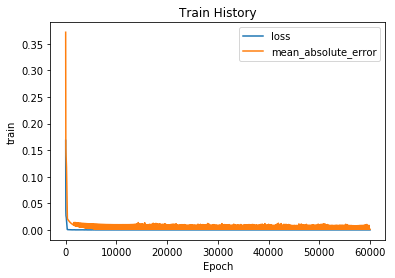

[array([[1.2335414]], dtype=float32), array([[0.58172685]], dtype=float32), array([[1.2125465, 0.7874063],
       [0.8099513, 1.1508198]], dtype=float32), array([0.77814615, 1.1824402 ], dtype=float32), array([[-0.17655347,  1.1546246 ],
       [-0.42470357, -1.013804  ]], dtype=float32), array([-0.03039928, -0.19918574], dtype=float32), array([[-0.38431475, -0.22895187],
       [ 0.6431713 , -0.96330565]], dtype=float32), array([ 0.14341141, -0.2903185 ], dtype=float32), array([[ 1.294612  ],
       [-0.55686224]], dtype=float32), array([0.276727], dtype=float32)]


In [4]:
#drawing the lines of losses and metrics
def show_train_history(train_history, x1, x2):
    plot.plot(train_history.history[x1])
    plot.plot(train_history.history[x2])
    plot.title('Train History')
    plot.ylabel('train')
    plot.xlabel('Epoch')
    plot.legend([x1, x2], loc = 'upper right')
    plot.show()
    
show_train_history(train_history, 'loss', 'mean_absolute_error')

#showing the weights in the model of neural network
print(model.get_weights())

In [5]:
#predicting the outputs of the model based on training data
predictions = model.predict([X1, X2]) 
print(predictions)

[[0.30166405]
 [0.3991332 ]
 [0.49908888]
 [0.6004064 ]
 [0.70178336]
 [0.8018091 ]
 [0.899058  ]]
